<a href="https://colab.research.google.com/github/Fatima-Ebrahim/task-4/blob/main/syria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/syria.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
from tabulate import tabulate
lines_to_skip = [1]

df = pd.read_csv(
    file_path,
    encoding='utf-8',
    skiprows=lines_to_skip
)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86755 entries, 0 to 86754
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 86755 non-null  int64  
 1   relid              86755 non-null  object 
 2   year               86755 non-null  int64  
 3   active_year        86755 non-null  int64  
 4   code_status        86755 non-null  object 
 5   type_of_violence   86755 non-null  int64  
 6   conflict_dset_id   86755 non-null  int64  
 7   conflict_new_id    86755 non-null  int64  
 8   conflict_name      86755 non-null  object 
 9   dyad_dset_id       86755 non-null  int64  
 10  dyad_new_id        86755 non-null  int64  
 11  dyad_name          86755 non-null  object 
 12  side_a_dset_id     86755 non-null  int64  
 13  side_a_new_id      86755 non-null  int64  
 14  side_a             86755 non-null  object 
 15  side_b_dset_id     86755 non-null  int64  
 16  side_b_new_id      867

In [4]:
data_types_optimized = {
    'id': 'int32', # Assuming IDs fit within int32
    'year': 'int16',
    'active_year': 'int8', # If it's just 0 or 1
    'type_of_violence': 'int8', # If codes are small
    'source_office': 'category',
    'conflict_name': 'category',
    'dyad_name': 'category',
    'side_a': 'category',
    'side_b': 'category',
    'where_coordinates': 'object', # Keep as object or custom processing
    'where_description': 'object',
    'adm_1': 'category',
    'adm_2': 'category',
    'latitude': 'float32',
    'longitude': 'float32',
    'country': 'category',
    'region': 'category',
    'deaths_a': 'int16', # Assuming deaths fit within int16
    'deaths_b': 'int16',
    'deaths_civilians': 'int16',
    'deaths_unknown': 'int16',
    'best': 'int16',
    'gwnoa': 'float32', # Or int16/int32 if they are always integers after handling NaN
    'gwnob': 'float32'  # Same as gwnoa
}
df = pd.read_csv( file_path,
    encoding='utf-8',
    skiprows=lines_to_skip, dtype=data_types_optimized)


In [5]:


try:
   # --- 2. Initial Data Preview Functions (Including Duplicates Check) ---
    print("\n\n--- 🚀 Initial Data Preview (With Enhanced Duplicates Check) ---")

    # (Keeping previous preview functions from 2.1 to 2.9 for context)
    # For brevity in this response, I'll omit re-printing 2.1 to 2.8 if they are unchanged.
    # Assume sections 2.1 (head), 2.2 (tail), 2.3 (shape), 2.4 (columns),
    # 2.5 (dtypes), 2.6 (info), 2.7 (describe numeric), 2.8 (describe all) are here.

    # Let's re-print a few key ones for context before duplicates
    print("\n--- DataFrame Dimensions (Shape) ---")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")

    print("\n--- Concise Information Summary (Info) ---")
    df.info()

    print("\n--- Count of Missing Values per Column ---")
    missing_values = df.isnull().sum().reset_index()
    missing_values.columns = ['Column Name', 'Missing Count']
    missing_values_filtered = missing_values[missing_values['Missing Count'] > 0]
    if not missing_values_filtered.empty:
        print(tabulate(missing_values_filtered, headers='keys', tablefmt='psql', showindex=False))
    else:
        print("✅ No missing values found in any column.")

    # --- 2.10. Enhanced Duplicates Check ---
    print("\n\n--- 2.10. Checking for Duplicate Values ---")

    # 2.10.1. Fully Duplicated Rows
    print("\n--- 2.10.1. Fully Duplicated Rows ---")
    num_fully_duplicated_rows = df.duplicated().sum()
    print(f"Number of fully duplicated rows (all columns identical): {num_fully_duplicated_rows}")

    if num_fully_duplicated_rows > 0:
        print("Displaying all occurrences of fully duplicated rows (use cautiously for large numbers):")
        # df[df.duplicated(keep=False)] shows all rows that are part of any duplicate set.
        # For large datasets, avoid printing all if there are many.
        # Here, we'll just show the first few duplicate sets (e.g., up to 5 duplicate rows, which might mean more if sets are larger)
        duplicated_rows_to_show = df[df.duplicated(keep=False)].sort_values(by=list(df.columns)) # Sort to group them
        print(tabulate(duplicated_rows_to_show.head(10), headers='keys', tablefmt='psql', showindex=False))
        if len(duplicated_rows_to_show) > 10:
            print(f"... and {len(duplicated_rows_to_show) - 10} more fully duplicated row instances.")

    # 2.10.2. Duplicated Values within Specific Columns
    print("\n--- 2.10.2. Duplicated Values within Specific Important Columns ---")
    # Define a list of columns you suspect might have important unique identifiers or values
    # These are examples; adjust based on your data's semantics.
    # 'id' should ideally be unique. Other columns like 'source_article' might naturally have duplicates.
    columns_to_check_for_internal_duplicates = ['id', 'relid', 'conflict_new_id', 'dyad_new_id']
    # Add other columns like 'source_headline' if you want to check them too.

    for col_name in columns_to_check_for_internal_duplicates:
        if col_name in df.columns:
            # Find duplicated values (values that appear more than once)
            duplicated_values_in_col = df[col_name].value_counts()
            duplicated_values_in_col = duplicated_values_in_col[duplicated_values_in_col > 1]

            if not duplicated_values_in_col.empty:
                print(f"\nDuplicate values found in column '{col_name}':")
                # Convert Series to DataFrame for tabulate
                dup_val_df = duplicated_values_in_col.reset_index()
                dup_val_df.columns = [col_name, 'Count']
                print(tabulate(dup_val_df.head(), headers='keys', tablefmt='psql', showindex=False)) # Show top few
                if len(dup_val_df) > 5:
                    print(f"... and {len(dup_val_df) - 5} more distinct duplicated values in '{col_name}'.")

                # Optional: Show rows where these duplicated values occur (first example)
                if not dup_val_df.empty:
                    first_dup_value = dup_val_df.iloc[0][col_name]
                    print(f"Rows where the first duplicated value ('{first_dup_value}') in '{col_name}' occurs (max 5 rows shown):")
                    print(tabulate(df[df[col_name] == first_dup_value].head(), headers='keys', tablefmt='psql', showindex=False))

            else:
                print(f"No duplicate values (values appearing more than once) found in column '{col_name}'. (All values are unique or appear only once)")
        else:
            print(f"Column '{col_name}' not found in DataFrame, skipping internal duplicate check for it.")

    # 2.10.3. Duplicated Rows based on a Subset of Columns
    print("\n--- 2.10.3. Duplicated Rows based on a Subset of Key Columns ---")
    # Define subsets of columns that, if identical across rows, might indicate a duplicate event entry or record.
    # This is highly dependent on your data's meaning.
    # Example: same event might be reported by different sources but have same core details.
    # Or, a true duplicate event entry.

    # Example subset of columns that might define a unique event
    # (Adjust these columns based on your understanding of what makes an event unique)
    subset_cols_for_event_duplication = [
        'date_start', 'year', 'country', 'adm_1', 'adm_2',
        'latitude', 'longitude', 'side_a', 'side_b', 'type_of_violence'
    ]
    # Ensure all subset columns actually exist in the DataFrame
    actual_subset_cols = [col for col in subset_cols_for_event_duplication if col in df.columns]

    if len(actual_subset_cols) < 2: # Need at least two columns for a meaningful subset usually
        print("Not enough columns available for subset duplication check, or subset not well defined.")
    else:
        print(f"Checking for duplicates based on the subset of columns: {actual_subset_cols}")
        num_subset_duplicates = df.duplicated(subset=actual_subset_cols, keep=False).sum()

        if num_subset_duplicates > 0:
            print(f"Found {num_subset_duplicates} rows that are duplicates based on columns: {actual_subset_cols}.")
            print("Displaying first few instances of these subset-duplicated rows (use cautiously):")
            # Sort by the subset columns to group them together visually
            subset_duplicated_rows_to_show = df[df.duplicated(subset=actual_subset_cols, keep=False)].sort_values(by=actual_subset_cols)
            print(tabulate(subset_duplicated_rows_to_show.head(10), headers='keys', tablefmt='psql', showindex=False))
            if len(subset_duplicated_rows_to_show) > 10:
                print(f"... and {len(subset_duplicated_rows_to_show) - 10} more subset-duplicated row instances.")
        else:
            print(f"No duplicate rows found based on the subset of columns: {actual_subset_cols}.")

    print("\n--- End of Initial Data Preview (Including Duplicates Check) ---")

except FileNotFoundError:
    print(f"❌ ERROR: File not found at path: {file_path}")
    print("Please ensure the file path is correct and the file exists in your Google Drive.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")



--- 🚀 Initial Data Preview (With Enhanced Duplicates Check) ---

--- DataFrame Dimensions (Shape) ---
Number of rows: 86755
Number of columns: 50

--- Concise Information Summary (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86755 entries, 0 to 86754
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 86755 non-null  int32   
 1   relid              86755 non-null  object  
 2   year               86755 non-null  int16   
 3   active_year        86755 non-null  int8    
 4   code_status        86755 non-null  object  
 5   type_of_violence   86755 non-null  int8    
 6   conflict_dset_id   86755 non-null  int64   
 7   conflict_new_id    86755 non-null  int64   
 8   conflict_name      86755 non-null  category
 9   dyad_dset_id       86755 non-null  int64   
 10  dyad_new_id        86755 non-null  int64   
 11  dyad_name          86755 non-null  category
 12  side_a_d

In [6]:
import pandas as pd
from google.colab import drive
from tabulate import tabulate # لاستخدامها في عرض الجداول

try:

    df_full = df
    print("✅ تم تحميل البيانات بنجاح!")
    print("\n================================================")
    print("معلومات عن مجموعة البيانات الكاملة (df_full):")
    print("================================================")
    df_full.info(verbose=True, show_counts=True) # verbose=True و show_counts=True يعطي تفاصيل أكثر

    print("\nأول 3 صفوف من مجموعة البيانات الكاملة (عرض باستخدام tabulate):")
    # عرض أول 3 صفوف فقط لتقليل الإخراج في حالة الجداول الكبيرة
    print(tabulate(df_full.head(3), headers='keys', tablefmt='psql', showindex=False))
    print("\n")

except FileNotFoundError:
    print(f"❌ خطأ: لم يتم العثور على الملف في المسار المحدد: {file_path}")
    print("الرجاء التأكد من صحة المسار واسم الملف.")
    # يمكنك إيقاف تنفيذ الخلية هنا إذا لم يتم تحميل الملف
    # exit()
except Exception as e:
    print(f"❌ خطأ غير متوقع أثناء تحميل الملف: {e}")
    # exit()

if 'df_full' in locals(): # للتأكد من أن df_full تم إنشاؤه قبل المتابعة
    #-------------------------------------------------------------------------------
    # 2. تحديد قائمة الأعمدة الجغرافية المطلوبة
    #-------------------------------------------------------------------------------
    geographical_columns = [
        'id',                # الإبقاء على المعرف الفريد للربط لاحقًا
        'country',
        'region',
        'adm_1',             # التقسيم الإداري الأول (مثل المحافظة)
        'adm_2',             # التقسيم الإداري الثاني (مثل المنطقة)
        'where_coordinates', # اسم المكان أو الإحداثيات الوصفية
        'where_description', # وصف إضافي للموقع
        'latitude',
        'longitude',
        'geom_wkt',          # التمثيل الهندسي للموقع (Well-Known Text)
        'priogrid_gid',      # معرّف شبكة PRIO
        'where_prec',        # دقة تحديد الموقع
        'iso3',              # رمز الدولة الثلاثي ISO
        'country_id'         # معرّف الدولة الرقمي
    ]

    # التأكد من أن جميع الأعمدة المطلوبة موجودة في DataFrame الأصلي
    actual_geographical_columns = [col for col in geographical_columns if col in df_full.columns]

    missing_cols = set(geographical_columns) - set(actual_geographical_columns)
    if missing_cols:
        print("⚠️ تنبيه: بعض الأعمدة الجغرافية المحددة غير موجودة في البيانات الأصلية.")
        print(f"الأعمدة التي لم يتم العثور عليها: {missing_cols}")
        print(f"سيتم استخدام الأعمدة الجغرافية الموجودة فقط: {actual_geographical_columns}\n")
    else:
        print("👍 جميع الأعمدة الجغرافية المحددة موجودة في البيانات.\n")

    if not actual_geographical_columns:
        print("❌ خطأ فادح: لا يوجد أي من الأعمدة الجغرافية المحددة في ملف البيانات. يرجى مراجعة أسماء الأعمدة.")
    else:
        #-------------------------------------------------------------------------------
        # 3. تصفية الأعمدة لإنشاء DataFrame جديد للبيانات الجغرافية
        #-------------------------------------------------------------------------------
        # استخدام .copy() لتجنب SettingWithCopyWarning ولضمان أن df_geographical هو نسخة مستقلة
        df_geographical = df_full[actual_geographical_columns].copy()

        print("========================================================")
        print("معلومات عن مجموعة البيانات الجغرافية (df_geographical):")
        print("========================================================")
        df_geographical.info(verbose=True, show_counts=True)

        print("\nأول 3 صفوف من مجموعة البيانات الجغرافية (عرض باستخدام tabulate):")
        print(tabulate(df_geographical.head(3), headers='keys', tablefmt='psql', showindex=False))
        print("\n")

        print("🎉 الخطوة الأولى (تصفية الأعمدة الجغرافية) تمت بنجاح!")
        print("الآن لديك DataFrame باسم 'df_geographical' يحتوي فقط على الأعمدة ذات الصلة بالتحليل الجغرافي.")
        print("========================================================")
else:
    print("لم يتم تحميل DataFrame 'df_full' بنجاح، لذا لا يمكن متابعة عملية التصفية.")

✅ تم تحميل البيانات بنجاح!

معلومات عن مجموعة البيانات الكاملة (df_full):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86755 entries, 0 to 86754
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 86755 non-null  int32   
 1   relid              86755 non-null  object  
 2   year               86755 non-null  int16   
 3   active_year        86755 non-null  int8    
 4   code_status        86755 non-null  object  
 5   type_of_violence   86755 non-null  int8    
 6   conflict_dset_id   86755 non-null  int64   
 7   conflict_new_id    86755 non-null  int64   
 8   conflict_name      86755 non-null  category
 9   dyad_dset_id       86755 non-null  int64   
 10  dyad_new_id        86755 non-null  int64   
 11  dyad_name          86755 non-null  category
 12  side_a_dset_id     86755 non-null  int64   
 13  side_a_new_id      86755 non-null  int64   
 14  side_a             86755 non

In [7]:
country_column_name = 'country'
target_country_value = 'Syria' # افترض أن القيمة هي "Syria" بالضبط. قد تحتاج لتعديلها إذا كانت مختلفة في بياناتك (مثل "SYR" أو اسم بالعربية)

# تحقق من القيم الفريدة في عمود الدولة للتأكد من القيمة الصحيحة (اختياري ولكن جيد)
if country_column_name in df.columns:
    print(f"القيم الفريدة في عمود '{country_column_name}' (أول 10):")
    print(df[country_column_name].value_counts().nlargest(10))
    print("---")


القيم الفريدة في عمود 'country' (أول 10):
country
Syria    86755
Name: count, dtype: int64
---


In [8]:
country_column_name = 'iso3'
target_country_value = 'Syria' # افترض أن القيمة هي "Syria" بالضبط. قد تحتاج لتعديلها إذا كانت مختلفة في بياناتك (مثل "SYR" أو اسم بالعربية)

# تحقق من القيم الفريدة في عمود الدولة للتأكد من القيمة الصحيحة (اختياري ولكن جيد)
if country_column_name in df.columns:
    print(f"القيم الفريدة في عمود '{country_column_name}' (أول 10):")
    print(df[country_column_name].value_counts().nlargest(10))
    print("---")

القيم الفريدة في عمود 'iso3' (أول 10):
iso3
SYR    86755
Name: count, dtype: int64
---


In [9]:
country_column_name = 'country_id'
target_country_value = 'Syria' # افترض أن القيمة هي "Syria" بالضبط. قد تحتاج لتعديلها إذا كانت مختلفة في بياناتك (مثل "SYR" أو اسم بالعربية)

# تحقق من القيم الفريدة في عمود الدولة للتأكد من القيمة الصحيحة (اختياري ولكن جيد)
if country_column_name in df.columns:
    print(f"القيم الفريدة في عمود '{country_column_name}' (أول 10):")
    print(df[country_column_name].value_counts().nlargest(10))
    print("---")

القيم الفريدة في عمود 'country_id' (أول 10):
country_id
652    86755
Name: count, dtype: int64
---


In [10]:
country_column_name = 'region'
target_country_value = 'Syria' # افترض أن القيمة هي "Syria" بالضبط. قد تحتاج لتعديلها إذا كانت مختلفة في بياناتك (مثل "SYR" أو اسم بالعربية)

# تحقق من القيم الفريدة في عمود الدولة للتأكد من القيمة الصحيحة (اختياري ولكن جيد)
if country_column_name in df.columns:
    print(f"القيم الفريدة في عمود '{country_column_name}' (أول 10):")
    print(df[country_column_name].value_counts().nlargest(10))
    print("---")

القيم الفريدة في عمود 'region' (أول 10):
region
Middle East    86755
Name: count, dtype: int64
---


In [11]:
country_column_name = 'event_clarity'
target_country_value = 'Syria' # افترض أن القيمة هي "Syria" بالضبط. قد تحتاج لتعديلها إذا كانت مختلفة في بياناتك (مثل "SYR" أو اسم بالعربية)

# تحقق من القيم الفريدة في عمود الدولة للتأكد من القيمة الصحيحة (اختياري ولكن جيد)
if country_column_name in df.columns:
    print(f"القيم الفريدة في عمود '{country_column_name}' (أول 10):")
    print(df[country_column_name].value_counts().nlargest(10))
    print("---")

القيم الفريدة في عمود 'event_clarity' (أول 10):
event_clarity
1    85803
2      952
Name: count, dtype: int64
---


In [12]:
for column_name in df.columns:
    print(f"--- معلومات عن العمود: '{column_name}' ---")

    # 1. العدد الإجمالي للقيم غير المفقودة (Non-Null Count)
    non_null_count = df[column_name].count()
    print(f"العدد الإجمالي للقيم غير المفقودة: {non_null_count}")

    # 2. العدد الإجمالي للسجلات (الصفوف) في العمود
    total_entries = len(df[column_name]) # أو df.shape[0]
    print(f"العدد الإجمالي للسجلات (الصفوف): {total_entries}")

    # 3. عدد مرات تكرار كل قيمة فريدة (Value Counts)
    print("\nتكرار كل قيمة فريدة (بما في ذلك NaN إن وجدت):")
    # نستخدم dropna=False لإدراج القيم المفقودة في العد
    value_counts_series = df[column_name].value_counts(dropna=False)

    # تحديد عدد القيم الفريدة التي سيتم عرضها مباشرة
    # إذا كان عدد القيم الفريدة كبيرًا، قد ترغب في عرض أفضل N قيم فقط
    num_unique_values = value_counts_series.size
    display_limit = 15 # حد أقصى للقيم التي سيتم عرضها مباشرة في الجدول

    if num_unique_values == 0:
        print("لا توجد قيم في هذا العمود (قد يكون العمود أُضيف فارغًا).")
    else:
        # تحويل الـ Series إلى DataFrame لعرضها باستخدام tabulate
        value_counts_df = value_counts_series.reset_index()
        value_counts_df.columns = ['القيمة (Value)', 'عدد مرات التكرار (Count)']

        if num_unique_values > display_limit:
            print(f"(عرض أول {display_limit} قيمة من أصل {num_unique_values} قيمة فريدة)")
            print(tabulate(value_counts_df.head(display_limit), headers='keys', tablefmt='psql', showindex=False))
        else:
            print(tabulate(value_counts_df, headers='keys', tablefmt='psql', showindex=False))

    print("---------------------------------------------------\n")

print("✅ انتهى عرض معلومات تكرار القيم لجميع الأعمدة.")


--- معلومات عن العمود: 'id' ---
العدد الإجمالي للقيم غير المفقودة: 86755
العدد الإجمالي للسجلات (الصفوف): 86755

تكرار كل قيمة فريدة (بما في ذلك NaN إن وجدت):
(عرض أول 15 قيمة من أصل 86755 قيمة فريدة)
+------------------+----------------------------+
|   القيمة (Value) |   عدد مرات التكرار (Count) |
|------------------+----------------------------|
|           497054 |                          1 |
|           177142 |                          1 |
|           314095 |                          1 |
|           487445 |                          1 |
|           487444 |                          1 |
|           487441 |                          1 |
|           487440 |                          1 |
|           487423 |                          1 |
|           398335 |                          1 |
|           294477 |                          1 |
|           398056 |                          1 |
|           164290 |                          1 |
|           164294 |                          1 |

In [13]:
columns_to_drop = ['country', 'iso3', 'country_id', 'region','code_status']
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86755 entries, 0 to 86754
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 86755 non-null  int32   
 1   relid              86755 non-null  object  
 2   year               86755 non-null  int16   
 3   active_year        86755 non-null  int8    
 4   type_of_violence   86755 non-null  int8    
 5   conflict_dset_id   86755 non-null  int64   
 6   conflict_new_id    86755 non-null  int64   
 7   conflict_name      86755 non-null  category
 8   dyad_dset_id       86755 non-null  int64   
 9   dyad_new_id        86755 non-null  int64   
 10  dyad_name          86755 non-null  category
 11  side_a_dset_id     86755 non-null  int64   
 12  side_a_new_id      86755 non-null  int64   
 13  side_a             86755 non-null  category
 14  side_b_dset_id     86755 non-null  int64   
 15  side_b_new_id      86755 non-null  int64   
 16  side

In [14]:

# --- 1. تعريف مجموعات الأعمدة للتحقق ---
column_groups = {
    "Conflict Info": {'name': 'conflict_name', 'id1': 'conflict_dset_id', 'id2': 'conflict_new_id'},
    "Dyad Info": {'name': 'dyad_name', 'id1': 'dyad_dset_id', 'id2': 'dyad_new_id'},
    "Side A Info": {'name': 'side_a', 'id1': 'side_a_dset_id', 'id2': 'side_a_new_id'},
    "Side B Info": {'name': 'side_b', 'id1': 'side_b_dset_id', 'id2': 'side_b_new_id'}
}

columns_to_potentially_drop = []
all_groups_consistent = True

# --- 2. التحقق من علاقات التطابق لكل مجموعة ---
print("\n🕵️ --- التحقق من علاقات التطابق داخل مجموعات الأعمدة --- 🕵️")
for group_name, cols in column_groups.items():
    name_col, id1_col, id2_col = cols['name'], cols['id1'], cols['id2']

    # التأكد من وجود الأعمدة في DataFrame قبل المتابعة
    if not all(c in df.columns for c in [name_col, id1_col, id2_col]):
        print(f"\n⚠️ تخطي مجموعة '{group_name}': واحد أو أكثر من الأعمدة ({name_col}, {id1_col}, {id2_col}) غير موجود في DataFrame.")
        all_groups_consistent = False # نعتبر أن المجموعة ليست متسقة إذا كانت الأعمدة غير موجودة
        continue

    print(f"\n--- مجموعة: {group_name} ---")
    print(f"الأعمدة: {name_col}, {id1_col}, {id2_col}")

    # هل كل اسم يقابله ID1 و ID2 فريد؟
    name_to_id1_max_unique = df.groupby(name_col)[id1_col].nunique().max()
    name_to_id2_max_unique = df.groupby(name_col)[id2_col].nunique().max()
    print(f"لكل '{name_col}', الحد الأقصى لـ '{id1_col}' الفريدة: {name_to_id1_max_unique}")
    print(f"لكل '{name_col}', الحد الأقصى لـ '{id2_col}' الفريدة: {name_to_id2_max_unique}")

    # هل كل ID1 يقابله اسم و ID2 فريد؟
    id1_to_name_max_unique = df.groupby(id1_col)[name_col].nunique().max()
    id1_to_id2_max_unique = df.groupby(id1_col)[id2_col].nunique().max()
    print(f"لكل '{id1_col}', الحد الأقصى لـ '{name_col}' الفريدة: {id1_to_name_max_unique}")
    print(f"لكل '{id1_col}', الحد الأقصى لـ '{id2_col}' الفريدة: {id1_to_id2_max_unique}")

    # هل كل ID2 يقابله اسم و ID1 فريد؟
    id2_to_name_max_unique = df.groupby(id2_col)[name_col].nunique().max()
    id2_to_id1_max_unique = df.groupby(id2_col)[id1_col].nunique().max()
    print(f"لكل '{id2_col}', الحد الأقصى لـ '{name_col}' الفريدة: {id2_to_name_max_unique}")
    print(f"لكل '{id2_col}', الحد الأقصى لـ '{id1_col}' الفريدة: {id2_to_id1_max_unique}")

    # التحقق من التطابق واحد لواحد
    is_consistent = (name_to_id1_max_unique == 1 and name_to_id2_max_unique == 1 and
                     id1_to_name_max_unique == 1 and id1_to_id2_max_unique == 1 and
                     id2_to_name_max_unique == 1 and id2_to_id1_max_unique == 1)

    if is_consistent:
        print(f"✅ نتيجة التحقق لـ '{group_name}': الأعمدة متطابقة (علاقة واحد لواحد).")
        # اقتراح حذف ID الأقدم (في هذه الحالة id1 وهو _dset_id)
        columns_to_potentially_drop.append(id1_col)
        print(f"   نقترح حذف: '{id1_col}' والإبقاء على '{name_col}' و '{id2_col}'.")
    else:
        print(f"❌ نتيجة التحقق لـ '{group_name}': الأعمدة ليست متطابقة تمامًا (ليست علاقة واحد لواحد).")
        print(f"   يوصى بمراجعة إضافية قبل حذف أي من أعمدة هذه المجموعة: {name_col}, {id1_col}, {id2_col}.")
        all_groups_consistent = False # إذا كانت أي مجموعة غير متسقة، نرفع علامة

# --- 3. تنفيذ الحذف إذا كانت جميع المجموعات متسقة (أو حسب قرارك) ---
print("-" * 50)
if columns_to_potentially_drop and all_groups_consistent:
    print(f"\n✅ جميع المجموعات التي تم فحصها أظهرت تطابقًا.")
    print(f"الأعمدة المقترحة للحذف بناءً على التطابق (مع الإبقاء على الاسم و ID واحد 'الأحدث' المفترض): {columns_to_potentially_drop}")

    # اتخاذ قرار الحذف - يمكنك تغيير هذا الشرط
    confirm_drop = True # للاختبار المباشر. في الاستخدام الفعلي، قد ترغب في تأكيد يدوي:
    # confirm_drop = input("هل تريد حذف هذه الأعمدة؟ (نعم/لا): ").lower() == 'نعم'

    if confirm_drop:
        # التأكد من أن الأعمدة موجودة فعلاً قبل محاولة حذفها
        actual_columns_to_drop = [col for col in columns_to_potentially_drop if col in df.columns]
        if actual_columns_to_drop:
            df_optimized = df.drop(columns=actual_columns_to_drop)
            print(f"\n🎉 تم حذف الأعمدة التالية: {actual_columns_to_drop}")
            print(f"عدد الأعمدة بعد الحذف: {df_optimized.shape[1]}")
            print("\n--- DataFrame بعد الحذف (أول 3 صفوف) ---")
            print(tabulate(df_optimized.head(3), headers='keys', tablefmt='psql', showindex=False))
            print("\n--- معلومات DataFrame بعد الحذف (df_optimized.info()) ---")
            df_optimized.info()
            # يمكنك الآن استخدام df_optimized للمتابعة
            # df = df_optimized # إذا أردت تحديث df الأصلي
        else:
            print("\nلم يتم العثور على أي من الأعمدة المقترحة للحذف في DataFrame الحالي.")
    else:
        print("\nلم يتم حذف أي أعمدة.")
elif not columns_to_potentially_drop and all_groups_consistent:
     print("\nلم يتم اقتراح أي أعمدة للحذف (ربما تم حذفها سابقًا أو لم تكن موجودة).")
else: # all_groups_consistent is False
    print("\n⚠️ نظرًا لوجود عدم تطابق في مجموعة واحدة على الأقل، لم يتم اقتراح أو تنفيذ أي عمليات حذف تلقائية للأعمدة.")
    print("يرجى مراجعة نتائج التحقق لكل مجموعة يدويًا لاتخاذ قرار بشأن الحذف.")


🕵️ --- التحقق من علاقات التطابق داخل مجموعات الأعمدة --- 🕵️

--- مجموعة: Conflict Info ---
الأعمدة: conflict_name, conflict_dset_id, conflict_new_id
لكل 'conflict_name', الحد الأقصى لـ 'conflict_dset_id' الفريدة: 1
لكل 'conflict_name', الحد الأقصى لـ 'conflict_new_id' الفريدة: 1
لكل 'conflict_dset_id', الحد الأقصى لـ 'conflict_name' الفريدة: 2
لكل 'conflict_dset_id', الحد الأقصى لـ 'conflict_new_id' الفريدة: 2
لكل 'conflict_new_id', الحد الأقصى لـ 'conflict_name' الفريدة: 1
لكل 'conflict_new_id', الحد الأقصى لـ 'conflict_dset_id' الفريدة: 1
❌ نتيجة التحقق لـ 'Conflict Info': الأعمدة ليست متطابقة تمامًا (ليست علاقة واحد لواحد).
   يوصى بمراجعة إضافية قبل حذف أي من أعمدة هذه المجموعة: conflict_name, conflict_dset_id, conflict_new_id.

--- مجموعة: Dyad Info ---
الأعمدة: dyad_name, dyad_dset_id, dyad_new_id
لكل 'dyad_name', الحد الأقصى لـ 'dyad_dset_id' الفريدة: 1
لكل 'dyad_name', الحد الأقصى لـ 'dyad_new_id' الفريدة: 1
لكل 'dyad_dset_id', الحد الأقصى لـ 'dyad_name' الفريدة: 1
لكل 'dyad_d

/tmp/ipython-input-14-941764412.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  name_to_id1_max_unique = df.groupby(name_col)[id1_col].nunique().max()
/tmp/ipython-input-14-941764412.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  name_to_id2_max_unique = df.groupby(name_col)[id2_col].nunique().max()


لكل 'side_b', الحد الأقصى لـ 'side_b_dset_id' الفريدة: 1
لكل 'side_b', الحد الأقصى لـ 'side_b_new_id' الفريدة: 1
لكل 'side_b_dset_id', الحد الأقصى لـ 'side_b' الفريدة: 1
لكل 'side_b_dset_id', الحد الأقصى لـ 'side_b_new_id' الفريدة: 1
لكل 'side_b_new_id', الحد الأقصى لـ 'side_b' الفريدة: 1
لكل 'side_b_new_id', الحد الأقصى لـ 'side_b_dset_id' الفريدة: 1
✅ نتيجة التحقق لـ 'Side B Info': الأعمدة متطابقة (علاقة واحد لواحد).
   نقترح حذف: 'side_b_dset_id' والإبقاء على 'side_b' و 'side_b_new_id'.
--------------------------------------------------

⚠️ نظرًا لوجود عدم تطابق في مجموعة واحدة على الأقل، لم يتم اقتراح أو تنفيذ أي عمليات حذف تلقائية للأعمدة.
يرجى مراجعة نتائج التحقق لكل مجموعة يدويًا لاتخاذ قرار بشأن الحذف.


In [15]:
import pandas as pd
from tabulate import tabulate

# --- الخطوة 0: افتراض أن لديك DataFrame مُحمّل وجاهز ---
# افترض أن df هو الـ DataFrame الذي يحتوي على بياناتك.
# إذا لم يكن df مُعرفًا، ستحتاج لتحميله أولاً.
# للتوضيح، سأقوم بإنشاء DataFrame مثال بسيط إذا لم يكن df موجودًا
if 'df' not in locals():
    print("DataFrame 'df' غير موجود. سيتم إنشاء مثال بسيط للمتابعة.")
    data_for_example = {
        'conflict_dset_id': [101, 101, 102, 103, 103, 104],
        'conflict_new_id':  [201, 202, 203, 204, 204, 205], # ID 101 maps to two new_ids
        'conflict_name': ['Conflict Alpha V1', 'Conflict Alpha V2', 'Conflict Beta', 'Conflict Gamma', 'Conflict Gamma', 'Conflict Delta'], # ID 101 maps to two names
        'other_data': [1,2,3,4,5,6]
    }
    df = pd.DataFrame(data_for_example)
    df['conflict_name'] = df['conflict_name'].astype('category')


print("🔍 جاري البحث عن التناقضات في مجموعة 'Conflict Info'...\n")

# الأعمدة المعنية
id1_col = 'conflict_dset_id'
id2_col = 'conflict_new_id'
name_col = 'conflict_name'

# التأكد من وجود الأعمدة
if not all(c in df.columns for c in [id1_col, id2_col, name_col]):
    print(f"❌ خطأ: واحد أو أكثر من الأعمدة ({id1_col}, {id2_col}, {name_col}) غير موجود في DataFrame.")
else:
    # 1. تحديد conflict_dset_id التي ترتبط بأكثر من conflict_name
    name_counts_per_dset_id = df.groupby(id1_col)[name_col].nunique()
    problematic_dset_ids_for_name = name_counts_per_dset_id[name_counts_per_dset_id > 1]

    # 2. تحديد conflict_dset_id التي ترتبط بأكثر من conflict_new_id
    new_id_counts_per_dset_id = df.groupby(id1_col)[id2_col].nunique()
    problematic_dset_ids_for_new_id = new_id_counts_per_dset_id[new_id_counts_per_dset_id > 1]

    # عرض النتائج
    if not problematic_dset_ids_for_name.empty:
        print(f"--- 🚩 {id1_col} التي ترتبط بأكثر من '{name_col}' ---")
        # تحويل لـ DataFrame لعرض أفضل
        problem_df_name = problematic_dset_ids_for_name.reset_index()
        problem_df_name.columns = [id1_col, f'Unique_{name_col}_Count']
        print(tabulate(problem_df_name, headers='keys', tablefmt='psql', showindex=False))

        # عرض السجلات الفعلية لهذه الـ IDs
        ids_to_show_name = problem_df_name[id1_col].tolist()
        print(f"\n   السجلات الفعلية لـ {id1_col} المذكورة أعلاه (من حيث الاسم):")
        conflicting_name_records = df[df[id1_col].isin(ids_to_show_name)][[id1_col, id2_col, name_col]].drop_duplicates().sort_values(by=[id1_col, name_col])
        print(tabulate(conflicting_name_records, headers='keys', tablefmt='psql', showindex=False))
    else:
        print(f"✅ لا يوجد {id1_col} يرتبط بأكثر من '{name_col}'.")

    print("-" * 50)

    if not problematic_dset_ids_for_new_id.empty:
        print(f"--- 🚩 {id1_col} التي ترتبط بأكثر من '{id2_col}' ---")
        problem_df_new_id = problematic_dset_ids_for_new_id.reset_index()
        problem_df_new_id.columns = [id1_col, f'Unique_{id2_col}_Count']
        print(tabulate(problem_df_new_id, headers='keys', tablefmt='psql', showindex=False))

        # عرض السجلات الفعلية لهذه الـ IDs
        ids_to_show_new_id = problem_df_new_id[id1_col].tolist()
        print(f"\n   السجلات الفعلية لـ {id1_col} المذكورة أعلاه (من حيث الـ ID الجديد):")
        conflicting_new_id_records = df[df[id1_col].isin(ids_to_show_new_id)][[id1_col, id2_col, name_col]].drop_duplicates().sort_values(by=[id1_col, id2_col])
        print(tabulate(conflicting_new_id_records, headers='keys', tablefmt='psql', showindex=False))
    else:
        print(f"✅ لا يوجد {id1_col} يرتبط بأكثر من '{id2_col}'.")

    print("-" * 50)
    if problematic_dset_ids_for_name.empty and problematic_dset_ids_for_new_id.empty:
        print("لم يتم العثور على أي تناقضات محددة (قد تكون نتيجة التحليل السابقة خاطئة أو أن البيانات تغيرت).")

🔍 جاري البحث عن التناقضات في مجموعة 'Conflict Info'...

--- 🚩 conflict_dset_id التي ترتبط بأكثر من 'conflict_name' ---
+--------------------+------------------------------+
|   conflict_dset_id |   Unique_conflict_name_Count |
|--------------------+------------------------------|
|                234 |                            2 |
+--------------------+------------------------------+

   السجلات الفعلية لـ conflict_dset_id المذكورة أعلاه (من حيث الاسم):
+--------------------+-------------------+-------------------+
|   conflict_dset_id |   conflict_new_id | conflict_name     |
|--------------------+-------------------+-------------------|
|                234 |               506 | IS - Civilians    |
|                234 |               234 | Israel: Palestine |
+--------------------+-------------------+-------------------+
--------------------------------------------------
--- 🚩 conflict_dset_id التي ترتبط بأكثر من 'conflict_new_id' ---
+--------------------+------------------------

In [16]:

ids_to_drop = [
    'conflict_dset_id',
    'dyad_dset_id',
    'side_a_dset_id',
    'side_b_dset_id'
]

# التأكد من أن الأعمدة موجودة فعلاً في df قبل محاولة الحذف
actual_ids_to_drop = [col for col in ids_to_drop if col in df.columns]

if 'df' in locals() and actual_ids_to_drop:
    print(f"الأعمدة التي سيتم حذفها (إذا وجدت): {actual_ids_to_drop}")
    # الخيار 1: تعديل df الحالي مباشرة (إذا كنت متأكدًا)
    # df.drop(columns=actual_ids_to_drop, inplace=True, errors='ignore')

    # الخيار 2: إنشاء DataFrame جديد (موصى به عادةً) وتحديث df ليشير إليه
    df = df.drop(columns=actual_ids_to_drop, errors='ignore') # errors='ignore' لن يسبب خطأ إذا كان عمود ما قد حُذف بالفعل

    print(f"\n✅ تم حذف الأعمدة بنجاح.")
    print("\n--- الأعمدة في DataFrame بعد حذف الـ IDs القديمة ---")
    print(list(df.columns))
    print(f"عدد الأعمدة بعد الحذف: {df.shape[1]}")

    print("\n--- معلومات DataFrame بعد الحذف (df.info()) ---")
    df.info()

    print("\n--- أول 3 صفوف من DataFrame بعد الحذف ---")
    print(tabulate(df.head(3), headers='keys', tablefmt='psql', showindex=False))

elif 'df' not in locals():
    print("يرجى التأكد من تحميل DataFrame 'df' أولاً.")
else: # actual_ids_to_drop is empty
    print("⚠️ لم يتم العثور على أي من الأعمدة المحددة للحذف في الـ DataFrame الحالي.")
    print("   ربما تم حذفها بالفعل أو أن الأسماء مختلفة.")
    if 'df' in locals():
        print("الأعمدة الحالية في df:", list(df.columns))

الأعمدة التي سيتم حذفها (إذا وجدت): ['conflict_dset_id', 'dyad_dset_id', 'side_a_dset_id', 'side_b_dset_id']

✅ تم حذف الأعمدة بنجاح.

--- الأعمدة في DataFrame بعد حذف الـ IDs القديمة ---
['id', 'relid', 'year', 'active_year', 'type_of_violence', 'conflict_new_id', 'conflict_name', 'dyad_new_id', 'dyad_name', 'side_a_new_id', 'side_a', 'side_b_new_id', 'side_b', 'number_of_sources', 'source_article', 'source_office', 'source_date', 'source_headline', 'source_original', 'where_prec', 'where_coordinates', 'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude', 'geom_wkt', 'priogrid_gid', 'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low', 'gwnoa', 'gwnob']
عدد الأعمدة بعد الحذف: 41

--- معلومات DataFrame بعد الحذف (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86755 entries, 0 to 86754
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype   
---  --

In [17]:
is_id_unique = df['id'].is_unique
is_relid_unique = df['relid'].is_unique
print(f"Is 'id' unique? {is_id_unique}")
print(f"Is 'relid' unique? {is_relid_unique}")

Is 'id' unique? True
Is 'relid' unique? True


**بدء تحليل البيانات الجغرافية **

In [18]:
selected_geo_columns = [
    'where_prec', 'where_coordinates', 'where_description',
    'adm_1', 'adm_2', 'latitude', 'longitude',
    'geom_wkt', 'priogrid_gid'
]

# التأكد من وجود الأعمدة المحددة في df
actual_geo_columns_in_df = [col for col in selected_geo_columns if col in df.columns]
if not actual_geo_columns_in_df:
    print("لم يتم العثور على أي من الأعمدة الجغرافية المحددة في DataFrame. يرجى التحقق.")
else:
    print(f"--- نظرة عامة على الأعمدة الجغرافية المحددة ({len(actual_geo_columns_in_df)} أعمدة) ---")
    df_geo_subset = df[actual_geo_columns_in_df]

    print("\n1. معلومات عامة (Info):")
    df_geo_subset.info()

    print("\n\n2. إحصاءات وصفية (Describe):")
    # .describe() مفيد للأعمدة الرقمية، ويمكن استخدامه مع include='all' للبقية
    print(tabulate(df_geo_subset.describe(include='all').T, headers='keys', tablefmt='psql'))

    for col_name in actual_geo_columns_in_df:
        print(f"\n\n--- تفاصيل العمود: '{col_name}' ---")

        # عدد القيم المفقودة
        missing_count = df_geo_subset[col_name].isnull().sum()
        print(f"عدد القيم المفقودة: {missing_count} (بنسبة {missing_count/len(df_geo_subset)*100:.2f}%)")

        # عدد القيم الفريدة
        unique_count = df_geo_subset[col_name].nunique()
        print(f"عدد القيم الفريدة: {unique_count}")

        # أكثر 5 قيم تكرارًا (بما في ذلك NaN إن وجدت)
        print("أكثر 5 قيم تكرارًا:")
        top_5_values = df_geo_subset[col_name].value_counts(dropna=False).nlargest(14).reset_index()
        top_5_values.columns = ['Value', 'Count']
        print(tabulate(top_5_values, headers='keys', tablefmt='psql', showindex=False))
        if unique_count > 5:
            print(f"... وهناك {unique_count - 5} قيمة فريدة أخرى.")

        # فحص خاص لبعض الأعمدة
        if col_name in ['latitude', 'longitude']:
            # تحقق من النطاقات
            min_val, max_val = df_geo_subset[col_name].min(), df_geo_subset[col_name].max()
            print(f"النطاق: من {min_val} إلى {max_val}")
            if col_name == 'latitude' and (min_val < -90 or max_val > 90):
                print("⚠️ تحذير: قيم خط العرض خارج النطاق الصحيح (-90 إلى 90).")
            if col_name == 'longitude' and (min_val < -180 or max_val > 180):
                print("⚠️ تحذير: قيم خط الطول خارج النطاق الصحيح (-180 إلى 180).")

        if col_name == 'geom_wkt':
            # فحص عينة من التنسيق
            print("عينة من قيم geom_wkt (أول 3 قيم غير مفقودة):")
            sample_geom = df_geo_subset[col_name].dropna().head(3).tolist()
            for item in sample_geom:
                print(f"  - {item}")
            # يمكنك إضافة تحقق أكثر تفصيلاً هنا إذا كانت القيم لا تبدو كنص WKT صحيح
            # مثل التحقق من أنها تبدأ بـ "POINT", "POLYGON", إلخ.


--- نظرة عامة على الأعمدة الجغرافية المحددة (9 أعمدة) ---

1. معلومات عامة (Info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86755 entries, 0 to 86754
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   where_prec         86755 non-null  int64   
 1   where_coordinates  86755 non-null  object  
 2   where_description  85658 non-null  object  
 3   adm_1              85341 non-null  category
 4   adm_2              73535 non-null  category
 5   latitude           86755 non-null  float32 
 6   longitude          86755 non-null  float32 
 7   geom_wkt           86755 non-null  object  
 8   priogrid_gid       86755 non-null  int64   
dtypes: category(2), float32(2), int64(2), object(3)
memory usage: 4.1+ MB


2. إحصاءات وصفية (Describe):
+-------------------+---------+----------+-----------------------------+--------+--------------+------------+-------------+-------------+-------------+-------------

In [19]:
!pip install pandas geopandas shapely


In [20]:
!pip install fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 56.1 MB/s eta 0:00:00


In [21]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from tabulate import tabulate
import fiona # لاستكشاف الطبقات في GeoPackage

# --- الخطوة 0: افتراض أن df (بيانات الأحداث) مُحمّل وجاهز ---
# The original df seems to exist based on global variables, so we can remove the example creation
# if 'df' not in locals():
#     print("DataFrame 'df' الخاص بالأحداث غير موجود. سيتم إنشاء مثال بسيط.")
#     data_for_example = {
#         'id': [1, 2, 3, 4],
#         'latitude': [33.51, 36.20, 35.00, 33.50],
#         'longitude': [36.27, 37.16, 38.00, 36.29],
#         'adm_1': [None, None, None, None], # فارغة ليتم ملؤها
#         'adm_2': [None, None, None, None]  # فارغة ليتم ملؤها
#     }
#     df = pd.DataFrame(data_for_example)
# Note: If running this cell independently, you might still need to load or create 'df'.

# مسار ملف GeoPackage الخاص بك
path_to_gpkg_drive = '/content/drive/My Drive/colab_data/gadm41_SYR.gpkg'

# --- الخطوة 1: استكشاف الطبقات في ملف GeoPackage ---
try:
    print(f"🔍 جاري استكشاف الطبقات في: {path_to_gpkg_drive}")
    layer_names = fiona.listlayers(path_to_gpkg_drive)
    print(f"الطبقات الموجودة في الملف: {layer_names}")
except Exception as e:
    print(f"❌ خطأ أثناء استكشاف الطبقات: {e}")
    layer_names = []

# --- الخطوة 2 و 3: تحميل طبقات ADM1 و ADM2 وتحديد أعمدة الأسماء ---
# !!! بناءً على مخرجات fiona.listlayers، استبدل بأسماء الطبقات الصحيحة !!!
# عادةً ما تكون أسماء الطبقات في GADM مشابهة لـ 'gadm41_SYR_1' لـ ADM1 و 'gadm41_SYR_2' لـ ADM2
# إذا كانت أسماء الطبقات هي مجرد أرقام أو أسماء مختلفة، استخدمها كما هي.

name_of_adm1_layer = None
name_of_adm2_layer = None
gdf_adm1 = None
gdf_adm2 = None
adm1_name_col_in_gdf_adm1 = None # العمود الذي يحتوي على اسم المحافظة في طبقة ADM1
adm2_name_col_in_gdf_adm2 = None # العمود الذي يحتوي على اسم المنطقة في طبقة ADM2

if layer_names:
    # مثال لافتراض أسماء طبقات شائعة، **يجب عليك تعديلها**
    # ابحث في `layer_names` عن شيء يشبه المستوى 1 والمستوى 2
    # مثلاً، إذا كانت layer_names هي ['gadm41_SYR_0', 'gadm41_SYR_1', 'gadm41_SYR_2']
    # name_of_adm1_layer = 'gadm41_SYR_1'
    # name_of_adm2_layer = 'gadm41_SYR_2'

    # **** بداية قسم يجب عليك تخصيصه بناءً على مخرجات fiona.listlayers ****
    # مثال: لنفترض أن مخرجات fiona.listlayers أظهرت 'gadm41_SYR_1' و 'gadm41_SYR_2'
    if 'gadm41_SYR_1' in layer_names: # استبدل بالاسم الصحيح لطبقة ADM1
        name_of_adm1_layer = 'gadm41_SYR_1'
    if 'gadm41_SYR_2' in layer_names: # استبدل بالاسم الصحيح لطبقة ADM2
        name_of_adm2_layer = 'gadm41_SYR_2'
    # **** نهاية قسم يجب عليك تخصيصه ****

    if name_of_adm1_layer:
        try:
            print(f"\n⏳ جاري تحميل طبقة ADM1: '{name_of_adm1_layer}'...")
            gdf_adm1 = gpd.read_file(path_to_gpkg_drive, layer=name_of_adm1_layer)
            print(f"✅ تم تحميل طبقة ADM1 بنجاح. الأعمدة: {gdf_adm1.columns.tolist()}")
            print(tabulate(gdf_adm1.head(2), headers='keys', tablefmt='psql'))
            # !!! بناءً على الأعمدة المعروضة، حدد اسم العمود الذي يحتوي على اسم المحافظة !!!
            # قد يكون 'NAME_1', 'ADM1_EN', إلخ.
            adm1_name_col_in_gdf_adm1 = 'NAME_1' # <--- قم بالتعديل هنا بالاسم الصحيح من ملفك
            if adm1_name_col_in_gdf_adm1 not in gdf_adm1.columns:
                print(f"❌ تحذير: العمود '{adm1_name_col_in_gdf_adm1}' غير موجود في طبقة ADM1. لن يتم ملء adm_1.")
                adm1_name_col_in_gdf_adm1 = None # إعادة تعيين إذا لم يتم العثور عليه
        except Exception as e:
            print(f"❌ خطأ في تحميل طبقة ADM1 ('{name_of_adm1_layer}'): {e}")

    if name_of_adm2_layer:
        try:
            print(f"\n⏳ جاري تحميل طبقة ADM2: '{name_of_adm2_layer}'...")
            gdf_adm2 = gpd.read_file(path_to_gpkg_drive, layer=name_of_adm2_layer)
            print(f"✅ تم تحميل طبقة ADM2 بنجاح. الأعمدة: {gdf_adm2.columns.tolist()}")
            print(tabulate(gdf_adm2.head(2), headers='keys', tablefmt='psql'))
            # !!! بناءً على الأعمدة المعروضة، حدد اسم العمود الذي يحتوي على اسم المنطقة !!!
            # قد يكون 'NAME_2', 'ADM2_EN', إلخ.
            adm2_name_col_in_gdf_adm2 = 'NAME_2' # <--- قم بالتعديل هنا بالاسم الصحيح من ملفك
            if adm2_name_col_in_gdf_adm2 not in gdf_adm2.columns:
                print(f"❌ تحذير: العمود '{adm2_name_col_in_gdf_adm2}' غير موجود في طبقة ADM2. لن يتم ملء adm_2.")
                adm2_name_col_in_gdf_adm2 = None # إعادة تعيين إذا لم يتم العثور عليه
        except Exception as e:
            print(f"❌ خطأ في تحميل طبقة ADM2 ('{name_of_adm2_layer}'): {e}")
else:
    print("لم يتم العثور على طبقات في ملف GeoPackage أو حدث خطأ.")


# --- الخطوة 4: تحويل df إلى GeoDataFrame وإجراء الربط المكاني (إذا تم تحميل طبقات ADM) ---
if (gdf_adm1 is not None and adm1_name_col_in_gdf_adm1 is not None) or \
   (gdf_adm2 is not None and adm2_name_col_in_gdf_adm2 is not None):

    df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
    df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
    df_coords_valid = df.dropna(subset=['latitude', 'longitude']).copy() # استخدام .copy()

    if not df_coords_valid.empty:
        geometry = [Point(xy) for xy in zip(df_coords_valid['longitude'], df_coords_valid['latitude'])]
        # مهم: نحتاج إلى الاحتفاظ بالفهرس الأصلي من df_coords_valid للربط مرة أخرى بـ df
        gdf_events = gpd.GeoDataFrame(df_coords_valid, geometry=geometry, crs="EPSG:4326", index=df_coords_valid.index)

        # ملء adm_1
        if gdf_adm1 is not None and adm1_name_col_in_gdf_adm1 is not None:
            print(f"\n⏳ جاري الربط المكاني لـ ADM1 (باستخدام '{adm1_name_col_in_gdf_adm1}')...")
            if gdf_events.crs != gdf_adm1.crs: gdf_events = gdf_events.to_crs(gdf_adm1.crs)

            # نختار فقط الأعمدة اللازمة من gdf_adm1 للربط
            gdf_adm1_subset = gdf_adm1[[adm1_name_col_in_gdf_adm1, 'geometry']]
            # predicate="within" هو الأكثر دقة للنقاط داخل المضلعات
            # sjoin v0.9+ uses predicate, older versions use op
            try:
                gdf_events_with_adm1 = gpd.sjoin(gdf_events, gdf_adm1_subset, how="left", predicate="within")
            except TypeError: # Fallback for older geopandas versions
                gdf_events_with_adm1 = gpd.sjoin(gdf_events, gdf_adm1_subset, how="left", op="within")


            gdf_events_with_adm1 = gdf_events_with_adm1.loc[~gdf_events_with_adm1.index.duplicated(keep='first')]

            # تحديث df الأصلي
            # نستخدم .loc بحذر مع الفهارس لضمان التطابق الصحيح
            # استخدام .fillna مع .map() يمكن أن يكون أكثر كفاءة للبيانات الكبيرة
            # تأكد من أن كلا Series لديهما نفس الفهرس أو استخدم .reindex()
            # df.loc[gdf_events_with_adm1.index, 'adm_1'] = gdf_events_with_adm1[adm1_name_col_in_gdf_adm1] # هذا سيستبدل القيم الموجودة أيضًا
            # الأسلوب الأكثر أمانًا هو استخدام update أو iterrows مع شرط isna()

            # استخدام update: يجب التأكد من الفهرس وأن السلسلة المراد التحديث منها لا تحتوي على NaN حيث نريد الاحتفاظ بالقيم الأصلية
            # بديل آمن للتحديث فقط حيث القيمة الأصلية NaN:
            adm1_values_from_join = gdf_events_with_adm1[adm1_name_col_in_gdf_adm1]
            # Align the index of the original df and the joined values
            adm1_values_from_join_reindexed = adm1_values_from_join.reindex(df.index)
            # Use combine_first to keep original non-null values
            df['adm_1'] = df['adm_1'].combine_first(adm1_values_from_join_reindexed)


            print(f"✅ اكتمل الربط المكاني وتعبئة adm_1. القيم المفقودة المتبقية في adm_1: {df['adm_1'].isnull().sum()}")

        # ملء adm_2
        if gdf_adm2 is not None and adm2_name_col_in_gdf_adm2 is not None:
            print(f"\n⏳ جاري الربط المكاني لـ ADM2 (باستخدام '{adm2_name_col_in_gdf_adm2}')...")
            # قد نحتاج لإعادة تحويل CRS لـ gdf_events إذا تم تغييره في الخطوة السابقة وهو مختلف عن gdf_adm2.crs
            if gdf_events.crs != gdf_adm2.crs: gdf_events = gdf_events.to_crs(gdf_adm2.crs)

            # نختار فقط الأعمدة اللازمة من gdf_adm2 للربط
            gdf_adm2_subset = gdf_adm2[[adm2_name_col_in_gdf_adm2, 'geometry']]
            # predicate="within" هو الأكثر دقة للنقاط داخل المضلعات
            try:
                gdf_events_with_adm2 = gpd.sjoin(gdf_events, gdf_adm2_subset, how="left", predicate="within")
            except TypeError: # Fallback for older geopandas versions
                 gdf_events_with_adm2 = gpd.sjoin(gdf_events, gdf_adm2_subset, how="left", op="within")

            gdf_events_with_adm2 = gdf_events_with_adm2.loc[~gdf_events_with_adm2.index.duplicated(keep='first')]

            # تحديث df الأصلي لـ adm_2 بنفس أسلوب combine_first
            adm2_values_from_join = gdf_events_with_adm2[adm2_name_col_in_gdf_adm2]
            adm2_values_from_join_reindexed = adm2_values_from_join.reindex(df.index)
            df['adm_2'] = df['adm_2'].combine_first(adm2_values_from_join_reindexed)

            print(f"✅ اكتمل الربط المكاني وتعبئة adm_2. القيم المفقودة المتبقية في adm_2: {df['adm_2'].isnull().sum()}")

        print("\n--- عينة من البيانات بعد محاولة التعبئة ---")
        # عرض الصفوف التي تم ملؤها أو عينة عشوائية
        # يمكن مقارنة df.loc[df_coords_valid.index] مع df_coords_valid الأصلية
        # أو عرض عينة عشوائية من df كاملا
        print(tabulate(df.sample(min(5, len(df))), headers='keys', tablefmt='psql', showindex=False))


    else:
        print("لا توجد بيانات إحداثيات صالحة في df للمتابعة.")
else:
    print("\nلم يتم تحميل أي من طبقات ADM1 أو ADM2 بشكل صحيح، أو لم يتم تحديد أعمدة الأسماء لها.")
    print("لا يمكن متابعة عملية التعبئة.")

🔍 جاري استكشاف الطبقات في: /content/drive/My Drive/colab_data/gadm41_SYR.gpkg
الطبقات الموجودة في الملف: ['ADM_ADM_0', 'ADM_ADM_1', 'ADM_ADM_2']

لم يتم تحميل أي من طبقات ADM1 أو ADM2 بشكل صحيح، أو لم يتم تحديد أعمدة الأسماء لها.
لا يمكن متابعة عملية التعبئة.


In [22]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from tabulate import tabulate
import fiona # لاستكشاف الطبقات في GeoPackage

# --- الخطوة 0: افتراض أن df (بيانات الأحداث) مُحمّل وجاهز ---
# The original df seems to exist based on global variables, so we can remove the example creation
# if 'df' not in locals():
#     print("DataFrame 'df' الخاص بالأحداث غير موجود. سيتم إنشاء مثال بسيط.")
#     data_for_example = {
#         'id': [1, 2, 3, 4],
#         'latitude': [33.51, 36.20, 35.00, 33.50],
#         'longitude': [36.27, 37.16, 38.00, 36.29],
#         'adm_1': [None, None, None, None], # فارغة ليتم ملؤها
#         'adm_2': [None, None, None, None]  # فارغة ليتم ملؤها
#     }
#     df = pd.DataFrame(data_for_example)
# Note: If running this cell independently, you might still need to load or create 'df'.


# مسار ملف GeoPackage الخاص بك
path_to_gpkg_drive = '/content/drive/My Drive/colab_data/gadm41_SYR.gpkg'

# --- الخطوة 1: استكشاف الطبقات في ملف GeoPackage ---
try:
    print(f"🔍 جاري استكشاف الطبقات في: {path_to_gpkg_drive}")
    layer_names = fiona.listlayers(path_to_gpkg_drive)
    print(f"الطبقات الموجودة في الملف: {layer_names}")
except Exception as e:
    print(f"❌ خطأ أثناء استكشاف الطبقات: {e}")
    layer_names = []

# --- الخطوة 2 و 3: تحميل طبقات ADM1 و ADM2 وتحديد أعمدة الأسماء ---
# !!! بناءً على مخرجات fiona.listlayers، استبدل بأسماء الطبقات الصحيحة !!!
# عادةً ما تكون أسماء الطبقات في GADM مشابهة لـ 'gadm41_SYR_1' لـ ADM1 و 'gadm41_SYR_2' لـ ADM2
# إذا كانت أسماء الطبقات هي مجرد أرقام أو أسماء مختلفة، استخدمها كما هي.

name_of_adm1_layer = None
name_of_adm2_layer = None
gdf_adm1 = None
gdf_adm2 = None
adm1_name_col_in_gdf_adm1 = None # العمود الذي يحتوي على اسم المحافظة في طبقة ADM1
adm2_name_col_in_gdf_adm2 = None # العمود الذي يحتوي على اسم المنطقة في طبقة ADM2

if layer_names:
    # مثال لافتراض أسماء طبقات شائعة، **يجب عليك تعديلها**
    # ابحث في `layer_names` عن شيء يشبه المستوى 1 والمستوى 2
    # مثلاً، إذا كانت layer_names هي ['gadm41_SYR_0', 'gadm41_SYR_1', 'gadm41_SYR_2']
    # name_of_adm1_layer = 'gadm41_SYR_1'
    # name_of_adm2_layer = 'gadm41_SYR_2'

    # **** بداية قسم يجب عليك تخصيصه بناءً على مخرجات fiona.listlayers ****
    # بناءً على الإخراج: الطبقات هي ['ADM_ADM_0', 'ADM_ADM_1', 'ADM_ADM_2']
    if 'ADM_ADM_1' in layer_names: # استبدل بالاسم الصحيح لطبقة ADM1
        name_of_adm1_layer = 'ADM_ADM_1'
    if 'ADM_ADM_2' in layer_names: # استبدل بالاسم الصحيح لطبقة ADM2
        name_of_adm2_layer = 'ADM_ADM_2'
    # **** نهاية قسم يجب عليك تخصيصه ****

    if name_of_adm1_layer:
        try:
            print(f"\n⏳ جاري تحميل طبقة ADM1: '{name_of_adm1_layer}'...")
            gdf_adm1 = gpd.read_file(path_to_gpkg_drive, layer=name_of_adm1_layer)
            print(f"✅ تم تحميل طبقة ADM1 بنجاح. الأعمدة: {gdf_adm1.columns.tolist()}")
            print(tabulate(gdf_adm1.head(2), headers='keys', tablefmt='psql'))
            # !!! بناءً على الأعمدة المعروضة، حدد اسم العمود الذي يحتوي على اسم المحافظة !!!
            # قد يكون 'NAME_1', 'ADM1_EN', إلخ.
            # بناءً على تنسيق ملفات GADM عادةً، الاسم هو 'NAME_1'. تحقق من الإخراج أعلاه.
            adm1_name_col_in_gdf_adm1 = 'NAME_1' # <--- قم بالتعديل هنا بالاسم الصحيح من ملفك
            if adm1_name_col_in_gdf_adm1 not in gdf_adm1.columns:
                print(f"❌ تحذير: العمود '{adm1_name_col_in_gdf_adm1}' غير موجود في طبقة ADM1. لن يتم ملء adm_1.")
                adm1_name_col_in_gdf_adm1 = None # إعادة تعيين إذا لم يتم العثور عليه
            else:
                print(f"👍 تم تحديد عمود اسم ADM1: '{adm1_name_col_in_gdf_adm1}'")

        except Exception as e:
            print(f"❌ خطأ في تحميل طبقة ADM1 ('{name_of_adm1_layer}'): {e}")

    if name_of_adm2_layer:
        try:
            print(f"\n⏳ جاري تحميل طبقة ADM2: '{name_of_adm2_layer}'...")
            gdf_adm2 = gpd.read_file(path_to_gpkg_drive, layer=name_of_adm2_layer)
            print(f"✅ تم تحميل طبقة ADM2 بنجاح. الأعمدة: {gdf_adm2.columns.tolist()}")
            print(tabulate(gdf_adm2.head(2), headers='keys', tablefmt='psql'))
            # !!! بناءً على الأعمدة المعروضة، حدد اسم العمود الذي يحتوي على اسم المنطقة !!!
            # قد يكون 'NAME_2', 'ADM2_EN', إلخ.
            # بناءً على تنسيق ملفات GADM عادةً، الاسم هو 'NAME_2'. تحقق من الإخراج أعلاه.
            adm2_name_col_in_gdf_adm2 = 'NAME_2' # <--- قم بالتعديل هنا بالاسم الصحيح من ملفك
            if adm2_name_col_in_gdf_adm2 not in gdf_adm2.columns:
                print(f"❌ تحذير: العمود '{adm2_name_col_in_gdf_adm2}' غير موجود في طبقة ADM2. لن يتم ملء adm_2.")
                adm2_name_col_in_gdf_adm2 = None # إعادة تعيين إذا لم يتم العثور عليه
            else:
                 print(f"👍 تم تحديد عمود اسم ADM2: '{adm2_name_col_in_gdf_adm2}'")
        except Exception as e:
            print(f"❌ خطأ في تحميل طبقة ADM2 ('{name_of_adm2_layer}'): {e}")
else:
    print("لم يتم العثور على طبقات في ملف GeoPackage أو حدث خطأ.")


# --- الخطوة 4: تحويل df إلى GeoDataFrame وإجراء الربط المكاني (إذا تم تحميل طبقات ADM) ---
if (gdf_adm1 is not None and adm1_name_col_in_gdf_adm1 is not None) or \
   (gdf_adm2 is not None and adm2_name_col_in_gdf_adm2 is not None):

    df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
    df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
    df_coords_valid = df.dropna(subset=['latitude', 'longitude']).copy() # استخدام .copy()

    if not df_coords_valid.empty:
        geometry = [Point(xy) for xy in zip(df_coords_valid['longitude'], df_coords_valid['latitude'])]
        # مهم: نحتاج إلى الاحتفاظ بالفهرس الأصلي من df_coords_valid للربط مرة أخرى بـ df
        gdf_events = gpd.GeoDataFrame(df_coords_valid, geometry=geometry, crs="EPSG:4326", index=df_coords_valid.index)

        # ملء adm_1
        if gdf_adm1 is not None and adm1_name_col_in_gdf_adm1 is not None:
            print(f"\n⏳ جاري الربط المكاني لـ ADM1 (باستخدام '{adm1_name_col_in_gdf_adm1}')...")
            if gdf_events.crs != gdf_adm1.crs: gdf_events = gdf_events.to_crs(gdf_adm1.crs)

            # نختار فقط الأعمدة اللازمة من gdf_adm1 للربط
            gdf_adm1_subset = gdf_adm1[[adm1_name_col_in_gdf_adm1, 'geometry']]
            # predicate="within" هو الأكثر دقة للنقاط داخل المضلعات
            # sjoin v0.9+ uses predicate, older versions use op
            try:
                gdf_events_with_adm1 = gpd.sjoin(gdf_events, gdf_adm1_subset, how="left", predicate="within")
            except TypeError: # Fallback for older geopandas versions
                gdf_events_with_adm1 = gpd.sjoin(gdf_events, gdf_adm1_subset, how="left", op="within")


            gdf_events_with_adm1 = gdf_events_with_adm1.loc[~gdf_events_with_adm1.index.duplicated(keep='first')]

            # تحديث df الأصلي لـ adm_1
            adm1_values_from_join = gdf_events_with_adm1[adm1_name_col_in_gdf_adm1]
            # Align the index of the original df and the joined values
            adm1_values_from_join_reindexed = adm1_values_from_join.reindex(df.index)
            # Use combine_first to keep original non-null values and fill NaNs with joined values
            df['adm_1'] = df['adm_1'].combine_first(adm1_values_from_join_reindexed)


            print(f"✅ اكتمل الربط المكاني وتعبئة adm_1. القيم المفقودة المتبقية في adm_1: {df['adm_1'].isnull().sum()}")

        # ملء adm_2
        if gdf_adm2 is not None and adm2_name_col_in_gdf_adm2 is not None:
            print(f"\n⏳ جاري الربط المكاني لـ ADM2 (باستخدام '{adm2_name_col_in_gdf_adm2}')...")
            # قد نحتاج لإعادة تحويل CRS لـ gdf_events إذا تم تغييره في الخطوة السابقة وهو مختلف عن gdf_adm2.crs
            if gdf_events.crs != gdf_adm2.crs: gdf_events = gdf_events.to_crs(gdf_adm2.crs)

            # نختار فقط الأعمدة اللازمة من gdf_adm2 للربط
            gdf_adm2_subset = gdf_adm2[[adm2_name_col_in_gdf_adm2, 'geometry']]
            # predicate="within" هو الأكثر دقة للنقاط داخل المضلعات
            try:
                gdf_events_with_adm2 = gpd.sjoin(gdf_events, gdf_adm2_subset, how="left", predicate="within")
            except TypeError: # Fallback for older geopandas versions
                 gdf_events_with_adm2 = gpd.sjoin(gdf_events, gdf_adm2_subset, how="left", op="within")

            gdf_events_with_adm2 = gdf_events_with_adm2.loc[~gdf_events_with_adm2.index.duplicated(keep='first')]

            # تحديث df الأصلي لـ adm_2 بنفس أسلوب combine_first
            adm2_values_from_join = gdf_events_with_adm2[adm2_name_col_in_gdf_adm2]
            adm2_values_from_join_reindexed = adm2_values_from_join.reindex(df.index)
            df['adm_2'] = df['adm_2'].combine_first(adm2_values_from_join_reindexed)

            print(f"✅ اكتمل الربط المكاني وتعبئة adm_2. القيم المفقودة المتبقية في adm_2: {df['adm_2'].isnull().sum()}")

        print("\n--- عينة من البيانات بعد محاولة التعبئة ---")
        # عرض الصفوف التي تم ملؤها أو عينة عشوائية
        # يمكن مقارنة df.loc[df_coords_valid.index] مع df_coords_valid الأصلية
        # أو عرض عينة عشوائية من df كاملا
        if not df.empty:
             print(tabulate(df.sample(min(5, len(df))), headers='keys', tablefmt='psql', showindex=False))
        else:
            print("DataFrame فارغ.")

    else:
        print("لا توجد بيانات إحداثيات صالحة في df للمتابعة.")
else:
    print("\nلم يتم تحميل أي من طبقات ADM1 أو ADM2 بشكل صحيح، أو لم يتم تحديد أعمدة الأسماء لها.")
    print("لا يمكن متابعة عملية التعبئة.")

🔍 جاري استكشاف الطبقات في: /content/drive/My Drive/colab_data/gadm41_SYR.gpkg
الطبقات الموجودة في الملف: ['ADM_ADM_0', 'ADM_ADM_1', 'ADM_ADM_2']

⏳ جاري تحميل طبقة ADM1: 'ADM_ADM_1'...
✅ تم تحميل طبقة ADM1 بنجاح. الأعمدة: ['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1', 'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry']
+----+---------+---------+-----------+------------+----------------------------------+-------------+-----------+-------------+--------+----------+---------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [23]:
import pandas as pd
from tabulate import tabulate

print("\n\n--- تحليل أعمدة التقسيم الإداري (ADM1 و ADM2) ---")

# قائمة الأعمدة للتحليل
adm_columns_to_analyze = ['adm_1', 'adm_2']

for col_name in adm_columns_to_analyze:
    print(f"\n--- معلومات عن العمود: '{col_name}' ---")

    if col_name in df.columns:
        # 1. العدد الإجمالي للسجلات
        total_entries = len(df)
        print(f"العدد الإجمالي للسجلات (الصفوف): {total_entries}")

        # 2. العدد الإجمالي للقيم غير المفقودة
        non_null_count = df[col_name].count()
        print(f"العدد الإجمالي للقيم غير المفقودة: {non_null_count}")

        # 3. عدد القيم المفقودة
        missing_count = df[col_name].isnull().sum()
        print(f"عدد القيم المفقودة: {missing_count}")
        if total_entries > 0:
             print(f"نسبة القيم المفقودة: {missing_count/total_entries*100:.2f}%")

        # 4. عدد القيم الفريدة
        unique_count = df[col_name].nunique()
        print(f"عدد القيم الفريدة (غير المفقودة): {unique_count}")

        # 5. أكثر 10 قيم تكرارًا (بما في ذلك القيم المفقودة)
        print("\nأكثر 10 قيم تكرارًا (بما في ذلك NaN):")
        # نستخدم dropna=False لإدراج القيم المفقودة في العد
        value_counts_series = df[col_name].value_counts(dropna=False).nlargest(10)

        if not value_counts_series.empty:
            # تحويل الـ Series إلى DataFrame لعرضها باستخدام tabulate
            value_counts_df = value_counts_series.reset_index()
            value_counts_df.columns = ['القيمة (Value)', 'عدد مرات التكرار (Count)']
            print(tabulate(value_counts_df, headers='keys', tablefmt='psql', showindex=False))
        else:
            print("لا توجد بيانات في هذا العمود.")

    else:
        print(f"❌ العمود '{col_name}' غير موجود في DataFrame.")

print("\n--- انتهى تحليل أعمدة التقسيم الإداري ---")



--- تحليل أعمدة التقسيم الإداري (ADM1 و ADM2) ---

--- معلومات عن العمود: 'adm_1' ---
العدد الإجمالي للسجلات (الصفوف): 86755
العدد الإجمالي للقيم غير المفقودة: 86747
عدد القيم المفقودة: 8
نسبة القيم المفقودة: 0.01%
عدد القيم الفريدة (غير المفقودة): 26

أكثر 10 قيم تكرارًا (بما في ذلك NaN):
+-------------------------+----------------------------+
| القيمة (Value)          |   عدد مرات التكرار (Count) |
|-------------------------+----------------------------|
| Rif Dimashq governorate |                      17448 |
| Aleppo governorate      |                      15899 |
| Idlib governorate       |                       9841 |
| Daraa governorate       |                       8317 |
| Homs governorate        |                       7967 |
| Deir ez Zor governorate |                       7291 |
| Hamah governorate       |                       6504 |
| Damascus governorate    |                       3537 |
| Ar Raqqah governorate   |                       3198 |
| Al Hasakah governorat

In [24]:
country_column_name = 'adm_1'
target_country_value = 'Syria' # افترض أن القيمة هي "Syria" بالضبط. قد تحتاج لتعديلها إذا كانت مختلفة في بياناتك (مثل "SYR" أو اسم بالعربية)

# تحقق من القيم الفريدة في عمود الدولة للتأكد من القيمة الصحيحة (اختياري ولكن جيد)
if country_column_name in df.columns:
    print(f"القيم الفريدة في عمود '{country_column_name}' (أول 10):")
    print(df[country_column_name].value_counts())
    print("---")

القيم الفريدة في عمود 'adm_1' (أول 10):
adm_1
Rif Dimashq governorate    17448
Aleppo governorate         15899
Idlib governorate           9841
Daraa governorate           8317
Homs governorate            7967
Deir ez Zor governorate     7291
Hamah governorate           6504
Damascus governorate        3537
Ar Raqqah governorate       3198
Al Hasakah governorate      2103
Latakia governorate         1915
Hamah                       1213
Quneitra governorate         980
As Suwayda governorate       279
Tartus governorate            62
Hims                          56
Ar Raqqah                     50
Al Ḥasakah                    32
Dayr Az Zawr                  24
Dar`a                         14
As Suwayda'                    6
Aleppo                         5
Rif Dimashq                    2
Lattakia                       2
Idlib                          1
Tartus                         1
Name: count, dtype: int64
---


In [25]:
import pandas as pd
from tabulate import tabulate

print("\n--- قيم عمود 'adm_1' قبل عملية التوحيد ---")
if 'adm_1' in df.columns:
    adm1_counts_before = df['adm_1'].value_counts(dropna=False)
    adm1_counts_before_df = adm1_counts_before.reset_index()
    adm1_counts_before_df.columns = ['adm_1_value', 'Count']
    print(tabulate(adm1_counts_before_df, headers='keys', tablefmt='psql', showindex=False))
else:
    print("عمود 'adm_1' غير موجود في DataFrame.")
print("-" * 50)


# --- الخطوة 2: تعريف قاموس الربط لتوحيد الأسماء ---
name_unification_map = {
    'Hamah': 'Hamah governorate',
    'Hims': 'Homs governorate',
    'Ar Raqqah': 'Ar Raqqah governorate',
    'Al Ḥasakah': 'Al Hasakah governorate',
    'Dayr Az Zawr': 'Deir ez Zor governorate',
    'Dar`a': 'Daraa governorate',
    "As Suwayda'": 'As Suwayda governorate',
    'Aleppo': 'Aleppo governorate',
    'Rif Dimashq': 'Rif Dimashq governorate',
    'Lattakia': 'Latakia governorate',
    'Idlib': 'Idlib governorate',
    'Tartus': 'Tartus governorate'
}
print("\n📖 قاموس توحيد الأسماء الذي سيتم استخدامه:")
for old_name, new_name in name_unification_map.items():
    print(f"  '{old_name}'  --->  '{new_name}'")
print("-" * 50)

# --- الخطوة 3: تطبيق عملية التوحيد على عمود adm_1 ---
if 'adm_1' in df.columns:
    print("\n⏳ جاري توحيد الأسماء في عمود 'adm_1'...")
    # استخدام .replace() مع القاموس
    df['adm_1'] = df['adm_1'].replace(name_unification_map)

    # إذا كان نوع العمود category، قد يكون من الجيد تحديث الفئات
    if pd.api.types.is_categorical_dtype(df['adm_1']):
        df['adm_1'] = df['adm_1'].cat.remove_unused_categories()

    print("✅ تمت عملية توحيد الأسماء بنجاح.")
    print("-" * 50)

    # --- الخطوة 4: عرض القيم في adm_1 وعددها (بعد التوحيد) للتحقق ---
    print("\n--- قيم عمود 'adm_1' بعد عملية التوحيد ---")
    adm1_counts_after = df['adm_1'].value_counts(dropna=False)
    adm1_counts_after_df = adm1_counts_after.reset_index()
    adm1_counts_after_df.columns = ['adm_1_value', 'Count']
    print(tabulate(adm1_counts_after_df, headers='keys', tablefmt='psql', showindex=False))

    print(f"\nعدد القيم الفريدة في 'adm_1' بعد التوحيد: {df['adm_1'].nunique()}")
    print("القيم الفريدة بعد التوحيد:")
    print(sorted(list(df['adm_1'].dropna().unique()))) # طباعة قائمة بالأسماء الموحدة للتحقق
else:
    print("لم يتم إجراء التوحيد لأن عمود 'adm_1' غير موجود.")


--- قيم عمود 'adm_1' قبل عملية التوحيد ---
+-------------------------+---------+
| adm_1_value             |   Count |
|-------------------------+---------|
| Rif Dimashq governorate |   17448 |
| Aleppo governorate      |   15899 |
| Idlib governorate       |    9841 |
| Daraa governorate       |    8317 |
| Homs governorate        |    7967 |
| Deir ez Zor governorate |    7291 |
| Hamah governorate       |    6504 |
| Damascus governorate    |    3537 |
| Ar Raqqah governorate   |    3198 |
| Al Hasakah governorate  |    2103 |
| Latakia governorate     |    1915 |
| Hamah                   |    1213 |
| Quneitra governorate    |     980 |
| As Suwayda governorate  |     279 |
| Tartus governorate      |      62 |
| Hims                    |      56 |
| Ar Raqqah               |      50 |
| Al Ḥasakah              |      32 |
| Dayr Az Zawr            |      24 |
| Dar`a                   |      14 |
| nan                     |       8 |
| As Suwayda'             |       6 |
| Alep

/tmp/ipython-input-25-2008491464.py:42: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df['adm_1']):


In [26]:
column_to_check = 'adm_1'

print(f"\n🔍 جاري عرض الأسطر ذات القيم الفارغة في عمود '{column_to_check}'...")

# التأكد من وجود العمود في الـ DataFrame
if column_to_check in df.columns:
    # --- إنشاء شرط منطقي لتحديد القيم الفارغة ---
    condition_missing_values = df[column_to_check].isnull()

    # --- تصفية الـ DataFrame لعرض الأسطر التي تحقق الشرط ---
    df_with_missing_values = df[condition_missing_values]

    # --- عرض النتائج ---
    if not df_with_missing_values.empty:
        print(f"\n--- تم العثور على {len(df_with_missing_values)} أسطر تحتوي على قيم فارغة في عمود '{column_to_check}' ---")

        # لعرض جميع أعمدة الصفوف المفقودة (قد يكون الجدول عريضًا)
        print(tabulate(df_with_missing_values, headers='keys', tablefmt='psql', showindex=False))

        print("\nلم يتم تحديد أعمدة ذات صلة للعرض أو أنها غير موجودة.")

    else:
        print(f"✅ لا توجد أسطر تحتوي على قيم فارغة في عمود '{column_to_check}'.")
else:
    print(f"❌ خطأ: العمود '{column_to_check}' غير موجود في الـ DataFrame. يرجى التحقق من اسم العمود.")



🔍 جاري عرض الأسطر ذات القيم الفارغة في عمود 'adm_1'...

--- تم العثور على 8 أسطر تحتوي على قيم فارغة في عمود 'adm_1' ---
+--------+----------------------+--------+---------------+--------------------+-------------------+-----------------------+---------------+-----------------------------------------+-----------------+----------------------+-----------------+-------------------+---------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------+---------------------------------------------+-----------------------------------------------

In [27]:
# Identify rows where 'adm_1' is NaN
missing_adm1_index = df[df['adm_1'].isna()].index

# Update the 'adm_1' column for these specific rows
df.loc[missing_adm1_index, 'adm_1'] = 'Al Hasakah governorate'

# Optional: Verify the changes
print("\n--- Quick check after filling NaN values in 'adm_1' ---")
print(df.loc[missing_adm1_index, ['id', 'adm_1']].head(10)) # Show first 10 updated rows
print(f"Remaining NaN count in 'adm_1': {df['adm_1'].isna().sum()}")


--- Quick check after filling NaN values in 'adm_1' ---
           id                   adm_1
297    249538  Al Hasakah governorate
3867   186460  Al Hasakah governorate
4030   186237  Al Hasakah governorate
4033   186477  Al Hasakah governorate
5064    47251  Al Hasakah governorate
11995   46456  Al Hasakah governorate
81606  210696  Al Hasakah governorate
81612  219380  Al Hasakah governorate
Remaining NaN count in 'adm_1': 0


In [28]:
country_column_name = 'adm_1'
target_country_value = 'Syria' # افترض أن القيمة هي "Syria" بالضبط. قد تحتاج لتعديلها إذا كانت مختلفة في بياناتك (مثل "SYR" أو اسم بالعربية)

# تحقق من القيم الفريدة في عمود الدولة للتأكد من القيمة الصحيحة (اختياري ولكن جيد)
if country_column_name in df.columns:
    print(f"القيم الفريدة في عمود '{country_column_name}' (أول 10):")
    print(df[country_column_name].value_counts())
    print("---")

القيم الفريدة في عمود 'adm_1' (أول 10):
adm_1
Rif Dimashq governorate    17450
Aleppo governorate         15904
Idlib governorate           9842
Daraa governorate           8331
Homs governorate            8023
Hamah governorate           7717
Deir ez Zor governorate     7315
Damascus governorate        3537
Ar Raqqah governorate       3248
Al Hasakah governorate      2143
Latakia governorate         1917
Quneitra governorate         980
As Suwayda governorate       285
Tartus governorate            63
Name: count, dtype: int64
---


In [29]:
import pandas as pd
from tabulate import tabulate
import numpy as np # فقط للمثال إذا كنت ستعيد إنشاء df

# --- الخطوة 0: افتراض أن لديك DataFrame مُحمّل وجاهز باسم df ---
# وأن عمود 'adm_2' موجود فيه.
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' غير موجود. سيتم إنشاء مثال بسيط للمتابعة.")
    data_for_example = {
        'id': range(10),
        'latitude': [33.5, 33.5, 36.2, 36.2, 35.0, 35.0, 33.5, 36.2, 35.0, 33.5],
        'longitude': [36.3, 36.3, 37.1, 37.1, 38.0, 38.0, 36.3, 37.1, 38.0, 36.3],
        'adm_1': ['Damascus Governorate', 'Damascus Governorate', 'Aleppo Governorate', 'Aleppo Governorate', 'Homs Governorate',
                  'Homs Governorate', 'Damascus Governorate', 'Aleppo Governorate', 'Homs Governorate', 'Damascus Governorate'],
        'adm_2': ['Damascus City', 'Damascus', 'Afrin District', 'Afrin', 'Central Homs',
                  'Homs_Central', np.nan, 'Azaz', None, 'Damascus City']
    }
    df = pd.DataFrame(data_for_example)
    print("تم إنشاء df مثال.")
else:
    print("يتم استخدام DataFrame 'df' الموجود.")

# التأكد من وجود عمود adm_2
if 'adm_2' not in df.columns:
    df['adm_2'] = None # أو أي قيمة افتراضية مناسبة
    print("تمت إضافة عمود 'adm_2' لأنه لم يكن موجودًا.")

print("\n--- المعلومات الحالية لعمود 'adm_2' ---")
if 'adm_2' in df.columns:
    print(f"عدد القيم المفقودة (NaN) في 'adm_2': {df['adm_2'].isnull().sum()}")
    print(f"عدد القيم الفريدة في 'adm_2' (بما في ذلك NaN إذا وجدت): {df['adm_2'].nunique(dropna=False)}")

    print("\nتوزيع القيم في 'adm_2' (أكثر 20 قيمة تكرارًا، بما في ذلك NaN):")
    adm2_counts = df['adm_2'].value_counts(dropna=False).nlargest(120).reset_index()
    adm2_counts.columns = ['adm_2_value', 'Count']
    print(tabulate(adm2_counts, headers='keys', tablefmt='psql', showindex=False))
    if df['adm_2'].nunique(dropna=False) > 20:
        print(f"... وهناك {df['adm_2'].nunique(dropna=False) - 20} قيمة فريدة أخرى.")
else:
    print("عمود 'adm_2' غير موجود في DataFrame.")

يتم استخدام DataFrame 'df' الموجود.

--- المعلومات الحالية لعمود 'adm_2' ---
عدد القيم المفقودة (NaN) في 'adm_2': 9
عدد القيم الفريدة في 'adm_2' (بما في ذلك NaN إذا وجدت): 113

توزيع القيم في 'adm_2' (أكثر 20 قيمة تكرارًا، بما في ذلك NaN):
+--------------------------------+---------+
| adm_2_value                    |   Count |
|--------------------------------+---------|
| Jabal Saman district           |    7549 |
| Markaz Rif Dimashq district    |    5046 |
| Duma district                  |    5023 |
| Markaz Daraa district          |    4391 |
| Deir ez Zor district           |    3835 |
| Damascus district              |    3537 |
| Maarat al-Numaan district      |    3281 |
| Mintaqat Markaz Homs district  |    2562 |
| Markaz Idlib district          |    2542 |
| Salamiyah                      |    2413 |
| Ar Rastan district             |    2167 |
| Izra district                  |    2011 |
| Mintaqat Markaz Hamah district |    1843 |
| Mintaqat Azaz district         |    17

In [30]:
import pandas as pd
from tabulate import tabulate
import numpy as np # فقط للمثال

# --- الخطوة 0: افتراض أن df (بيانات الأحداث) مُحمّل وجاهز ---
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' الخاص بالأحداث غير موجود أو ليس DataFrame. سيتم إنشاء مثال بسيط.")
    data_for_example = {
        'id': range(10),
        'event_name': ['Event A', 'Event B', 'Event C', 'Event D', 'Event E', 'Event F', 'Event G', 'Event H', 'Event I', 'Event J'],
        'adm_1': ['Damascus Governorate']*5 + ['Aleppo Governorate']*5,
        'adm_2': [
            'Damascus City', 'Damascus', 'Afrin District', 'Afrin', 'Central Homs',
            'Homs_Central', np.nan, 'Azaz', None, 'Damascus City' # يتضمن قيم فارغة
        ]
    }
    df = pd.DataFrame(data_for_example)
    df['adm_2'] = df['adm_2'].astype('category') # تحويله لفئة كما في بياناتك
    print("تم إنشاء df مثال.")
else:
    print("يتم استخدام DataFrame 'df' الموجود.")

# التأكد من وجود عمود adm_2 في df، وإضافته إذا لم يكن موجودًا
if 'adm_2' not in df.columns:
    df['adm_2'] = pd.Series(dtype='object') # إنشاء عمود فارغ من نوع مناسب
    print("تمت إضافة عمود 'adm_2' إلى df لأنه لم يكن موجودًا.")


# --- 1. إنشاء نسخة احتياطية من عمود adm_2 الأصلي (إذا لم تكن موجودة) ---
if 'adm_2_original_backup' not in df.columns:
    df['adm_2_original_backup'] = df['adm_2']
    print("تم إنشاء نسخة احتياطية من عمود 'adm_2' في 'adm_2_original_backup'.")
else:
    print("العمود 'adm_2_original_backup' موجود بالفعل.")

# --- 2. !!! قاموس توحيد الأسماء لـ adm_2 (يجب عليك تخصيصه بالكامل بناءً على بياناتك) !!! ---
adm2_unification_map = {
    'Damascus': 'Damascus City',
    'Afrin': 'Afrin District',
    'Homs_Central': 'Central Homs',
    'Salamiyah': 'Salamiyah district',
    'Duma': 'Duma district',
    'Palmyra': 'Tadmur district',
    'Arihah': 'Ariha district',
    'Markaz Rif Dimashq': 'Markaz Rif Dimashq district',
    'Al Bab': 'Al Bab district',
    'Zabadani': 'Mintaqat az Zabadani district',
    'Hama': 'Mintaqat Markaz Hamah district',
    'Quneitra': 'Markaz al Quneitra district',
    'Latakia': 'Latakia district',
    'Manbij': 'Manbij district',
    'Shahba': 'Shahba district',
    'Masyaf': 'Masyaf district',
    'Salkhad': 'Salkhad district',
    'Tal Abyad': 'Tall Abyad district',
    'Izra\'': 'Izra district',
    'Deir ez-Zor': 'Deir ez Zor district',
    'Jabal Sam\'an': 'Jabal Saman district',
    'Ma\'arrat al-Numan': 'Maarat al-Numaan district',
    'Ath-Thawrah': 'Ath Thawrah district',
    'As-Sanamayn': 'As Sanamayn district',
    'Jisr ash-Shugur': 'Jisr ash Shughur district',
    'As-Safirah': 'As Safirah district',
    'Hims': 'Mintaqat Markaz Homs district',
    'Ra\'s al-\'Ayn': 'Ras al Ayn district',
    'As-Suqaylabiyah': 'As Suqaylibiyah district',
    'Mayadin': 'Al Mayadin district',
    '\'Ayn al-\'Arab': 'Ayn al Arab district',
    'Al-Mukharram': 'Al Mukharram district',
    'Harem': 'Harim district',
    'Idlib': 'Markaz Idlib district',
    'Al Qamishli': 'Al Qamishli district',
    'Al-Qusayr': 'Al Qusayr district',
    'Al-Malikiyah': 'Al Malikiyah district',
    'Talkalakh': 'Tall Kalakh district',
    'Jarabulus': 'Jarabulus district',
    'Baniyas': 'Baniyas district',
    'Al-Qutayfah': 'Al Qutayfah district',
    # 'Damascus': 'Damascus district', # تم التعامل معه أعلاه
    'Ar-Rastan': 'Ar Rastan district',
    'At-Tall': 'At Tall district',
    'Al-Hasakah': 'Al Hasakah district',
    'Al-Haffah':'Al Haffah district',
    'Ar-Raqqah':'Ar Raqqah district'
}
print("\n📖 قاموس توحيد الأسماء لـ 'adm_2' الذي سيتم استخدامه:")
# (يمكنك ترك جزء طباعة القاموس كما هو أو تعديله)
count = 0
for old_name, new_name in adm2_unification_map.items():
    print(f"  '{old_name}'  --->  '{new_name}'")
    count += 1
    if count >= 10 and len(adm2_unification_map) > 10 :
        print(f"  ... و {len(adm2_unification_map) - 10} مدخلات أخرى.")
        break
print("-" * 50)

# --- 3. تطبيق عملية التوحيد على عمود adm_2 ---
if adm2_unification_map: # فقط إذا كان القاموس يحتوي على قواعد
    print("\n⏳ جاري توحيد الأسماء في عمود 'adm_2'...")
    df['adm_2'] = df['adm_2'].replace(adm2_unification_map)

    if pd.api.types.is_categorical_dtype(df['adm_2'].dtype):
        try:
            current_categories = df['adm_2'].cat.categories
            new_categories = current_categories.union(pd.Series(list(adm2_unification_map.values())).unique())
            df['adm_2'] = df['adm_2'].astype(pd.CategoricalDtype(categories=new_categories))
            df['adm_2'] = df['adm_2'].cat.remove_unused_categories()
        except Exception as e:
            print(f"تنبيه أثناء تحديث فئات adm_2: {e}. يتم التحويل إلى object ثم category.")
            # كحل بديل إذا فشل تحديث الفئات مباشرة
            df['adm_2'] = df['adm_2'].astype(str).astype('category')
            df['adm_2'] = df['adm_2'].cat.remove_unused_categories()

    print("✅ تمت عملية توحيد الأسماء لـ 'adm_2' بنجاح.")
else:
    print("⚠️ لم يتم إجراء توحيد لـ 'adm_2' لأن قاموس الربط فارغ. يرجى بناء القاموس أولاً.")
print("-" * 50)

# --- 4. عرض القيم في adm_2 وعددها (بعد التوحيد) للتحقق ---
print("\n--- قيم عمود 'adm_2' بعد عملية التوحيد ---")
# حساب عدد القيم المفقودة بشكل صريح
missing_adm2_count_after = df['adm_2'].isnull().sum()
print(f"إجمالي عدد القيم المفقودة (NaN) في 'adm_2' بعد التوحيد: {missing_adm2_count_after}")

# عرض أكثر القيم تكرارًا (بما في ذلك NaN إذا كانت ضمن الأكثر تكرارًا)
top_n_display = 30
adm2_counts_after_df = df['adm_2'].value_counts(dropna=False).nlargest(top_n_display).reset_index()
adm2_counts_after_df.columns = ['adm_2_value', 'Count']

print(f"\n(أكثر {len(adm2_counts_after_df)} قيمة تكرارًا في 'adm_2'):") # قد يكون أقل من top_n_display إذا كان عدد القيم الفريدة أقل
print(tabulate(adm2_counts_after_df, headers='keys', tablefmt='psql', showindex=False))

total_unique_after = df['adm_2'].nunique(dropna=False)
if total_unique_after > len(adm2_counts_after_df):
     print(f"... وهناك {total_unique_after - len(adm2_counts_after_df)} قيمة فريدة أخرى لم تعرض في الجدول أعلاه ")

print(f"\nعدد القيم الفريدة الإجمالي في 'adm_2' بعد التوحيد (بما في ذلك NaN): {total_unique_after}")

يتم استخدام DataFrame 'df' الموجود.
تم إنشاء نسخة احتياطية من عمود 'adm_2' في 'adm_2_original_backup'.

📖 قاموس توحيد الأسماء لـ 'adm_2' الذي سيتم استخدامه:
  'Damascus'  --->  'Damascus City'
  'Afrin'  --->  'Afrin District'
  'Homs_Central'  --->  'Central Homs'
  'Salamiyah'  --->  'Salamiyah district'
  'Duma'  --->  'Duma district'
  'Palmyra'  --->  'Tadmur district'
  'Arihah'  --->  'Ariha district'
  'Markaz Rif Dimashq'  --->  'Markaz Rif Dimashq district'
  'Al Bab'  --->  'Al Bab district'
  'Zabadani'  --->  'Mintaqat az Zabadani district'
  ... و 36 مدخلات أخرى.
--------------------------------------------------

⏳ جاري توحيد الأسماء في عمود 'adm_2'...
✅ تمت عملية توحيد الأسماء لـ 'adm_2' بنجاح.
--------------------------------------------------

--- قيم عمود 'adm_2' بعد عملية التوحيد ---
إجمالي عدد القيم المفقودة (NaN) في 'adm_2' بعد التوحيد: 9

(أكثر 30 قيمة تكرارًا في 'adm_2'):
+--------------------------------+---------+
| adm_2_value                    |   Count |
|

/tmp/ipython-input-30-1604310708.py:102: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df['adm_2'].dtype):


In [31]:

# --- التحقق من وجود الأعمدة المطلوبة ---
required_cols_for_check = ['geom_wkt', 'adm_1', 'adm_2']
if not all(col in df.columns for col in required_cols_for_check):
    print(f"خطأ: واحد أو أكثر من الأعمدة المطلوبة ({required_cols_for_check}) غير موجود في DataFrame.")
    # exit() # يمكنك إيقاف التنفيذ هنا إذا أردت
else:
    print(f"\n--- التحقق من اتساق 'adm_1' و 'adm_2' لنفس قيم 'geom_wkt' ---")

    # إزالة الصفوف حيث 'geom_wkt' فارغ، لأنه لا يمكن استخدامه للمقارنة
    df_check = df.dropna(subset=['geom_wkt']).copy()

    problematic_geom_wkts_summary = []
    inconsistent_rows_details_list = []

    # التجميع حسب 'geom_wkt'
    grouped_by_geom = df_check.groupby('geom_wkt')

    for geom_wkt_value, group in grouped_by_geom:
        if len(group) < 2: # لا يوجد ما يمكن مقارنته إذا كان هناك صف واحد فقط لـ geom_wkt هذا
            continue

        # عدد القيم الفريدة لـ adm_1 (مع تجاهل NaN ضمن المجموعة نفسها إذا أردت)
        unique_adm1_in_group = group['adm_1'].nunique(dropna=True)
        # عدد القيم الفريدة لـ adm_2
        unique_adm2_in_group = group['adm_2'].nunique(dropna=True)

        is_inconsistent = False
        reasons = []

        if unique_adm1_in_group > 1:
            is_inconsistent = True
            actual_unique_adm1s = group['adm_1'].dropna().unique().tolist()
            reasons.append(f"قيم adm_1 مختلفة: {actual_unique_adm1s}")

        if unique_adm2_in_group > 1:
            is_inconsistent = True
            actual_unique_adm2s = group['adm_2'].dropna().unique().tolist()
            reasons.append(f"قيم adm_2 مختلفة: {actual_unique_adm2s}")

        if is_inconsistent:
            problematic_geom_wkts_summary.append({
                'geom_wkt': geom_wkt_value,
                'num_associated_rows': len(group),
                'unique_adm1_values': group['adm_1'].dropna().unique().tolist(),
                'unique_adm2_values': group['adm_2'].dropna().unique().tolist(),
                'summary_of_inconsistency': "; ".join(reasons)
            })
            # إضافة الصفوف المتضاربة إلى قائمة لعرضها لاحقًا
            inconsistent_rows_details_list.append(group)

    # عرض ملخص للمشاكل
    if problematic_geom_wkts_summary:
        print(f"\n⚠️ تم العثور على {len(problematic_geom_wkts_summary)} قيمة/قيم 'geom_wkt' ترتبط بقيم adm_1 أو adm_2 مختلفة:")
        df_problems_summary = pd.DataFrame(problematic_geom_wkts_summary)
        print(tabulate(df_problems_summary, headers='keys', tablefmt='psql', showindex=False))

        print("\n--- تفاصيل الصفوف المتضاربة (أول 20 صفًا من جميع الحالات المكتشفة) ---")
        if inconsistent_rows_details_list:
            df_inconsistent_details = pd.concat(inconsistent_rows_details_list)

            # أعمدة مقترحة للعرض، يمكنك تعديلها
            cols_to_display = ['id', 'event_name', 'geom_wkt', 'adm_1', 'adm_2', 'latitude', 'longitude']
            existing_cols_to_display = [col for col in cols_to_display if col in df_inconsistent_details.columns]

            if existing_cols_to_display:
                 print(tabulate(df_inconsistent_details[existing_cols_to_display].head(700), headers='keys', tablefmt='psql', showindex=False))
                 if len(df_inconsistent_details) > 20:
                     print(f"... و {len(df_inconsistent_details) - 20} صفوف أخرى متضاربة.")
            else:
                print("لا توجد أعمدة محددة لعرضها من الصفوف المتضاربة.")

        else:
            print("لا توجد تفاصيل لصفوف متضاربة (قد يكون خطأ في التجميع).")

    else:
        print("\n✅ ممتاز! جميع قيم 'geom_wkt' المتطابقة لديها نفس قيم 'adm_1' و 'adm_2' (حيثما تكون هذه القيم موجودة).")


--- التحقق من اتساق 'adm_1' و 'adm_2' لنفس قيم 'geom_wkt' ---

⚠️ تم العثور على 1 قيمة/قيم 'geom_wkt' ترتبط بقيم adm_1 أو adm_2 مختلفة:
+-----------------------------+-----------------------+-------------------------+--------------------------------------------+--------------------------------------------------------------+
| geom_wkt                    |   num_associated_rows | unique_adm1_values      | unique_adm2_values                         | summary_of_inconsistency                                     |
|-----------------------------+-----------------------+-------------------------+--------------------------------------------+--------------------------------------------------------------|
| POINT (36.033333 35.566667) |                   240 | ['Latakia governorate'] | ['Latakia district', 'Al Haffah district'] | قيم adm_2 مختلفة: ['Latakia district', 'Al Haffah district'] |
+-----------------------------+-----------------------+-------------------------+----------------------

In [32]:
from tabulate import tabulate # Ensure tabulate is imported for printing

# Define the target WKT point value
target_wkt_point = 'POINT (36.033333 35.566667)'

# Define the new value for 'adm_2'
new_adm2_value = 'Al Haffah district'

print(f"🔍 جاري البحث عن أسطر حيث geom_wkt = '{target_wkt_point}' لتعديل adm_2 إلى '{new_adm2_value}'...")

# --- Find the rows with the target WKT value ---
# Use .eq() to find rows where 'geom_wkt' is equal to the target string
# Use .index to get the index of the matching row(s)
matching_rows_index = df[df['geom_wkt'].eq(target_wkt_point)].index

# --- Update the 'adm_2' column for the found row(s) ---
if not matching_rows_index.empty:
    print(f"\n✅ تم العثور على {len(matching_rows_index)} سطر(أسطر) بـ geom_wkt = '{target_wkt_point}'.")

    # Store the original 'adm_2' values for comparison (optional, for verification)
    # original_adm2_values = df.loc[matching_rows_index, 'adm_2'].copy()

    # Update the 'adm_2' column for these rows using .loc
    df.loc[matching_rows_index, 'adm_2'] = new_adm2_value

    print(f"🎉 تم تعديل قيمة عمود 'adm_2' إلى '{new_adm2_value}' لهذه الأسطر.")
    print(f"عدد الأسطر التي تم تعديلها: {len(matching_rows_index)}")

    # --- عرض الأسطر التي تم تعديلها للتحقق ---
    print("\n--- الأسطر التي تم تعديلها ---")
    # Select relevant columns for display
    cols_to_show = ['id', 'geom_wkt', 'adm_1', 'adm_2', 'latitude', 'longitude'] # Add other relevant columns if needed
    existing_cols_to_show = [col for col in cols_to_show if col in df.columns]

    if existing_cols_to_show:
         # Display the updated rows using tabulate
         print(tabulate(df.loc[matching_rows_index, existing_cols_to_show], headers='keys', tablefmt='psql', showindex=False))
    else:
        print("⚠️ لا يمكن عرض الأسطر المعدلة، الأعمدة المحددة للعرض غير موجودة.")


else:
    print(f"❌ لم يتم العثور على أي سطر بـ geom_wkt = '{target_wkt_point}'. لم يتم إجراء أي تعديل.")

# Optional: Verify the changes by checking count of the new value in adm_2
# if new_adm2_value in df['adm_2'].values: # Check if the new value exists
#     print(f"\nTotal count of '{new_adm2_value}' in 'adm_2' after update: {df['adm_2'].eq(new_adm2_value).sum()}")
# else:
#      print(f"\n'{new_adm2_value}' is not found in 'adm_2' after update (might be due to no rows found).")

🔍 جاري البحث عن أسطر حيث geom_wkt = 'POINT (36.033333 35.566667)' لتعديل adm_2 إلى 'Al Haffah district'...

✅ تم العثور على 240 سطر(أسطر) بـ geom_wkt = 'POINT (36.033333 35.566667)'.
🎉 تم تعديل قيمة عمود 'adm_2' إلى 'Al Haffah district' لهذه الأسطر.
عدد الأسطر التي تم تعديلها: 240

--- الأسطر التي تم تعديلها ---
+--------+-----------------------------+---------------------+--------------------+------------+-------------+
|     id | geom_wkt                    | adm_1               | adm_2              |   latitude |   longitude |
|--------+-----------------------------+---------------------+--------------------+------------+-------------|
| 152563 | POINT (36.033333 35.566667) | Latakia governorate | Al Haffah district |    35.5667 |     36.0333 |
| 267149 | POINT (36.033333 35.566667) | Latakia governorate | Al Haffah district |    35.5667 |     36.0333 |
| 270850 | POINT (36.033333 35.566667) | Latakia governorate | Al Haffah district |    35.5667 |     36.0333 |
| 361585 | POINT (36

In [33]:
from tabulate import tabulate # Ensure tabulate is imported if you plan to use it for display

column_to_check = 'adm_2'

print(f"\n🔍 جاري عرض الأسطر ذات القيم الفارغة في عمود '{column_to_check}'...")

# التأكد من وجود العمود في الـ DataFrame
if column_to_check in df.columns:
    # --- إنشاء شرط منطقي لتحديد القيم الفارغة ---
    # .isna() أو .isnull() يعملان بنفس الطريقة لتحديد القيم المفقودة (NaN، None)
    condition_missing_values = df[column_to_check].isna()

    # --- تصفية الـ DataFrame لعرض الأسطر التي تحقق الشرط ---
    df_with_missing_values = df[condition_missing_values]

    # --- عرض النتائج ---
    if not df_with_missing_values.empty:
        print(f"\n--- تم العثور على {len(df_with_missing_values)} أسطر تحتوي على قيم فارغة في عمود '{column_to_check}' ---")

        # لعرض جميع أعمدة الصفوف المفقودة
        # يمكن أن يكون الجدول عريضًا جدًا إذا كان لديك الكثير من الأعمدة
        print(tabulate(df_with_missing_values, headers='keys', tablefmt='psql', showindex=False))

        # --- اختياري: لعرض مجموعة محددة من الأعمدة لهذه الصفوف ---
        # إذا كان الجدول أعلاه عريضًا جدًا، يمكنك إلغاء التعليق على الجزء التالي
        # وتعديل قائمة الأعمدة (relevant_columns_to_display) لعرض الأعمدة الأكثر أهمية فقط.
        # relevant_columns_to_display = ['id', 'year', 'latitude', 'longitude', 'adm_1', 'adm_2', 'where_description']
        # existing_relevant_columns = [col for col in relevant_columns_to_display if col in df_with_missing_values.columns]
        # if existing_relevant_columns:
        #     print(f"\n--- عرض أعمدة مختارة ({existing_relevant_columns}) للصفوف ذات القيم الفارغة في '{column_to_check}' ---")
        #     print(tabulate(df_with_missing_values[existing_relevant_columns], headers='keys', tablefmt='psql', showindex=False))
        # else:
        #     print("\nلم يتم تحديد أعمدة ذات صلة للعرض أو أنها غير موجودة.")

    else:
        print(f"✅ لا توجد أسطر تحتوي على قيم فارغة في عمود '{column_to_check}'.")
else:
    print(f"❌ خطأ: العمود '{column_to_check}' غير موجود في الـ DataFrame. يرجى التحقق من اسم العمود.")


🔍 جاري عرض الأسطر ذات القيم الفارغة في عمود 'adm_2'...

--- تم العثور على 9 أسطر تحتوي على قيم فارغة في عمود 'adm_2' ---
+--------+----------------------+--------+---------------+--------------------+-------------------+-----------------------+---------------+-----------------------------------------+-----------------+----------------------+-----------------+-------------------+---------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------+---------------------------------------------+-----------------------------------------------

In [34]:
from tabulate import tabulate # Ensure tabulate is imported

# Define the two target WKT point values
target_wkt_points = [
    'POINT (38.95 36.7)',
    'POINT (41.05917 37.1069)'
]

# Define the new value for 'adm_2'
new_adm2_value = 'Al Hasakah district'

print(f"\n🔍 جاري البحث عن أسطر حيث geom_wkt في القائمة {target_wkt_points} لتعديل adm_2 إلى '{new_adm2_value}'...")

# --- Find the rows with the target WKT values ---
# Use .isin() to find rows where 'geom_wkt' is in the list of target points
# Use .index to get the index of the matching row(s)
matching_rows_index = df[df['geom_wkt'].isin(target_wkt_points)].index

# --- Update the 'adm_2' column for the found row(s) ---
if not matching_rows_index.empty:
    num_rows_updated = len(matching_rows_index)
    print(f"\n✅ تم العثور على {num_rows_updated} سطر(أسطر) بـ geom_wkt مطابق.")

    # Update the 'adm_2' column for these rows using .loc
    df.loc[matching_rows_index, 'adm_2'] = new_adm2_value

    print(f"🎉 تم تعديل قيمة عمود 'adm_2' إلى '{new_adm2_value}' لهذه الأسطر.")
    print(f"عدد الأسطر التي تم تعديلها: {num_rows_updated}")

    # --- عرض الأسطر التي تم تعديلها للتحقق ---
    print("\n--- الأسطر التي تم تعديلها ---")
    # Select relevant columns for display
    cols_to_show = ['id', 'geom_wkt', 'adm_1', 'adm_2', 'latitude', 'longitude'] # Add other relevant columns if needed
    existing_cols_to_show = [col for col in cols_to_show if col in df.columns]

    if existing_cols_to_show:
         # Display the updated rows using tabulate
         print(tabulate(df.loc[matching_rows_index, existing_cols_to_show], headers='keys', tablefmt='psql', showindex=False))
    else:
        print("⚠️ لا يمكن عرض الأسطر المعدلة، الأعمدة المحددة للعرض غير موجودة.")

else:
    print(f"❌ لم يتم العثور على أي سطر بـ geom_wkt في القائمة {target_wkt_points}. لم يتم إجراء أي تعديل.")

# Optional: Verify the changes by checking count of the new value in adm_2
# This might include other rows already set to 'Al Hasakah district'
# print(f"\nTotal count of '{new_adm2_value}' in 'adm_2' after update: {df['adm_2'].eq(new_adm2_value).sum()}")


🔍 جاري البحث عن أسطر حيث geom_wkt في القائمة ['POINT (38.95 36.7)', 'POINT (41.05917 37.1069)'] لتعديل adm_2 إلى 'Al Hasakah district'...

✅ تم العثور على 9 سطر(أسطر) بـ geom_wkt مطابق.
🎉 تم تعديل قيمة عمود 'adm_2' إلى 'Al Hasakah district' لهذه الأسطر.
عدد الأسطر التي تم تعديلها: 9

--- الأسطر التي تم تعديلها ---
+--------+--------------------------+------------------------+---------------------+------------+-------------+
|     id | geom_wkt                 | adm_1                  | adm_2               |   latitude |   longitude |
|--------+--------------------------+------------------------+---------------------+------------+-------------|
| 249538 | POINT (38.95 36.7)       | Al Hasakah governorate | Al Hasakah district |    36.7    |     38.95   |
| 186460 | POINT (38.95 36.7)       | Al Hasakah governorate | Al Hasakah district |    36.7    |     38.95   |
| 186237 | POINT (38.95 36.7)       | Al Hasakah governorate | Al Hasakah district |    36.7    |     38.95   |
| 186477 | 

In [35]:
missing_values_summary = df.isnull().sum()
missing_values_summary_filtered = missing_values_summary[missing_values_summary > 0]
total_rows = len(df)
if not missing_values_summary_filtered.empty:
    missing_values_df = missing_values_summary_filtered.reset_index()
    missing_values_df.columns = ['Column Name', 'Missing Count']
    missing_values_df_sorted = missing_values_df.sort_values(by='Missing Count', ascending=False)
    print(tabulate(missing_values_df_sorted, headers='keys', tablefmt='psql', showindex=False))
else:
    print("✅ لا توجد أي قيم مفقودة (NaN) في أي من الأعمدة المتبقية في الـ DataFrame.")


+-----------------------+-----------------+
| Column Name           |   Missing Count |
|-----------------------+-----------------|
| gwnob                 |           86609 |
| gwnoa                 |           11661 |
| where_description     |            1097 |
| source_office         |            1034 |
| source_date           |            1034 |
| source_headline       |            1034 |
| source_original       |             375 |
| adm_2_original_backup |               9 |
+-----------------------+-----------------+


In [36]:
from tabulate import tabulate # Ensure tabulate is imported

columns_to_analyze = ['gwnoa', 'gwnob']

print("\n--- تحليل مبدئي لعمودين gwnoa و gwnob ---")

for col_name in columns_to_analyze:
    print(f"\n--- معلومات عن العمود: '{col_name}' ---")

    if col_name in df.columns:
        # 1. Total number of entries
        total_entries = len(df)
        print(f"العدد الإجمالي للسجلات (الصفوف): {total_entries}")

        # 2. Number of non-missing values
        non_null_count = df[col_name].count()
        print(f"العدد الإجمالي للقيم غير المفقودة: {non_null_count}")

        # 3. Number of missing values
        missing_count = df[col_name].isnull().sum()
        print(f"عدد القيم المفقودة (NaN): {missing_count}")
        if total_entries > 0:
             print(f"نسبة القيم المفقودة: {missing_count/total_entries*100:.2f}%")

        # 4. Number of unique values (excluding missing values)
        unique_count = df[col_name].nunique()
        print(f"عدد القيم الفريدة (غير المفقودة): {unique_count}")

        # 5. Display top unique values and their counts (excluding NaN)
        print("\nأكثر 10 قيم فريدة تكرارًا (باستثناء NaN):")
        # Use dropna=True here to count only non-missing unique values
        value_counts_series = df[col_name].value_counts(dropna=True).nlargest(10)

        if not value_counts_series.empty:
            # Convert Series to DataFrame for tabulate
            value_counts_df = value_counts_series.reset_index()
            value_counts_df.columns = ['القيمة (Value)', 'عدد مرات التكرار (Count)']
            print(tabulate(value_counts_df, headers='keys', tablefmt='psql', showindex=False))
        else:
            print("لا توجد قيم غير مفقودة في هذا العمود لعرضها.")

         # 6. Display top unique values and their counts (INCLUDING NaN)
        print("\nأكثر 10 قيم تكرارًا (بما في ذلك NaN):")
        # Use dropna=False here to include missing values in the count
        value_counts_series_with_nan = df[col_name].value_counts(dropna=False).nlargest(10)

        if not value_counts_series_with_nan.empty:
            value_counts_df_with_nan = value_counts_series_with_nan.reset_index()
            value_counts_df_with_nan.columns = ['القيمة (Value)', 'عدد مرات التكرار (Count)']
            # Replace NaN index value with a readable string for display
            value_counts_df_with_nan['القيمة (Value)'] = value_counts_df_with_nan['القيمة (Value)'].fillna('NaN (مفقودة)')
            print(tabulate(value_counts_df_with_nan, headers='keys', tablefmt='psql', showindex=False))
        else:
             print("لا توجد قيم في هذا العمود لعرضها (قد يكون فارغًا تمامًا).")


    else:
        print(f"❌ العمود '{col_name}' غير موجود في DataFrame.")

print("\n--- انتهى التحليل المبدئي لـ gwnoa و gwnob ---")



--- تحليل مبدئي لعمودين gwnoa و gwnob ---

--- معلومات عن العمود: 'gwnoa' ---
العدد الإجمالي للسجلات (الصفوف): 86755
العدد الإجمالي للقيم غير المفقودة: 75094
عدد القيم المفقودة (NaN): 11661
نسبة القيم المفقودة: 13.44%
عدد القيم الفريدة (غير المفقودة): 8

أكثر 10 قيم فريدة تكرارًا (باستثناء NaN):
+------------------+----------------------------+
|   القيمة (Value) |   عدد مرات التكرار (Count) |
|------------------+----------------------------|
|              652 |                      74462 |
|              645 |                        294 |
|              640 |                        162 |
|              630 |                        146 |
|                2 |                         17 |
|              666 |                         11 |
|              365 |                          1 |
|              663 |                          1 |
+------------------+----------------------------+

أكثر 10 قيم تكرارًا (بما في ذلك NaN):
+------------------+----------------------------+
| القيمة (Val

In [37]:
df.drop(columns=['adm_2_original_backup'], inplace=True)



--- Analysis by Number of Events per Governorate (adm_1) ---

Table: Governorates Ranked by Number of Events:
+-------------------------+--------------------+
| Governorate (adm_1)     |   Number of Events |
|-------------------------+--------------------|
| Rif Dimashq governorate |              17450 |
| Aleppo governorate      |              15904 |
| Idlib governorate       |               9842 |
| Daraa governorate       |               8331 |
| Homs governorate        |               8023 |
| Hamah governorate       |               7717 |
| Deir ez Zor governorate |               7315 |
| Damascus governorate    |               3537 |
| Ar Raqqah governorate   |               3248 |
| Al Hasakah governorate  |               2143 |
| Latakia governorate     |               1917 |
| Quneitra governorate    |                980 |
| As Suwayda governorate  |                285 |
| Tartus governorate      |                 63 |
+-------------------------+--------------------+


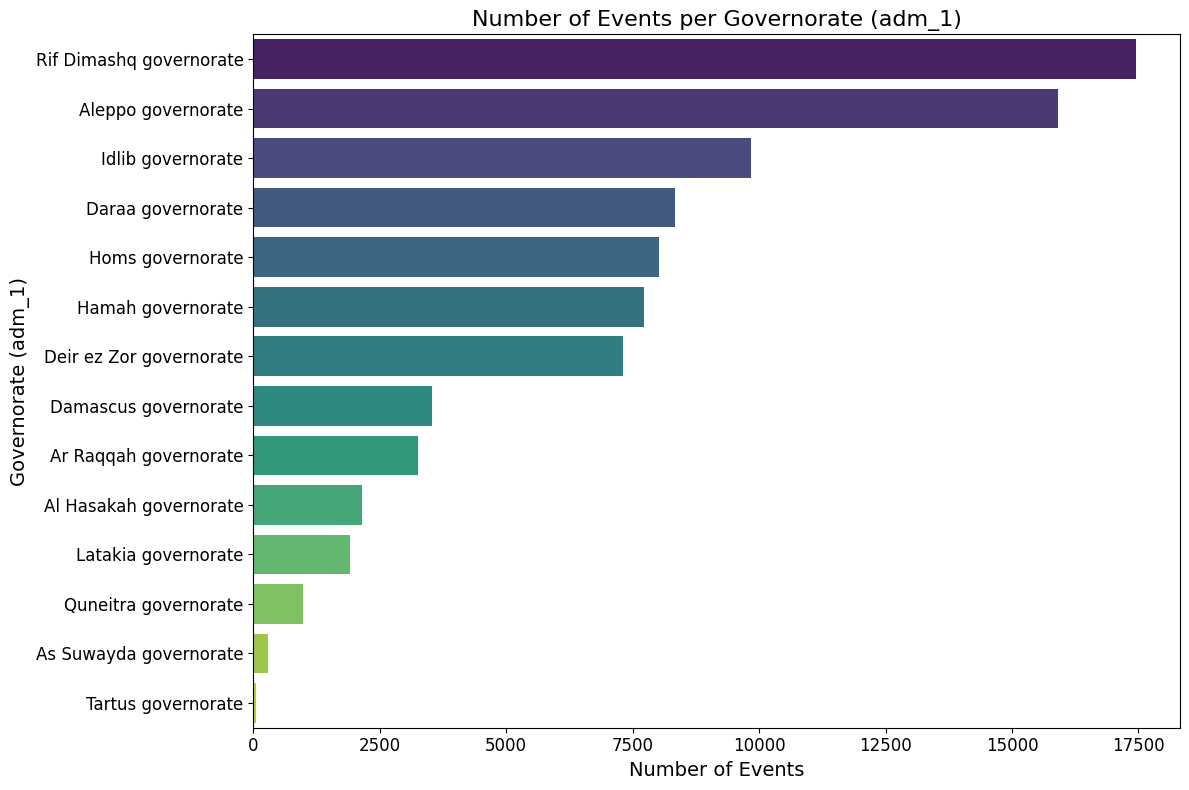



--- Analysis by Total Deaths (best) per Governorate (adm_1) ---

Table: Governorates Ranked by Total Deaths (best):
+-------------------------+-----------------------+
| Governorate (adm_1)     |   Total Deaths (best) |
|-------------------------+-----------------------|
| Hamah governorate       |                109019 |
| Aleppo governorate      |                 73925 |
| Rif Dimashq governorate |                 54425 |
| Idlib governorate       |                 34134 |
| Deir ez Zor governorate |                 31508 |
| Homs governorate        |                 30634 |
| Daraa governorate       |                 21937 |
| Ar Raqqah governorate   |                 17421 |
| Damascus governorate    |                 12637 |
| Al Hasakah governorate  |                 11387 |
| Latakia governorate     |                  7363 |
| Quneitra governorate    |                  3129 |
| As Suwayda governorate  |                  1423 |
| Tartus governorate      |                   723 

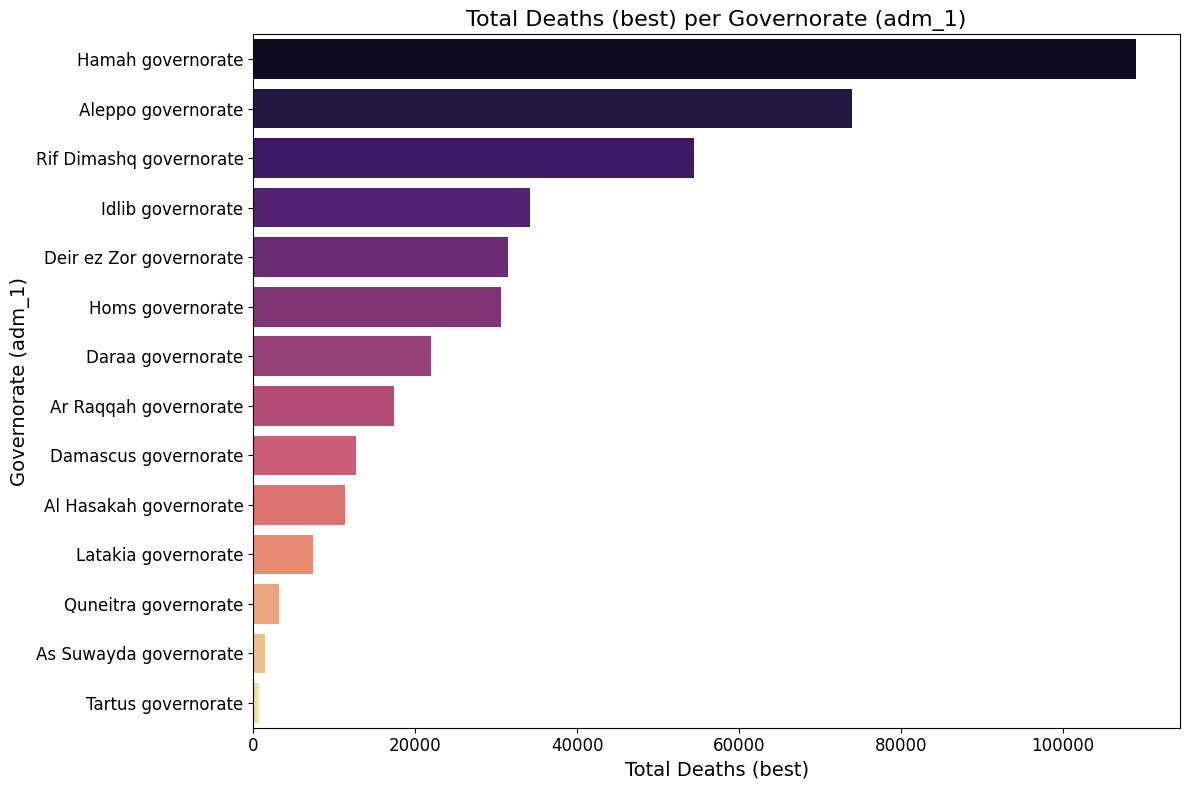

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np
if 'df' in locals() and isinstance(df, pd.DataFrame):
    if 'adm_1' in df.columns:
        # --- 2.1. حسب عدد الأحداث ---
        print("\n\n--- Analysis by Number of Events per Governorate (adm_1) ---")
        # التأكد من أن عمود adm_1 لا يحتوي على قيم NaN قبل value_counts إذا أردت استبعادها من الرسم
        # أو التعامل معها كفئة منفصلة. df.info() الأخير أظهر أنه لا يوجد NaN.
        events_per_adm1_en = df['adm_1'].value_counts().reset_index()
        events_per_adm1_en.columns = ['Governorate (adm_1)', 'Number of Events']

        print("\nTable: Governorates Ranked by Number of Events:")
        print(tabulate(events_per_adm1_en, headers='keys', tablefmt='psql', showindex=False))

        plt.figure(figsize=(12, 8))
        sns.barplot(x='Number of Events', y='Governorate (adm_1)', data=events_per_adm1_en, palette="viridis", hue='Governorate (adm_1)', dodge=False, legend=False)
        plt.title('Number of Events per Governorate (adm_1)', fontsize=16)
        plt.xlabel('Number of Events', fontsize=14)
        plt.ylabel('Governorate (adm_1)', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()

        # --- 2.2. حسب إجمالي عدد القتلى (عمود 'best') ---
        if 'best' in df.columns:
            print("\n\n--- Analysis by Total Deaths (best) per Governorate (adm_1) ---")
            deaths_per_adm1_en = df.groupby('adm_1')['best'].sum().sort_values(ascending=False).reset_index()
            deaths_per_adm1_en.columns = ['Governorate (adm_1)', 'Total Deaths (best)']

            print("\nTable: Governorates Ranked by Total Deaths (best):")
            print(tabulate(deaths_per_adm1_en, headers='keys', tablefmt='psql', showindex=False))

            plt.figure(figsize=(12, 8))
            sns.barplot(x='Total Deaths (best)', y='Governorate (adm_1)', data=deaths_per_adm1_en, palette="magma", hue='Governorate (adm_1)', dodge=False, legend=False)
            plt.title('Total Deaths (best) per Governorate (adm_1)', fontsize=16)
            plt.xlabel('Total Deaths (best)', fontsize=14)
            plt.ylabel('Governorate (adm_1)', fontsize=14)
            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            plt.tight_layout()
            plt.show()
        else:
            print("\nColumn 'best' (for death count) not found. Cannot perform death analysis.")
    else:
        print("\nColumn 'adm_1' (Governorates) not found. Cannot perform violence exposure analysis.")
else:
    print("DataFrame 'df' is not defined. Please load your data first.")



--- Analysis by Total Civilian Deaths per Governorate (adm_1) ---

Table: Governorates Ranked by Total Civilian Deaths:
+-------------------------+-------------------------+
| Governorate (adm_1)     |   Total Civilian Deaths |
|-------------------------+-------------------------|
| Aleppo governorate      |                   29039 |
| Rif Dimashq governorate |                   23635 |
| Idlib governorate       |                   16114 |
| Deir ez Zor governorate |                   11889 |
| Homs governorate        |                   11249 |
| Daraa governorate       |                    7581 |
| Hamah governorate       |                    7491 |
| Ar Raqqah governorate   |                    6678 |
| Damascus governorate    |                    4552 |
| Al Hasakah governorate  |                    2174 |
| Latakia governorate     |                     982 |
| Tartus governorate      |                     528 |
| As Suwayda governorate  |                     359 |
| Quneitra gov

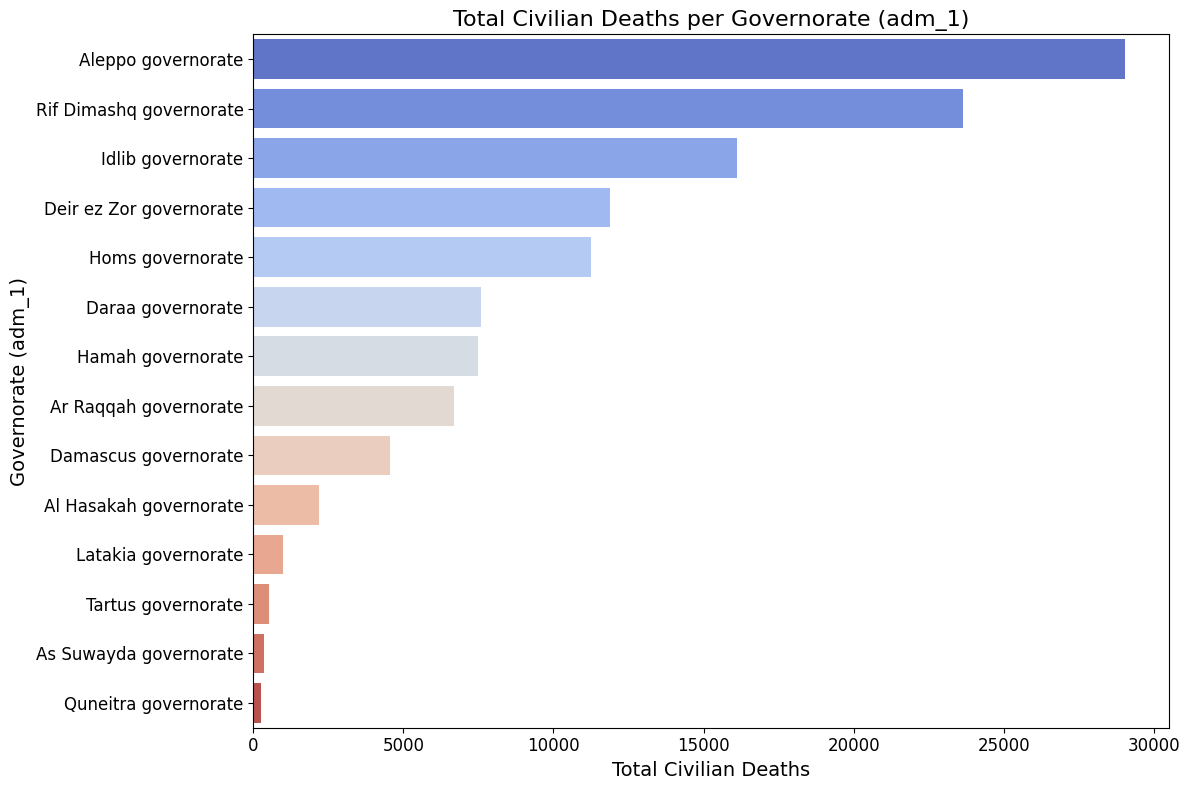

In [39]:
if 'adm_1' in df.columns and 'deaths_civilians' in df.columns:
        print("\n\n--- Analysis by Total Civilian Deaths per Governorate (adm_1) ---")

        civilian_deaths_by_adm1 = df.groupby('adm_1')['deaths_civilians'].sum().sort_values(ascending=False).reset_index()
        civilian_deaths_by_adm1.columns = ['Governorate (adm_1)', 'Total Civilian Deaths']

        print("\nTable: Governorates Ranked by Total Civilian Deaths:")
        print(tabulate(civilian_deaths_by_adm1, headers='keys', tablefmt='psql', showindex=False))

        plt.figure(figsize=(12, 8))
        sns.barplot(x='Total Civilian Deaths', y='Governorate (adm_1)', data=civilian_deaths_by_adm1, palette="coolwarm", hue='Governorate (adm_1)', dodge=False, legend=False)
        plt.title('Total Civilian Deaths per Governorate (adm_1)', fontsize=16)
        plt.xlabel('Total Civilian Deaths', fontsize=14)
        plt.ylabel('Governorate (adm_1)', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()


In [40]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    data_for_example = {
        'id': range(1, 11),
        'side_a': ['GovA', 'RebelX', 'IS', 'GovA - Civilians', 'RebelY', 'GovA', 'GovB', 'RebelZ', 'GovC', 'GovA'],
        'side_b': ['RebelX', 'Civilians', 'RebelA', 'RebelB', 'GovB', 'RebelY', 'Civilians', 'GovA', 'RebelB', 'Civilians'],
        'deaths_a': [10, 5, 0, 0, 15, 3, 7, 1, 0, 4],
        'deaths_b': [3, 0, 8, 1, 20, 0, 0, 5, 9, 0],
        'deaths_civilians': [2, 12, 3, 5, 1, 0, 12, 0, 1, 6]
    }
    df = pd.DataFrame(data_for_example)
    for col in ['side_a', 'side_b']: df[col] = df[col].astype('object')
    for col in ['deaths_a', 'deaths_b', 'deaths_civilians']: df[col] = df[col].astype('int16')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Analysis of Unique Death Values where 'Civilians' are side_b (Corrected) ---
required_cols = ['side_b', 'deaths_b', 'deaths_civilians']
if all(col in df.columns for col in required_cols):
    print("\n\n--- Analysis: Unique Death Values in Events where 'Civilians' are side_b ---")

    # 1. Filter the DataFrame for events where 'Civilians' is in side_b
    condition_side_b_is_civ = df['side_b'].astype(str).str.contains("Civilians", na=False)
    df_side_b_civ = df[condition_side_b_is_civ]

    if not df_side_b_civ.empty:
        print(f"Found {len(df_side_b_civ)} events to analyze where 'Civilians' are in side_b.")

        # 2. Analyze unique values and their frequencies for 'deaths_b'
        print("\n--- Unique Values Distribution for 'deaths_b' in these events ---")
        deaths_b_unique_counts = df_side_b_civ['deaths_b'].value_counts(dropna=False).reset_index()
        deaths_b_unique_counts.columns = ['deaths_b Value', 'Frequency']
        print(tabulate(deaths_b_unique_counts, headers='keys', tablefmt='psql', showindex=False))

        # 3. Analyze unique values and their frequencies for 'deaths_civilians'
        print("\n--- Unique Values Distribution for 'deaths_civilians' in these events ---")

        # *** CORRECTED LINE HERE ***
        # We simply use .value_counts() which is already sorted, then .reset_index()
        deaths_civ_unique_counts = df_side_b_civ['deaths_civilians'].value_counts(dropna=False).reset_index()
        deaths_civ_unique_counts.columns = ['deaths_civilians Value', 'Frequency']

        # Display top N for brevity if there are many unique values
        num_to_display = 20
        print(f"(Displaying top {num_to_display} most frequent values)")
        print(tabulate(deaths_civ_unique_counts.head(num_to_display), headers='keys', tablefmt='psql', showindex=False))
        if len(deaths_civ_unique_counts) > num_to_display:
            print(f"... and {len(deaths_civ_unique_counts) - num_to_display} more unique values.")

    else:
        print("No events found where 'Civilians' were listed as a party in 'side_b'.")

else:
    print("\nOne or more required columns are missing. Cannot perform this analysis.")

Using existing DataFrame 'df'.


--- Analysis: Unique Death Values in Events where 'Civilians' are side_b ---
Found 3953 events to analyze where 'Civilians' are in side_b.

--- Unique Values Distribution for 'deaths_b' in these events ---
+------------------+-------------+
|   deaths_b Value |   Frequency |
|------------------+-------------|
|                0 |        3953 |
+------------------+-------------+

--- Unique Values Distribution for 'deaths_civilians' in these events ---
(Displaying top 20 most frequent values)
+--------------------------+-------------+
|   deaths_civilians Value |   Frequency |
|--------------------------+-------------|
|                        1 |        1899 |
|                        2 |         628 |
|                        3 |         320 |
|                        0 |         224 |
|                        4 |         180 |
|                        5 |         127 |
|                        6 |         107 |
|                        7 |          76



--- Analysis: Number of Years with Recorded Violence per Governorate (adm_1) ---

Table: Governorates Ranked by Number of Years with Violence:
+-------------------------+---------------------------------+
| Governorate (adm_1)     |   Number of Years with Violence |
|-------------------------+---------------------------------|
| Damascus governorate    |                              15 |
| Aleppo governorate      |                              14 |
| Al Hasakah governorate  |                              13 |
| Ar Raqqah governorate   |                              13 |
| As Suwayda governorate  |                              13 |
| Daraa governorate       |                              13 |
| Deir ez Zor governorate |                              13 |
| Hamah governorate       |                              13 |
| Homs governorate        |                              13 |
| Idlib governorate       |                              13 |
| Latakia governorate     |                      

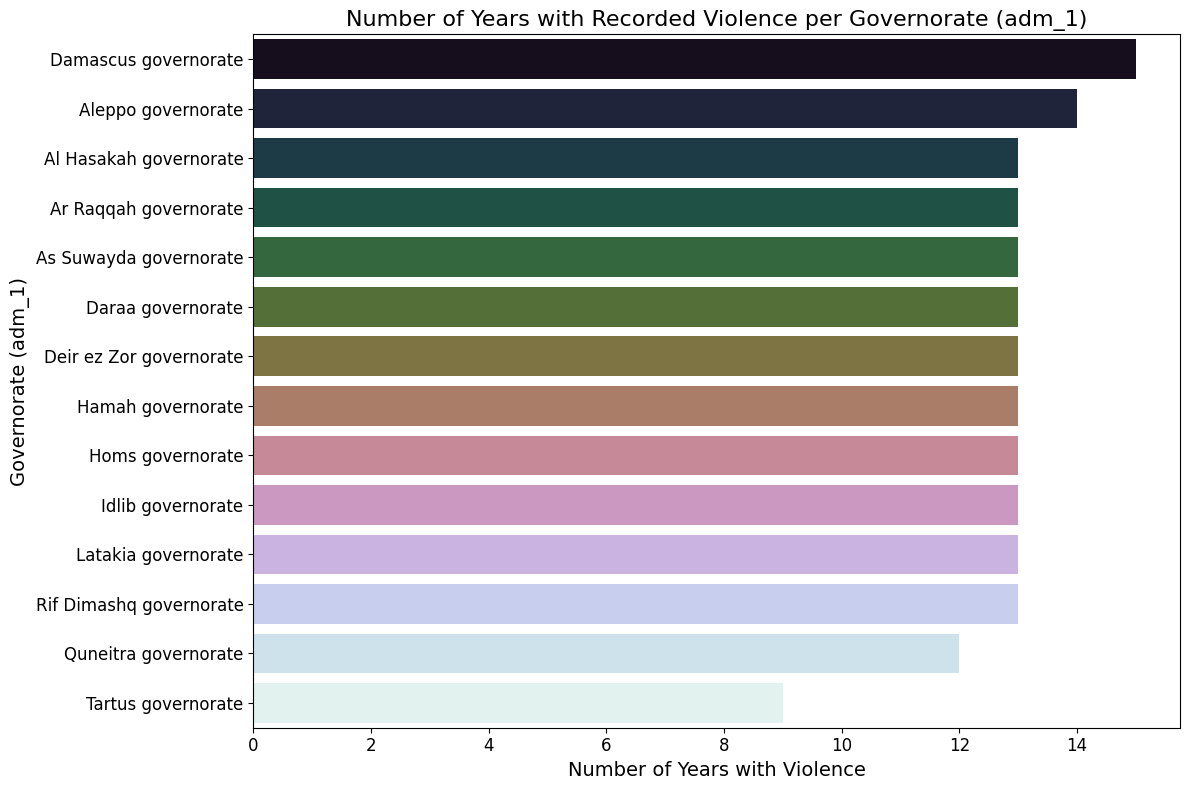

In [41]:
print("\n\n--- Analysis: Number of Years with Recorded Violence per Governorate (adm_1) ---")

# Calculate the number of unique years with violence for each adm_1
years_of_violence_by_adm1 = df.groupby('adm_1')['year'].nunique().sort_values(ascending=False).reset_index()
years_of_violence_by_adm1.columns = ['Governorate (adm_1)', 'Number of Years with Violence']

print("\nTable: Governorates Ranked by Number of Years with Violence:")
print(tabulate(years_of_violence_by_adm1, headers='keys', tablefmt='psql', showindex=False))

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Years with Violence', y='Governorate (adm_1)', data=years_of_violence_by_adm1, palette="cubehelix", hue='Governorate (adm_1)', dodge=False, legend=False)
plt.title('Number of Years with Recorded Violence per Governorate (adm_1)', fontsize=16)
plt.xlabel('Number of Years with Violence', fontsize=14)
plt.ylabel('Governorate (adm_1)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [42]:

print("\n\n--- Analysis: Number and List of Years with Recorded Violence per Governorate (adm_1) ---")

# Calculate the number of unique years AND the list of unique years for each adm_1
violence_stats_by_adm1 = df.groupby('adm_1')['year'].agg(
num_violent_years='nunique',
actual_violent_years=lambda x: sorted(list(x.unique()))
).sort_values(by='num_violent_years', ascending=False).reset_index()

violence_stats_by_adm1.columns = [
'Governorate (adm_1)',
'Number of Years with Violence',
'Actual Years with Violence'
]

print("\nTable: Governorates Ranked by Number of Years with Violence (Including Actual Years):")
# قد تحتاج إلى تعديل عرض الأعمدة لـ tabulate إذا كانت قائمة السنوات طويلة جدًا
# يمكن تحويل قائمة السنوات إلى سلسلة نصية مفصولة بفواصل
df_for_tabulate = violence_stats_by_adm1.copy()
df_for_tabulate['Actual Years with Violence'] = df_for_tabulate['Actual Years with Violence'].apply(
lambda years_list: ', '.join(map(str, years_list))
)
print(tabulate(df_for_tabulate, headers='keys', tablefmt='psql', showindex=False))




--- Analysis: Number and List of Years with Recorded Violence per Governorate (adm_1) ---

Table: Governorates Ranked by Number of Years with Violence (Including Actual Years):
+-------------------------+---------------------------------+------------------------------------------------------------------------------------------+
| Governorate (adm_1)     |   Number of Years with Violence | Actual Years with Violence                                                               |
|-------------------------+---------------------------------+------------------------------------------------------------------------------------------|
| Damascus governorate    |                              15 | 2004, 2008, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023 |
| Aleppo governorate      |                              14 | 2004, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023       |
| Al Hasakah governorate  |                             

In [43]:

damascus_years = [2004, 2008]
aleppo_years = [2004]
target_cities = ['Damascus governorate', 'Aleppo governorate'] # استخدم الأسماء الموحدة بعد التنظيف

# --- بناء الشروط لفلترة البيانات ---
# شرط الأحداث في دمشق خلال السنوات المحددة
condition_damascus = (df['adm_1'] == 'Damascus governorate') & (df['year'].isin(damascus_years))

# شرط الأحداث في حلب خلال السنوات المحددة
condition_aleppo = (df['adm_1'] == 'Aleppo governorate') & (df['year'].isin(aleppo_years))

# الشرط النهائي هو دمج الشروط أعلاه باستخدام عامل التشغيل المنطقي OR (|)
combined_condition = condition_damascus | condition_aleppo

# --- تطبيق الفلترة على الـ DataFrame ---
filtered_events = df[combined_condition].copy() # استخدام .copy() لتجنب SettingWithCopyWarning

# --- تحديد الأعمدة المهمة للعرض ---
# يمكنك تعديل هذه القائمة لتشمل الأعمدة التي تعتبرها مهمة
important_columns = [
    'id', 'year', 'adm_1', 'adm_2',
    'where_description', 'side_a', 'side_b','deaths_b', 'deaths_civilians','conflict_name'
]

# التأكد من أن الأعمدة المهمة موجودة في الـ DataFrame قبل تحديدها
actual_important_columns = [col for col in important_columns if col in filtered_events.columns]

# --- عرض النتائج ---
if not filtered_events.empty:
    print(f"\n--- تم العثور على {len(filtered_events)} حدثًا في دمشق (2004, 2008) وحلب (2008) ---")

    if actual_important_columns:
        # عرض فقط الأعمدة المهمة للصفوف التي تم فلترتها
        df_to_display = filtered_events[actual_important_columns]
        print("\nتفاصيل الأحداث المهمة:")
        print(tabulate(df_to_display, headers='keys', tablefmt='psql', showindex=False))
    else:
        print("\n⚠️ لم يتم العثور على أي من الأعمدة المهمة المحددة للعرض.")
        print("عرض جميع أعمدة الصفوف التي تم فلترتها بدلاً من ذلك:")
        print(tabulate(filtered_events, headers='keys', tablefmt='psql', showindex=False))


    # عرض عدد الأحداث لكل مدينة وسنة (اختياري)
    print("\n--- عدد الأحداث حسب المدينة والسنة ---")
    event_counts = filtered_events.groupby(['adm_1', 'year']).size().reset_index(name='Count')
    print(tabulate(event_counts, headers='keys', tablefmt='psql', showindex=False))

else:
    print("\n✅ لم يتم العثور على أي أحداث تتوافق مع الشروط المحددة في دمشق (2004, 2008) وحلب (2008).")



--- تم العثور على 4 حدثًا في دمشق (2004, 2008) وحلب (2008) ---

تفاصيل الأحداث المهمة:
+--------+--------+----------------------+----------------------+---------------------+----------------------+-----------+------------+--------------------+---------------------------------+
|     id |   year | adm_1                | adm_2                | where_description   | side_a               | side_b    |   deaths_b |   deaths_civilians | conflict_name                   |
|--------+--------+----------------------+----------------------+---------------------+----------------------+-----------+------------+--------------------+---------------------------------|
| 177142 |   2004 | Damascus governorate | Damascus district    | Damascus, Syria     | Government of Israel | Hamas     |          1 |                  0 | Israel: Palestine               |
| 179949 |   2008 | Damascus governorate | Damascus district    | Damascus            | Government of Israel | Hezbollah |          1 |             



--- Analysis: Event Distribution by ADM2 within each ADM1 ---

Generating ADM2 event distribution charts for the top 5 governorates: ['Rif Dimashq governorate', 'Aleppo governorate', 'Idlib governorate', 'Daraa governorate', 'Homs governorate']

Table: Top ADM2 Districts in Rif Dimashq governorate by Number of Events:
+-------------------------------+--------------------+
| ADM2 District                 |   Number of Events |
|-------------------------------+--------------------|
| Duma district                 |               6301 |
| Markaz Rif Dimashq district   |               6039 |
| Darayya district              |               1526 |
| Mintaqat az Zabadani district |                902 |
| At Tall district              |                783 |
| Qatana district               |                595 |
| Al Nabk district              |                340 |
| Qudsaya district              |                337 |
| Yabrud district               |                302 |
| Al Qutayfah dist

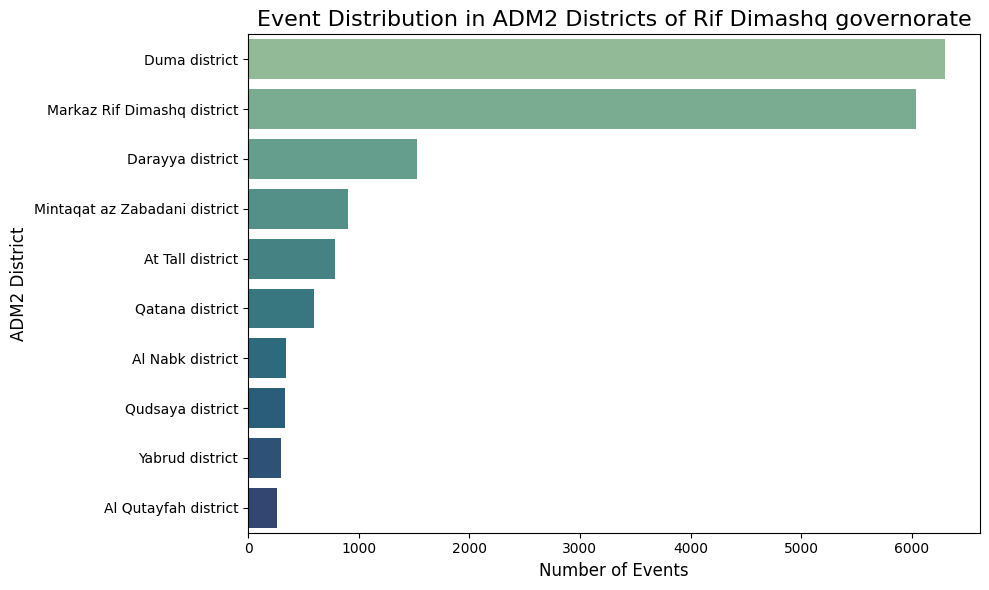


Table: Top ADM2 Districts in Aleppo governorate by Number of Events:
+------------------------+--------------------+
| ADM2 District          |   Number of Events |
|------------------------+--------------------|
| Jabal Saman district   |               7767 |
| Al Bab district        |               2581 |
| Mintaqat Azaz district |               1748 |
| Manbij district        |                795 |
| Atarib district        |                689 |
| As Safirah district    |                660 |
| Afrin district         |                589 |
| Ayn al Arab district   |                562 |
| Dayr Hafir district    |                355 |
| Jarabulus district     |                156 |
+------------------------+--------------------+


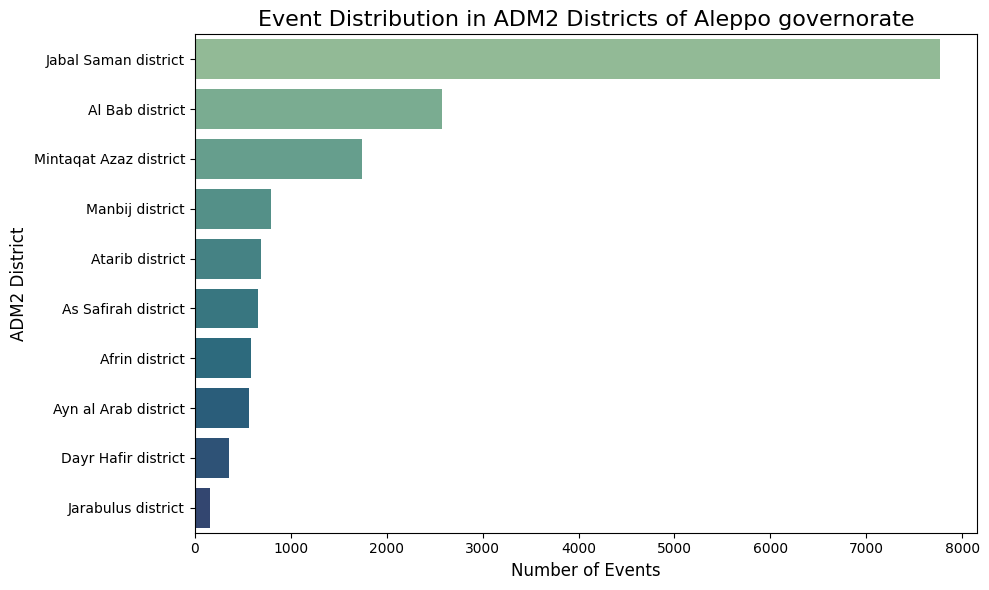


Table: Top ADM2 Districts in Idlib governorate by Number of Events:
+---------------------------+--------------------+
| ADM2 District             |   Number of Events |
|---------------------------+--------------------|
| Maarat al-Numaan district |               3312 |
| Ariha district            |               2626 |
| Markaz Idlib district     |               2552 |
| Jisr ash Shughur district |                881 |
| Harim district            |                471 |
+---------------------------+--------------------+


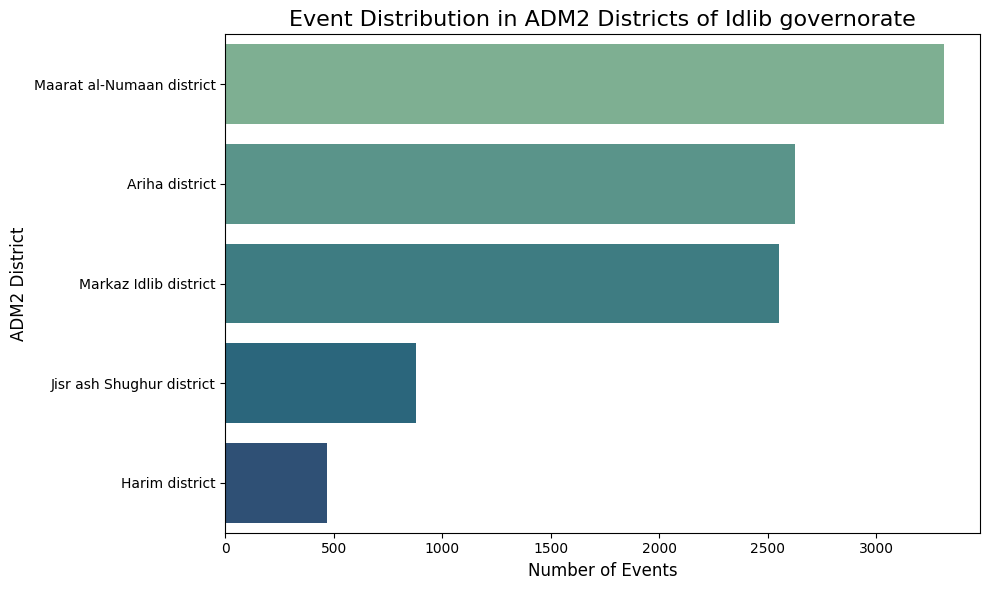


Table: Top ADM2 Districts in Daraa governorate by Number of Events:
+-----------------------+--------------------+
| ADM2 District         |   Number of Events |
|-----------------------+--------------------|
| Markaz Daraa district |               4391 |
| Izra district         |               3043 |
| As Sanamayn district  |                897 |
+-----------------------+--------------------+


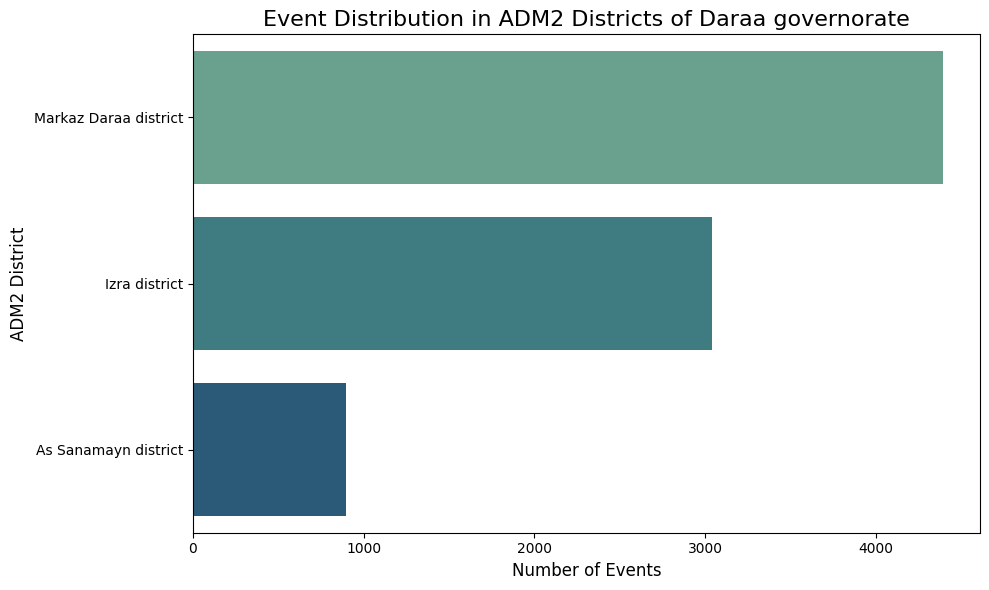


Table: Top ADM2 Districts in Homs governorate by Number of Events:
+-------------------------------+--------------------+
| ADM2 District                 |   Number of Events |
|-------------------------------+--------------------|
| Mintaqat Markaz Homs district |               2567 |
| Ar Rastan district            |               2211 |
| Tadmur district               |               2170 |
| Al Qusayr district            |                685 |
| Tall Kalakh district          |                223 |
| Al Mukharram district         |                167 |
+-------------------------------+--------------------+


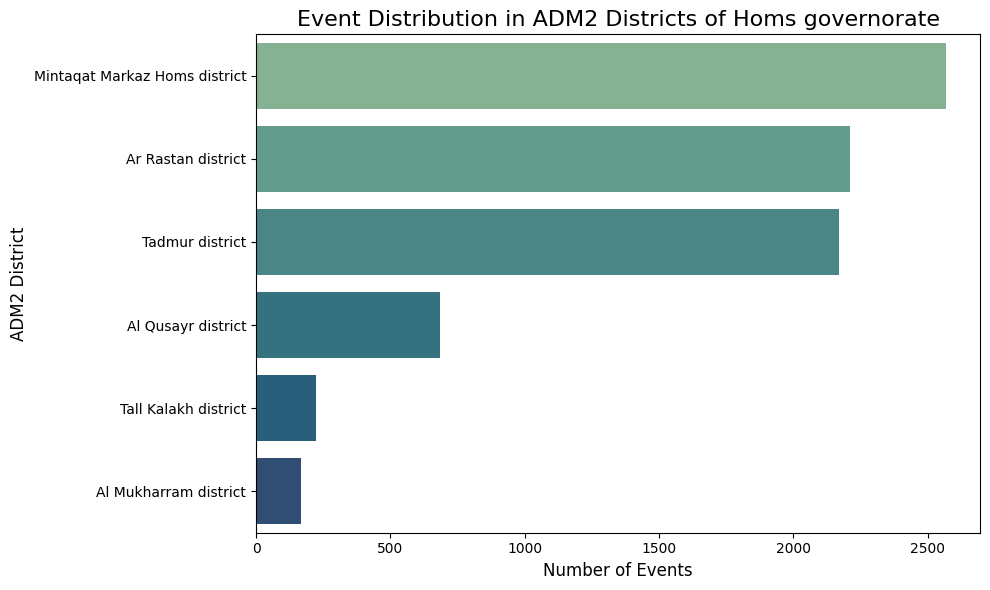

In [44]:

if 'df' in locals() and isinstance(df, pd.DataFrame):
    if 'adm_1' in df.columns and 'adm_2' in df.columns:
        print("\n\n--- Analysis: Event Distribution by ADM2 within each ADM1 ---")

        # Calculate total events per adm_1 to decide which ones to plot (e.g., top N)
        top_adm1_by_events = df['adm_1'].value_counts().nlargest(5).index.tolist() # Plot for top 5 governorates by event count
        print(f"\nGenerating ADM2 event distribution charts for the top {len(top_adm1_by_events)} governorates: {top_adm1_by_events}")

        for governorate in top_adm1_by_events:
            df_governorate = df[df['adm_1'] == governorate]

            if df_governorate.empty or df_governorate['adm_2'].isnull().all():
                print(f"\nNo valid ADM2 data or no events for {governorate}. Skipping chart.")
                continue

            # Calculate event counts for adm_2 within this governorate
            # Handle potential NaN values in adm_2 by filling them or dropping
            events_per_adm2 = df_governorate['adm_2'].value_counts(dropna=True).reset_index()
            events_per_adm2.columns = ['ADM2 District', 'Number of Events']

            # Limit to top N adm_2 districts for cleaner plots, e.g., top 10
            events_per_adm2_top = events_per_adm2.nlargest(10, 'Number of Events')

            if events_per_adm2_top.empty:
                print(f"\nNo ADM2 event data to plot for {governorate} after filtering/counting.")
                continue

            print(f"\nTable: Top ADM2 Districts in {governorate} by Number of Events:")
            print(tabulate(events_per_adm2_top, headers='keys', tablefmt='psql', showindex=False))

            # Create a bar chart
            plt.figure(figsize=(10, 6)) # Adjust size as needed
            sns.barplot(x='Number of Events', y='ADM2 District', data=events_per_adm2_top, palette="crest", hue='ADM2 District', dodge=False, legend=False)
            plt.title(f'Event Distribution in ADM2 Districts of {governorate}', fontsize=16)
            plt.xlabel('Number of Events', fontsize=12)
            plt.ylabel('ADM2 District', fontsize=12)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10) # Adjust if ADM2 names are long
            plt.tight_layout()
            plt.show()

    else:
        print("\nRequired columns 'adm_1' or 'adm_2' not found. Cannot perform analysis.")
else:
    print("DataFrame 'df' is not defined. Please load your data first.")

Using existing DataFrame 'df'.


--- Analysis: Civilian Deaths Distribution by ADM2 within each ADM1 ---

Generating ADM2 civilian death distribution charts for the top 5 governorates (by total civilian deaths): ['Aleppo governorate', 'Rif Dimashq governorate', 'Idlib governorate', 'Deir ez Zor governorate', 'Homs governorate']

Table: Top ADM2 Districts in Aleppo governorate by Total Civilian Deaths:
+------------------------+-------------------------+
| ADM2 District          |   Total Civilian Deaths |
|------------------------+-------------------------|
| Jabal Saman district   |                   18116 |
| Al Bab district        |                    3087 |
| Mintaqat Azaz district |                    2068 |
| Manbij district        |                    1454 |
| Atarib district        |                    1394 |
| As Safirah district    |                    1209 |
| Ayn al Arab district   |                     526 |
| Afrin district         |                     493 |
| Dayr Hafir

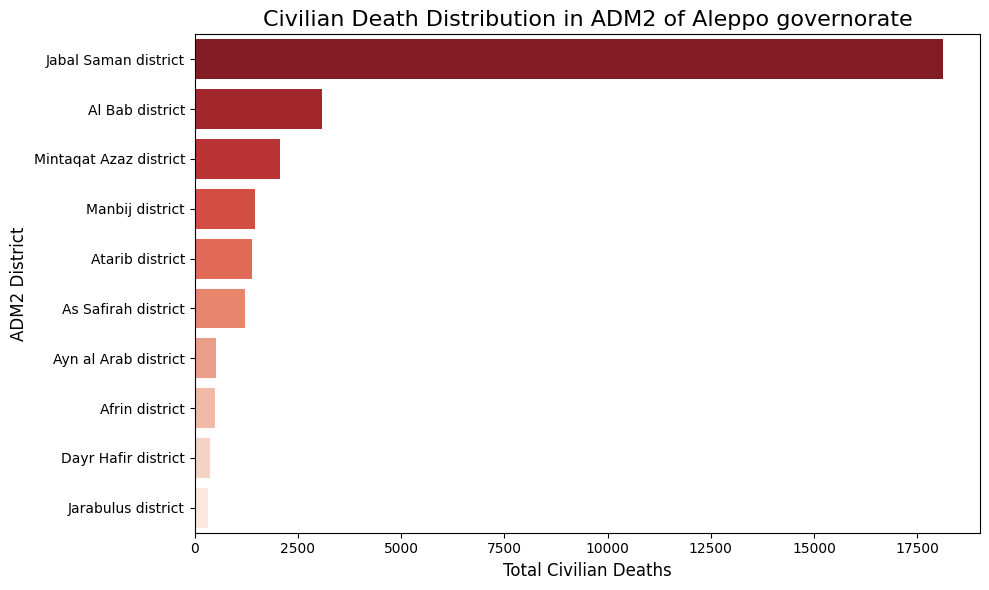


Table: Top ADM2 Districts in Rif Dimashq governorate by Total Civilian Deaths:
+-------------------------------+-------------------------+
| ADM2 District                 |   Total Civilian Deaths |
|-------------------------------+-------------------------|
| Markaz Rif Dimashq district   |                    9588 |
| Duma district                 |                    8014 |
| Darayya district              |                    2484 |
| Mintaqat az Zabadani district |                     824 |
| At Tall district              |                     591 |
| Qatana district               |                     547 |
| Qudsaya district              |                     545 |
| Al Nabk district              |                     542 |
| Al Qutayfah district          |                     267 |
| Yabrud district               |                     227 |
+-------------------------------+-------------------------+


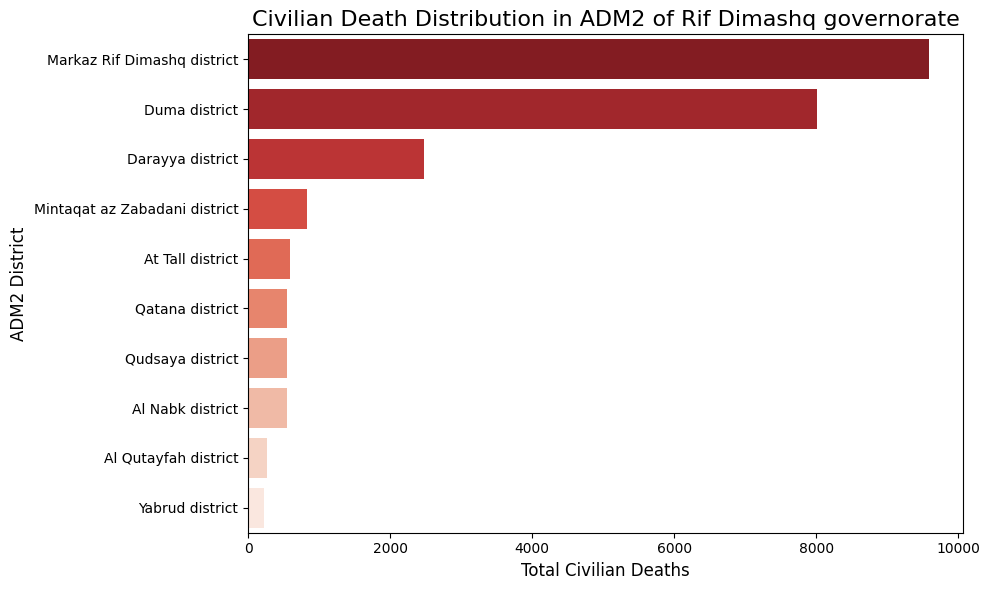


Table: Top ADM2 Districts in Idlib governorate by Total Civilian Deaths:
+---------------------------+-------------------------+
| ADM2 District             |   Total Civilian Deaths |
|---------------------------+-------------------------|
| Maarat al-Numaan district |                    5410 |
| Markaz Idlib district     |                    4586 |
| Ariha district            |                    3527 |
| Jisr ash Shughur district |                    1506 |
| Harim district            |                    1085 |
+---------------------------+-------------------------+


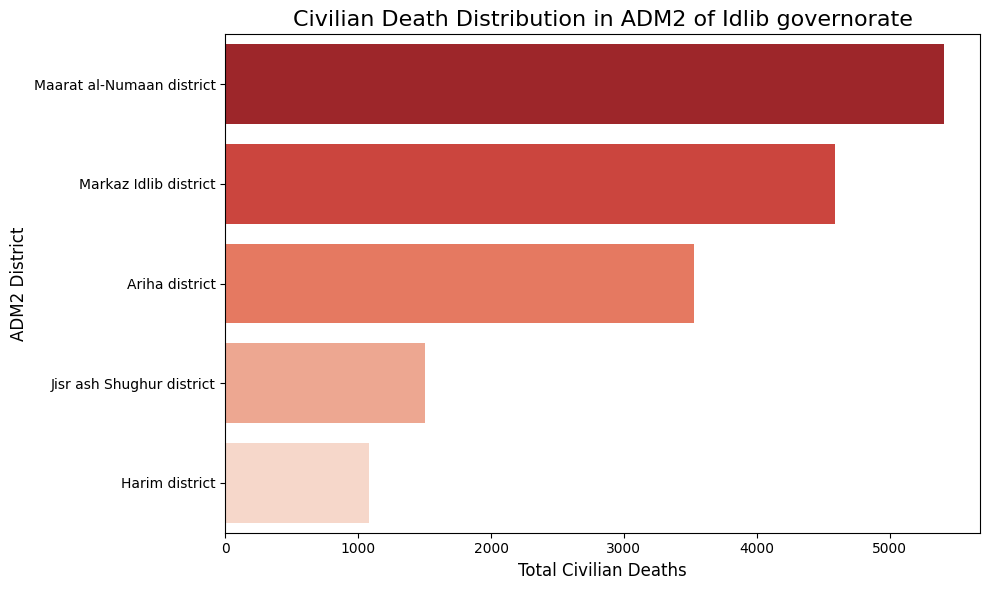


Table: Top ADM2 Districts in Deir ez Zor governorate by Total Civilian Deaths:
+----------------------+-------------------------+
| ADM2 District        |   Total Civilian Deaths |
|----------------------+-------------------------|
| Deir ez Zor district |                    5632 |
| Albu Kamal district  |                    4346 |
| Al Mayadin district  |                    1911 |
+----------------------+-------------------------+


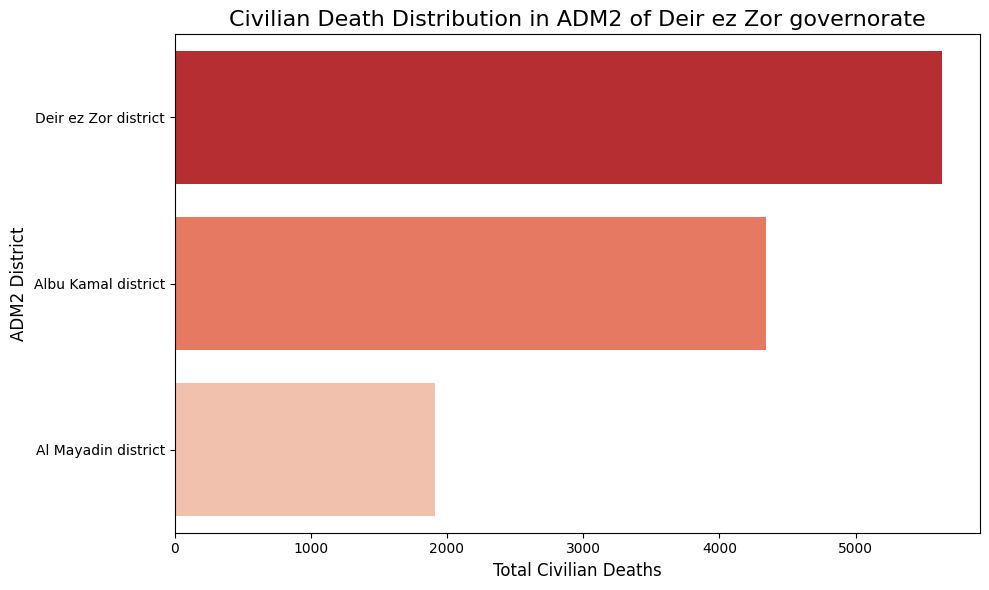


Table: Top ADM2 Districts in Homs governorate by Total Civilian Deaths:
+-------------------------------+-------------------------+
| ADM2 District                 |   Total Civilian Deaths |
|-------------------------------+-------------------------|
| Mintaqat Markaz Homs district |                    5861 |
| Ar Rastan district            |                    2771 |
| Tadmur district               |                    1365 |
| Al Qusayr district            |                     744 |
| Tall Kalakh district          |                     313 |
| Al Mukharram district         |                     195 |
+-------------------------------+-------------------------+


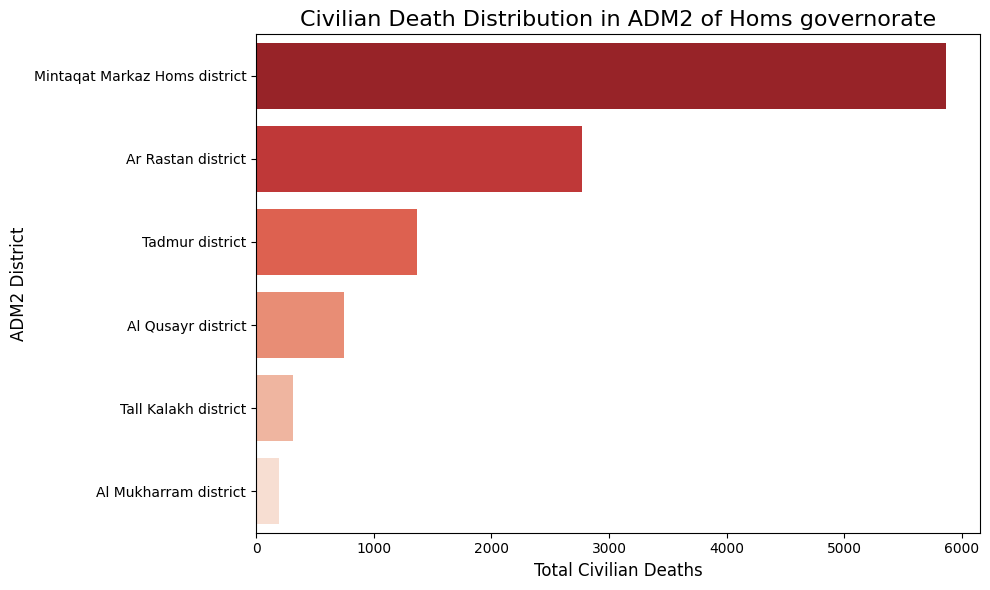

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    # Sample data to represent adm_1, adm_2, and deaths_civilians
    adm1_list = ['Aleppo governorate']*20 + ['Idlib governorate']*15 + ['Damascus governorate']*10 + ['Homs governorate']*8
    adm2_list_aleppo = ['Jabal Saman district']*5 + ['Afrin district']*7 + ['Azaz district']*4 + ['Al Bab district']*4
    adm2_list_idlib = ['Markaz Idlib district']*6 + ['Ariha district']*5 + ['Harim district']*4
    adm2_list_damascus = ['Damascus district']*6 + ['Markaz Rif Dimashq district']*4
    adm2_list_homs = ['Mintaqat Markaz Homs district']*5 + ['Tadmur district']*3

    all_adm2 = adm2_list_aleppo + adm2_list_idlib + adm2_list_damascus + adm2_list_homs
    num_events = len(all_adm2)

    data_for_example = {
        'id': range(1, num_events + 1),
        'adm_1': adm1_list[:num_events],
        'adm_2': all_adm2,
        'year': np.random.choice([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], num_events),
        'deaths_civilians': np.random.randint(0, 30, num_events) # Civilian deaths
    }
    df = pd.DataFrame(data_for_example)
    df['adm_1'] = df['adm_1'].astype('object')
    df['adm_2'] = df['adm_2'].astype('object')
    df['year'] = df['year'].astype('int16')
    df['deaths_civilians'] = df['deaths_civilians'].astype('int16')
    print(f"Sample df created with {num_events} events.")
else:
    print("Using existing DataFrame 'df'.")

# --- Analysis: Civilian Deaths Distribution by ADM2 within each ADM1 ---
if 'df' in locals() and isinstance(df, pd.DataFrame):
    if 'adm_1' in df.columns and 'adm_2' in df.columns and 'deaths_civilians' in df.columns:
        print("\n\n--- Analysis: Civilian Deaths Distribution by ADM2 within each ADM1 ---")

        # Calculate total civilian deaths per adm_1 to decide which ones to plot (e.g., top N by civilian deaths)
        # Or iterate through all adm_1 if preferred and the number is manageable.
        # For this example, let's find adm_1 with most total civilian deaths first.
        adm1_total_civilian_deaths = df.groupby('adm_1')['deaths_civilians'].sum().sort_values(ascending=False)
        top_adm1_by_civilian_deaths = adm1_total_civilian_deaths.nlargest(5).index.tolist() # Plot for top 5 governorates

        if not top_adm1_by_civilian_deaths:
             print("\nNo governorates found after calculating total civilian deaths. Check data in 'adm_1' and 'deaths_civilians'.")
        else:
            print(f"\nGenerating ADM2 civilian death distribution charts for the top {len(top_adm1_by_civilian_deaths)} governorates (by total civilian deaths): {top_adm1_by_civilian_deaths}")

            for governorate in top_adm1_by_civilian_deaths:
                df_governorate = df[df['adm_1'] == governorate].copy() # Use .copy() to avoid SettingWithCopyWarning

                if df_governorate.empty or df_governorate['adm_2'].isnull().all():
                    print(f"\nNo valid ADM2 data or no events with civilian deaths for {governorate}. Skipping chart.")
                    continue

                # Calculate civilian deaths for adm_2 within this governorate
                # Fill NaN in deaths_civilians with 0 for summing, or ensure it's handled in groupby
                df_governorate['deaths_civilians'] = df_governorate['deaths_civilians'].fillna(0)
                deaths_per_adm2 = df_governorate.groupby('adm_2')['deaths_civilians'].sum().sort_values(ascending=False).reset_index()
                deaths_per_adm2.columns = ['ADM2 District', 'Total Civilian Deaths']

                # Filter out ADM2 districts with zero civilian deaths for cleaner plotting
                deaths_per_adm2_filtered = deaths_per_adm2[deaths_per_adm2['Total Civilian Deaths'] > 0]

                # Limit to top N adm_2 districts for cleaner plots, e.g., top 10
                deaths_per_adm2_top = deaths_per_adm2_filtered.nlargest(10, 'Total Civilian Deaths')

                if deaths_per_adm2_top.empty:
                    print(f"\nNo ADM2 districts with civilian deaths to plot for {governorate} after filtering.")
                    continue

                print(f"\nTable: Top ADM2 Districts in {governorate} by Total Civilian Deaths:")
                print(tabulate(deaths_per_adm2_top, headers='keys', tablefmt='psql', showindex=False))

                # Create a bar chart
                plt.figure(figsize=(10, 6))
                sns.barplot(x='Total Civilian Deaths', y='ADM2 District', data=deaths_per_adm2_top, palette="Reds_r", hue='ADM2 District', dodge=False, legend=False)
                plt.title(f'Civilian Death Distribution in ADM2 of {governorate}', fontsize=16)
                plt.xlabel('Total Civilian Deaths', fontsize=12)
                plt.ylabel('ADM2 District', fontsize=12)
                plt.xticks(fontsize=10)
                plt.yticks(fontsize=10)
                plt.tight_layout()
                plt.show()

    else:
        print("\nRequired columns 'adm_1', 'adm_2', or 'deaths_civilians' not found. Cannot perform analysis.")
else:
    print("DataFrame 'df' is not defined. Please load your data first.")


--- تحديد السنوات الأشد قسوة لكل محافظة (adm_1) ---
   (بناءً على عدد الضحايا الإجمالي 'best' وعدد أحداث العنف)

جاري تحليل عدد الضحايا الإجمالي لكل محافظة حسب السنة...
✅ اكتمل تحليل عدد الضحايا الإجمالي.

جاري تحليل عدد أحداث العنف لكل محافظة حسب السنة...
✅ اكتمل تحليل عدد أحداث العنف.

--- ملخص السنوات الأشد قسوة لكل محافظة ---
+-------------------------+-----------------------------+--------------------+-----------------------------+-------------------+
| Governorate (adm_1)     |   Harshest Year (by Deaths) |   Max Total Deaths |   Harshest Year (by Events) |   Max Event Count |
|-------------------------+-----------------------------+--------------------+-----------------------------+-------------------|
| Al Hasakah governorate  |                        2015 |               3576 |                        2015 |               543 |
| Aleppo governorate      |                        2014 |              18213 |                        2014 |              3912 |
| Ar Raqqah governorat

/tmp/ipython-input-46-4289239678.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Max Total Deaths', y='Governorate (adm_1)', data=plot_data_sorted_deaths, palette='Reds_d')


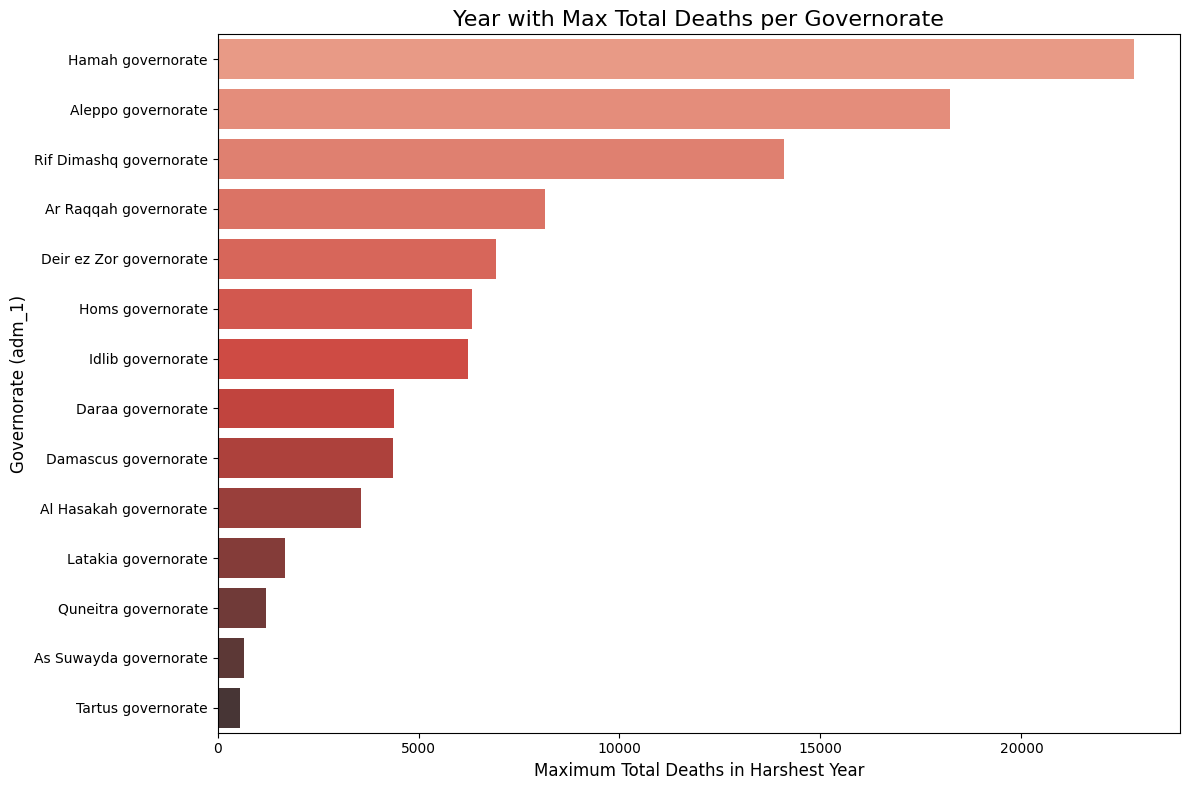

/tmp/ipython-input-46-4289239678.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Max Event Count', y='Governorate (adm_1)', data=plot_data_sorted_events, palette='Blues_d')


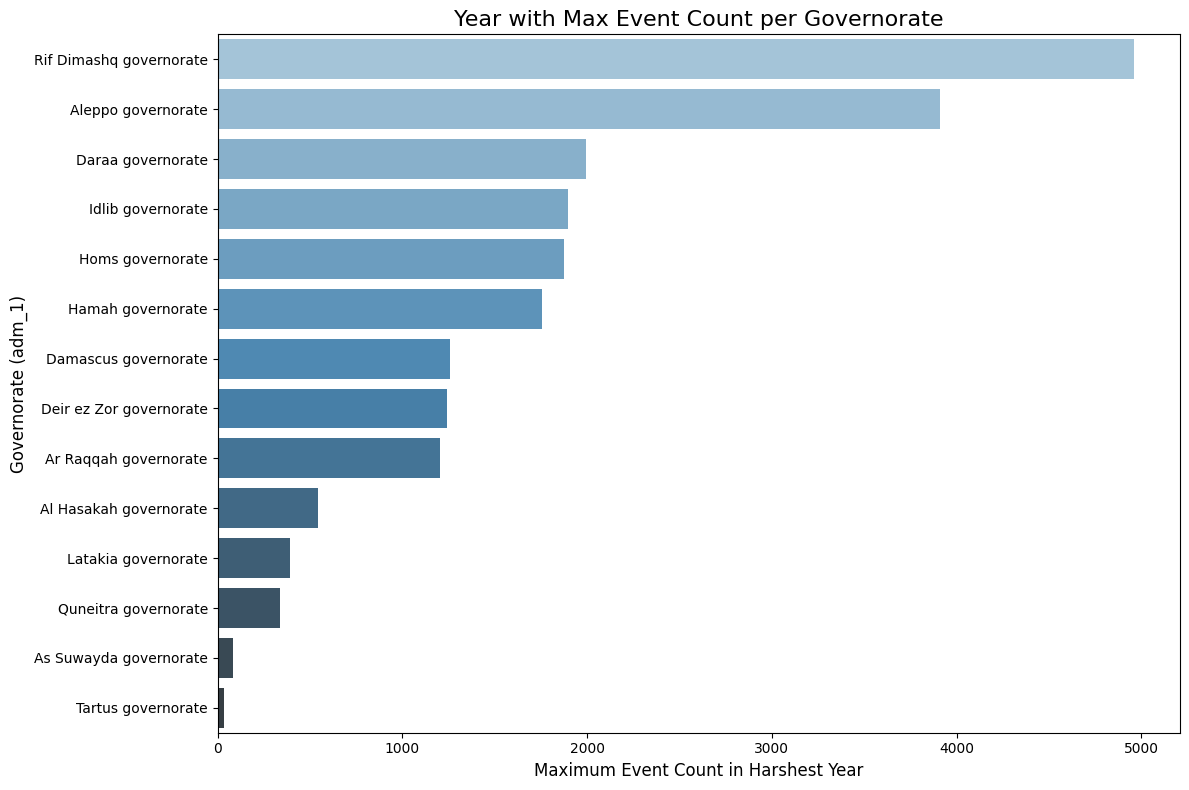


--- انتهى تحديد السنوات الأشد قسوة ---


In [46]:
import pandas as pd
from tabulate import tabulate # للتأكد من استيراد tabulate للعرض الجدولي
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns needed for this analysis
required_cols = ['adm_1', 'year', 'best']

# Check if the necessary columns exist in the DataFrame
if not all(col in df.columns for col in required_cols):
    missing = [col for col in required_cols if col not in df.columns]
    print(f"❌ خطأ: الأعمدة التالية مطلوبة للتحليل ولكنها غير موجودة: {missing}")
    if 'df' in locals():
         print("الأعمدة المتاحة:", list(df.columns))
else:
    print("\n--- تحديد السنوات الأشد قسوة لكل محافظة (adm_1) ---")
    print("   (بناءً على عدد الضحايا الإجمالي 'best' وعدد أحداث العنف)")

    # 1. تحليل عدد الضحايا الإجمالي ('best') لكل محافظة حسب السنة
    print("\nجاري تحليل عدد الضحايا الإجمالي لكل محافظة حسب السنة...")
    # Group by governorate and year, then sum the 'best' column
    deaths_by_adm1_year = df.groupby(['adm_1', 'year'])['best'].sum().reset_index()

    # For each governorate, find the year with the maximum total deaths
    # idxmax() finds the index of the maximum value within each group
    harshest_year_by_deaths = deaths_by_adm1_year.loc[deaths_by_adm1_year.groupby('adm_1')['best'].idxmax()]

    # Ensure 'adm_1' is a column for renaming and merging
    if harshest_year_by_deaths.index.name == 'adm_1':
         harshest_year_by_deaths = harshest_year_by_deaths.reset_index()

    # NOW rename the 'adm_1' column before merging
    harshest_year_by_deaths = harshest_year_by_deaths.rename(columns={'adm_1': 'Governorate (adm_1)'})

    # Rename year and best columns for clarity in the final summary
    harshest_year_by_deaths = harshest_year_by_deaths.rename(columns={
        'year': 'Harshest Year (by Deaths)',
        'best': 'Max Total Deaths'
    })

    print("✅ اكتمل تحليل عدد الضحايا الإجمالي.")

    # 2. تحليل عدد أحداث العنف لكل محافظة حسب السنة
    print("\nجاري تحليل عدد أحداث العنف لكل محافظة حسب السنة...")
    # Group by governorate and year, then count the number of events (rows)
    events_by_adm1_year = df.groupby(['adm_1', 'year']).size().reset_index(name='Event Count')

    # For each governorate, find the year with the maximum event count
    harshest_year_by_events = events_by_adm1_year.loc[events_by_adm1_year.groupby('adm_1')['Event Count'].idxmax()]

    # Ensure 'adm_1' is a column for renaming and merging
    if harshest_year_by_events.index.name == 'adm_1':
        harshest_year_by_events = harshest_year_by_events.reset_index()

    # NOW rename the 'adm_1' column before merging
    harshest_year_by_events = harshest_year_by_events.rename(columns={'adm_1': 'Governorate (adm_1)'})

    # Rename year and count columns for clarity in the final summary
    harshest_year_by_events = harshest_year_by_events.rename(columns={
        'year': 'Harshest Year (by Events)',
        'Event Count': 'Max Event Count'
    })

    print("✅ اكتمل تحليل عدد أحداث العنف.")

    # 3. دمج النتائج وعرضها في جدول
    print("\n--- ملخص السنوات الأشد قسوة لكل محافظة ---")

    harshest_years_summary = pd.merge(
        harshest_year_by_deaths,
        harshest_year_by_events,
        on='Governorate (adm_1)',
        how='outer' # Use outer merge to keep all governorates
    )

    # Handle potential NaNs
    harshest_years_summary = harshest_years_summary.fillna('N/A')

    # Sort the final summary by governorate name
    harshest_years_summary = harshest_years_summary.sort_values(by='Governorate (adm_1)').reset_index(drop=True)

    # Display the summary table
    if not harshest_years_summary.empty:
        print(tabulate(harshest_years_summary, headers='keys', tablefmt='psql', showindex=False))
    else:
        print("⚠️ لم يتمكن النظام من تجميع النتائج. يرجى مراجعة البيانات أو الأعمدة.")

    # 4. إضافة المخططات البيانية
    print("\n--- عرض مخططات السنوات الأشد قسوة ---")

    if not harshest_years_summary.empty:
        # تأكد من تحويل الأعمدة الرقمية إلى نوع رقمي قبل الرسم، مع استبدال 'N/A' بـ NaN
        # ثم التعامل مع NaNs في الرسم إذا لزم الأمر، أو تصفية الصفوف التي بها NaNs في القيم المراد رسمها
        plot_data = harshest_years_summary.replace('N/A', pd.NA).copy() # استخدم NA من pandas للتعامل مع القيم غير المتوفرة بشكل أفضل
        plot_data['Max Total Deaths'] = pd.to_numeric(plot_data['Max Total Deaths'], errors='coerce')
        plot_data['Max Event Count'] = pd.to_numeric(plot_data['Max Event Count'], errors='coerce')

        # ترتيب البيانات للرسم (اختياري، لكنه يساعد في قراءة المخطط)
        plot_data_sorted_deaths = plot_data.sort_values('Max Total Deaths', ascending=False)
        plot_data_sorted_events = plot_data.sort_values('Max Event Count', ascending=False)


        # مخطط عدد الضحايا الأقصى
        plt.figure(figsize=(12, 8)) # يمكنك تعديل حجم المخطط
        sns.barplot(x='Max Total Deaths', y='Governorate (adm_1)', data=plot_data_sorted_deaths, palette='Reds_d')
        plt.title('Year with Max Total Deaths per Governorate', fontsize=16)
        plt.xlabel('Maximum Total Deaths in Harshest Year', fontsize=12)
        plt.ylabel('Governorate (adm_1)', fontsize=12)
        plt.tight_layout() # لضمان عدم تداخل العناصر
        plt.show()

        # مخطط عدد الأحداث الأقصى
        plt.figure(figsize=(12, 8)) # يمكنك تعديل حجم المخطط
        sns.barplot(x='Max Event Count', y='Governorate (adm_1)', data=plot_data_sorted_events, palette='Blues_d')
        plt.title('Year with Max Event Count per Governorate', fontsize=16)
        plt.xlabel('Maximum Event Count in Harshest Year', fontsize=12)
        plt.ylabel('Governorate (adm_1)', fontsize=12)
        plt.tight_layout()
        plt.show()

    else:
        print("لا توجد بيانات كافية لرسم المخططات.")

print("\n--- انتهى تحديد السنوات الأشد قسوة ---")



--- 1. Ranking ADM2 Districts by Number of Events ---

Table: Top 20 ADM2 Districts by Number of Events:
+--------------------------------+--------------------+
| ADM2 District                  |   Number of Events |
|--------------------------------+--------------------|
| Jabal Saman district           |               7767 |
| Duma district                  |               6301 |
| Markaz Rif Dimashq district    |               6039 |
| Deir ez Zor district           |               4753 |
| Markaz Daraa district          |               4391 |
| Damascus district              |               3537 |
| Maarat al-Numaan district      |               3312 |
| Salamiyah district             |               3249 |
| Izra district                  |               3043 |
| Ariha district                 |               2626 |
| Mintaqat Markaz Homs district  |               2586 |
| Al Bab district                |               2581 |
| Markaz Idlib district          |               2552

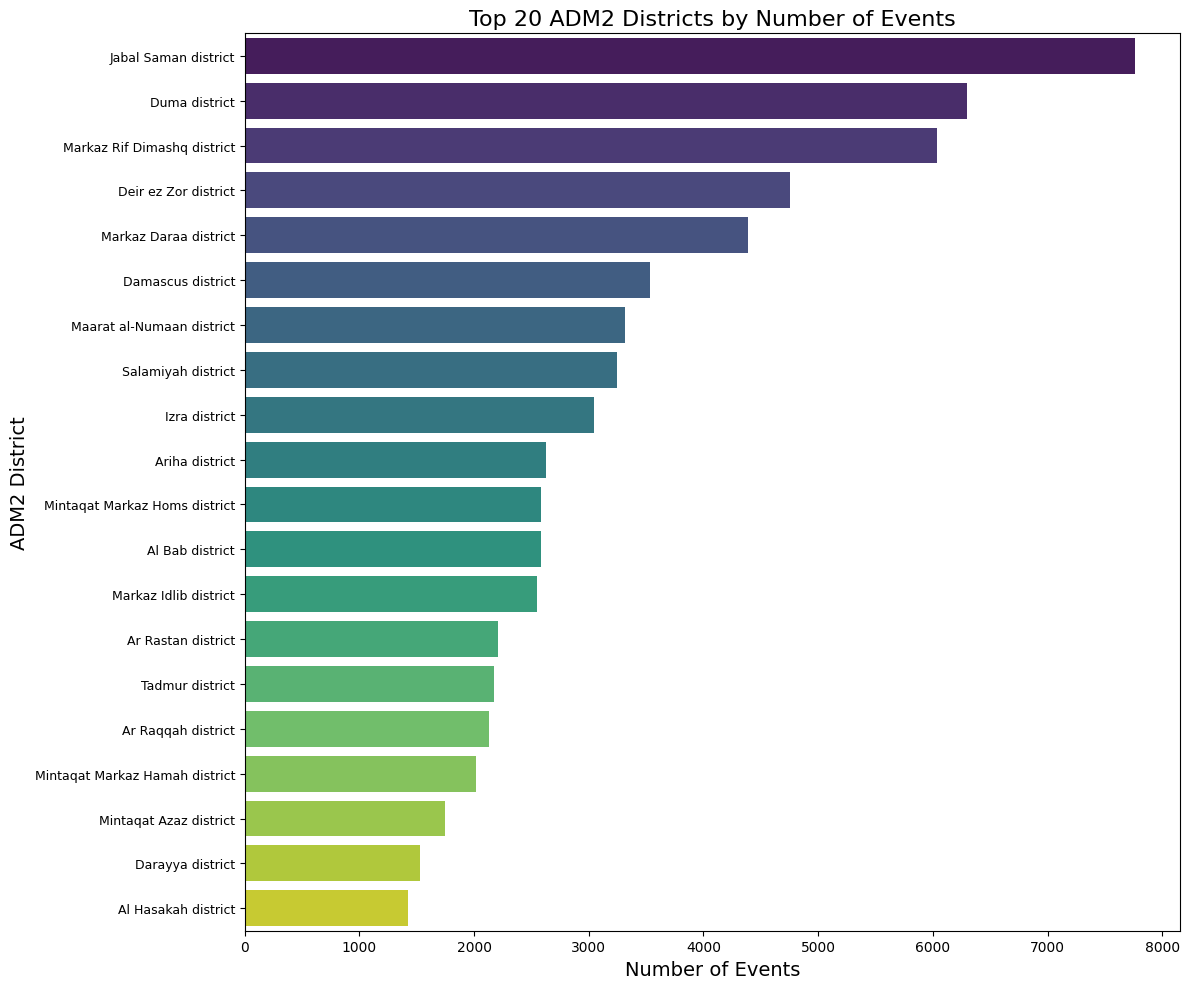



--- 2. Ranking ADM2 Districts by Total Deaths (best estimate) ---

Table: Top 20 ADM2 Districts by Total Deaths:
+--------------------------------+--------------------------------+
| ADM2 District                  |   Total Deaths (best estimate) |
|--------------------------------+--------------------------------|
| Salamiyah district             |                          94887 |
| Jabal Saman district           |                          36446 |
| Duma district                  |                          20071 |
| Markaz Rif Dimashq district    |                          19682 |
| Deir ez Zor district           |                          16596 |
| Damascus district              |                          12637 |
| Al Bab district                |                          12191 |
| Ar Raqqah district             |                          11928 |
| Maarat al-Numaan district      |                          11561 |
| Tadmur district                |                          11007 |
|

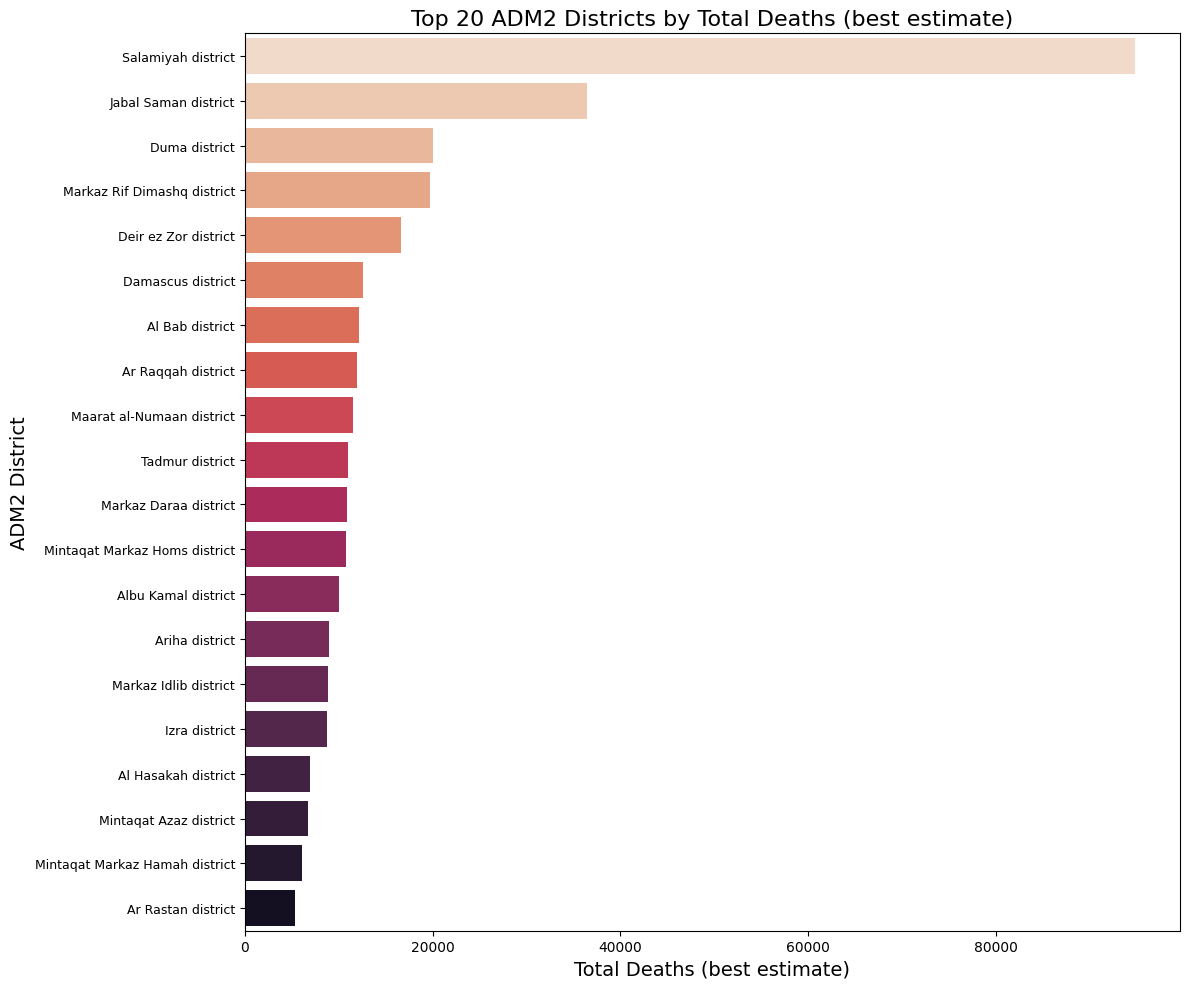

In [47]:

if 'df' in locals() and isinstance(df, pd.DataFrame):
    if 'adm_2' in df.columns:

        # --- 1. Ranking by Number of Events ---
        print("\n\n--- 1. Ranking ADM2 Districts by Number of Events ---")

        events_per_adm2 = df['adm_2'].value_counts(dropna=True).reset_index()
        events_per_adm2.columns = ['ADM2 District', 'Number of Events']

        # Display top N in table and chart
        num_to_display = 20

        print(f"\nTable: Top {num_to_display} ADM2 Districts by Number of Events:")
        print(tabulate(events_per_adm2.head(num_to_display), headers='keys', tablefmt='psql', showindex=False))
        if len(events_per_adm2) > num_to_display:
            print(f"... and {len(events_per_adm2) - num_to_display} more districts.")

        plt.figure(figsize=(12, 10))
        sns.barplot(x='Number of Events', y='ADM2 District', data=events_per_adm2.head(num_to_display),
                    palette="viridis", hue='ADM2 District', dodge=False, legend=False)
        plt.title(f'Top {num_to_display} ADM2 Districts by Number of Events', fontsize=16)
        plt.xlabel('Number of Events', fontsize=14)
        plt.ylabel('ADM2 District', fontsize=14)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=9)
        plt.tight_layout()
        plt.show()

        # --- 2. Ranking by Total Deaths (best estimate) ---
        if 'best' in df.columns:
            print("\n\n--- 2. Ranking ADM2 Districts by Total Deaths (best estimate) ---")

            deaths_per_adm2 = df.groupby('adm_2')['best'].sum().sort_values(ascending=False).reset_index()
            deaths_per_adm2.columns = ['ADM2 District', 'Total Deaths (best estimate)']

            # Filter out districts with zero deaths
            deaths_per_adm2_filtered = deaths_per_adm2[deaths_per_adm2['Total Deaths (best estimate)'] > 0]

            print(f"\nTable: Top {num_to_display} ADM2 Districts by Total Deaths:")
            if not deaths_per_adm2_filtered.empty:
                print(tabulate(deaths_per_adm2_filtered.head(num_to_display), headers='keys', tablefmt='psql', showindex=False))
                if len(deaths_per_adm2_filtered) > num_to_display:
                    print(f"... and {len(deaths_per_adm2_filtered) - num_to_display} more districts with deaths.")
            else:
                print("No districts with recorded deaths found.")

            if not deaths_per_adm2_filtered.empty:
                plt.figure(figsize=(12, 10))
                sns.barplot(x='Total Deaths (best estimate)', y='ADM2 District', data=deaths_per_adm2_filtered.head(num_to_display),
                            palette="rocket_r", hue='ADM2 District', dodge=False, legend=False)
                plt.title(f'Top {num_to_display} ADM2 Districts by Total Deaths (best estimate)', fontsize=16)
                plt.xlabel('Total Deaths (best estimate)', fontsize=14)
                plt.ylabel('ADM2 District', fontsize=14)
                plt.xticks(fontsize=10)
                plt.yticks(fontsize=9)
                plt.tight_layout()
                plt.show()
        else:
            print("\nColumn 'best' not found, cannot perform analysis by death count.")
    else:
        print("\nColumn 'adm_2' not found, cannot perform analysis.")
else:
    print("DataFrame 'df' is not defined. Please load your data first.")

In [48]:
# --- Cell 1: Analysis of Dyads (dyad_name) by Frequency ---
if 'dyad_name' in df.columns:
    print("\n\n--- 1. Analysis of Dyads (dyad_name) by Frequency ---")
    # 4. Number of unique values (excluding missing values)
    column_to_analyze='dyad_name'
    unique_count = df[column_to_analyze].nunique()
    print(f"عدد القيم الفريدة : {unique_count}")

    dyad_counts = df['dyad_name'].value_counts().reset_index()
    dyad_counts.columns = ['Dyad Name', 'Number of Events']
    dyad_counts = dyad_counts.sort_values(by='Number of Events', ascending=False)

    # Display top N for table and chart
    top_n_dyads_for_display = 20

    print(f"\nTable: Frequency of Each Dyad (Top {top_n_dyads_for_display} shown):")
    print(tabulate(dyad_counts.head(top_n_dyads_for_display), headers='keys', tablefmt='psql', showindex=False))




--- 1. Analysis of Dyads (dyad_name) by Frequency ---
عدد القيم الفريدة : 117

Table: Frequency of Each Dyad (Top 20 shown):
+------------------------------------------------------------------------------------------------+--------------------+
| Dyad Name                                                                                      |   Number of Events |
|------------------------------------------------------------------------------------------------+--------------------|
| Government of Syria - Syrian insurgents                                                        |              65706 |
| Government of Syria - IS                                                                       |               6506 |
| IS - SDF                                                                                       |               3756 |
| Government of Syria - Civilians                                                                |               2122 |
| IS - Civilians                 

In [49]:
# --- Cell 1: Analysis of Dyads (dyad_name) by Frequency ---
if 'conflict_name' in df.columns:
    print("\n\n--- 1. Analysis of Dyads (dyad_name) by Frequency ---")
    # 4. Number of unique values (excluding missing values)
    column_to_analyze='conflict_name'
    unique_count = df[column_to_analyze].nunique()
    print(f"عدد القيم الفريدة : {unique_count}")

    dyad_counts = df['conflict_name'].value_counts().reset_index()
    dyad_counts.columns = ['conflict_name', 'Number of Events']
    dyad_counts = dyad_counts.sort_values(by='Number of Events', ascending=False)

    # Display top N for table and chart
    top_n_dyads_for_display = 20

    print(f"\nTable: Frequency of Each conflict (Top {top_n_dyads_for_display} shown):")
    print(tabulate(dyad_counts.head(top_n_dyads_for_display), headers='keys', tablefmt='psql', showindex=False))




--- 1. Analysis of Dyads (dyad_name) by Frequency ---
عدد القيم الفريدة : 116

Table: Frequency of Each conflict (Top 20 shown):
+------------------------------------------------------------------------------------------------+--------------------+
| conflict_name                                                                                  |   Number of Events |
|------------------------------------------------------------------------------------------------+--------------------|
| Syria: Government                                                                              |              65706 |
| Syria: Islamic State                                                                           |               6506 |
| IS - SDF                                                                                       |               3756 |
| Government of Syria - Civilians                                                                |               2122 |
| IS - Civilians             

In [50]:
# --- Cell 1: Analysis of Dyads (dyad_name) by Frequency ---
if 'dyad_name' in df.columns:
    print("\n\n--- 1. Analysis of Dyads (dyad_name) by Frequency ---")
    # 4. Number of unique values (excluding missing values)
    unique_count = df[column_to_analyze].nunique()
    print(f"عدد القيم الفريدة : {unique_count}")

    dyad_counts = df['dyad_name'].value_counts().reset_index()
    dyad_counts.columns = ['Dyad Name', 'Number of Events']
    dyad_counts = dyad_counts.sort_values(by='Number of Events', ascending=False)

    # Display top N for table and chart
    top_n_dyads_for_display = 20

    print(f"\nTable: Frequency of Each Dyad (Top {top_n_dyads_for_display} shown):")
    print(tabulate(dyad_counts.head(top_n_dyads_for_display), headers='keys', tablefmt='psql', showindex=False))




--- 1. Analysis of Dyads (dyad_name) by Frequency ---
عدد القيم الفريدة : 116

Table: Frequency of Each Dyad (Top 20 shown):
+------------------------------------------------------------------------------------------------+--------------------+
| Dyad Name                                                                                      |   Number of Events |
|------------------------------------------------------------------------------------------------+--------------------|
| Government of Syria - Syrian insurgents                                                        |              65706 |
| Government of Syria - IS                                                                       |               6506 |
| IS - SDF                                                                                       |               3756 |
| Government of Syria - Civilians                                                                |               2122 |
| IS - Civilians                 

In [51]:
import pandas as pd
from tabulate import tabulate

# Define the column name you want to analyze
column_to_analyze = 'conflict_name'

print(f"\n--- تحليل تكرار القيم في عمود '{column_to_analyze}' ---")

# Check if the column exists in the DataFrame
if column_to_analyze in df.columns:
    # 1. Total number of entries (rows)
    total_entries = len(df)
    print(f"العدد الإجمالي للسجلات (الصفوف): {total_entries}")

    # 2. Number of non-missing values
    non_null_count = df[column_to_analyze].count()
    print(f"العدد الإجمالي للقيم غير المفقودة: {non_null_count}")

    # 3. Number of missing values
    missing_count = df[column_to_analyze].isnull().sum()
    print(f"عدد القيم المفقودة (NaN): {missing_count}")
    if total_entries > 0:
         print(f"نسبة القيم المفقودة: {missing_count/total_entries*100:.2f}%")

    # 4. Number of unique values (excluding missing values)
    unique_count = df[column_to_analyze].nunique()
    print(f"عدد القيم الفريدة (غير المفقودة): {unique_count}")

    # 5. Get all unique values and their counts
    print("\nتكرار كل قيمة فريدة (بما في ذلك NaN إن وجدت):")
    # Use dropna=False here to include missing values in the count
    # value_counts() automatically sorts values from most frequent to least frequent
    value_counts_series = df[column_to_analyze].value_counts(dropna=False)

    # Determine how many unique values were found
    num_unique_values = value_counts_series.size # .size includes the NaN count if dropna=False

    if num_unique_values == 0:
        print("لا توجد قيم في هذا العمود (قد يكون العمود فارغًا تمامًا).")
    else:
        # Convert the Series to a DataFrame for display using tabulate
        value_counts_df = value_counts_series.reset_index()
        value_counts_df.columns = ['القيمة (Value)', 'عدد مرات التكرار (Count)']

        # Replace NaN specifically for display in the table
        # The .fillna method on a regular object/string column works fine.
        # The issue was when the column inherited a categorical dtype.
        # Resetting the index to a DataFrame often converts it to object dtype first,
        # but explicitly converting or using .apply can be safer.

        # Option 1: Use apply with a lambda function to replace NaN
        # This avoids the potential categorical dtype issue on the new DataFrame column
        value_counts_df['القيمة (Value)'] = value_counts_df['القيمة (Value)'].apply(lambda x: 'NaN (مفقودة)' if pd.isna(x) else x)

        # Option 2: Simple fillna if the column is confirmed non-categorical object/string
        # value_counts_df['القيمة (Value)'] = value_counts_df['القيمة (Value)'].fillna('NaN (مفقودة)') # Original problematic line, risky if dtype is categorical

        # Display the table.
        print(tabulate(value_counts_df, headers='keys', tablefmt='psql', showindex=False))

else:
    print(f"❌ خطأ: العمود '{column_to_analyze}' غير موجود في الـ DataFrame. يرجى التحقق من اسم العمود.")

print(f"\n--- انتهى تحليل تكرار القيم لعمود '{column_to_analyze}' ---")


--- تحليل تكرار القيم في عمود 'conflict_name' ---
العدد الإجمالي للسجلات (الصفوف): 86755
العدد الإجمالي للقيم غير المفقودة: 86755
عدد القيم المفقودة (NaN): 0
نسبة القيم المفقودة: 0.00%
عدد القيم الفريدة (غير المفقودة): 116

تكرار كل قيمة فريدة (بما في ذلك NaN إن وجدت):
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------+
| القيمة (Value)                                                                                                                                                                                                                                      |   عدد مرات التكرار (Count) |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



--- 2a. Geographical Distribution: Dyads by Governorate (adm_1) ---

Table: Top 5 Governorates for Top 5 Dyads by Event Count:
+-----------------------------------------+-------------------------+--------------------+
| Dyad Name                               | Governorate (adm_1)     |   Number of Events |
|-----------------------------------------+-------------------------+--------------------|
| Government of Syria - Syrian insurgents | Rif Dimashq governorate |              16210 |
| Government of Syria - Syrian insurgents | Aleppo governorate      |              10994 |
| Government of Syria - Syrian insurgents | Idlib governorate       |               9066 |
| Government of Syria - Syrian insurgents | Daraa governorate       |               7443 |
| Government of Syria - Syrian insurgents | Hamah governorate       |               6749 |
| Government of Syria - IS                | Deir ez Zor governorate |               2565 |
| Government of Syria - IS                | Homs gov

/tmp/ipython-input-52-2242491136.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  events_by_dyad_adm1 = df.groupby(['dyad_name', 'adm_1']).size().reset_index(name='Number of Events')
/tmp/ipython-input-52-2242491136.py:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ].pivot_table(


Could not generate heatmap for Dyad Name vs ADM1: Unknown format code 'd' for object of type 'float'
The table above provides a summary.


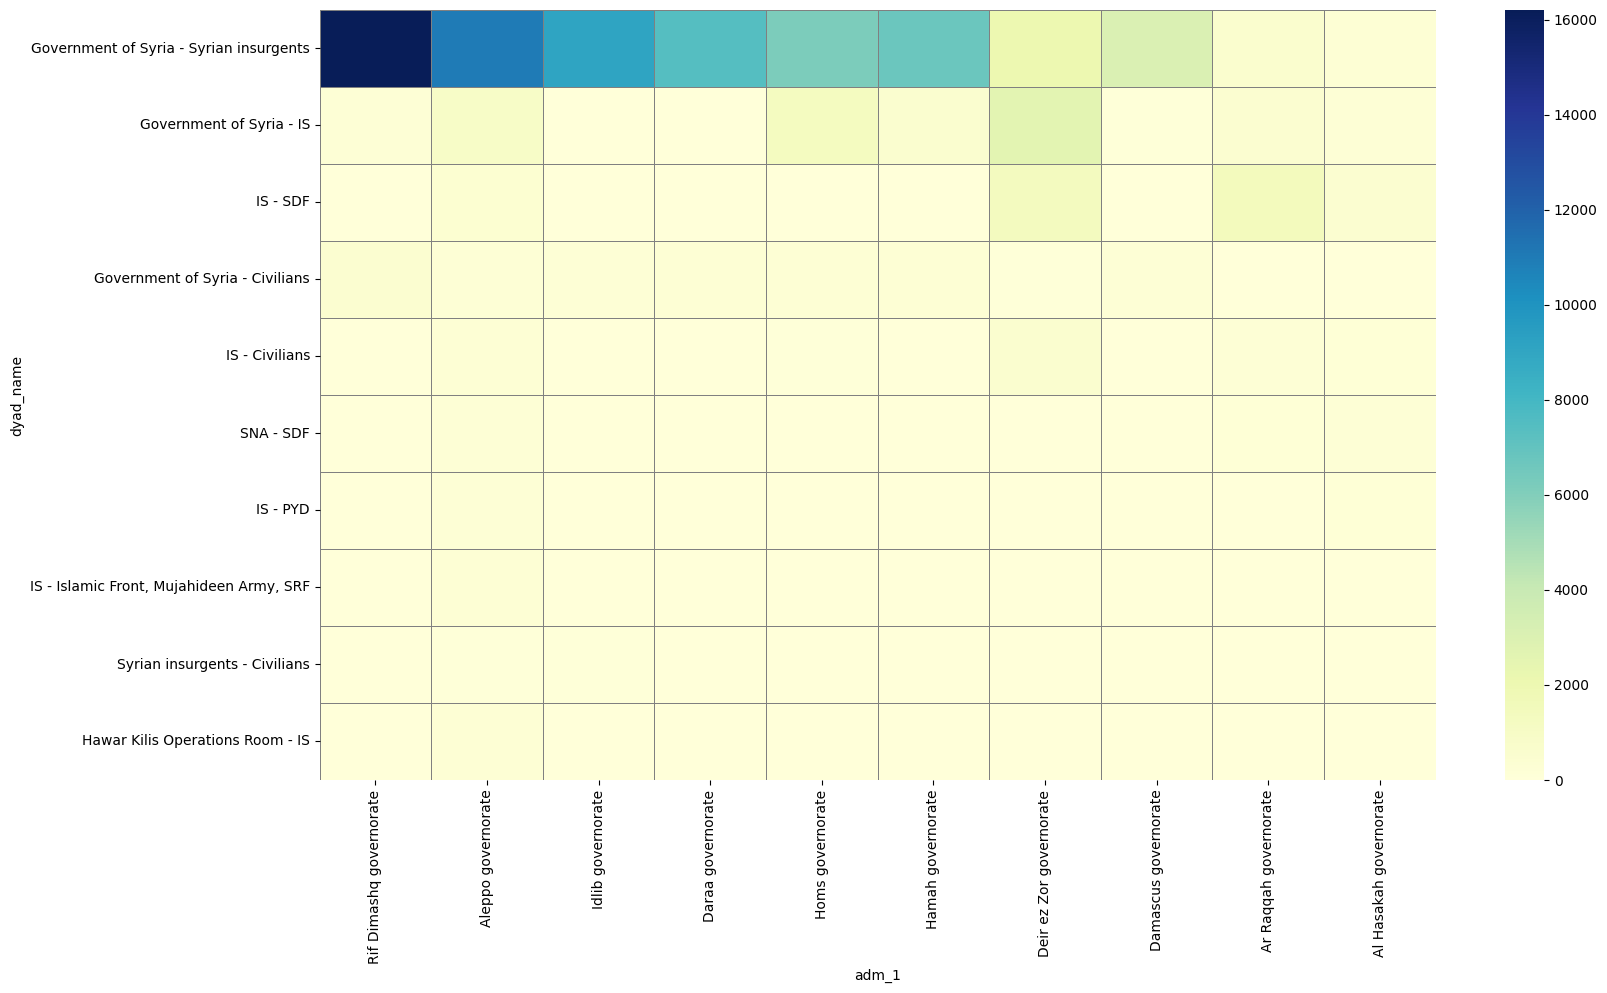

In [52]:
# --- Cell 2: Geographical Distribution of Dyads ---
# Part 2a: Distribution by ADM1 (Governorates)

if 'dyad_name' in df.columns and 'adm_1' in df.columns:
    print("\n\n--- 2a. Geographical Distribution: Dyads by Governorate (adm_1) ---")

    events_by_dyad_adm1 = df.groupby(['dyad_name', 'adm_1']).size().reset_index(name='Number of Events')

    # For table display: show top N adm_1 for each of the top M dyads
    top_m_dyads = df['dyad_name'].value_counts().nlargest(5).index # Top 5 dyads by total events

    display_list_dyad_adm1 = []
    for dyad in top_m_dyads:
        top_adm1_for_dyad = events_by_dyad_adm1[events_by_dyad_adm1['dyad_name'] == dyad].nlargest(5, 'Number of Events')
        display_list_dyad_adm1.append(top_adm1_for_dyad)

    if display_list_dyad_adm1:
        top_dyad_adm1_display_df = pd.concat(display_list_dyad_adm1)
        top_dyad_adm1_display_df.columns = ['Dyad Name', 'Governorate (adm_1)', 'Number of Events']
        print(f"\nTable: Top 5 Governorates for Top {len(top_m_dyads)} Dyads by Event Count:")
        print(tabulate(top_dyad_adm1_display_df, headers='keys', tablefmt='psql', showindex=False))
    else:
        print("No data to display for event counts by dyad and governorate.")

    # Visualization: Heatmap of Event Counts (Top Dyads vs. Top Governorates)
    if not events_by_dyad_adm1.empty:
        try:
            # Select top N dyads and top M governorates for a clearer heatmap
            top_n_dyads = df['dyad_name'].value_counts().nlargest(10).index # Top 10 Dyads
            top_m_governorates = df['adm_1'].value_counts().nlargest(10).index # Top 10 Governorates

            heatmap_dyad_adm1_pivot = events_by_dyad_adm1[
                events_by_dyad_adm1['dyad_name'].isin(top_n_dyads) &
                events_by_dyad_adm1['adm_1'].isin(top_m_governorates)
            ].pivot_table(
                index='dyad_name',
                columns='adm_1',
                values='Number of Events',
                fill_value=0
            )
            # Reorder for consistency if needed
            heatmap_dyad_adm1_pivot = heatmap_dyad_adm1_pivot.reindex(index=top_n_dyads, columns=top_m_governorates, fill_value=0)


            if not heatmap_dyad_adm1_pivot.empty:
                plt.figure(figsize=(18, 10)) # Adjust size
                sns.heatmap(heatmap_dyad_adm1_pivot, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, linecolor='gray')
                plt.title('Heatmap: Event Counts by Top Dyads and Top Governorates (adm_1)', fontsize=16)
                plt.xlabel('Governorate (adm_1)', fontsize=14)
                plt.ylabel('Dyad Name', fontsize=14)
                plt.xticks(rotation=45, ha='right', fontsize=10)
                plt.yticks(rotation=0, fontsize=10)
                plt.tight_layout()
                plt.show()
            else:
                print("Not enough overlapping data between top dyads and top governorates to generate heatmap.")
        except Exception as e:
            print(f"Could not generate heatmap for Dyad Name vs ADM1: {e}")
            print("The table above provides a summary.")
else:
    print("\nRequired columns 'dyad_name' or 'adm_1' not found for Geo Distribution (ADM1).")

Using existing DataFrame 'df'.


--- Heatmap: Event Distribution by Conflict Name and Governorate (adm_1) ---


/tmp/ipython-input-53-2700119144.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  events_by_conflict_adm1 = df.groupby(['conflict_name', 'adm_1']).size().reset_index(name='Number of Events')
/tmp/ipython-input-53-2700119144.py:51: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ].pivot_table(


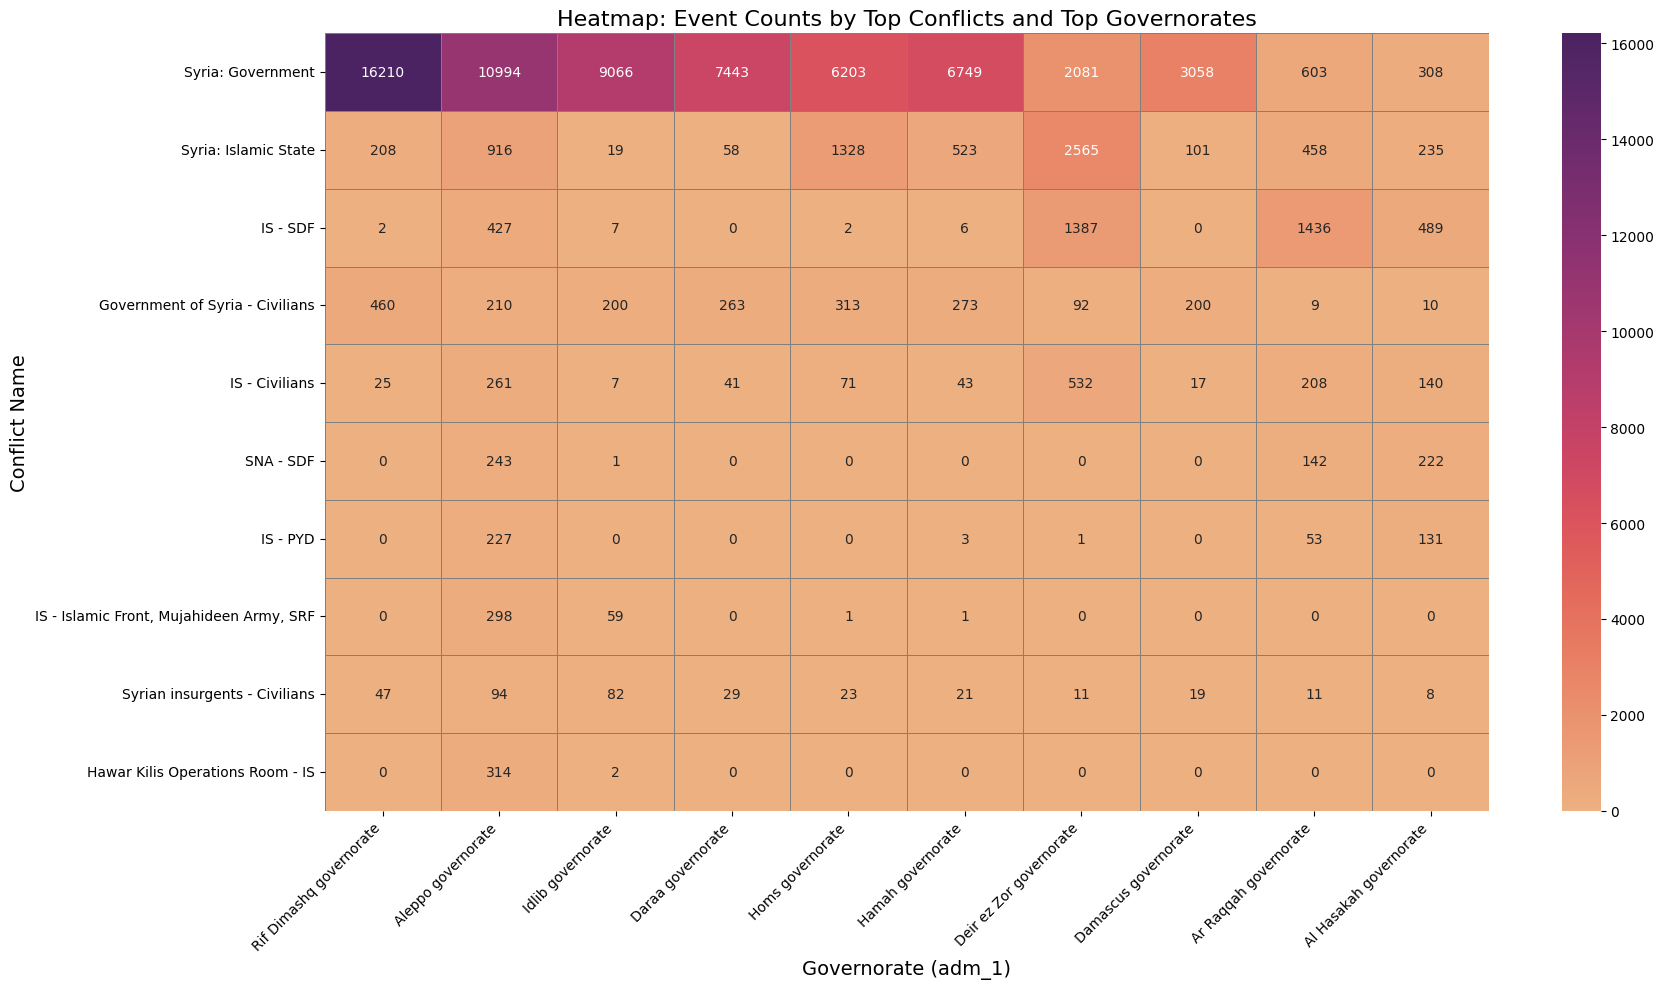

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    conflict_names_sample = [
        'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha',
        'Conflict Beta', 'Conflict Beta', 'Conflict Beta',
        'Conflict Gamma', 'Conflict Gamma',
        'Conflict Delta'
    ] * 10
    np.random.shuffle(conflict_names_sample)

    adm1_sample = [
        'Aleppo governorate', 'Idlib governorate', 'Damascus governorate', 'Homs governorate',
        'Ar Raqqah governorate', 'Deir ez Zor governorate', 'Hamah governorate'
    ] * (len(conflict_names_sample) // 7 + 1)
    np.random.shuffle(adm1_sample)

    data_for_example = {
        'id': range(len(conflict_names_sample)),
        'conflict_name': conflict_names_sample,
        'adm_1': adm1_sample[:len(conflict_names_sample)],
        'year': np.random.choice(range(2012, 2022), size=len(conflict_names_sample)),
        'best': np.random.randint(0, 20, size=len(conflict_names_sample))
    }
    df = pd.DataFrame(data_for_example)
    df['conflict_name'] = df['conflict_name'].astype('category')
    df['adm_1'] = df['adm_1'].astype('category')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Heatmap: Event Distribution of Conflicts by Governorates ---
if 'conflict_name' in df.columns and 'adm_1' in df.columns:
    print("\n\n--- Heatmap: Event Distribution by Conflict Name and Governorate (adm_1) ---")

    events_by_conflict_adm1 = df.groupby(['conflict_name', 'adm_1']).size().reset_index(name='Number of Events')

    # Determine top N conflict_names and top M adm_1 for a more readable heatmap
    top_n_conflicts = df['conflict_name'].value_counts().nlargest(10).index # Top 10 conflict names
    top_m_governorates = df['adm_1'].value_counts().nlargest(10).index    # Top 10 governorates

    heatmap_pivot_data = events_by_conflict_adm1[
        events_by_conflict_adm1['conflict_name'].isin(top_n_conflicts) &
        events_by_conflict_adm1['adm_1'].isin(top_m_governorates)
    ].pivot_table(
        index='conflict_name',
        columns='adm_1',
        values='Number of Events',
        fill_value=0
    )

    # Reindex to ensure the order of top conflicts and governorates if desired
    # (This order is based on overall frequency, not frequency within the pivot table)
    heatmap_pivot_data = heatmap_pivot_data.reindex(index=top_n_conflicts, columns=top_m_governorates, fill_value=0)

    if not heatmap_pivot_data.empty:
        plt.figure(figsize=(18, 10)) # Adjust size as needed
        sns.heatmap(
            heatmap_pivot_data,
            annot=True,        # Show numbers in cells
            fmt="g",           # Format numbers using the general format (handles float or int)
            # --- Suggested Change: Try 'flare' colormap for better contrast at the low end ---
            cmap="flare",
            # You could also try 'crest' or 'YlGnBu_r' (reversed)
            # cmap="crest",
            # cmap="YlGnBu_r",
            # --- End Suggested Change ---
            linewidths=.5,
            linecolor='gray'
        )
        plt.title('Heatmap: Event Counts by Top Conflicts and Top Governorates', fontsize=16)
        plt.xlabel('Governorate (adm_1)', fontsize=14)
        plt.ylabel('Conflict Name', fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough overlapping data between top conflicts and top governorates to generate heatmap.")
        print("Displaying overall event counts by conflict and governorate instead (top 20 rows):")
        events_by_conflict_adm1_sorted = events_by_conflict_adm1.sort_values(by='Number of Events', ascending=False)
        print(tabulate(events_by_conflict_adm1_sorted.head(20), headers='keys', tablefmt='psql', showindex=False))

else:
    print("\nRequired columns 'conflict_name' or 'adm_1' not found for Heatmap analysis.")

In [54]:
import pandas as pd
from tabulate import tabulate

# Assuming 'df' is already loaded and preprocessed

# Define the columns needed
required_cols = ['conflict_name', 'adm_1']

# Check if the necessary columns exist in the DataFrame
if not all(col in df.columns for col in required_cols):
    missing = [col for col in required_cols if col not in df.columns]
    print(f"❌ خطأ: الأعمدة التالية مطلوبة للتحليل ولكنها غير موجودة: {missing}")
    if 'df' in locals():
         print("الأعمدة المتاحة:", list(df.columns))
else:
    print("\n\n--- تحليل تركز الأحداث لكل صراع في المحافظات (adm_1) ---")
    print("   (عرض المحافظات الأعلى من حيث عدد الأحداث لكل صراع)")

    # Group by conflict and governorate and count events
    events_by_conflict_adm1 = df.groupby(['conflict_name', 'adm_1']).size().reset_index(name='Number of Events')

    # Sort by conflict name and then by event count descending within each conflict
    events_by_conflict_adm1_sorted = events_by_conflict_adm1.sort_values(by=['conflict_name', 'Number of Events'], ascending=[True, False])

    # Define how many top governorates to show for each conflict
    top_n_governorates_per_conflict = 5

    # Prepare data for the final table
    summary_list = []

    # Iterate through each unique conflict name
    # Use unique values from the sorted DataFrame to keep processing efficient
    for conflict in events_by_conflict_adm1_sorted['conflict_name'].unique():
        # Filter data for the current conflict
        conflict_data = events_by_conflict_adm1_sorted[events_by_conflict_adm1_sorted['conflict_name'] == conflict]

        # Get the top N governorates for this conflict
        top_governorates = conflict_data.head(top_n_governorates_per_conflict)

        # Format the output for this conflict
        if not top_governorates.empty:
            # Create a string listing the top governorates and their counts
            governorates_details = ", ".join([
                f"{row['adm_1']} ({row['Number of Events']} events)"
                for index, row in top_governorates.iterrows()
            ])
            summary_list.append([conflict, governorates_details])
        else:
             # This case should ideally not happen if the conflict exists, but good for safety
            summary_list.append([conflict, "No events found in any governorate"])


    # Convert the list to a DataFrame for tabulate
    if summary_list:
        conflict_concentration_summary_df = pd.DataFrame(summary_list, columns=['Conflict Name', f'Top {top_n_governorates_per_conflict} Governorates Concentration'])

        # Display the summary table
        print(f"\nTable: Concentration of Events for Each Conflict in Top {top_n_governorates_per_conflict} Governorates")
        print(tabulate(conflict_concentration_summary_df, headers='keys', tablefmt='psql', showindex=False))
    else:
        print("⚠️ لم يتم تجميع بيانات تركز الأحداث لكل صراع.")

print("\n--- انتهى تحليل تركز الأحداث لكل صراع ---")



--- تحليل تركز الأحداث لكل صراع في المحافظات (adm_1) ---
   (عرض المحافظات الأعلى من حيث عدد الأحداث لكل صراع)


/tmp/ipython-input-54-3127642128.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  events_by_conflict_adm1 = df.groupby(['conflict_name', 'adm_1']).size().reset_index(name='Number of Events')



Table: Concentration of Events for Each Conflict in Top 5 Governorates
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Conflict Name                                                                                                                                                                                                                                       | Top 5 Governorates Concentration                                                                                                                                               |
|-----------------------------------------------------------------------------



--- Bar Charts: Event Distribution per Governorate for Top Conflicts ---
Generating bar charts for the top 5 conflict names: ['Syria: Government', 'Syria: Islamic State', 'IS - SDF', 'Government of Syria - Civilians', 'IS - Civilians']

Table: Top Governorates for Conflict 'Syria: Government' by Number of Events:
+-------------------------+--------------------+
| Governorate (adm_1)     |   Number of Events |
|-------------------------+--------------------|
| Rif Dimashq governorate |              16210 |
| Aleppo governorate      |              10994 |
| Idlib governorate       |               9066 |
| Daraa governorate       |               7443 |
| Hamah governorate       |               6749 |
| Homs governorate        |               6203 |
| Damascus governorate    |               3058 |
| Deir ez Zor governorate |               2081 |
| Latakia governorate     |               1840 |
| Quneitra governorate    |                941 |
+-------------------------+-------------------

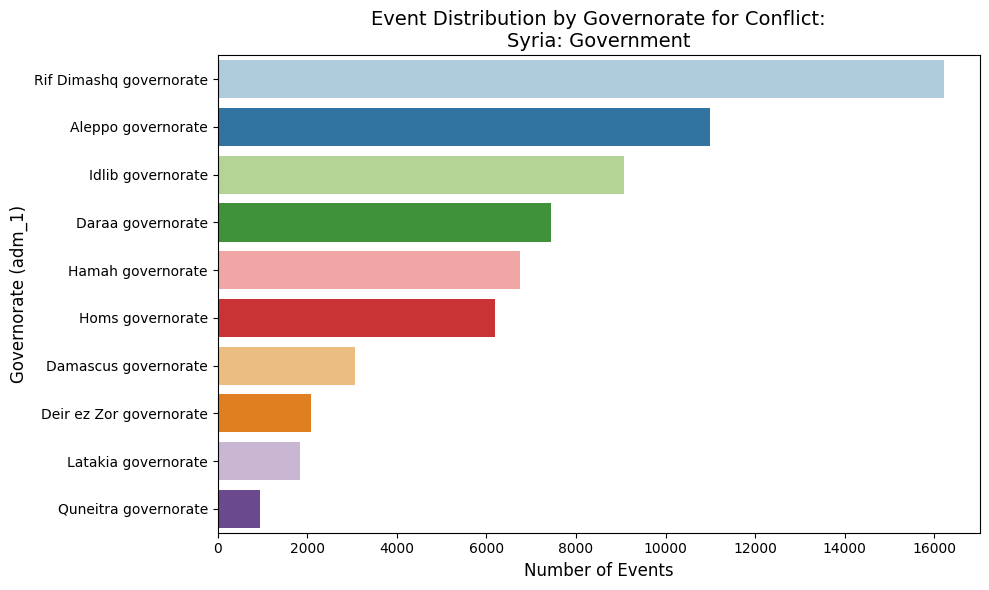


Table: Top Governorates for Conflict 'Syria: Islamic State' by Number of Events:
+-------------------------+--------------------+
| Governorate (adm_1)     |   Number of Events |
|-------------------------+--------------------|
| Deir ez Zor governorate |               2565 |
| Homs governorate        |               1328 |
| Aleppo governorate      |                916 |
| Hamah governorate       |                523 |
| Ar Raqqah governorate   |                458 |
| Al Hasakah governorate  |                235 |
| Rif Dimashq governorate |                208 |
| Damascus governorate    |                101 |
| As Suwayda governorate  |                 81 |
| Daraa governorate       |                 58 |
+-------------------------+--------------------+


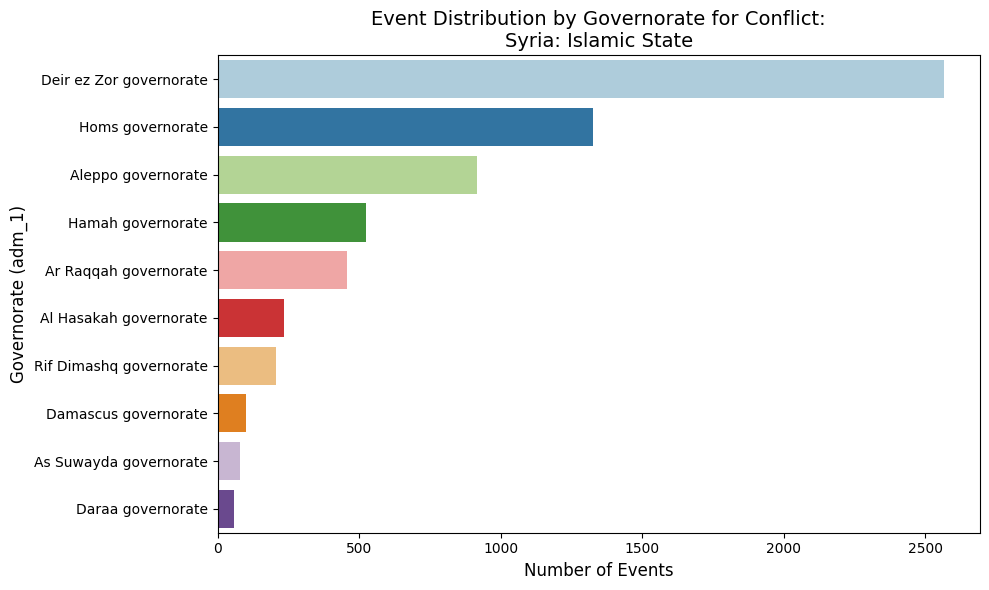


Table: Top Governorates for Conflict 'IS - SDF' by Number of Events:
+-------------------------+--------------------+
| Governorate (adm_1)     |   Number of Events |
|-------------------------+--------------------|
| Ar Raqqah governorate   |               1436 |
| Deir ez Zor governorate |               1387 |
| Al Hasakah governorate  |                489 |
| Aleppo governorate      |                427 |
| Idlib governorate       |                  7 |
| Hamah governorate       |                  6 |
| Rif Dimashq governorate |                  2 |
| Homs governorate        |                  2 |
+-------------------------+--------------------+


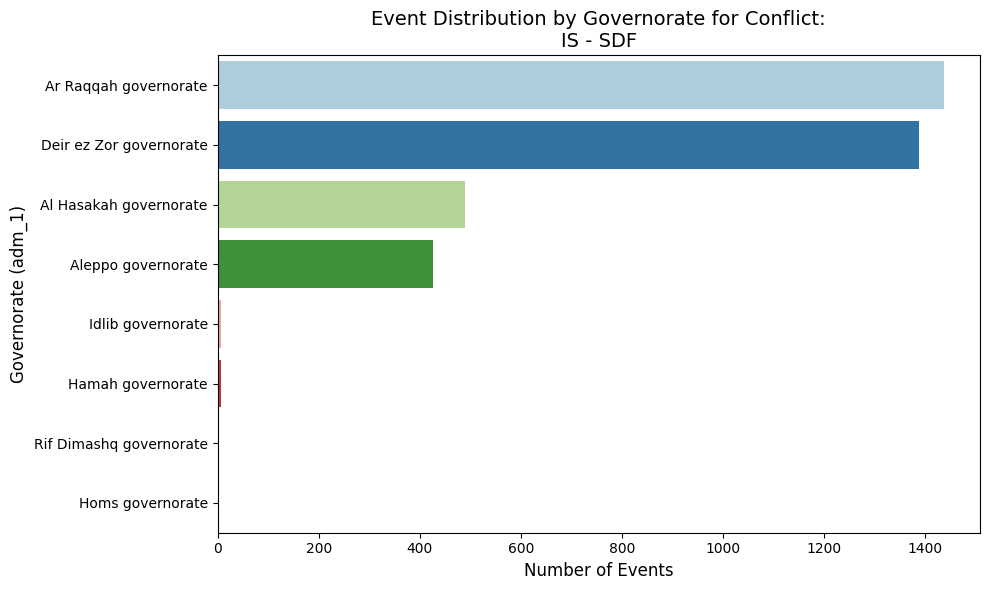


Table: Top Governorates for Conflict 'Government of Syria - Civilians' by Number of Events:
+-------------------------+--------------------+
| Governorate (adm_1)     |   Number of Events |
|-------------------------+--------------------|
| Rif Dimashq governorate |                460 |
| Homs governorate        |                313 |
| Hamah governorate       |                273 |
| Daraa governorate       |                263 |
| Aleppo governorate      |                210 |
| Damascus governorate    |                200 |
| Idlib governorate       |                200 |
| Deir ez Zor governorate |                 92 |
| Latakia governorate     |                 45 |
| Tartus governorate      |                 25 |
+-------------------------+--------------------+


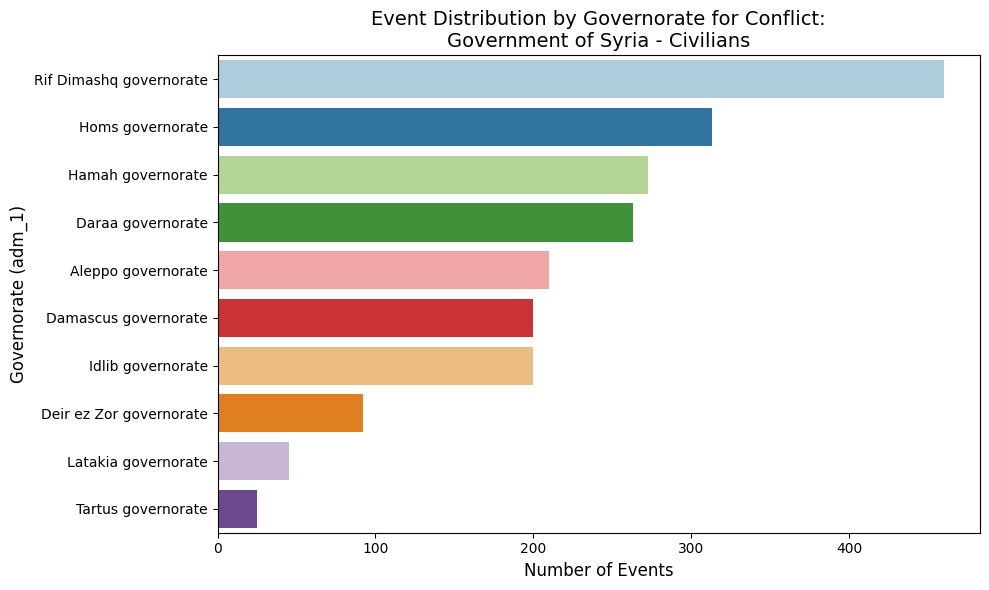


Table: Top Governorates for Conflict 'IS - Civilians' by Number of Events:
+-------------------------+--------------------+
| Governorate (adm_1)     |   Number of Events |
|-------------------------+--------------------|
| Deir ez Zor governorate |                532 |
| Aleppo governorate      |                261 |
| Ar Raqqah governorate   |                208 |
| Al Hasakah governorate  |                140 |
| Homs governorate        |                 71 |
| Hamah governorate       |                 43 |
| Daraa governorate       |                 41 |
| Rif Dimashq governorate |                 25 |
| Damascus governorate    |                 17 |
| Idlib governorate       |                  7 |
+-------------------------+--------------------+


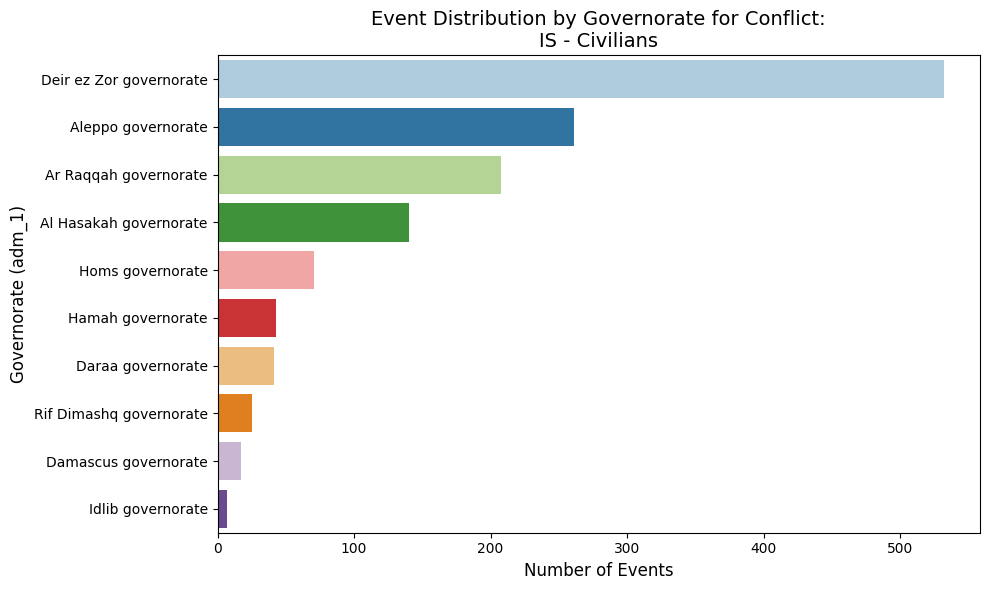

In [55]:
# --- Bar Charts: Event Distribution per Governorate for Top N Conflicts ---

if 'df' in locals() and isinstance(df, pd.DataFrame) and \
   'conflict_name' in df.columns and 'adm_1' in df.columns:

    print("\n\n--- Bar Charts: Event Distribution per Governorate for Top Conflicts ---")

    # Determine top N conflict_names by total event count
    # We can reuse top_n_conflicts from the heatmap cell, or define it again
    # Let's define it again for clarity in case this cell is run independently later
    top_n_conflicts_for_barcharts = df['conflict_name'].value_counts().nlargest(5).index.tolist() # Top 5 conflicts

    print(f"Generating bar charts for the top {len(top_n_conflicts_for_barcharts)} conflict names: {top_n_conflicts_for_barcharts}")

    for conflict in top_n_conflicts_for_barcharts:
        df_conflict = df[df['conflict_name'] == conflict]

        if df_conflict.empty:
            print(f"\nNo events found for conflict: {conflict}. Skipping chart.")
            continue

        events_in_adm1_for_conflict = df_conflict['adm_1'].value_counts().reset_index()
        events_in_adm1_for_conflict.columns = ['Governorate (adm_1)', 'Number of Events']
        # Sort for better visualization in bar chart
        events_in_adm1_for_conflict = events_in_adm1_for_conflict.sort_values(by='Number of Events', ascending=False)

        # Limit to top M governorates for this conflict for a cleaner plot
        top_m_adm1_for_this_conflict_plot = events_in_adm1_for_conflict.nlargest(10, 'Number of Events')

        if top_m_adm1_for_this_conflict_plot.empty:
            print(f"\nNo ADM1 event data to plot for conflict: {conflict} after filtering.")
            continue

        print(f"\nTable: Top Governorates for Conflict '{conflict}' by Number of Events:")
        print(tabulate(top_m_adm1_for_this_conflict_plot, headers='keys', tablefmt='psql', showindex=False))

        plt.figure(figsize=(10, 6)) # Adjust size as needed
        sns.barplot(
            x='Number of Events',
            y='Governorate (adm_1)',
            data=top_m_adm1_for_this_conflict_plot,
            palette="Paired",
            hue='Governorate (adm_1)', # Optional: for different colors per governorate
            dodge=False,
            legend=False
        )
        plt.title(f'Event Distribution by Governorate for Conflict:\n{conflict}', fontsize=14)
        plt.xlabel('Number of Events', fontsize=12)
        plt.ylabel('Governorate (adm_1)', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()
        plt.show()

else:
    print("DataFrame 'df' or required columns ('conflict_name', 'adm_1') not defined.")

In [56]:
import pandas as pd
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    conflict_names_sample = [
        'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha',
        'Conflict Beta', 'Conflict Beta', 'Conflict Beta', 'Conflict Beta',
        'Conflict Gamma', 'Conflict Gamma', 'Conflict Gamma',
        'Conflict Delta'
    ] * 5
    np.random.shuffle(conflict_names_sample)

    adm1_sample = [
        'Aleppo governorate', 'Idlib governorate', 'Damascus governorate', 'Homs governorate',
        'Ar Raqqah governorate', 'Deir ez Zor governorate', 'Hamah governorate'
    ] * (len(conflict_names_sample) // 7 + 1)
    np.random.shuffle(adm1_sample)

    data_for_example = {
        'id': range(len(conflict_names_sample)),
        'conflict_name': conflict_names_sample,
        'adm_1': adm1_sample[:len(conflict_names_sample)],
        'year': np.random.choice(range(2012, 2022), size=len(conflict_names_sample))
    }
    df = pd.DataFrame(data_for_example)
    df['conflict_name'] = df['conflict_name'].astype('category')
    df['adm_1'] = df['adm_1'].astype('category')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Analysis: Governorates targeted by each conflict, ordered by most frequent conflicts ---
if 'conflict_name' in df.columns and 'adm_1' in df.columns:
    print("\n\n--- Analysis: Governorates Targeted by Each Conflict ---")
    print("   (Conflicts are ordered by their total number of events, descending)")

    # 1. Calculate event counts per conflict_name and adm_1
    events_by_conflict_adm1 = df.groupby(['conflict_name', 'adm_1']).size().reset_index(name='Number of Events')

    # 2. Calculate total events per conflict_name to order them
    total_events_per_conflict = df['conflict_name'].value_counts().reset_index()
    total_events_per_conflict.columns = ['conflict_name', 'total_conflict_events']

    # 3. Get the sorted list of conflict names
    sorted_conflict_names = total_events_per_conflict['conflict_name'].tolist()

    # 4. Loop through sorted conflict names and display adm_1 distribution
    # You can limit the number of conflicts shown by slicing sorted_conflict_names
    # For example: for conflict_name in sorted_conflict_names[:10]: # for top 10 conflicts

    num_conflicts_to_display = 10 # Display details for top 10 conflicts
    print(f"\nDisplaying detailed governorate distribution for the top {num_conflicts_to_display} conflicts (if available):")

    for i, conflict_name_val in enumerate(sorted_conflict_names):
        if i >= num_conflicts_to_display:
            break # Stop if we've displayed the desired number of top conflicts

        print(f"\n\n--- Conflict: {conflict_name_val} ---")
        print(f"(Total events for this conflict: {total_events_per_conflict[total_events_per_conflict['conflict_name'] == conflict_name_val]['total_conflict_events'].iloc[0]})")

        conflict_specific_adm1_dist = events_by_conflict_adm1[events_by_conflict_adm1['conflict_name'] == conflict_name_val].copy()
        conflict_specific_adm1_dist.sort_values(by='Number of Events', ascending=False, inplace=True)

        # Rename columns for clarity in the table
        display_table = conflict_specific_adm1_dist[['adm_1', 'Number of Events']]
        display_table.columns = ['Governorate (adm_1)', 'Number of Events in this Governorate']

        if not display_table.empty:
            print(tabulate(display_table, headers='keys', tablefmt='psql', showindex=False))
        else:
            print("No specific governorate data found for this conflict (this shouldn't happen if listed in total_events_per_conflict).")

    if len(sorted_conflict_names) > num_conflicts_to_display:
        print(f"\n... Analysis for {len(sorted_conflict_names) - num_conflicts_to_display} more conflicts not displayed in detail here.")

else:
    print("\nRequired columns 'conflict_name' or 'adm_1' not found for this analysis.")

Using existing DataFrame 'df'.


--- Analysis: Governorates Targeted by Each Conflict ---
   (Conflicts are ordered by their total number of events, descending)

Displaying detailed governorate distribution for the top 10 conflicts (if available):


--- Conflict: Syria: Government ---
(Total events for this conflict: 65706)
+-------------------------+----------------------------------------+
| Governorate (adm_1)     |   Number of Events in this Governorate |
|-------------------------+----------------------------------------|
| Rif Dimashq governorate |                                  16210 |
| Aleppo governorate      |                                  10994 |
| Idlib governorate       |                                   9066 |
| Daraa governorate       |                                   7443 |
| Hamah governorate       |                                   6749 |
| Homs governorate        |                                   6203 |
| Damascus governorate    |                          

/tmp/ipython-input-56-2473086064.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  events_by_conflict_adm1 = df.groupby(['conflict_name', 'adm_1']).size().reset_index(name='Number of Events')




--- Bar Charts: Event Distribution per Governorate for Top Conflicts ---
Generating bar charts for the top 5 conflict names: ['Syria: Government', 'Syria: Islamic State', 'IS - SDF', 'Government of Syria - Civilians', 'IS - Civilians']


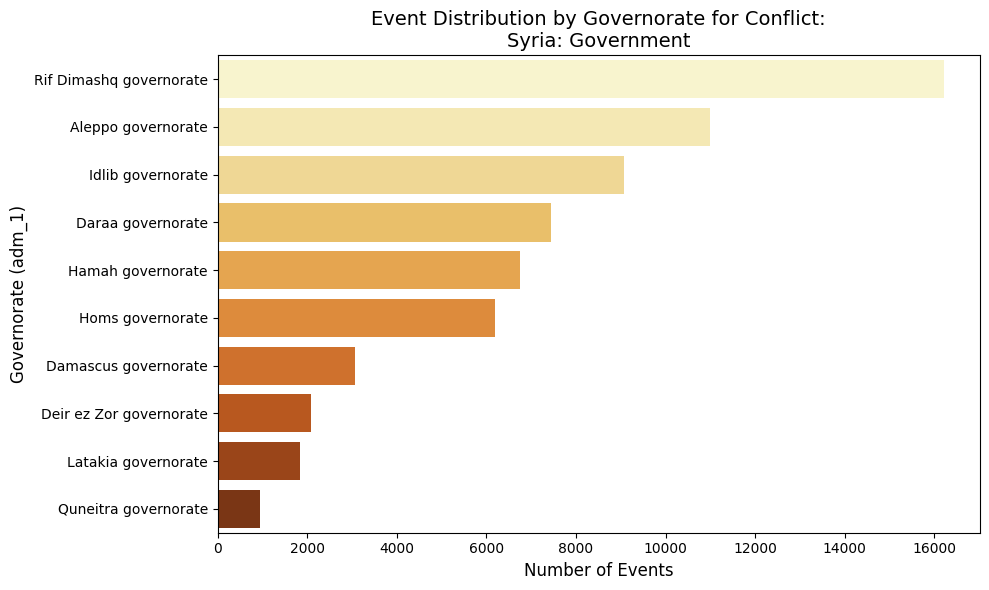

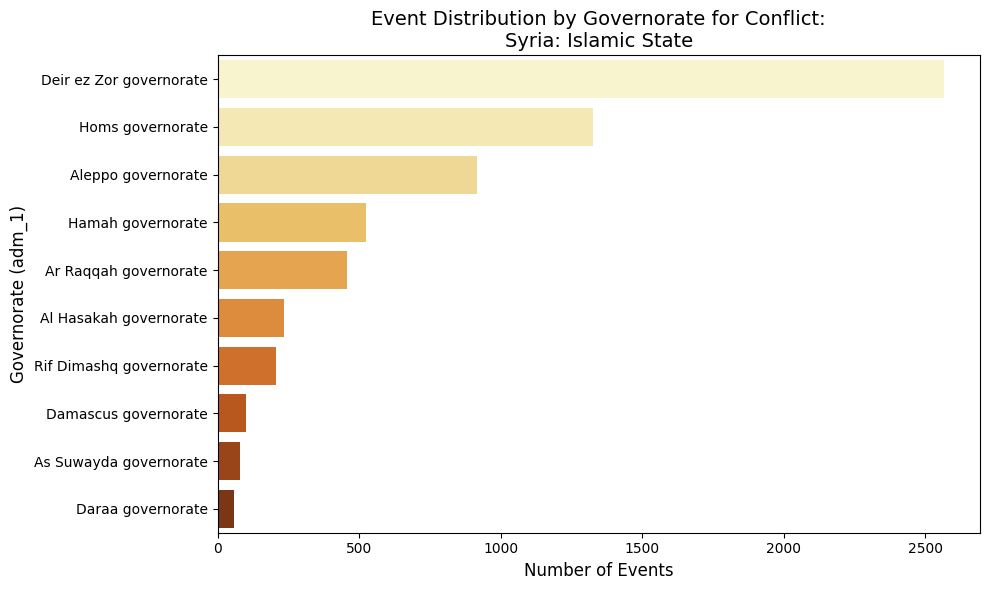

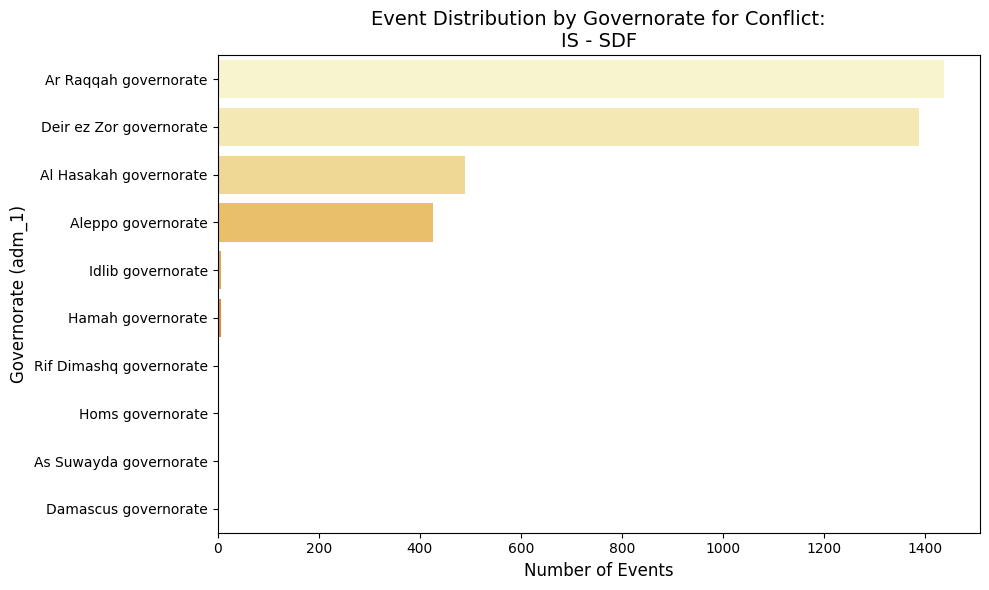

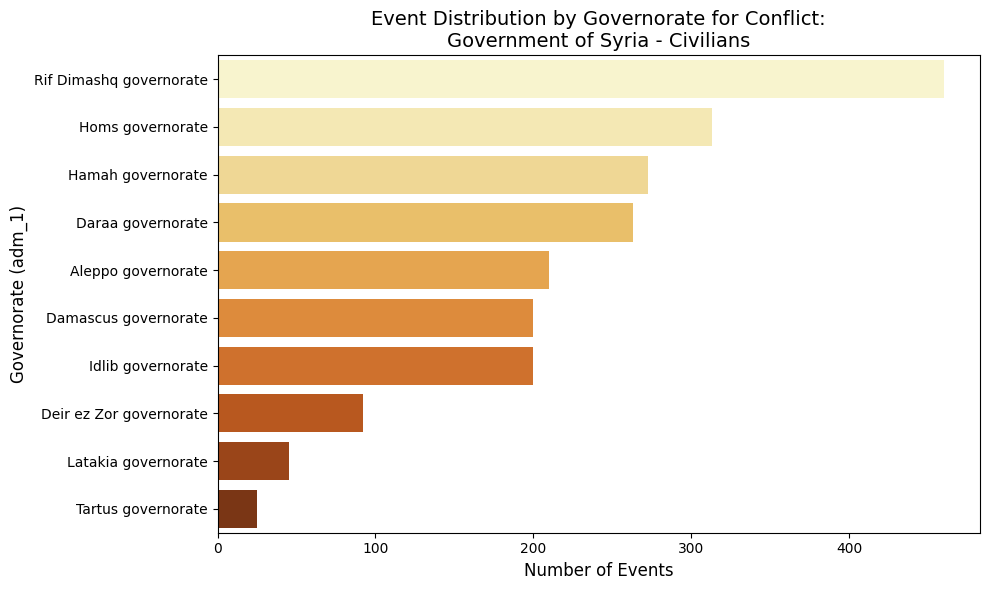

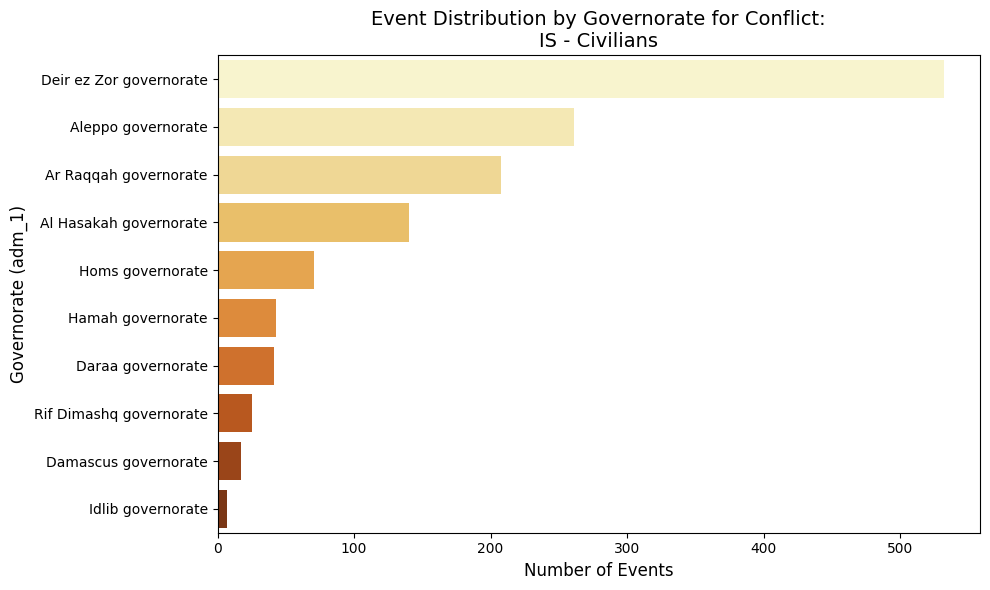

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' and 'sorted_conflict_names' from the previous cell are available
if 'df' in locals() and isinstance(df, pd.DataFrame) and \
   'conflict_name' in df.columns and 'adm_1' in df.columns and \
   'sorted_conflict_names' in locals() and isinstance(sorted_conflict_names, list):

    print("\n\n--- Bar Charts: Event Distribution per Governorate for Top Conflicts ---")

    # If events_by_conflict_adm1 was not calculated in the previous cell or if running independently:
    if 'events_by_conflict_adm1' not in locals():
         events_by_conflict_adm1 = df.groupby(['conflict_name', 'adm_1']).size().reset_index(name='Number of Events')

    # Determine top N conflict_names for barcharts (e.g., top 5)
    num_top_conflicts_for_charts = 5
    conflicts_to_chart = sorted_conflict_names[:num_top_conflicts_for_charts]

    print(f"Generating bar charts for the top {len(conflicts_to_chart)} conflict names: {conflicts_to_chart}")

    for conflict_val in conflicts_to_chart:
        # Filter the pre-calculated grouped data for the current conflict
        conflict_specific_data = events_by_conflict_adm1[events_by_conflict_adm1['conflict_name'] == conflict_val].copy()

        if conflict_specific_data.empty:
            print(f"\nNo event data found in governorates for conflict: {conflict_val}. Skipping chart.")
            continue

        # Sort by event count for better visualization in bar chart
        conflict_specific_data.sort_values(by='Number of Events', ascending=False, inplace=True)

        # Limit to top M governorates for this conflict for a cleaner plot if necessary
        top_m_adm1_for_this_conflict_plot = conflict_specific_data.nlargest(10, 'Number of Events') # Top 10 ADM1s

        if top_m_adm1_for_this_conflict_plot.empty:
            print(f"\nNo ADM1 event data to plot for conflict: {conflict_val} after filtering.")
            continue

        plt.figure(figsize=(10, max(6, len(top_m_adm1_for_this_conflict_plot) * 0.5))) # Dynamic height
        sns.barplot(
            x='Number of Events',
            y='adm_1',
            data=top_m_adm1_for_this_conflict_plot,
            palette="YlOrBr", # Example palette
            hue='adm_1',      # Optional, for different colors per governorate
            dodge=False,
            legend=False
        )
        # Truncate long conflict names for title if necessary
        title_conflict_name = (conflict_val[:75] + '...') if len(conflict_val) > 75 else conflict_val
        plt.title(f'Event Distribution by Governorate for Conflict:\n{title_conflict_name}', fontsize=14)
        plt.xlabel('Number of Events', fontsize=12)
        plt.ylabel('Governorate (adm_1)', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()
        plt.show()

else:
    print("DataFrame 'df', required columns, or 'sorted_conflict_names' list not available. Please run the previous cell first.")

In [58]:
print("\n\n--- Analysis: Casualties (best estimate) per Conflict Name ---")
print("   (Conflicts are ordered by their total number of 'best' estimated deaths, descending)")

# 1. Calculate total 'best' deaths per conflict_name
deaths_per_conflict = df.groupby('conflict_name')['best'].sum().sort_values(ascending=False).reset_index()
deaths_per_conflict.columns = ['Conflict Name', 'Total Deaths (best estimate)']

# 2. Display as a table (Top N conflicts)
num_conflicts_to_display_table =27 # Display details for top N conflicts in table

print(f"\nTable: Top {num_conflicts_to_display_table} Conflicts by Total Deaths (best estimate):")
print(tabulate(deaths_per_conflict.head(num_conflicts_to_display_table), headers='keys', tablefmt='psql', showindex=False))




--- Analysis: Casualties (best estimate) per Conflict Name ---
   (Conflicts are ordered by their total number of 'best' estimated deaths, descending)

Table: Top 27 Conflicts by Total Deaths (best estimate):
+---------------------------------------------------------------------------------------------------------+--------------------------------+
| Conflict Name                                                                                           |   Total Deaths (best estimate) |
|---------------------------------------------------------------------------------------------------------+--------------------------------|
| Syria: Government                                                                                       |                         285885 |
| Syria: Islamic State                                                                                    |                          49395 |
| IS - SDF                                                                          

/tmp/ipython-input-58-1827528787.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deaths_per_conflict = df.groupby('conflict_name')['best'].sum().sort_values(ascending=False).reset_index()


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    conflict_names_sample = [
        'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha',
        'Conflict Beta', 'Conflict Beta', 'Conflict Beta',
        'Conflict Gamma', 'Conflict Gamma', 'Conflict Gamma', 'Conflict Gamma', 'Conflict Gamma',
        'Conflict Delta', 'Conflict Epsilon', 'Conflict Zeta', 'Conflict Eta'
    ] * 10
    np.random.shuffle(conflict_names_sample)

    # Simulate large differences in civilian deaths
    deaths_sample = []
    for name in conflict_names_sample:
        if name == 'Conflict Alpha':
            deaths_sample.append(np.random.randint(500, 1000))
        elif name == 'Conflict Beta':
            deaths_sample.append(np.random.randint(100, 400))
        elif name == 'Conflict Gamma':
            deaths_sample.append(np.random.randint(10, 50))
        else:
            deaths_sample.append(np.random.randint(0, 20))

    data_for_example = {
        'id': range(len(conflict_names_sample)),
        'conflict_name': conflict_names_sample,
        'adm_1': np.random.choice(['Aleppo governorate', 'Idlib governorate', 'Damascus governorate'], size=len(conflict_names_sample)),
        'year': np.random.choice(range(2012, 2022), size=len(conflict_names_sample)),
        'deaths_civilians': deaths_sample
    }
    df = pd.DataFrame(data_for_example)
    df['conflict_name'] = df['conflict_name'].astype('category')
    df['adm_1'] = df['adm_1'].astype('category')
    df['deaths_civilians'] = df['deaths_civilians'].astype('int16')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Analysis: Civilian Casualties by Conflict Name (with log scale for chart) ---
if 'conflict_name' in df.columns and 'deaths_civilians' in df.columns:
    print("\n\n--- Analysis: Civilian Casualties per Conflict Name ---")
    print("   (Conflicts are ordered by their total number of civilian deaths, descending)")

    # 1. Calculate total civilian deaths per conflict_name
    civilian_deaths_per_conflict = df.groupby('conflict_name')['deaths_civilians'].sum().sort_values(ascending=False).reset_index()
    civilian_deaths_per_conflict.columns = ['Conflict Name', 'Total Civilian Deaths']

    # Filter out conflicts with zero civilian deaths for cleaner presentation, especially for log scale
    civilian_deaths_per_conflict_filtered = civilian_deaths_per_conflict[civilian_deaths_per_conflict['Total Civilian Deaths'] > 0]

    # 2. Display as a table (Top N conflicts)
    num_conflicts_to_display_table = 20

    print(f"\nTable: Top {num_conflicts_to_display_table} Conflicts by Total Civilian Deaths:")
    if not civilian_deaths_per_conflict_filtered.empty:
        print(tabulate(civilian_deaths_per_conflict_filtered.head(num_conflicts_to_display_table), headers='keys', tablefmt='psql', showindex=False))
        if len(civilian_deaths_per_conflict_filtered) > num_conflicts_to_display_table:
            print(f"... and {len(civilian_deaths_per_conflict_filtered) - num_conflicts_to_display_table} more conflicts with civilian deaths.")
    else:
        print("No conflicts found with civilian deaths > 0.")

else:
    print("\nRequired columns 'conflict_name' or 'deaths_civilians' not found for this analysis.")

Using existing DataFrame 'df'.


--- Analysis: Civilian Casualties per Conflict Name ---
   (Conflicts are ordered by their total number of civilian deaths, descending)

Table: Top 20 Conflicts by Total Civilian Deaths:
+---------------------------------------------------------------------------------------------------------+-------------------------+
| Conflict Name                                                                                           |   Total Civilian Deaths |
|---------------------------------------------------------------------------------------------------------+-------------------------|
| Syria: Government                                                                                       |                   84019 |
| Syria: Islamic State                                                                                    |                    9890 |
| Government of Syria - Civilians                                                                         |   

/tmp/ipython-input-59-4118579043.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  civilian_deaths_per_conflict = df.groupby('conflict_name')['deaths_civilians'].sum().sort_values(ascending=False).reset_index()




--- Analysis: Civilian Deaths in Conflicts where 'Civilians' are a Listed Party ---
Found 3953 events where 'Civilians' were a listed party.

Table: Conflicts Ranked by Civilian Deaths (in events where civilians were a party):
+-----------------------------------+----------------------------------------+
| Conflict Name                     |   Total Civilian Deaths in Such Events |
|-----------------------------------+----------------------------------------|
| Government of Syria - Civilians   |                                   9780 |
| IS - Civilians                    |                                   5610 |
| Syrian insurgents - Civilians     |                                    916 |
| IS, Syrian insurgents - Civilians |                                    207 |
| PYD - Civilians                   |                                    176 |
| SDF - Civilians                   |                                    102 |
+-----------------------------------+-----------------------

/tmp/ipython-input-60-91740909.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  civilian_deaths_in_targeted_conflicts = df_civilians_targeted.groupby('conflict_name')['deaths_civilians'].sum().sort_values(ascending=False).reset_index()
/tmp/ipython-input-60-91740909.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


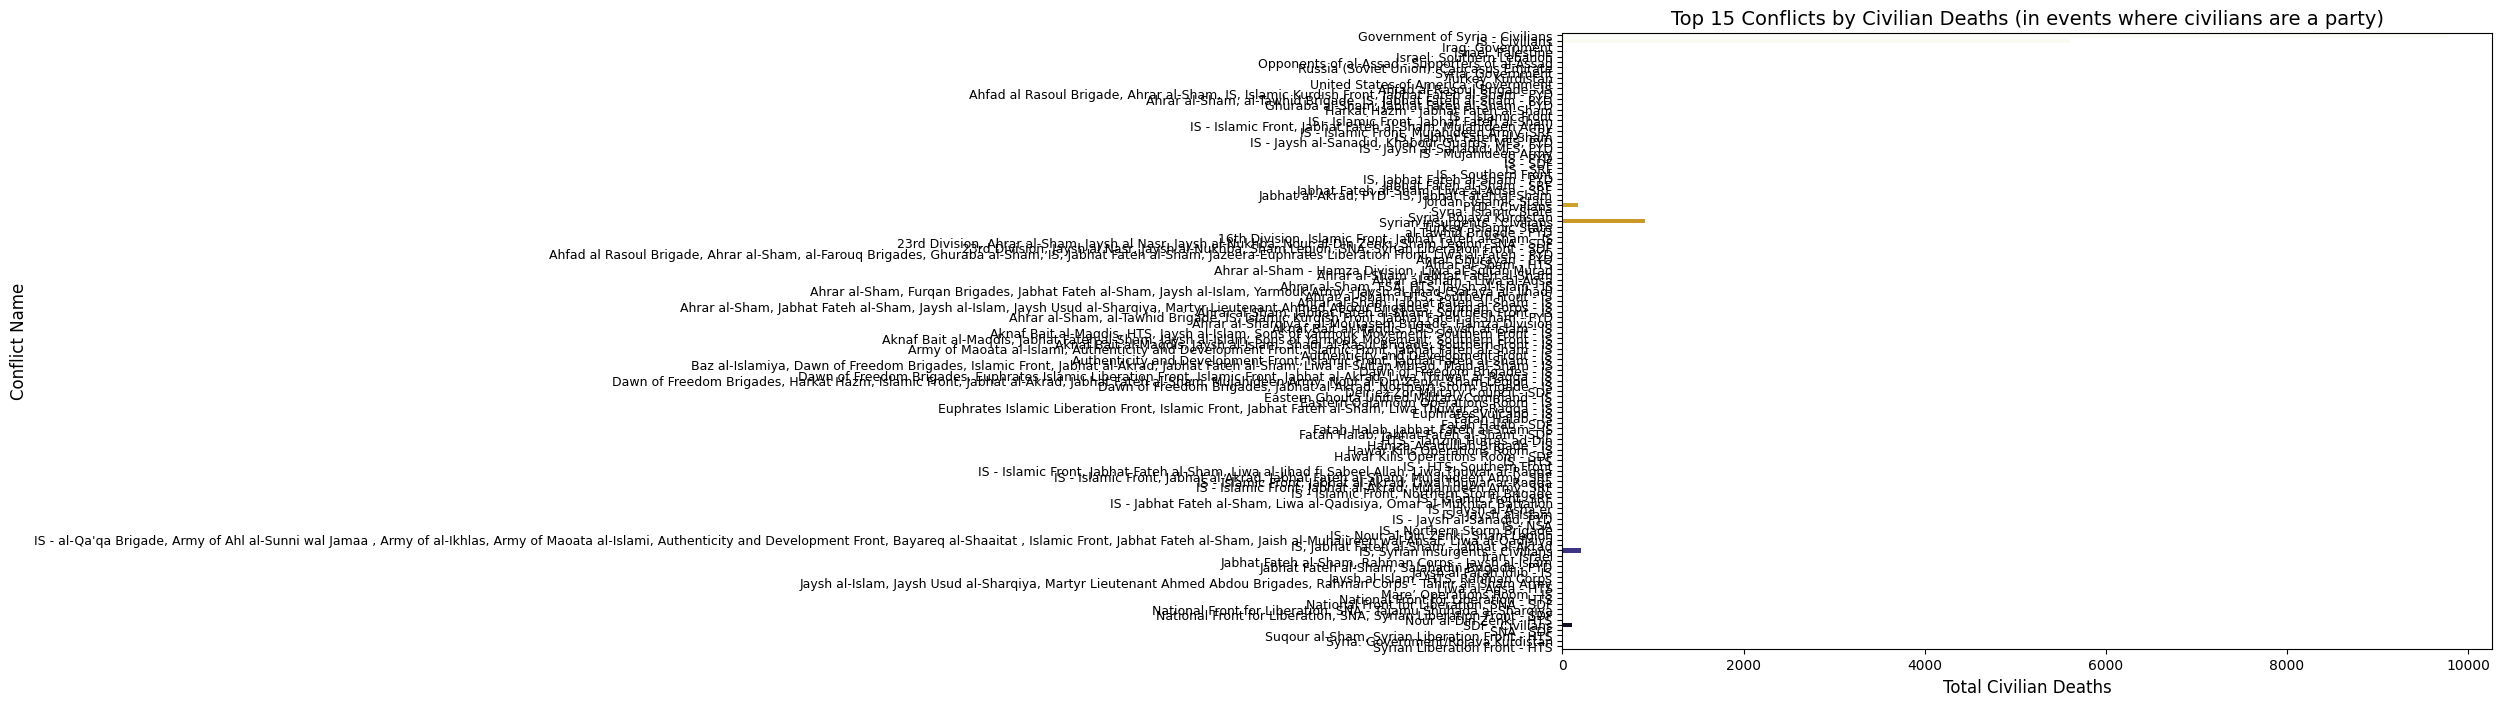

In [60]:
if all(col in df.columns for col in required_cols):
    print("\n\n--- Analysis: Civilian Deaths in Conflicts where 'Civilians' are a Listed Party ---")

    # 1. Filter the DataFrame to include only events where 'Civilians' is in side_a or side_b
    condition_civilians_as_party = (
        df['side_a'].astype(str).str.contains("Civilians", na=False) |
        df['side_b'].astype(str).str.contains("Civilians", na=False)
    )

    df_civilians_targeted = df[condition_civilians_as_party].copy()

    if df_civilians_targeted.empty:
        print("No events found where 'Civilians' were listed as a party in side_a or side_b.")
    else:
        print(f"Found {len(df_civilians_targeted)} events where 'Civilians' were a listed party.")

        # 2. Group the *filtered* DataFrame by conflict_name and sum civilian deaths
        civilian_deaths_in_targeted_conflicts = df_civilians_targeted.groupby('conflict_name')['deaths_civilians'].sum().sort_values(ascending=False).reset_index()
        civilian_deaths_in_targeted_conflicts.columns = ['Conflict Name', 'Total Civilian Deaths in Such Events']

        # Filter out conflicts with zero civilian deaths for cleaner presentation
        civilian_deaths_filtered = civilian_deaths_in_targeted_conflicts[civilian_deaths_in_targeted_conflicts['Total Civilian Deaths in Such Events'] > 0]

        # 3. Display as a table
        print("\nTable: Conflicts Ranked by Civilian Deaths (in events where civilians were a party):")
        if not civilian_deaths_filtered.empty:
            print(tabulate(civilian_deaths_filtered, headers='keys', tablefmt='psql', showindex=False))
        else:
            print("No conflicts found with civilian deaths in events where civilians were a party.")

        # 4. Create a bar chart
        if not civilian_deaths_filtered.empty:
            num_to_display_chart = 15 # Display top N
            plt.figure(figsize=(12, 8))

            sns.barplot(
                x='Total Civilian Deaths in Such Events',
                y='Conflict Name',
                data=civilian_deaths_filtered.head(num_to_display_chart),
                palette="CMRmap_r",
                hue='Conflict Name',
                dodge=False,
                legend=False
            )
            plt.title(f'Top {num_to_display_chart} Conflicts by Civilian Deaths (in events where civilians are a party)', fontsize=14)
            plt.xlabel('Total Civilian Deaths', fontsize=12)
            plt.ylabel('Conflict Name', fontsize=12)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=9)
            plt.tight_layout()
            plt.show()
        else:
            print("No data to plot.")
else:
    print("\nOne or more required columns are missing. Cannot perform analysis.")

Using existing DataFrame 'df'.


--- Temporal Distribution of Conflicts (by conflict_name) ---

Table: Temporal Distribution of Top 15 Conflicts (by number of active years):
+------------------------------------+--------------------------+------------------------------------------------------------------------------------+
| Conflict Name                      |   Number of Active Years | Actual Active Years (List)                                                         |
|------------------------------------+--------------------------+------------------------------------------------------------------------------------|
| Government of Syria - Civilians    |                       14 | 2004, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023 |
| Syria: Government                  |                       13 | 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023       |
| Syrian insurgents - Civilians      |                       13 | 2011,

/tmp/ipython-input-61-3254587826.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temporal_dist_conflict = df.groupby('conflict_name')['year'].agg(


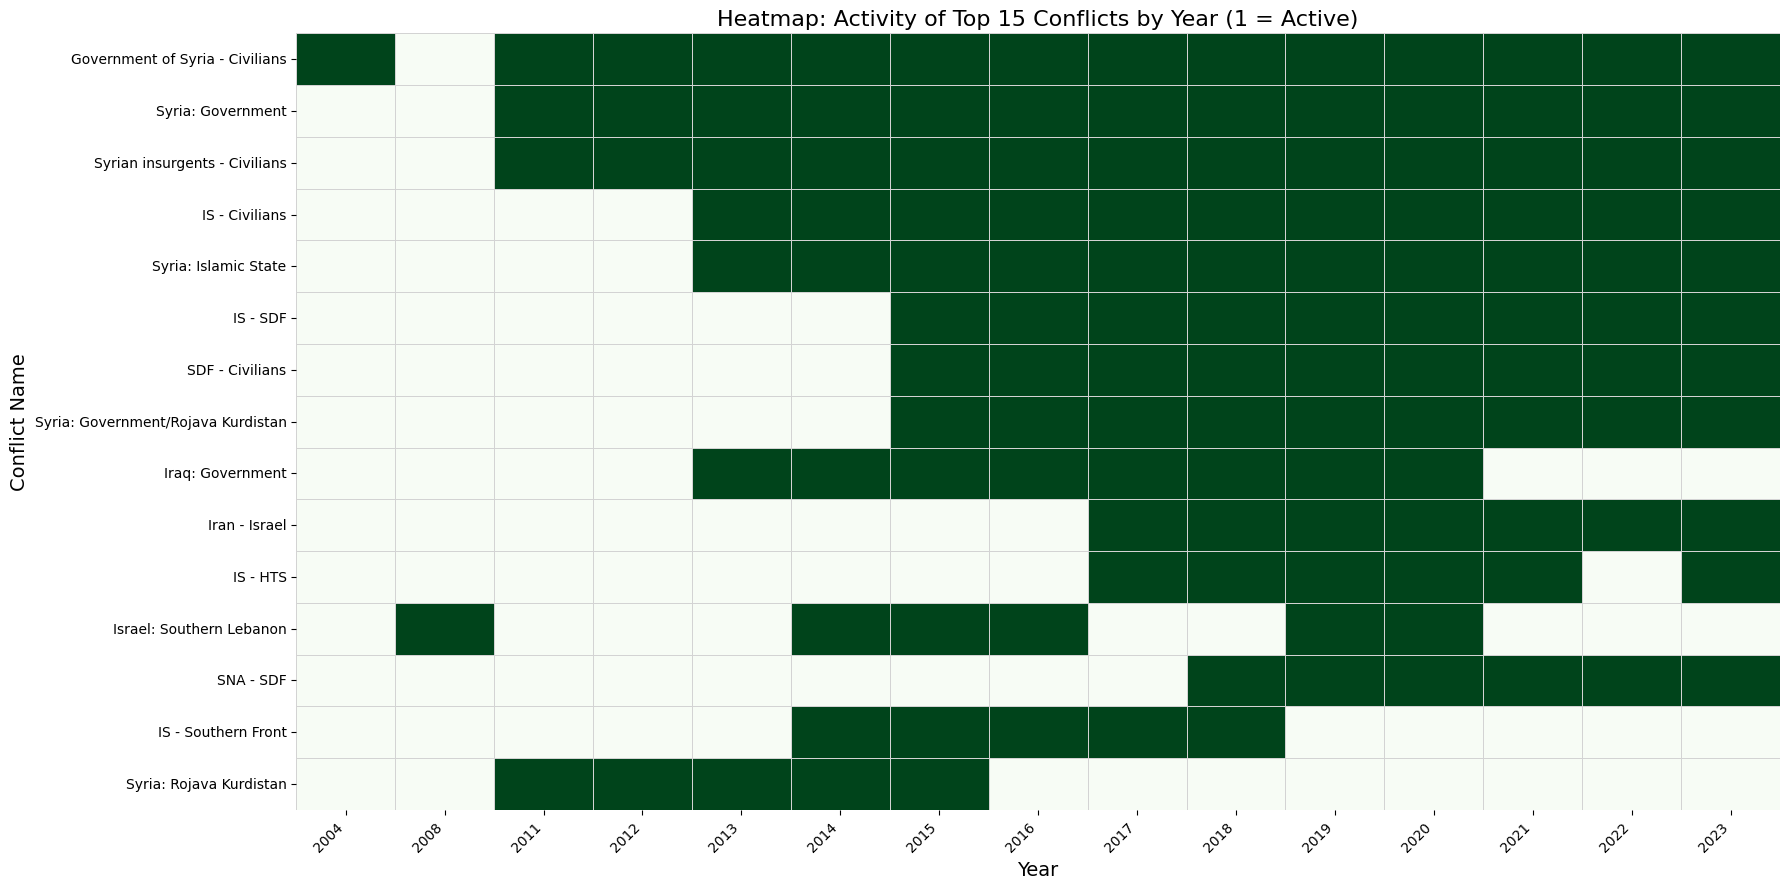

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    conflict_names_sample = [
        'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha',
        'Conflict Beta', 'Conflict Beta', 'Conflict Beta',
        'Conflict Gamma', 'Conflict Gamma', 'Conflict Gamma', 'Conflict Gamma', 'Conflict Gamma', 'Conflict Gamma'
    ] * 5
    np.random.shuffle(conflict_names_sample)

    years_sample = []
    for i in range(len(conflict_names_sample)):
        if conflict_names_sample[i] == 'Conflict Alpha': # Spans 5 years
            years_sample.append(np.random.choice([2012, 2013, 2014, 2015, 2016]))
        elif conflict_names_sample[i] == 'Conflict Beta': # Spans 3 years
            years_sample.append(np.random.choice([2014, 2015, 2016]))
        elif conflict_names_sample[i] == 'Conflict Gamma': # Spans 6 years
             years_sample.append(np.random.choice([2012,2013,2014,2015,2016,2017]))
        else: # Conflict Delta, Epsilon, Zeta
            years_sample.append(np.random.choice([2018, 2019, 2020]))


    data_for_example = {
        'id': range(len(conflict_names_sample)),
        'conflict_name': conflict_names_sample,
        'year': years_sample,
        'adm_1': np.random.choice(['Aleppo governorate', 'Idlib governorate'], size=len(conflict_names_sample)),
        'best': np.random.randint(0, 10, size=len(conflict_names_sample))
    }
    df = pd.DataFrame(data_for_example)
    df['conflict_name'] = df['conflict_name'].astype('category')
    df['year'] = df['year'].astype('int16')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Temporal Distribution of Conflicts (conflict_name) ---
if 'conflict_name' in df.columns and 'year' in df.columns:
    print("\n\n--- Temporal Distribution of Conflicts (by conflict_name) ---")

    # 1. Calculate number of active years and the list of actual active years for each conflict
    temporal_dist_conflict = df.groupby('conflict_name')['year'].agg(
        num_active_years='nunique',
        actual_active_years=lambda x: sorted(list(x.unique()))
    ).sort_values(by='num_active_years', ascending=False).reset_index()

    temporal_dist_conflict.columns = [
        'Conflict Name',
        'Number of Active Years',
        'Actual Active Years (List)'
    ]

    # 2. Display as a table (Top N conflicts for brevity)
    num_conflicts_to_display_table = 15

    print(f"\nTable: Temporal Distribution of Top {num_conflicts_to_display_table} Conflicts (by number of active years):")
    # Prepare for tabulate (convert list of years to string for better display)
    df_temporal_for_tabulate = temporal_dist_conflict.head(num_conflicts_to_display_table).copy()
    df_temporal_for_tabulate['Actual Active Years (List)'] = df_temporal_for_tabulate['Actual Active Years (List)'].apply(
        lambda years_list: ', '.join(map(str, years_list)) if isinstance(years_list, list) else years_list
    )
    print(tabulate(df_temporal_for_tabulate, headers='keys', tablefmt='psql', showindex=False))
    if len(temporal_dist_conflict) > num_conflicts_to_display_table:
        print(f"... and {len(temporal_dist_conflict) - num_conflicts_to_display_table} more conflicts.")

    # 3. Visualization: Heatmap of Conflict Activity by Year (for top N conflicts)
    if not temporal_dist_conflict.empty:
        top_n_conflicts_for_heatmap = 15 # Number of top conflicts to show in heatmap
        conflicts_for_heatmap_df = temporal_dist_conflict.head(top_n_conflicts_for_heatmap)

        # Prepare data for heatmap: index=conflict_name, columns=year, value=1 if active
        all_years_in_data_sorted = sorted(df['year'].unique()) # Get all unique years present in the dataset

        heatmap_data = pd.DataFrame(
            0, # Fill with 0 initially
            index=conflicts_for_heatmap_df['Conflict Name'],
            columns=all_years_in_data_sorted
        )

        for index, row in conflicts_for_heatmap_df.iterrows():
            conflict_name_val = row['Conflict Name']
            active_years_list = row['Actual Active Years (List)'] # This is a list of integers
            for year_val in active_years_list:
                if year_val in heatmap_data.columns: # Check if the year column exists
                    heatmap_data.loc[conflict_name_val, year_val] = 1 # Mark as active

        if not heatmap_data.empty:
            plt.figure(figsize=(18, max(6, len(heatmap_data) * 0.6))) # Dynamic height based on number of conflicts
            sns.heatmap(
                heatmap_data,
                annot=False,        # Annotations (0 or 1) might make it too busy
                cmap="Greens",      # Colormap (e.g., shades of green for activity)
                cbar=False,         # Hide color bar since it's binary (0 or 1)
                linewidths=.5,
                linecolor='lightgray'
            )
            title_text = f'Heatmap: Activity of Top {top_n_conflicts_for_heatmap} Conflicts by Year (1 = Active)'
            plt.title(title_text, fontsize=16)
            plt.xlabel('Year', fontsize=14)
            plt.ylabel('Conflict Name', fontsize=14)
            plt.xticks(rotation=45, ha='right', fontsize=10)
            plt.yticks(rotation=0, fontsize=10) # Ensure conflict names are readable
            plt.tight_layout()
            plt.show()
        else:
            print("Not enough data from top conflicts to generate temporal activity heatmap.")
    else:
        print("No data to generate temporal distribution heatmap for conflicts.")
else:
    print("\nRequired columns 'conflict_name' or 'year' not found for this analysis.")

Using existing DataFrame 'df'.


--- Analysis: Total Appearances of Each Individual Warring Party ---

Table: Top 20 Individual Warring Parties by Total Appearances:
+--------+------------------------------------+---------------------+
|   Rank | Actor Name                         |   Total Appearances |
|--------+------------------------------------+---------------------|
|      1 | Government of Syria                |               74462 |
|      2 | Syrian insurgents                  |               66078 |
|      3 | IS                                 |               16259 |
|      4 | SDF                                |                5281 |
|      5 | Civilians                          |                3953 |
|      6 | Jabhat Fateh al-Sham               |                1519 |
|      7 | Islamic Front                      |                1236 |
|      8 | SNA                                |                1064 |
|      9 | PYD                                |                 

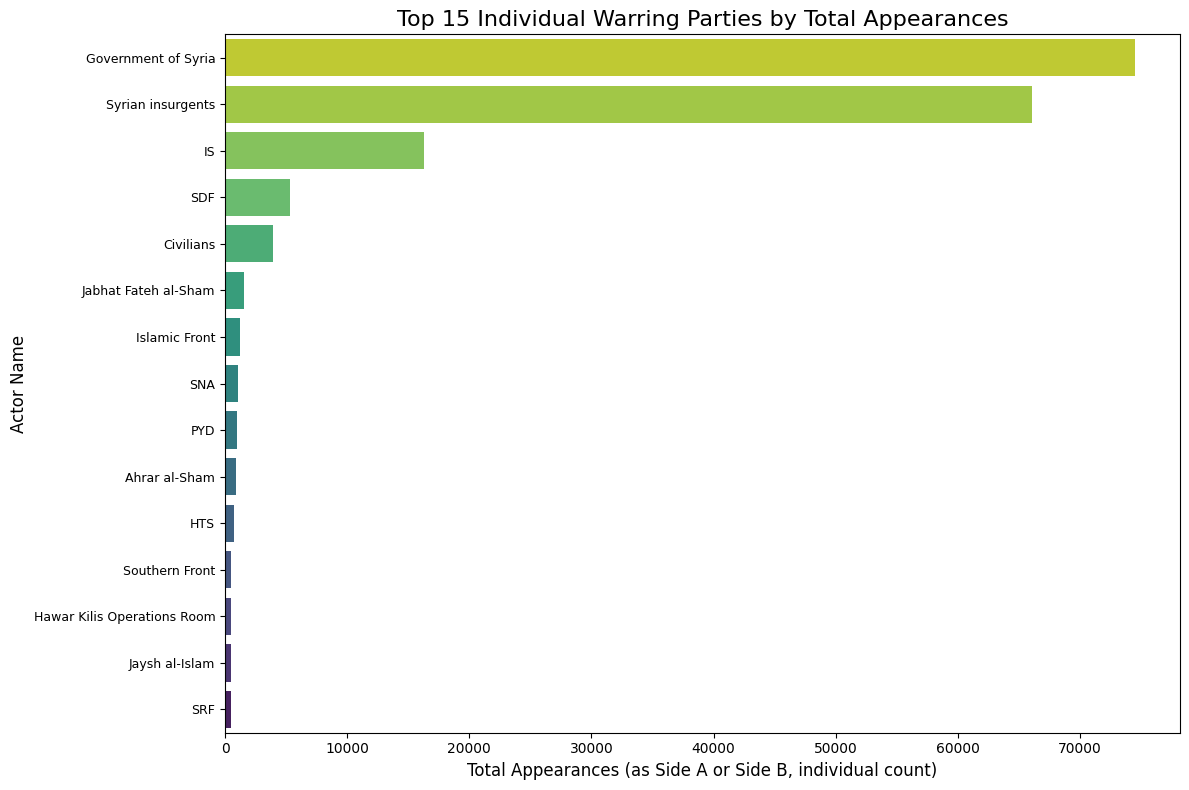

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np
from collections import Counter # لاستخدامها في عد العناصر بكفاءة

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    data_for_example = {
        'id': range(7),
        'side_a': [
            'GovA',
            'RebelX, RebelY', # Combined actors
            'GovB',
            'Ahrar al-Sham, Jabhat Fateh al-Sham, Southern Front',
            'GovA',
            'Islamic Front, Jabhat Fateh al-Sham',
            'RebelZ'
        ],
        'side_b': [
            'RebelX',
            'GovA',
            'RebelZ, Rebel Alpha', # Combined actors
            'GovC',
            'Islamic Front, Jabhat Fateh al-Sham', # Repeated combined group
            'GovB',
            'GovA'
        ],
        'year': np.random.choice(range(2015, 2020), size=7),
    }
    df = pd.DataFrame(data_for_example)
    for col in ['side_a', 'side_b']:
        df[col] = df[col].astype('object') # Object type to handle strings and potential NaNs
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Analysis of Total Appearances of Individual Warring Parties (after splitting combined names) ---
if 'side_a' in df.columns and 'side_b' in df.columns:
    print("\n\n--- Analysis: Total Appearances of Each Individual Warring Party ---")

    # 1. Create a flat list of all individual actor mentions
    all_individual_actor_mentions = []

    # Process side_a
    for actor_entry in df['side_a'].dropna(): # dropna() to handle potential NaN values
        # Split by ", " and strip whitespace from each name
        individual_names = [name.strip() for name in str(actor_entry).split(',')] # More robust split by just comma first
        # Further split if names themselves have spaces and we are trying to clean up multi-part names mistakenly joined by comma only
        # For now, assuming comma is the main multi-actor separator
        cleaned_names = []
        for name_part in individual_names:
            # If a part still looks like it has a comma from an improper initial split,
            # this logic might need refinement based on exact data structure.
            # The provided example "A, B, C" implies splitting by ", " is key.
            # The user showed "Ahrar al-Sham, Jabhat Fateh al-Sham, Southern Front"
            # So splitting by ", " (comma followed by space) is better.
            further_split_by_comma_space = [sub_name.strip() for sub_name in name_part.split(', ')]
            cleaned_names.extend(further_split_by_comma_space)

        all_individual_actor_mentions.extend(cleaned_names)

    # Process side_b
    for actor_entry in df['side_b'].dropna():
        individual_names = [name.strip() for name in str(actor_entry).split(',')]
        cleaned_names = []
        for name_part in individual_names:
            further_split_by_comma_space = [sub_name.strip() for sub_name in name_part.split(', ')]
            cleaned_names.extend(further_split_by_comma_space)
        all_individual_actor_mentions.extend(cleaned_names)

    # Filter out any empty strings that might result from splitting if there are trailing commas etc.
    all_individual_actor_mentions = [name for name in all_individual_actor_mentions if name]


    # 2. Calculate the frequency of each individual actor
    if all_individual_actor_mentions:
        actor_total_counts = pd.Series(all_individual_actor_mentions).value_counts().reset_index()
        actor_total_counts.columns = ['Actor Name', 'Total Appearances']
        # value_counts already sorts by frequency (descending)
    else:
        actor_total_counts = pd.DataFrame(columns=['Actor Name', 'Total Appearances'])
        print("No actor mentions found after processing side_a and side_b.")


    # 3. Display as a ranked table (Top N actors)
    num_actors_to_display_table = 20

    print(f"\nTable: Top {num_actors_to_display_table} Individual Warring Parties by Total Appearances:")
    if not actor_total_counts.empty:
        table_to_display = actor_total_counts.head(num_actors_to_display_table).copy()
        table_to_display.insert(0, 'Rank', range(1, len(table_to_display) + 1))
        print(tabulate(table_to_display, headers='keys', tablefmt='psql', showindex=False))
        if len(actor_total_counts) > num_actors_to_display_table:
            print(f"... and {len(actor_total_counts) - num_actors_to_display_table} more individual actors.")
    else:
        print("No actor appearance data to display in table.")


    # 4. Create a bar chart for Top N individual actors
    num_actors_for_chart = 15
    top_actors_for_chart_df = actor_total_counts.head(num_actors_for_chart)

    if not top_actors_for_chart_df.empty:
        plt.figure(figsize=(12, 8))
        sns.barplot(
            x='Total Appearances',
            y='Actor Name',
            data=top_actors_for_chart_df,
            palette="viridis_r", # Reversed viridis palette
            hue='Actor Name', # Optional for coloring
            dodge=False,
            legend=False
        )
        title_text = f'Top {num_actors_for_chart} Individual Warring Parties by Total Appearances'
        plt.title(title_text, fontsize=16)
        plt.xlabel('Total Appearances (as Side A or Side B, individual count)', fontsize=12)
        plt.ylabel('Actor Name', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=9)
        plt.tight_layout()
        plt.show()
    else:
        print("No data to plot for individual actor appearances.")

else:
    print("\nRequired columns 'side_a' or 'side_b' not found for this analysis.")

In [63]:

    # --- 3. Individual Actor Frequencies ---
    print("\n\n--- 3. Frequency of Individual Actors ---")

    # Frequency as Side A
    side_a_counts = df['side_a'].value_counts().reset_index()
    side_a_counts.columns = ['Actor (Side A)', 'Events as Side A']
    side_a_counts = side_a_counts.sort_values(by='Events as Side A', ascending=False)

    top_n_actors_display = 15
    print(f"\nTable: Top {top_n_actors_display} Most Active Actors as Side A:")
    print(tabulate(side_a_counts.head(top_n_actors_display), headers='keys', tablefmt='psql', showindex=False))
    if len(side_a_counts) > top_n_actors_display:
        print(f"... and {len(side_a_counts) - top_n_actors_display} more actors as Side A.")



    # Frequency as Side B
    side_b_counts = df['side_b'].value_counts().reset_index()
    side_b_counts.columns = ['Actor (Side B)', 'Events as Side B']
    side_b_counts = side_b_counts.sort_values(by='Events as Side B', ascending=False)

    print(f"\nTable: Top {top_n_actors_display} Most Active Actors as Side B:")
    print(tabulate(side_b_counts.head(top_n_actors_display), headers='keys', tablefmt='psql', showindex=False))
    if len(side_b_counts) > top_n_actors_display:
        print(f"... and {len(side_b_counts) - top_n_actors_display} more actors as Side B.")

    # --- 4. Brief Check: ID to Name Mapping for Actors (Example with side_a) ---
    # This is a data quality check. If side_a_new_id and side_a are clean, this should be mostly 1.
    if 'side_a_new_id' in df.columns and 'side_a' in df.columns:
        print("\n\n--- 4. Data Quality Check: side_a_new_id to side_a Name Mapping (Sample) ---")
        # How many unique names for each side_a_new_id? Ideally 1.
        id_to_name_consistency_a = df.groupby('side_a_new_id')['side_a'].nunique()
        inconsistent_ids_a = id_to_name_consistency_a[id_to_name_consistency_a > 1]
        if not inconsistent_ids_a.empty:
            print(f"Found {len(inconsistent_ids_a)} side_a_new_id values that map to more than one side_a name:")
            print(tabulate(inconsistent_ids_a.head().reset_index(), headers='keys', tablefmt='psql'))
            # For detailed view of one problematic ID:
            # if len(inconsistent_ids_a) > 0:
            #     problem_id = inconsistent_ids_a.index[0]
            #     print(f"\nExample of inconsistency for side_a_new_id = {problem_id}:")
            #     print(df[df['side_a_new_id'] == problem_id][['side_a_new_id', 'side_a']].drop_duplicates())
        else:
            print("side_a_new_id appears to map consistently to one side_a name.")




--- 3. Frequency of Individual Actors ---

Table: Top 15 Most Active Actors as Side A:
+---------------------------------------------------------------------------------------------------+--------------------+
| Actor (Side A)                                                                                    |   Events as Side A |
|---------------------------------------------------------------------------------------------------+--------------------|
| Government of Syria                                                                               |              74462 |
| IS                                                                                                |               7030 |
| SNA                                                                                               |                608 |
| Hawar Kilis Operations Room                                                                       |                501 |
| Syrian insurgents                               

In [64]:
import pandas as pd
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    data_for_example = {
        'id': range(1, 11),
        'side_a': [
            'GovA', 'RebelX', 'GovB', 'GovA', 'RebelY',
            'GovC', 'RebelX, RebelZ', 'GovA', 'International Force', 'GovB' # RebelX, RebelZ combined
        ],
        'side_b': [
            'RebelX', 'GovA', 'RebelY', 'RebelX', 'GovD',
            'RebelY', 'GovB', 'International Force, RebelY', # International Force, RebelY combined
            'RebelA', 'RebelX'
        ],
        'year': np.random.choice(range(2015, 2020), size=10)
    }
    df = pd.DataFrame(data_for_example)
    for col in ['side_a', 'side_b']:
        df[col] = df[col].astype('object')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Categorize Actors based on their appearance in side_a and side_b ---
if 'side_a' in df.columns and 'side_b' in df.columns:
    print("\n\n--- Analysis: Categorization of Actors by Side Appearance ---")

    def extract_individual_actors(column_series):
        """Helper function to get a flat list of individual actors from a Series."""
        all_individual_actors = []
        for entry in column_series.dropna(): # Process non-null entries
            # Split by ", " (comma followed by space) and strip whitespace from each name
            individual_names = [name.strip() for name in str(entry).split(', ')]
            # Filter out any empty strings that might result from splitting
            all_individual_actors.extend([name for name in individual_names if name])
        return all_individual_actors

    # 1. Get unique individual actors from side_a
    all_actors_in_a_list = extract_individual_actors(df['side_a'])
    unique_actors_a = set(all_actors_in_a_list)
    print(f"\nFound {len(unique_actors_a)} unique individual actors in 'side_a'.")

    # 2. Get unique individual actors from side_b
    all_actors_in_b_list = extract_individual_actors(df['side_b'])
    unique_actors_b = set(all_actors_in_b_list)
    print(f"Found {len(unique_actors_b)} unique individual actors in 'side_b'.")

    # 3. Perform set operations to categorize actors
    actors_only_in_a = sorted(list(unique_actors_a - unique_actors_b))
    actors_only_in_b = sorted(list(unique_actors_b - unique_actors_a))
    actors_in_both = sorted(list(unique_actors_a.intersection(unique_actors_b)))

    # 4. Display the results
    print("\n--- Actors appearing ONLY in 'side_a' ---")
    print(f"Number of actors only in side_a: {len(actors_only_in_a)}")
    if actors_only_in_a:
        # Displaying as a simple list or tabulate if preferred for longer lists
        if len(actors_only_in_a) > 15:
             print("Sample (first 15):", actors_only_in_a[:15], "...")
        else:
             print(actors_only_in_a)
    else:
        print("None.")

    print("\n--- Actors appearing ONLY in 'side_b' ---")
    print(f"Number of actors only in side_b: {len(actors_only_in_b)}")
    if actors_only_in_b:
        if len(actors_only_in_b) > 15:
            print("Sample (first 15):", actors_only_in_b[:15], "...")
        else:
            print(actors_only_in_b)
    else:
        print("None.")

    print("\n--- Actors appearing in BOTH 'side_a' AND 'side_b' ---")
    print(f"Number of actors in both side_a and side_b: {len(actors_in_both)}")
    if actors_in_both:
        if len(actors_in_both) > 15:
            print("Sample (first 15):", actors_in_both[:15], "...")
        else:
            print(actors_in_both)
    else:
        print("None.")

    # --- Optional: Further analysis - Total involvement count for each category ---
    # This reuses the combined list idea from your previous request for total counts

    # Count total appearances of all individual actors
    all_actors_combined_list = all_actors_in_a_list + all_actors_in_b_list
    if all_actors_combined_list:
        total_actor_appearances = pd.Series(all_actors_combined_list).value_counts().reset_index()
        total_actor_appearances.columns = ['Actor Name', 'Total Appearances']

        print("\n\n--- Total Appearances for Each Actor Category (Top 10 for 'Both') ---")

        actors_only_in_a_df = total_actor_appearances[total_actor_appearances['Actor Name'].isin(actors_only_in_a)].sort_values(by='Total Appearances', ascending=False)
        actors_only_in_b_df = total_actor_appearances[total_actor_appearances['Actor Name'].isin(actors_only_in_b)].sort_values(by='Total Appearances', ascending=False)
        actors_in_both_df = total_actor_appearances[total_actor_appearances['Actor Name'].isin(actors_in_both)].sort_values(by='Total Appearances', ascending=False)

        print("\nActors ONLY in 'side_a' (with total appearances):")
        print(tabulate(actors_only_in_a_df.head(10), headers='keys', tablefmt='psql', showindex=False))

        print("\nActors ONLY in 'side_b' (with total appearances):")
        print(tabulate(actors_only_in_b_df.head(10), headers='keys', tablefmt='psql', showindex=False))

        print("\nActors in BOTH 'side_a' and 'side_b' (with total appearances):")
        print(tabulate(actors_in_both_df.head(10), headers='keys', tablefmt='psql', showindex=False))
    else:
        print("\nNo actor mentions to calculate total appearances.")

else:
    print("\nRequired columns 'side_a' or 'side_b' not found for this analysis.")

Using existing DataFrame 'df'.


--- Analysis: Categorization of Actors by Side Appearance ---

Found 70 unique individual actors in 'side_a'.
Found 49 unique individual actors in 'side_b'.

--- Actors appearing ONLY in 'side_a' ---
Number of actors only in side_a: 49
Sample (first 15): ['16th Division', '23rd Division', 'Ahfad al Rasoul Brigade', 'Ahrar Ghurayan', 'Ahrar al-Sham', 'Ahrar al-Sharqiya', 'Aknaf Bait al-Maqdis', 'Baz al-Islamiya', 'Dawn of Freedom Brigades', 'Deir ez Zor Military Council', 'Eastern Ghouta Unified Military Command', 'Eastern Qalamoun Operations Room', 'Euphrates Islamic Liberation Front', 'Euphrates Vulcano', 'FSA'] ...

--- Actors appearing ONLY in 'side_b' ---
Number of actors only in side_b: 28
Sample (first 15): ['Army of Ahl al-Sunni wal Jamaa', 'Army of al-Ikhlas', 'Bayareq al-Shaaitat', 'Civilians', 'Forces of the Caucasus Emirate', 'Hamas', 'Hamza Division', 'Hezbollah', 'Jaish al-Muhajireen wal-Ansar', 'Jaysh al-Asha’er', 'Jaysh al-Jihad (Saraya a

Using existing DataFrame 'df'.


--- Analysis: Casualties Associated with Individual Warring Parties ---


--- Top 15 Actors Whose Sides Suffered Most Losses ---
+--------+-----------------------------+-----------------------------------+
|   Rank | Actor Name                  |   Deaths Suffered by Actor's Side |
|--------+-----------------------------+-----------------------------------|
|      1 | Government of Syria         |                            127311 |
|      2 | Syrian insurgents           |                             84666 |
|      3 | IS                          |                             35927 |
|      4 | SDF                         |                              7128 |
|      5 | Jabhat Fateh al-Sham        |                              3527 |
|      6 | Islamic Front               |                              2979 |
|      7 | PYD                         |                              1841 |
|      8 | SNA                         |                            

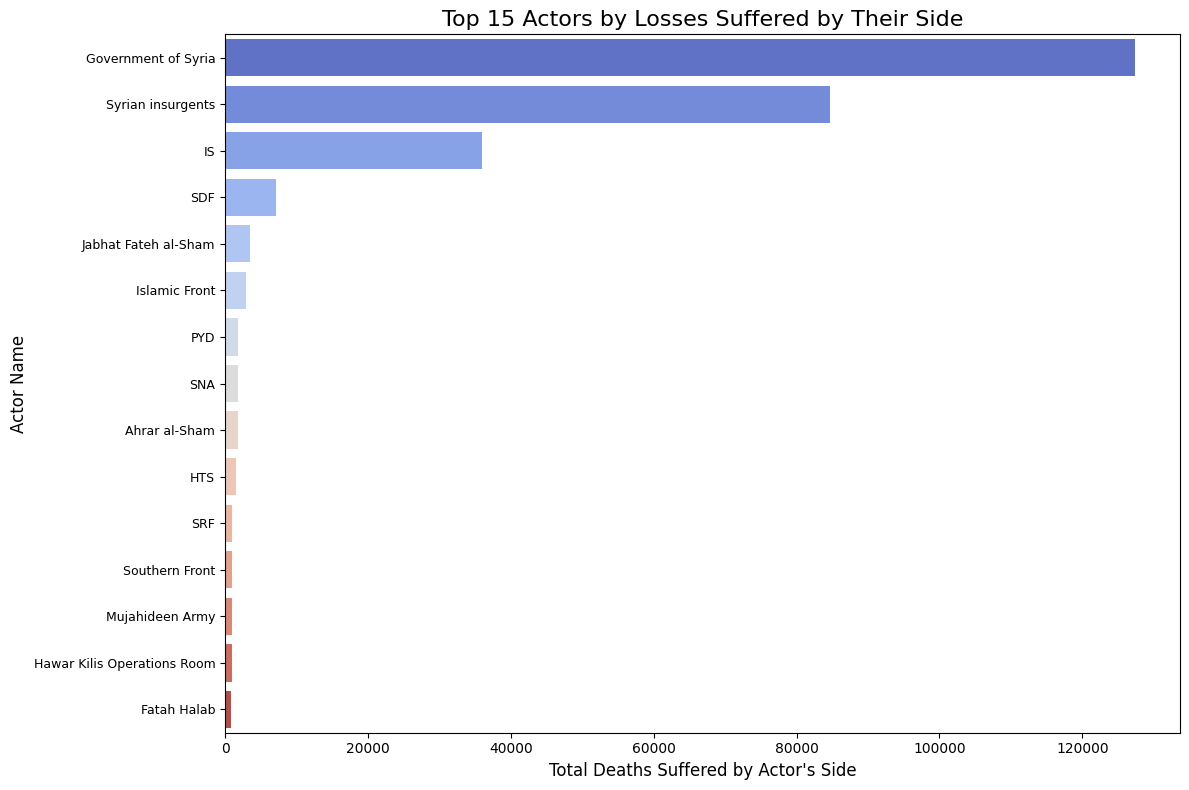



--- Top 15 Actors Whose Sides Inflicted Most Deaths ---
+--------+----------------------+------------------------------------+
|   Rank | Actor Name           |   Deaths Inflicted by Actor's Side |
|--------+----------------------+------------------------------------|
|      1 | Syrian insurgents    |                             105583 |
|      2 | Government of Syria  |                             100908 |
|      3 | IS                   |                              35029 |
|      4 | SDF                  |                               9851 |
|      5 | PYD                  |                               3916 |
|      6 | SNA                  |                               2320 |
|      7 | Jabhat Fateh al-Sham |                               2167 |
|      8 | Islamic Front        |                               1936 |
|      9 | Euphrates Vulcano    |                               1790 |
|     10 | Ahrar al-Sham        |                               1576 |
|     11 | Sham Leg

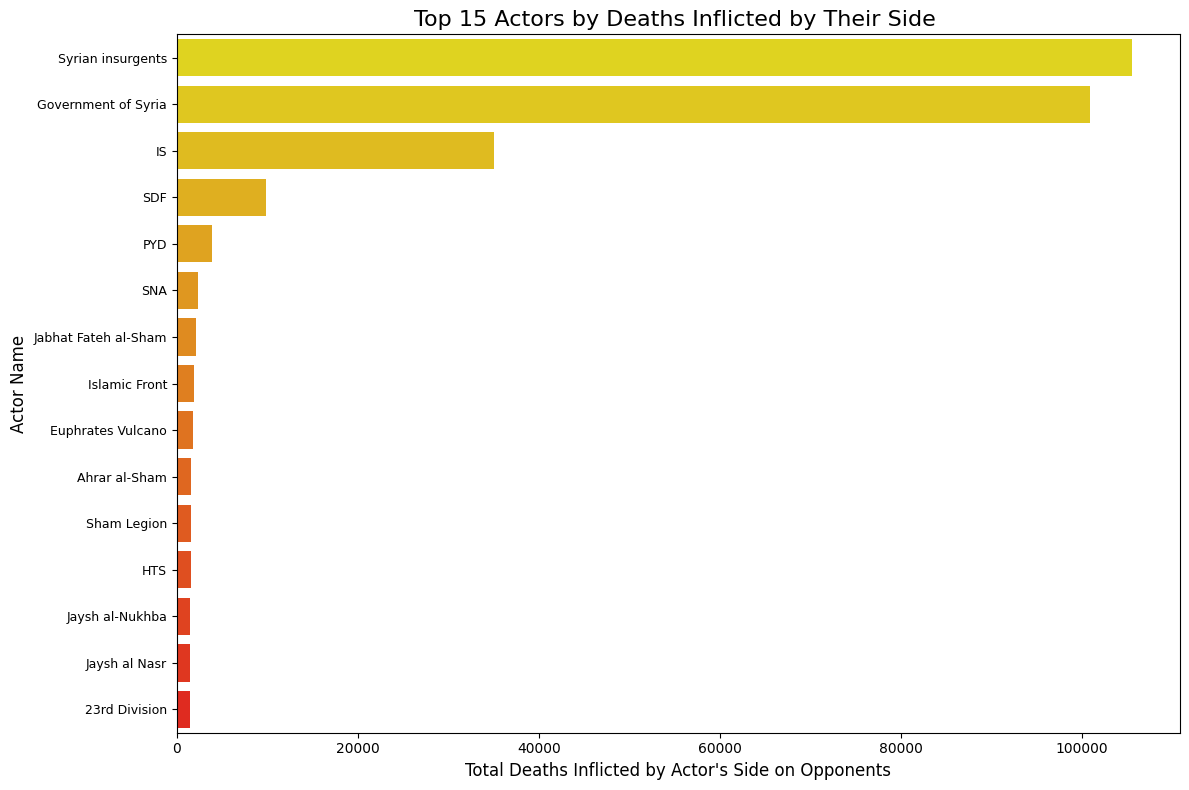

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from collections import defaultdict
import numpy as np # For sample data

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    data_for_example = {
        'id': range(1, 11),
        'side_a': ['GovA', 'RebelX, RebelY', 'GovB', 'ActorC', 'GovA', 'ActorD, ActorE', 'GovA', 'RebelX', 'ActorF', 'ActorC, ActorG'],
        'side_b': ['RebelX', 'GovA', 'RebelY, ActorZ', 'ActorD', 'RebelX, RebelY', 'GovC', 'ActorF', 'ActorC, ActorG', 'GovA', 'RebelX'],
        'deaths_a': [10, 5, 2, 0, 15, 3, 7, 1, 0, 4], # Deaths suffered by side_a
        'deaths_b': [3, 12, 8, 1, 20, 0, 2, 5, 9, 6]  # Deaths suffered by side_b (inflicted by side_a)
    }
    df = pd.DataFrame(data_for_example)
    for col in ['side_a', 'side_b']:
        df[col] = df[col].astype('object')
    for col in ['deaths_a', 'deaths_b']:
        df[col] = df[col].astype('int16')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Analysis of Casualties Associated with Individual Actors ---
if 'side_a' in df.columns and 'side_b' in df.columns and \
   'deaths_a' in df.columns and 'deaths_b' in df.columns:
    print("\n\n--- Analysis: Casualties Associated with Individual Warring Parties ---")

    # Fill NaN in death columns with 0 for summation
    df['deaths_a'] = df['deaths_a'].fillna(0)
    df['deaths_b'] = df['deaths_b'].fillna(0)

    def split_actor_string(actor_entry_str):
        """Splits a potentially comma-separated string of actors into a list of individuals."""
        if pd.isna(actor_entry_str):
            return []
        # Split by ", " (comma followed by space) and strip whitespace
        return [name.strip() for name in str(actor_entry_str).split(', ') if name.strip()]

    actor_deaths_suffered = defaultdict(int)
    actor_deaths_inflicted = defaultdict(int)
    all_actors_set = set()

    # Iterate through each event to attribute casualties
    for index, row in df.iterrows():
        current_deaths_a = row['deaths_a'] # Suffered by side_a, inflicted by side_b
        current_deaths_b = row['deaths_b'] # Suffered by side_b, inflicted by side_a

        individual_actors_in_a = split_actor_string(row['side_a'])
        individual_actors_in_b = split_actor_string(row['side_b'])

        for actor in individual_actors_in_a:
            all_actors_set.add(actor)
            actor_deaths_suffered[actor] += current_deaths_a
            actor_deaths_inflicted[actor] += current_deaths_b

        for actor in individual_actors_in_b:
            all_actors_set.add(actor)
            actor_deaths_suffered[actor] += current_deaths_b
            actor_deaths_inflicted[actor] += current_deaths_a

    # Convert defaultdicts to DataFrames for sorting and display
    df_suffered = pd.DataFrame(list(actor_deaths_suffered.items()), columns=['Actor Name', 'Deaths Suffered by Actor\'s Side'])
    df_suffered = df_suffered.sort_values(by='Deaths Suffered by Actor\'s Side', ascending=False)

    df_inflicted = pd.DataFrame(list(actor_deaths_inflicted.items()), columns=['Actor Name', 'Deaths Inflicted by Actor\'s Side'])
    df_inflicted = df_inflicted.sort_values(by='Deaths Inflicted by Actor\'s Side', ascending=False)

    # --- 1. Display Actors who Suffered the Most Losses ---
    top_n_display = 15
    print(f"\n\n--- Top {top_n_display} Actors Whose Sides Suffered Most Losses ---")
    # Add rank
    table_suffered = df_suffered.head(top_n_display).copy()
    if not table_suffered.empty : table_suffered.insert(0, 'Rank', range(1, len(table_suffered) + 1))
    print(tabulate(table_suffered, headers='keys', tablefmt='psql', showindex=False))
    if len(df_suffered) > top_n_display:
        print(f"... and {len(df_suffered) - top_n_display} more actors.")

    if not df_suffered.empty and df_suffered['Deaths Suffered by Actor\'s Side'].max() > 0 :
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Deaths Suffered by Actor\'s Side', y='Actor Name',
                    data=df_suffered.head(top_n_display), palette="coolwarm",
                    hue='Actor Name', dodge=False, legend=False, orient='h')
        plt.title(f'Top {top_n_display} Actors by Losses Suffered by Their Side', fontsize=16)
        plt.xlabel('Total Deaths Suffered by Actor\'s Side', fontsize=12)
        plt.ylabel('Actor Name', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=9)
        plt.tight_layout()
        plt.show()
    elif not df_suffered.empty :
        print("No losses recorded or data is zero for suffered deaths chart.")


    # --- 2. Display Actors whose Side Inflicted the Most Deaths ---
    print(f"\n\n--- Top {top_n_display} Actors Whose Sides Inflicted Most Deaths ---")
    table_inflicted = df_inflicted.head(top_n_display).copy()
    if not table_inflicted.empty : table_inflicted.insert(0, 'Rank', range(1, len(table_inflicted) + 1))
    print(tabulate(table_inflicted, headers='keys', tablefmt='psql', showindex=False))
    if len(df_inflicted) > top_n_display:
        print(f"... and {len(df_inflicted) - top_n_display} more actors.")

    if not df_inflicted.empty and df_inflicted['Deaths Inflicted by Actor\'s Side'].max() > 0:
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Deaths Inflicted by Actor\'s Side', y='Actor Name',
                    data=df_inflicted.head(top_n_display), palette="autumn_r",
                    hue='Actor Name', dodge=False, legend=False, orient='h')
        plt.title(f'Top {top_n_display} Actors by Deaths Inflicted by Their Side ', fontsize=16)
        plt.xlabel('Total Deaths Inflicted by Actor\'s Side on Opponents', fontsize=12)
        plt.ylabel('Actor Name', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=9)
        plt.tight_layout()
        plt.show()
    elif not df_inflicted.empty :
        print("No inflicted deaths recorded or data is zero for inflicted deaths chart.")

else:
    print("\nRequired columns ('side_a', 'side_b', 'deaths_a', 'deaths_b') not found for this analysis.")

Using existing DataFrame 'df'.


--- Analysis: Casualties Associated with Individual Warring Parties (Updated Logic) ---


--- Top 15 Actors Whose Sides Suffered Most Losses ---
+--------+-----------------------------+-----------------------------------+
|   Rank | Actor Name                  |   Deaths Suffered by Actor's Side |
|--------+-----------------------------+-----------------------------------|
|      1 | Government of Syria         |                            127311 |
|      2 | Syrian insurgents           |                             84666 |
|      3 | IS                          |                             35927 |
|      4 | SDF                         |                              7128 |
|      5 | Jabhat Fateh al-Sham        |                              3527 |
|      6 | Islamic Front               |                              2979 |
|      7 | PYD                         |                              1841 |
|      8 | SNA                         |            

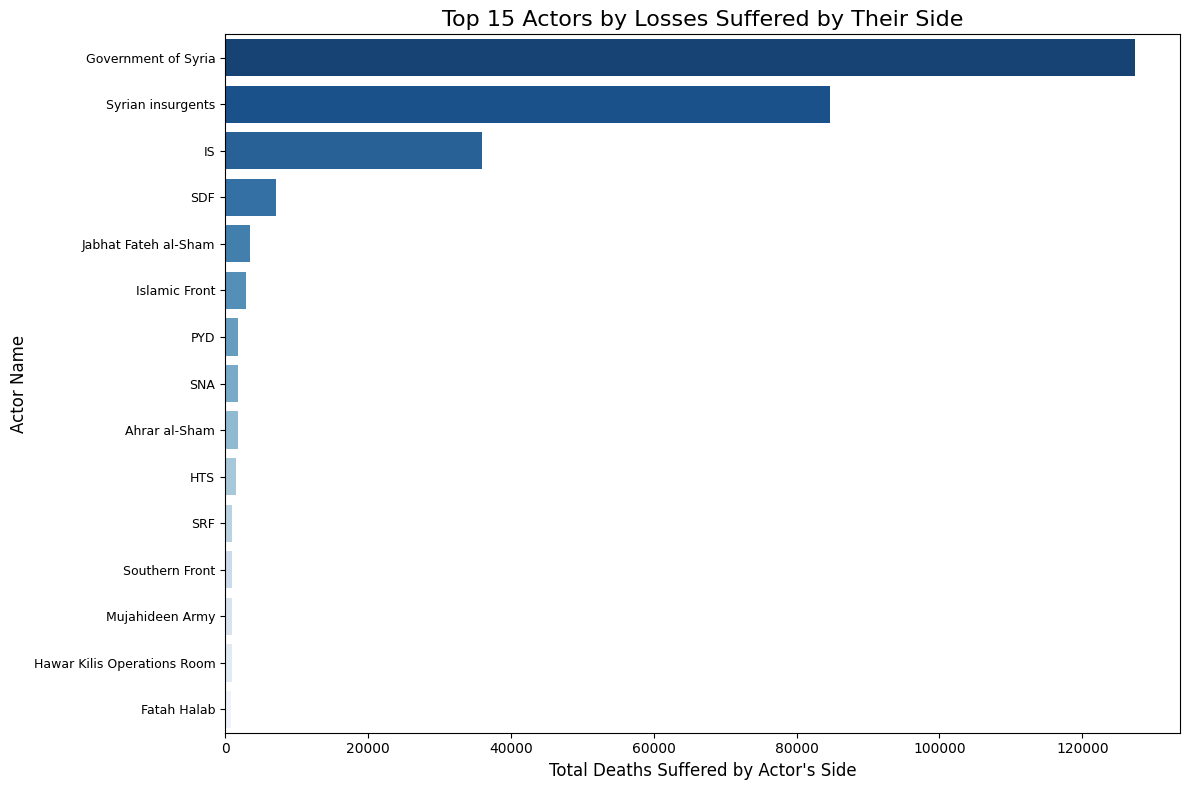



--- Top 15 Actors Whose Sides Inflicted Most Deaths ---
+--------+----------------------+------------------------------------+
|   Rank | Actor Name           |   Deaths Inflicted by Actor's Side |
|--------+----------------------+------------------------------------|
|      1 | Government of Syria  |                             110688 |
|      2 | Syrian insurgents    |                             106706 |
|      3 | IS                   |                              40846 |
|      4 | SDF                  |                               9953 |
|      5 | PYD                  |                               4092 |
|      6 | SNA                  |                               2320 |
|      7 | Jabhat Fateh al-Sham |                               2167 |
|      8 | Islamic Front        |                               1936 |
|      9 | Euphrates Vulcano    |                               1790 |
|     10 | Ahrar al-Sham        |                               1576 |
|     11 | Sham Leg

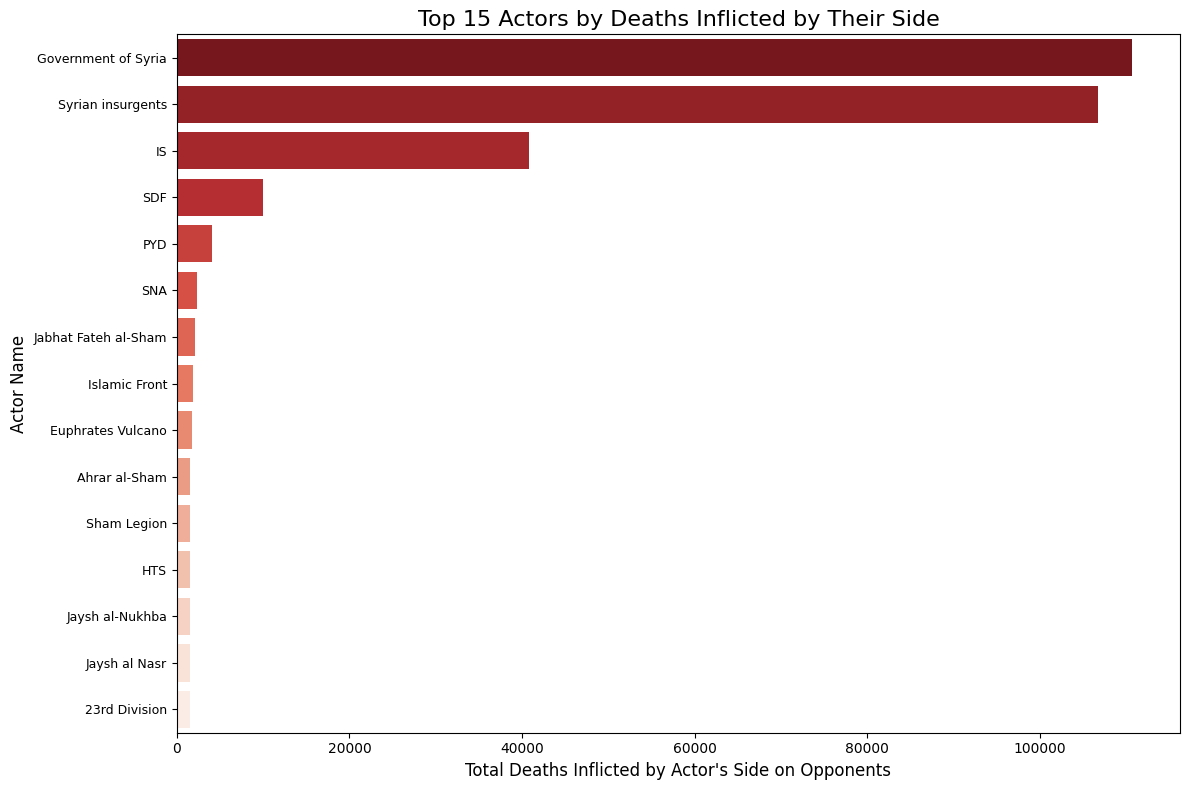

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from collections import defaultdict
import numpy as np # For sample data

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    data_for_example = {
        'id': range(1, 11),
        'side_a': ['GovA', 'RebelX, RebelY', 'GovB', 'ActorC', 'GovA', 'ActorD, ActorE', 'GovA', 'RebelX', 'ActorF', 'ActorC, ActorG'],
        'side_b': ['RebelX', 'GovA', 'RebelY, ActorZ', 'Civilians', 'RebelX, RebelY', 'GovC', 'ActorF', 'Civilians', 'GovA', 'RebelX'],
        'deaths_a': [10, 5, 2, 0, 15, 3, 7, 1, 0, 4], # Deaths suffered by side_a
        'deaths_b': [3, 12, 8, 0, 20, 0, 2, 0, 9, 6],  # Deaths suffered by side_b (0 when Civilians)
        'deaths_civilians': [1, 2, 0, 25, 3, 0, 1, 30, 2, 0] # Deaths recorded in dedicated column
    }
    df = pd.DataFrame(data_for_example)
    for col in ['side_a', 'side_b']:
        df[col] = df[col].astype('object')
    for col in ['deaths_a', 'deaths_b', 'deaths_civilians']:
        df[col] = df[col].astype('int16')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Analysis of Casualties Associated with Individual Actors (Updated Logic) ---
if 'side_a' in df.columns and 'side_b' in df.columns and \
   'deaths_a' in df.columns and 'deaths_b' in df.columns and 'deaths_civilians' in df.columns:
    print("\n\n--- Analysis: Casualties Associated with Individual Warring Parties (Updated Logic) ---")

    # Fill NaN in death columns with 0 for summation
    for col in ['deaths_a', 'deaths_b', 'deaths_civilians']:
        df[col] = df[col].fillna(0)

    def split_actor_string(actor_entry_str):
        """Splits a potentially comma-separated string of actors into a list of individuals."""
        if pd.isna(actor_entry_str):
            return []
        return [name.strip() for name in str(actor_entry_str).split(', ') if name.strip()]

    actor_deaths_suffered = defaultdict(int)
    actor_deaths_inflicted = defaultdict(int)

    # *** START OF MODIFIED SECTION ***
    # Iterate through each event to attribute casualties with the new logic
    for index, row in df.iterrows():
        # Get the death counts for the event
        current_deaths_a = row['deaths_a'] # Deaths suffered by side_a
        current_deaths_b = row['deaths_b'] # Deaths suffered by side_b
        current_deaths_civilians = row['deaths_civilians'] # Dedicated civilian deaths

        # Split actor strings
        individual_actors_in_a = split_actor_string(row['side_a'])
        individual_actors_in_b = split_actor_string(row['side_b'])

        # Check if the opposing side is 'Civilians'
        side_b_is_civilians = 'Civilians' in str(row['side_b'])
        side_a_is_civilians = 'Civilians' in str(row['side_a'])

        # Determine the number of deaths inflicted by each side based on the new logic
        # If side_b is 'Civilians', deaths inflicted by side_a are from 'deaths_civilians'.
        # Otherwise, they are the deaths suffered by side_b ('deaths_b').
        deaths_inflicted_by_a = current_deaths_civilians if side_b_is_civilians else current_deaths_b

        # If side_a is 'Civilians', deaths inflicted by side_b are from 'deaths_civilians'.
        # Otherwise, they are the deaths suffered by side_a ('deaths_a').
        deaths_inflicted_by_b = current_deaths_civilians if side_a_is_civilians else current_deaths_a

        # Attribute casualties to individual actors
        for actor in individual_actors_in_a:
            actor_deaths_suffered[actor] += current_deaths_a    # Deaths suffered by this actor's side
            actor_deaths_inflicted[actor] += deaths_inflicted_by_a # Deaths inflicted by this actor's side

        for actor in individual_actors_in_b:
            actor_deaths_suffered[actor] += current_deaths_b    # Deaths suffered by this actor's side
            actor_deaths_inflicted[actor] += deaths_inflicted_by_b # Deaths inflicted by this actor's side
    # *** END OF MODIFIED SECTION ***

    # Convert defaultdicts to DataFrames for sorting and display
    df_suffered = pd.DataFrame(list(actor_deaths_suffered.items()), columns=['Actor Name', 'Deaths Suffered by Actor\'s Side'])
    df_suffered = df_suffered.sort_values(by='Deaths Suffered by Actor\'s Side', ascending=False)

    df_inflicted = pd.DataFrame(list(actor_deaths_inflicted.items()), columns=['Actor Name', 'Deaths Inflicted by Actor\'s Side'])
    df_inflicted = df_inflicted.sort_values(by='Deaths Inflicted by Actor\'s Side', ascending=False)

    # --- 1. Display Actors who Suffered the Most Losses ---
    top_n_display = 15
    print(f"\n\n--- Top {top_n_display} Actors Whose Sides Suffered Most Losses ---")
    table_suffered = df_suffered.head(top_n_display).copy()
    if not table_suffered.empty : table_suffered.insert(0, 'Rank', range(1, len(table_suffered) + 1))
    print(tabulate(table_suffered, headers='keys', tablefmt='psql', showindex=False))
    if len(df_suffered) > top_n_display:
        print(f"... and {len(df_suffered) - top_n_display} more actors.")

    if not df_suffered.empty and df_suffered['Deaths Suffered by Actor\'s Side'].max() > 0 :
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Deaths Suffered by Actor\'s Side', y='Actor Name',
                    data=df_suffered.head(top_n_display), palette="Blues_r",
                    hue='Actor Name', dodge=False, legend=False, orient='h')
        plt.title(f'Top {top_n_display} Actors by Losses Suffered by Their Side', fontsize=16)
        plt.xlabel('Total Deaths Suffered by Actor\'s Side', fontsize=12)
        plt.ylabel('Actor Name', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=9)
        plt.tight_layout()
        plt.show()

    # --- 2. Display Actors whose Side Inflicted the Most Deaths ("Most Brutal") ---
    print(f"\n\n--- Top {top_n_display} Actors Whose Sides Inflicted Most Deaths ---")
    table_inflicted = df_inflicted.head(top_n_display).copy()
    if not table_inflicted.empty : table_inflicted.insert(0, 'Rank', range(1, len(table_inflicted) + 1))
    print(tabulate(table_inflicted, headers='keys', tablefmt='psql', showindex=False))
    if len(df_inflicted) > top_n_display:
        print(f"... and {len(df_inflicted) - top_n_display} more actors.")

    if not df_inflicted.empty and df_inflicted['Deaths Inflicted by Actor\'s Side'].max() > 0:
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Deaths Inflicted by Actor\'s Side', y='Actor Name',
                    data=df_inflicted.head(top_n_display), palette="Reds_r",
                    hue='Actor Name', dodge=False, legend=False, orient='h')
        plt.title(f'Top {top_n_display} Actors by Deaths Inflicted by Their Side', fontsize=16)
        plt.xlabel('Total Deaths Inflicted by Actor\'s Side on Opponents', fontsize=12)
        plt.ylabel('Actor Name', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=9)
        plt.tight_layout()
        plt.show()

else:
    print("\nOne or more required columns are missing for this analysis.")

Using existing DataFrame 'df'.


--- 1. Overall Analysis: Event Distribution Over the Years ---

Table: Total Number of Events per Year:
+--------+--------------------+
|   Year |   Number of Events |
|--------+--------------------|
|   2004 |                  3 |
|   2008 |                  1 |
|   2011 |                954 |
|   2012 |              11825 |
|   2013 |              18649 |
|   2014 |              16696 |
|   2015 |              11382 |
|   2016 |               9472 |
|   2017 |               8071 |
|   2018 |               3557 |
|   2019 |               2382 |
|   2020 |               1140 |
|   2021 |                823 |
|   2022 |                793 |
|   2023 |               1007 |
+--------+--------------------+


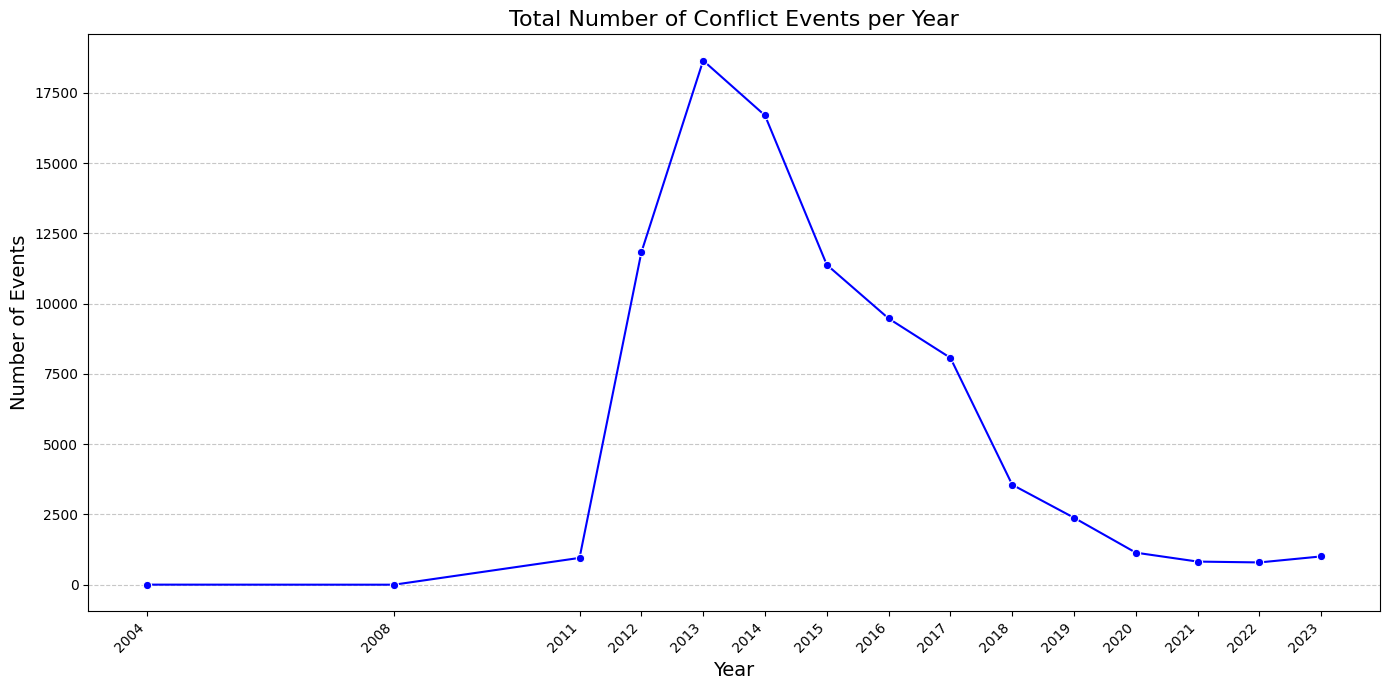

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    # More representative sample data
    data_for_example = {
        'id': range(1, 151),
        'conflict_name': np.random.choice(['Conflict Alpha', 'Conflict Beta', 'Conflict Gamma', 'Conflict Delta'], size=150),
        'year': np.random.choice(range(2012, 2022), size=150, p=[0.05, 0.1, 0.1, 0.15, 0.2, 0.15, 0.1, 0.05, 0.05, 0.05]),
        'best': np.random.randint(0, 20, size=150)
    }
    df = pd.DataFrame(data_for_example)
    df['conflict_name'] = df['conflict_name'].astype('category')
    df['year'] = df['year'].astype('int16')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Overall Temporal Analysis: Event Distribution Over Years ---
if 'year' in df.columns:
    print("\n\n--- 1. Overall Analysis: Event Distribution Over the Years ---")

    # 1. Calculate event counts per year
    events_per_year = df['year'].value_counts().reset_index()
    events_per_year.columns = ['Year', 'Number of Events']
    # Sort by year for chronological plotting
    events_per_year = events_per_year.sort_values(by='Year')

    print("\nTable: Total Number of Events per Year:")
    print(tabulate(events_per_year, headers='keys', tablefmt='psql', showindex=False))

    # 2. Create a line chart to show the trend
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='Year', y='Number of Events', data=events_per_year, marker='o', color='b')
    plt.title('Total Number of Conflict Events per Year', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Events', fontsize=14)
    plt.xticks(events_per_year['Year'], rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("\nColumn 'year' not found. Cannot perform temporal analysis.")

Using existing DataFrame 'df'.


--- Temporal Distribution for the Top 3 Most Frequent Conflicts ---
The top 3 most frequent conflicts are: ['Syria: Government', 'Syria: Islamic State', 'IS - SDF', 'Government of Syria - Civilians', 'IS - Civilians']

Table: Event Counts per Year for Top 3 Conflicts:
+--------+-----------------------------------+------------------+--------------------+---------------------+----------------------------+--------------------------------------------------+-------------------------------------------+---------------------+---------------------+----------------------------------------+--------------------------------+-------------------------------------------------------------------------------------------------+--------------------------------------------------------------------+-----------------------------------------------+--------------------------------------+----------------------+--------------------------------------------+--------------------------

/tmp/ipython-input-68-17540257.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  events_top3_per_year = df_top3.groupby(['year', 'conflict_name']).size().reset_index(name='Number of Events')
/tmp/ipython-input-68-17540257.py:67: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  lineplot = sns.lineplot(


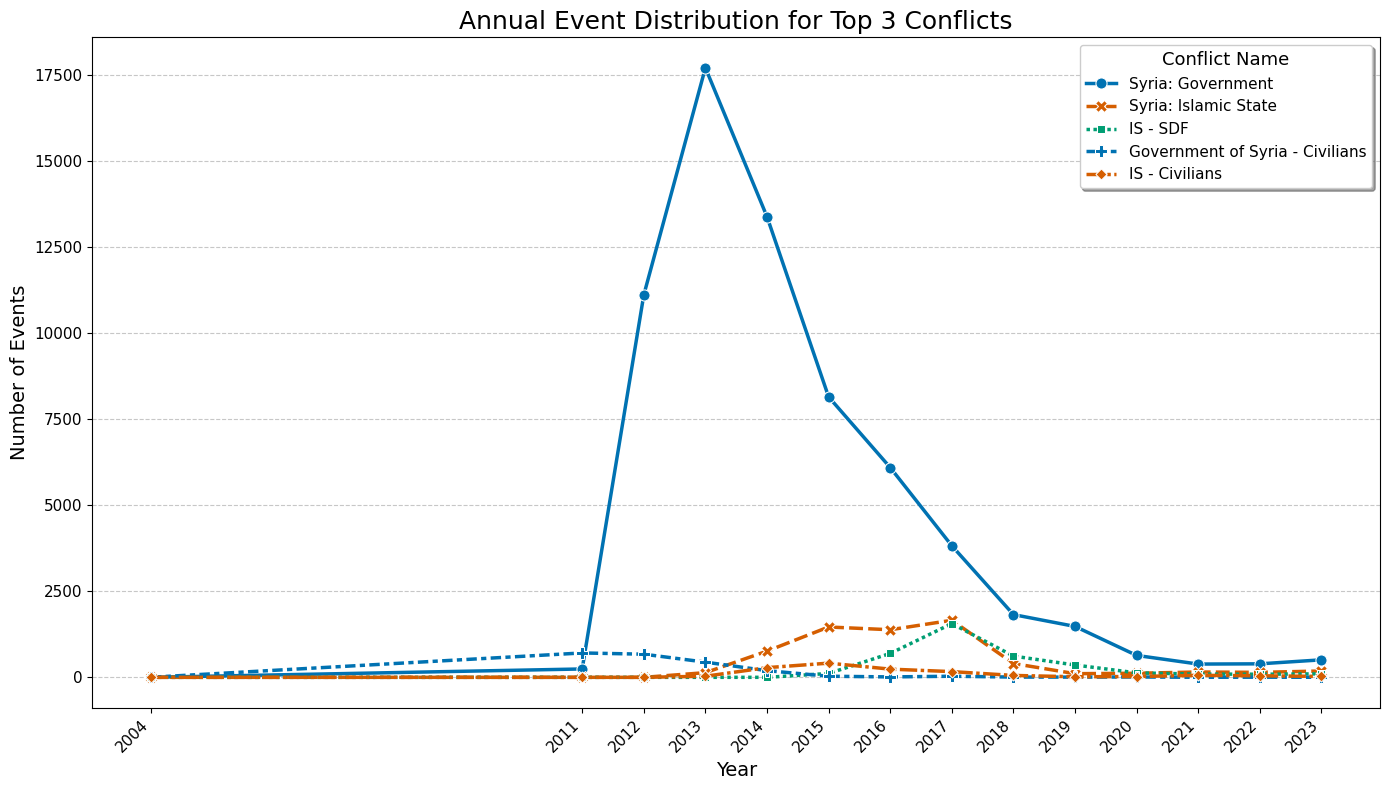

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    conflict_names_sample = [
        'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha', 'Conflict Alpha',
        'Conflict Beta', 'Conflict Beta', 'Conflict Beta', 'Conflict Beta',
        'Conflict Gamma', 'Conflict Gamma', 'Conflict Gamma',
        'Conflict Delta'
    ] * 5
    np.random.shuffle(conflict_names_sample)

    adm1_sample = [
        'Aleppo governorate', 'Idlib governorate', 'Damascus governorate', 'Homs governorate',
        'Ar Raqqah governorate', 'Deir ez Zor governorate', 'Hamah governorate'
    ] * (len(conflict_names_sample) // 7 + 1)
    np.random.shuffle(adm1_sample)

    data_for_example = {
        'id': range(len(conflict_names_sample)),
        'conflict_name': conflict_names_sample,
        'adm_1': adm1_sample[:len(conflict_names_sample)],
        'year': np.random.choice(range(2012, 2022), size=len(conflict_names_sample))
    }
    df = pd.DataFrame(data_for_example)
    df['conflict_name'] = df['conflict_name'].astype('category')
    df['adm_1'] = df['adm_1'].astype('category')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Analysis for Top 3 Most Frequent Conflicts (with clearer plot) ---
if 'conflict_name' in df.columns and 'year' in df.columns:
    print("\n\n--- Temporal Distribution for the Top 3 Most Frequent Conflicts ---")

    # 1. Identify the top 3 most frequent conflicts
    top_3_conflicts = df['conflict_name'].value_counts().nlargest(5).index.tolist()
    print(f"The top 3 most frequent conflicts are: {top_3_conflicts}")

    # 2. Filter the DataFrame to include only these top 3 conflicts
    df_top3 = df[df['conflict_name'].isin(top_3_conflicts)]

    # 3. Calculate event counts per year for each of the top 3 conflicts
    events_top3_per_year = df_top3.groupby(['year', 'conflict_name']).size().reset_index(name='Number of Events')

    # Optional: Display the data in a pivoted table
    try:
        pivoted_top3 = events_top3_per_year.pivot(index='year', columns='conflict_name', values='Number of Events').fillna(0).astype(int)
        print("\nTable: Event Counts per Year for Top 3 Conflicts:")
        print(tabulate(pivoted_top3, headers='keys', tablefmt='psql'))
    except Exception as e:
        print(f"Could not pivot data for table display. Raw data:\n{events_top3_per_year}")


    # 4. Create a multi-line chart with clearer, more distinct colors and lines
    plt.figure(figsize=(14, 8))

    # Define a custom, high-contrast color palette
    # For example: a distinct blue, orange, and green
    custom_palette = ["#0072B2", "#D55E00", "#009E73"]

    lineplot = sns.lineplot(
        x='year',
        y='Number of Events',
        hue='conflict_name',      # Different color for each conflict
        hue_order=top_3_conflicts,  # Ensure consistent color mapping to the top 3
        style='conflict_name',     # Different line style (solid, dashed, etc.)
        style_order=top_3_conflicts, # Ensure consistent style mapping
        markers=True,              # Add markers to each data point
        markersize=8,              # Make markers a bit larger
        linewidth=2.5,             # Make lines thicker for clarity
        data=events_top3_per_year,
        palette=custom_palette     # Use the custom, clearer palette
    )

    plt.title('Annual Event Distribution for Top 3 Conflicts', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Events', fontsize=14)

    # Ensure all years in the range are shown on the x-axis
    all_years_in_range = sorted(df_top3['year'].unique())
    plt.xticks(ticks=all_years_in_range, rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)

    # Improve legend
    plt.legend(title='Conflict Name', fontsize=11, title_fontsize=13, shadow=True)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("\nRequired columns 'conflict_name' or 'year' not found for this analysis.")

Using existing DataFrame 'df'.


--- Analysis: Percentage of each Type of Violence ---

Table: Distribution of Conflict Types by Frequency and Percentage:
+----------------------+----------------------+--------------------+--------------+
| Violence Type Name   |   Violence Type Code |   Number of Events | Percentage   |
|----------------------+----------------------+--------------------+--------------|
| State-Based Conflict |                    1 |              72972 | 84.11%       |
| State vs. Opposition |                    2 |               9830 | 11.33%       |
| Non-State Conflicts  |                    3 |               3953 | 4.56%        |
+----------------------+----------------------+--------------------+--------------+


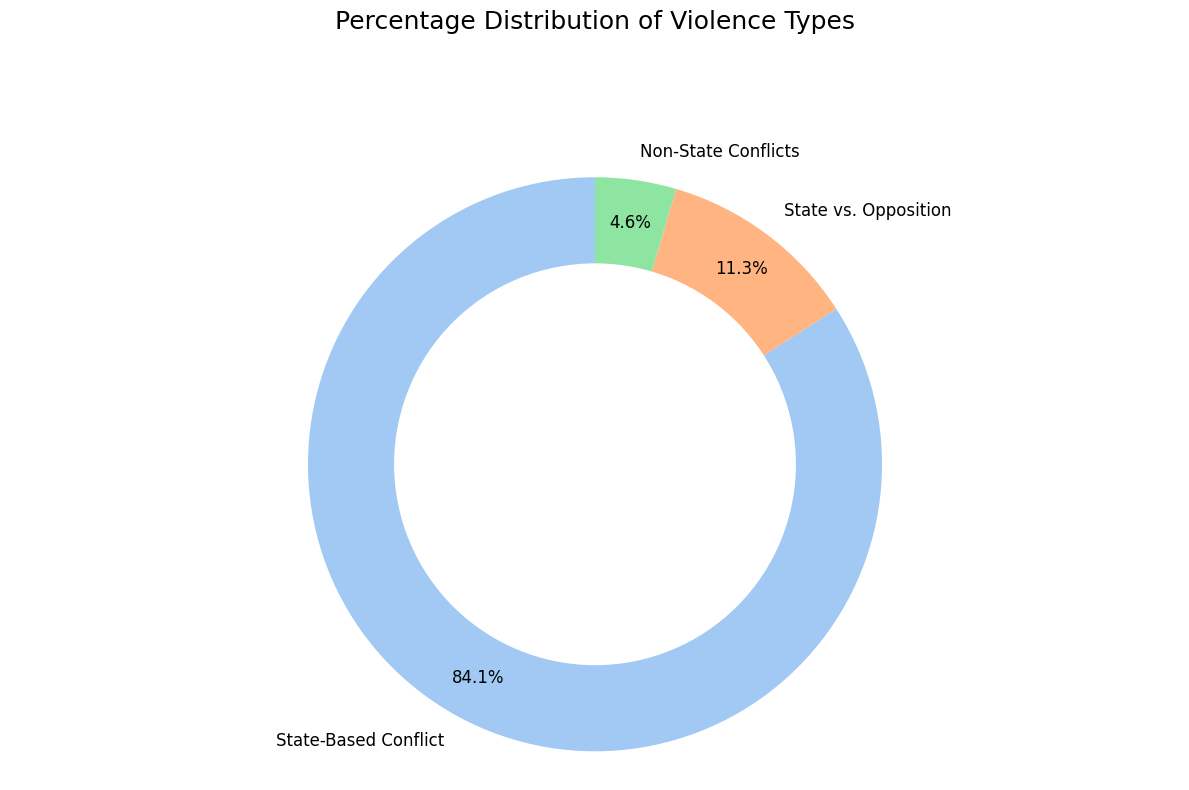

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    # Sample data with a distribution of violence types
    data_for_example = {
        'id': range(100),
        'type_of_violence': np.random.choice([1, 2, 3, 4], size=100, p=[0.1, 0.5, 0.15, 0.25]),
        'country': ['Syria'] * 100 # Assuming data is already filtered for Syria
    }
    df = pd.DataFrame(data_for_example)
    df['type_of_violence'] = df['type_of_violence'].astype('int8')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Analysis: Percentage of each Type of Violence in Syria ---
if 'type_of_violence' in df.columns:
    print("\n\n--- Analysis: Percentage of each Type of Violence ---")

    # 1. Calculate frequency counts and percentages
    # Ensure to work on Syria data only if df is not already filtered
    # df_syria = df[df['country'] == 'Syria'] if 'country' in df.columns else df
    df_syria = df # Assuming df is already Syria-specific as per previous steps

    # Calculate counts
    type_counts = df_syria['type_of_violence'].value_counts().reset_index()
    type_counts.columns = ['Violence Type Code', 'Number of Events']

    # Calculate percentages
    type_percentages = df_syria['type_of_violence'].value_counts(normalize=True).reset_index()
    type_percentages.columns = ['Violence Type Code', 'Percentage']
    type_percentages['Percentage'] = type_percentages['Percentage'] * 100 # Convert to percentage format

    # 2. Merge counts and percentages into one DataFrame
    analysis_df = pd.merge(type_counts, type_percentages, on='Violence Type Code')

    # 3. Create a mapping dictionary based on user's definitions
    violence_type_map = {
        1: 'State-Based Conflict', # Assumption for type 1, as per UCDP standards
        2: 'State vs. Opposition',
        3: 'Non-State Conflicts',
        4: 'Attacks on Civilians (One-Sided)'
        # Add other mappings if you know them
    }

    # Add a descriptive name column using the map
    analysis_df['Violence Type Name'] = analysis_df['Violence Type Code'].map(violence_type_map).fillna(f"Unknown Type")
    analysis_df = analysis_df.sort_values(by='Number of Events', ascending=False)


    # 4. Display results in a table
    print("\nTable: Distribution of Conflict Types by Frequency and Percentage:")
    # Format percentage for display
    display_table = analysis_df.copy()
    display_table['Percentage'] = display_table['Percentage'].map('{:.2f}%'.format)
    print(tabulate(display_table[['Violence Type Name', 'Violence Type Code', 'Number of Events', 'Percentage']], headers='keys', tablefmt='psql', showindex=False))

    # 5. Create a pie chart to visualize the percentage distribution
    if not analysis_df.empty:
        plt.figure(figsize=(12, 8))

        # Use a good color palette
        colors = sns.color_palette('pastel')[0:len(analysis_df)]

        plt.pie(
            analysis_df['Number of Events'],
            labels=analysis_df['Violence Type Name'],
            colors=colors,
            autopct='%1.1f%%', # Format to show percentage with one decimal place
            startangle=90,
            pctdistance=0.85, # Distance of percentage text from center
            textprops={'fontsize': 12}
        )

        # Draw a circle at the center to make it a donut chart (optional, but looks good)
        centre_circle = plt.Circle((0,0),0.70,fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)

        plt.title('Percentage Distribution of Violence Types\n\n\n\n', fontsize=18)
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.tight_layout()
        plt.show()
    else:
        print("No data available to plot.")

else:
    print("\nColumn 'type_of_violence' not found. Cannot perform this analysis.")

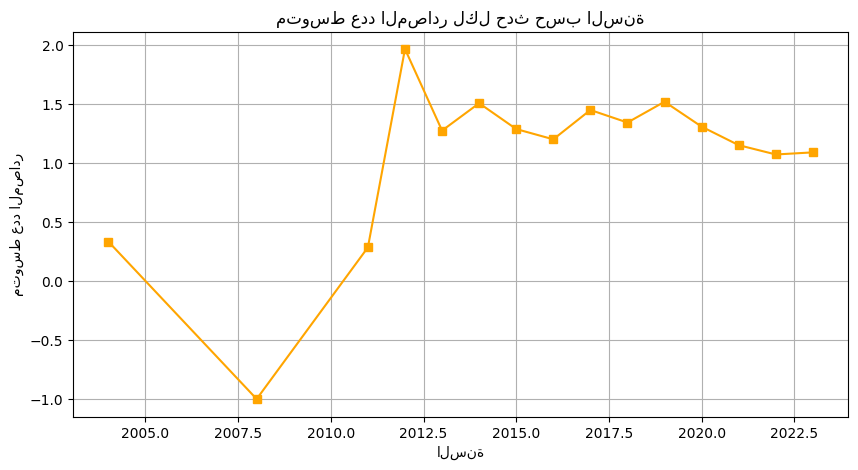

In [70]:
sources_per_year = df.groupby('year')['number_of_sources'].mean()

plt.figure(figsize=(10, 5))
plt.plot(sources_per_year.index, sources_per_year.values, color='orange', marker='s')
plt.title("متوسط عدد المصادر لكل حدث حسب السنة")
plt.xlabel("السنة")
plt.ylabel("متوسط عدد المصادر")
plt.grid(True)
plt.show()


Using existing DataFrame 'df'.


--- Analysis: Documentation Quality and Gaps Over Time ---

Table: Documentation Quality Metrics per Year:
+--------+---------------+--------------------------+-------------------------+
|   Year |   Event Count |   Avg. Sources per Event |   Unique Source Offices |
|--------+---------------+--------------------------+-------------------------|
|   2004 |             3 |                     0.33 |                       1 |
|   2008 |             1 |                    -1    |                       0 |
|   2011 |           954 |                     0.28 |                      50 |
|   2012 |         11825 |                     1.96 |                     581 |
|   2013 |         18649 |                     1.27 |                     128 |
|   2014 |         16696 |                     1.5  |                     364 |
|   2015 |         11382 |                     1.29 |                     213 |
|   2016 |          9472 |                     1.2  |       

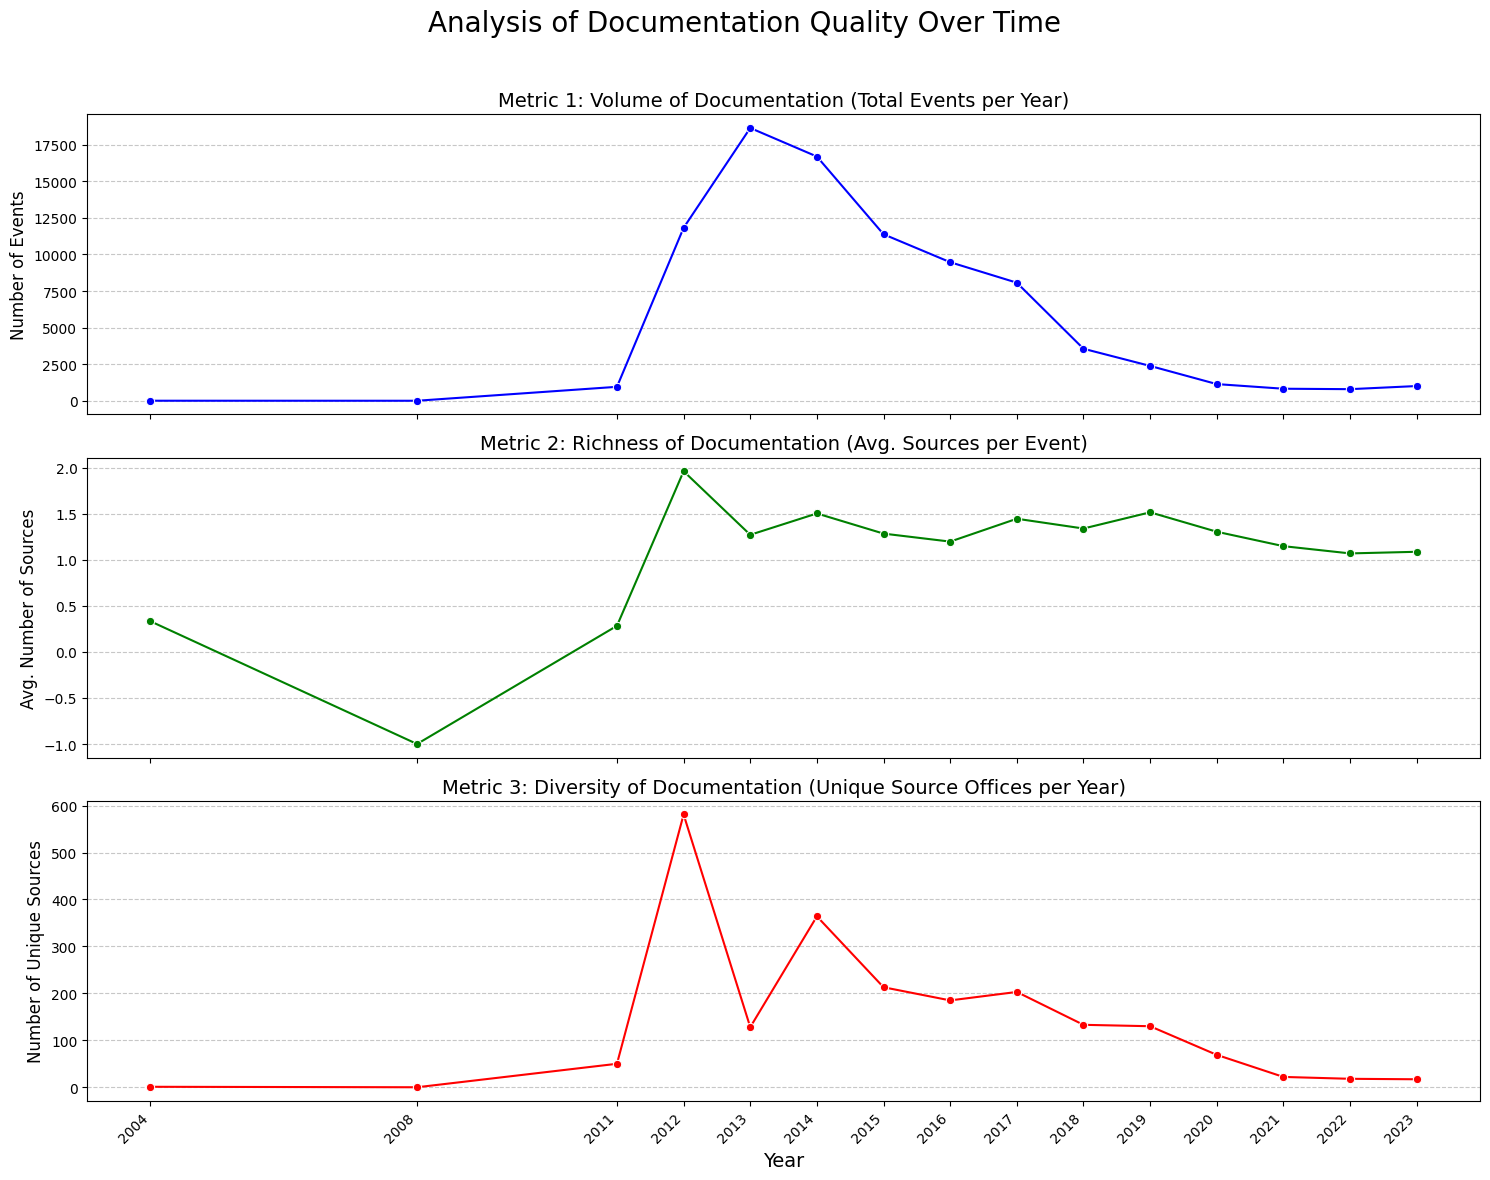

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    years = np.random.choice(range(2012, 2022), size=5000, p=[0.02, 0.05, 0.1, 0.15, 0.2, 0.2, 0.15, 0.05, 0.04, 0.04])
    num_sources = [np.random.randint(1, 5) if y < 2020 else np.random.randint(1, 3) for y in years]
    source_offices_high = ['Source A', 'Source B', 'Source C', 'Source D', 'Source E', 'Source F']
    source_offices_low = ['Source A', 'Source B', 'Source G']
    source_offices = [np.random.choice(source_offices_high) if y < 2020 else np.random.choice(source_offices_low) for y in years]

    data_for_example = {
        'id': range(len(years)),
        'year': years,
        'number_of_sources': num_sources,
        'source_office': source_offices
    }
    df = pd.DataFrame(data_for_example)
    df['year'] = df['year'].astype('int16')
    df['number_of_sources'] = df['number_of_sources'].astype('int16')
    df['source_office'] = df['source_office'].astype('category')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Analysis of Documentation Quality and Gaps Over Time ---
required_cols = ['year', 'id', 'number_of_sources', 'source_office']
if all(col in df.columns for col in required_cols):
    print("\n\n--- Analysis: Documentation Quality and Gaps Over Time ---")

    # 1. Calculate the three metrics per year
    df['number_of_sources'] = pd.to_numeric(df['number_of_sources'], errors='coerce').fillna(1)

    yearly_stats = df.groupby('year').agg(
        event_count=('id', 'count'),
        avg_sources_per_event=('number_of_sources', 'mean'),
        unique_source_offices=('source_office', 'nunique')
    ).reset_index()

    yearly_stats = yearly_stats.sort_values(by='year')

    # 2. Display the results in a table
    print("\nTable: Documentation Quality Metrics per Year:")
    table_to_display = yearly_stats.copy()
    table_to_display['avg_sources_per_event'] = table_to_display['avg_sources_per_event'].round(2)
    # The 'headers' in tabulate only affects the printed output, not the DataFrame itself.
    print(tabulate(table_to_display, headers=['Year', 'Event Count', 'Avg. Sources per Event', 'Unique Source Offices'], tablefmt='psql', showindex=False))

    # 3. Create a multi-panel chart for visualization
    fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
    fig.suptitle('Analysis of Documentation Quality Over Time', fontsize=20)

    # *** CORRECTED SECTION STARTS HERE ***

    # Plot 1: Event Count Over Time
    sns.lineplot(ax=axes[0], x='year', y='event_count', data=yearly_stats, marker='o', color='b')
    axes[0].set_title('Metric 1: Volume of Documentation (Total Events per Year)', fontsize=14)
    axes[0].set_ylabel('Number of Events', fontsize=12)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Plot 2: Documentation Richness Over Time
    sns.lineplot(ax=axes[1], x='year', y='avg_sources_per_event', data=yearly_stats, marker='o', color='g')
    axes[1].set_title('Metric 2: Richness of Documentation (Avg. Sources per Event)', fontsize=14)
    axes[1].set_ylabel('Avg. Number of Sources', fontsize=12)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    # Plot 3: Documentation Diversity Over Time
    sns.lineplot(ax=axes[2], x='year', y='unique_source_offices', data=yearly_stats, marker='o', color='r')
    axes[2].set_title('Metric 3: Diversity of Documentation (Unique Source Offices per Year)', fontsize=14)
    axes[2].set_ylabel('Number of Unique Sources', fontsize=12)
    axes[2].grid(axis='y', linestyle='--', alpha=0.7)

    plt.xlabel('Year', fontsize=14)
    # The column name for data access is 'year' (lowercase)
    plt.xticks(yearly_stats['year'], rotation=45, ha='right')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # *** CORRECTED SECTION ENDS HERE ***

else:
    print(f"\nOne or more required columns not found. Needed: {required_cols}")



--- Distribution of Number of Sources per Event ---
+---------------------+---------------+
|   Number of Sources |   Event Count |
|---------------------+---------------|
|                  -1 |          1034 |
|                   1 |         59622 |
|                   2 |         20261 |
|                   3 |          3669 |
|                   4 |          1139 |
|                   5 |           427 |
|                   6 |           232 |
|                   7 |            96 |
|                   8 |            70 |
|                   9 |            46 |
|                  10 |            19 |
|                  11 |            34 |
|                  12 |            23 |
|                  13 |             7 |
|                  14 |             9 |
|                  15 |            10 |
|                  16 |             7 |
|                  17 |             4 |
|                  18 |             2 |
|                  19 |             5 |
|                  20 |   

/tmp/ipython-input-72-518480975.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=source_count_df, x='number_of_sources', y='event_count', palette='Blues_d')


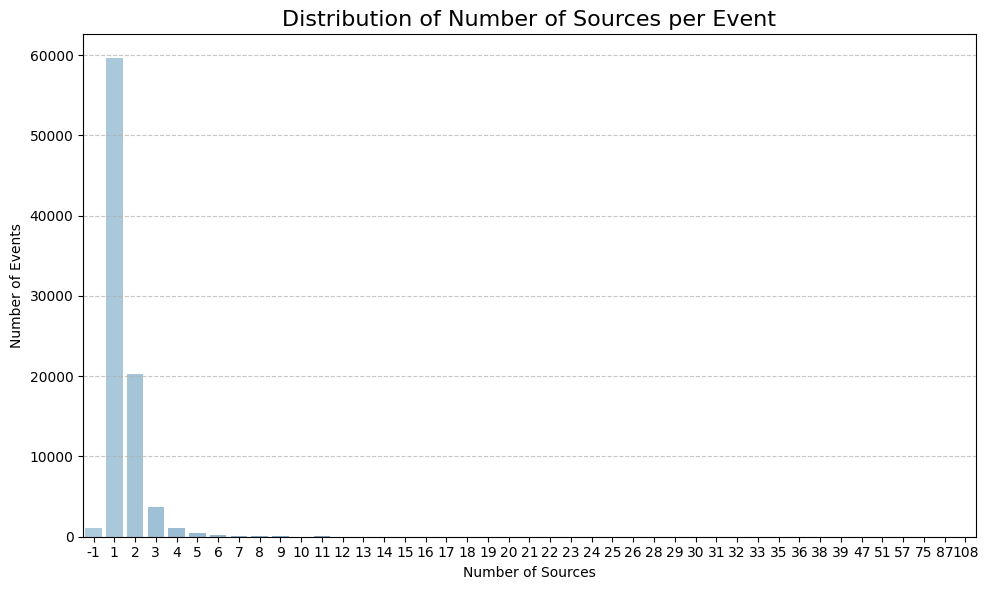

In [72]:
# --- Additional Analysis: Distribution of Number of Sources per Event ---
print("\n\n--- Distribution of Number of Sources per Event ---")

# Count how many events have each number_of_sources
source_count_distribution = df['number_of_sources'].value_counts().sort_index()

# Convert to DataFrame for clarity
source_count_df = source_count_distribution.reset_index()
source_count_df.columns = ['number_of_sources', 'event_count']

# Print table
print(tabulate(source_count_df, headers=['Number of Sources', 'Event Count'], tablefmt='psql', showindex=False))

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=source_count_df, x='number_of_sources', y='event_count', palette='Blues_d')
plt.title('Distribution of Number of Sources per Event', fontsize=16)
plt.xlabel('Number of Sources')
plt.ylabel('Number of Events')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [73]:
import pandas as pd
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    # Sample data to simulate the scenario
    data_for_example = {
        'id': range(20),
        'conflict_name': ['Syria: Government']*5 + ['Iraq: Government']*8 + ['Conflict C']*4 + ['Conflict D']*3,
        'year': [2004, 2005, 2006, 2004, 2007] + # Syria: Government, starts 2004, continues
                [2008, 2008, 2009, 2010, 2011, 2011, 2012, 2012] + # Iraq: Government, starts 2008, continues
                [2004, 2004, 2004, 2004] + # Conflict C, starts 2004, does not continue
                [2009, 2010, 2011], # Conflict D, starts 2009
        'source_office': ['Source A', 'Source B', 'Source A', 'Source C', 'Source B'] +
                         ['Reuters', 'AP', 'Reuters', 'AFP', 'AP', 'Reuters', 'AP', 'AFP'] +
                         ['Source X', 'Source Y', 'Source X', 'Source Y'] +
                         ['Source Z', 'Source Z', 'Source Z']
    }
    df = pd.DataFrame(data_for_example)
    df['conflict_name'] = df['conflict_name'].astype('category')
    df['year'] = df['year'].astype('int16')
    df['source_office'] = df['source_office'].astype('category')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Analysis: Track Conflicts Starting in 2004 & 2008 and their Sources ---
required_cols = ['conflict_name', 'year', 'source_office']
if all(col in df.columns for col in required_cols):
    print("\n\n--- Analysis: Tracking long-running conflicts starting in 2004 and 2008 ---")

    # 1. Calculate start year, end year, and active years for each conflict
    conflict_summary = df.groupby('conflict_name')['year'].agg(
        start_year='min',
        end_year='max',
        active_years_count='nunique'
    ).reset_index()

    # 2. Filter for conflicts that started in the target years AND continued
    target_start_years = [2004, 2008]
    long_running_conflicts_df = conflict_summary[
        (conflict_summary['start_year'].isin(target_start_years)) &
        (conflict_summary['active_years_count'] > 1) # Ensure it lasted more than one year
    ].copy()

    if long_running_conflicts_df.empty:
        print(f"\nNo conflicts found that started in {target_start_years} and continued for more than one year.")
    else:
        # 3. Find all unique sources for these specific conflicts
        conflict_names_to_investigate = long_running_conflicts_df['conflict_name'].tolist()
        df_filtered_for_sources = df[df['conflict_name'].isin(conflict_names_to_investigate)]

        sources_per_conflict = df_filtered_for_sources.groupby('conflict_name')['source_office'].apply(
            lambda x: sorted(list(x.dropna().unique()))
        ).reset_index(name='Documenting Sources')

        # 4. Merge the summary data with the sources data
        final_report_df = pd.merge(long_running_conflicts_df, sources_per_conflict, on='conflict_name', how='left')

        # 5. Display the results for each target year
        for year_val in target_start_years:
            print(f"\n\n--- Conflicts that Started in {year_val} and Continued ---")
            report_for_year = final_report_df[final_report_df['start_year'] == year_val]

            if not report_for_year.empty:
                # Format the list of sources into a readable string for tabulate
                display_table = report_for_year.copy()
                # To avoid very long strings in the table, we can limit the number of sources shown
                display_table['Documenting Sources'] = display_table['Documenting Sources'].apply(
                    lambda sources: ', '.join(sources[:5]) + ('...' if len(sources) > 5 else '') if isinstance(sources, list) else 'N/A'
                )

                # Rename columns for the final table display
                display_table.columns = [
                    'Conflict Name', 'Start Year', 'End Year (in data)',
                    'Number of Active Years', 'Documenting Sources (Sample)'
                ]

                print(tabulate(display_table, headers='keys', tablefmt='psql', showindex=False))
            else:
                print(f"No conflicts found that started in {year_val} and continued for more than one year.")

else:
    print(f"\nOne or more required columns not found. Needed: {required_cols}")

Using existing DataFrame 'df'.


--- Analysis: Tracking long-running conflicts starting in 2004 and 2008 ---


--- Conflicts that Started in 2004 and Continued ---
+---------------------------------+--------------+----------------------+--------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Conflict Name                   

/tmp/ipython-input-73-1133079116.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conflict_summary = df.groupby('conflict_name')['year'].agg(
/tmp/ipython-input-73-1133079116.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sources_per_conflict = df_filtered_for_sources.groupby('conflict_name')['source_office'].apply(


Using existing DataFrame 'df'.


--- Analysis: Tracking Conflicts That Started Before 2001 ---
Found 3 conflicts that started before 2001: ['Government of Syria - Civilians', 'Israel: Palestine', 'Israel: Southern Lebanon']


/tmp/ipython-input-74-338730499.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conflict_start_years = df.groupby('conflict_name')['year'].min().reset_index()
/tmp/ipython-input-74-338730499.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  events_long_running_per_year = df_long_running.groupby(['year', 'conflict_name']).size().reset_index(name='Number of Events')
/tmp/ipython-input-74-338730499.py:80: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


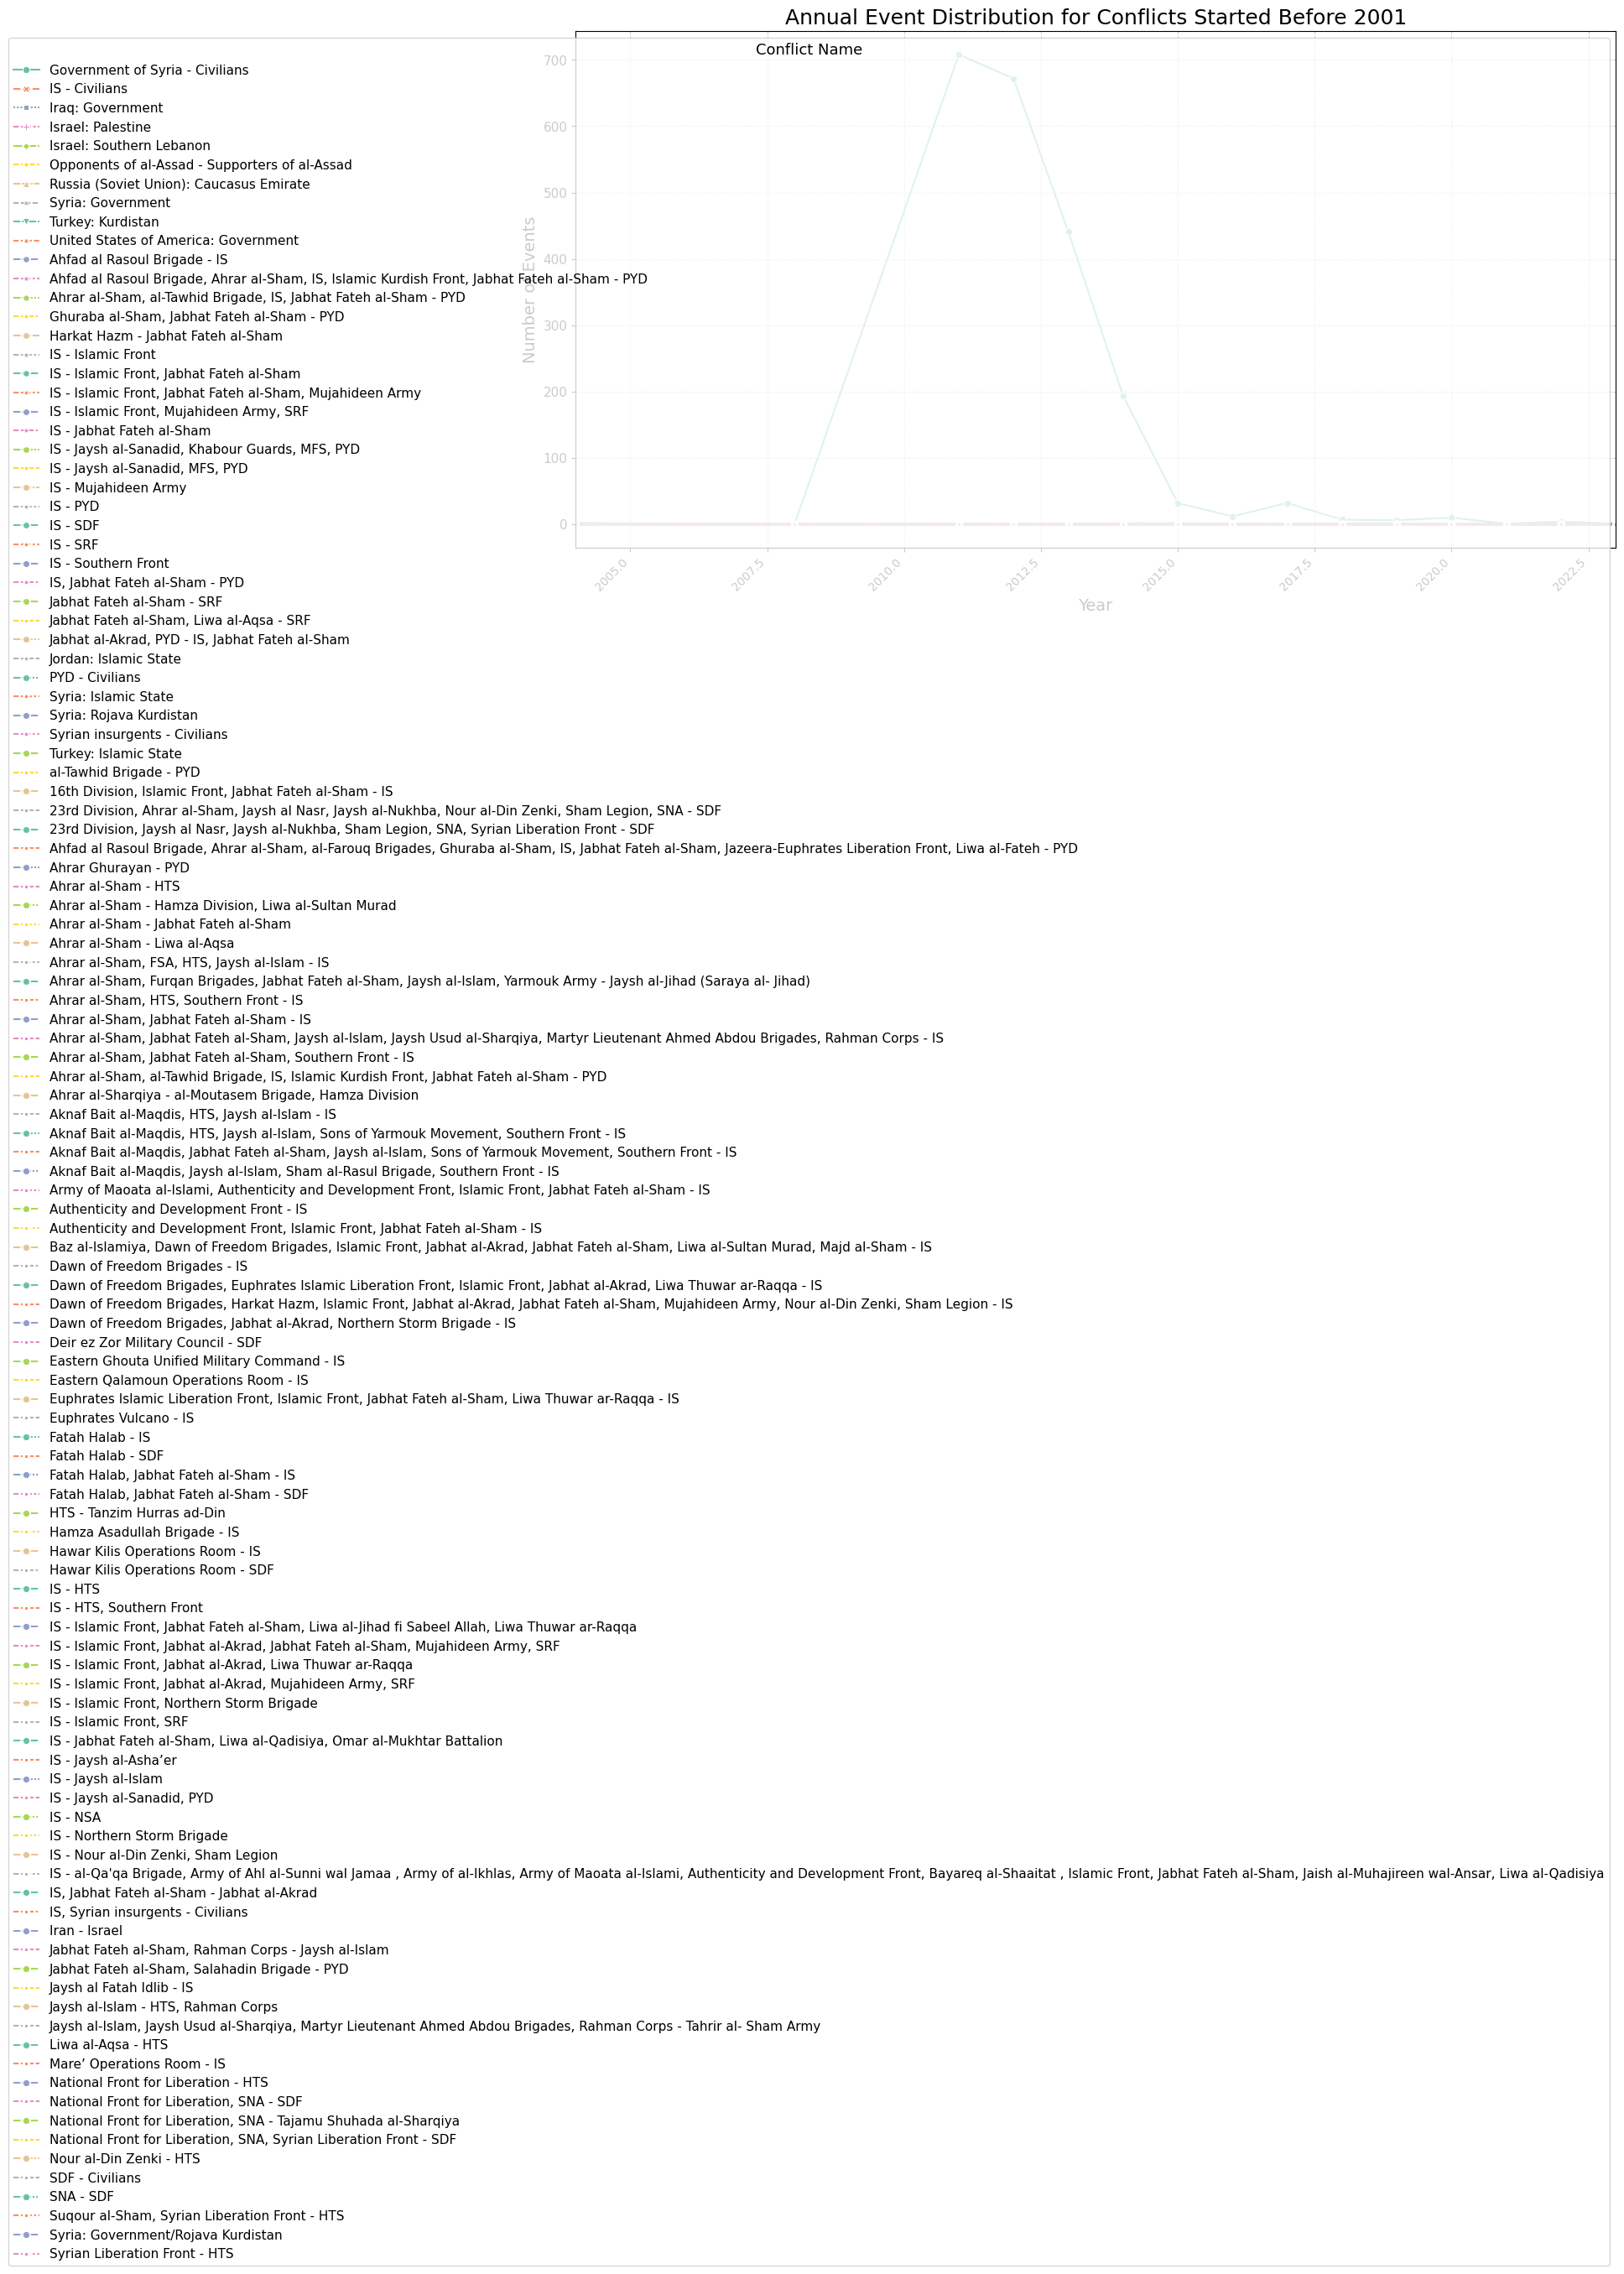

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    # Sample data with conflicts starting before and after 2001
    years_c1 = np.random.choice(range(1998, 2015), size=50) # Starts before 2001, continues after
    years_c2 = np.random.choice(range(2005, 2018), size=40) # Starts after 2001
    years_c3 = np.random.choice(range(1995, 2022), size=60) # Starts before 2001, continues after
    all_years = np.concatenate([years_c1, years_c2, years_c3])

    conflict_names_sample = ['Conflict Pre-2001 (A)']*50 + ['Conflict Post-2001 (B)']*40 + ['Conflict Pre-2001 (C)']*60

    data_for_example = {
        'id': range(len(all_years)),
        'conflict_name': conflict_names_sample,
        'year': all_years
    }
    df = pd.DataFrame(data_for_example)
    df['conflict_name'] = df['conflict_name'].astype('category')
    df['year'] = df['year'].astype('int16')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Analysis: Track Conflicts starting before 2001 until 2023 ---
if 'conflict_name' in df.columns and 'year' in df.columns:
    print("\n\n--- Analysis: Tracking Conflicts That Started Before 2001 ---")

    # 1. Calculate start year for each conflict
    conflict_start_years = df.groupby('conflict_name')['year'].min().reset_index()
    conflict_start_years.columns = ['conflict_name', 'start_year']

    # 2. Filter for conflicts that started before 2001
    pre_2001_conflicts = conflict_start_years[conflict_start_years['start_year'] < 2011]

    if pre_2001_conflicts.empty:
        print("No conflicts found in the dataset that started before 2001.")
    else:
        pre_2001_conflict_names = pre_2001_conflicts['conflict_name'].tolist()
        print(f"Found {len(pre_2001_conflict_names)} conflicts that started before 2001: {pre_2001_conflict_names}")

        # 3. Filter the main DataFrame for these long-running conflicts
        df_long_running = df[df['conflict_name'].isin(pre_2001_conflict_names)]

        # 4. Calculate event counts per year for each of these conflicts
        events_long_running_per_year = df_long_running.groupby(['year', 'conflict_name']).size().reset_index(name='Number of Events')

        # 5. Create a multi-line chart to compare the trends until 2023
        plt.figure(figsize=(16, 8))

        lineplot = sns.lineplot(
            x='year',
            y='Number of Events',
            hue='conflict_name',      # Different color for each conflict
            style='conflict_name',     # Different line style for each conflict
            markers=True,              # Add markers to each data point
            data=events_long_running_per_year,
            palette='Set2'           # A palette suitable for distinct categories
        )

        # Set chart properties
        plt.title('Annual Event Distribution for Conflicts Started Before 2001', fontsize=18)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Number of Events', fontsize=14)

        # Set x-axis limits to go up to 2023
        min_year_in_data = df['year'].min()
        plt.xlim(min_year_in_data, 2023)

        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.yticks(fontsize=11)

        plt.legend(title='Conflict Name', fontsize=11, title_fontsize=13)
        plt.grid(axis='both', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

else:
    print("\nRequired columns 'conflict_name' or 'year' not found for this analysis.")

Using existing DataFrame 'df'.


--- Tracking Specific Conflict Types (based on your sample) Over Time ---

Table: Annual Event Counts for Tracked Conflict Types:
+--------+--------------------+----------------------------+
|   year |   Israel as Side A |   Syrian Gov vs. Civilians |
|--------+--------------------+----------------------------|
|   2004 |                  1 |                          2 |
|   2008 |                  1 |                          0 |
|   2011 |                  0 |                        708 |
|   2012 |                  0 |                        672 |
|   2013 |                  0 |                        441 |
|   2014 |                  2 |                        194 |
|   2015 |                  2 |                         32 |
|   2016 |                  1 |                         12 |
|   2017 |                  0 |                         32 |
|   2018 |                  0 |                          7 |
|   2019 |                  2 |             

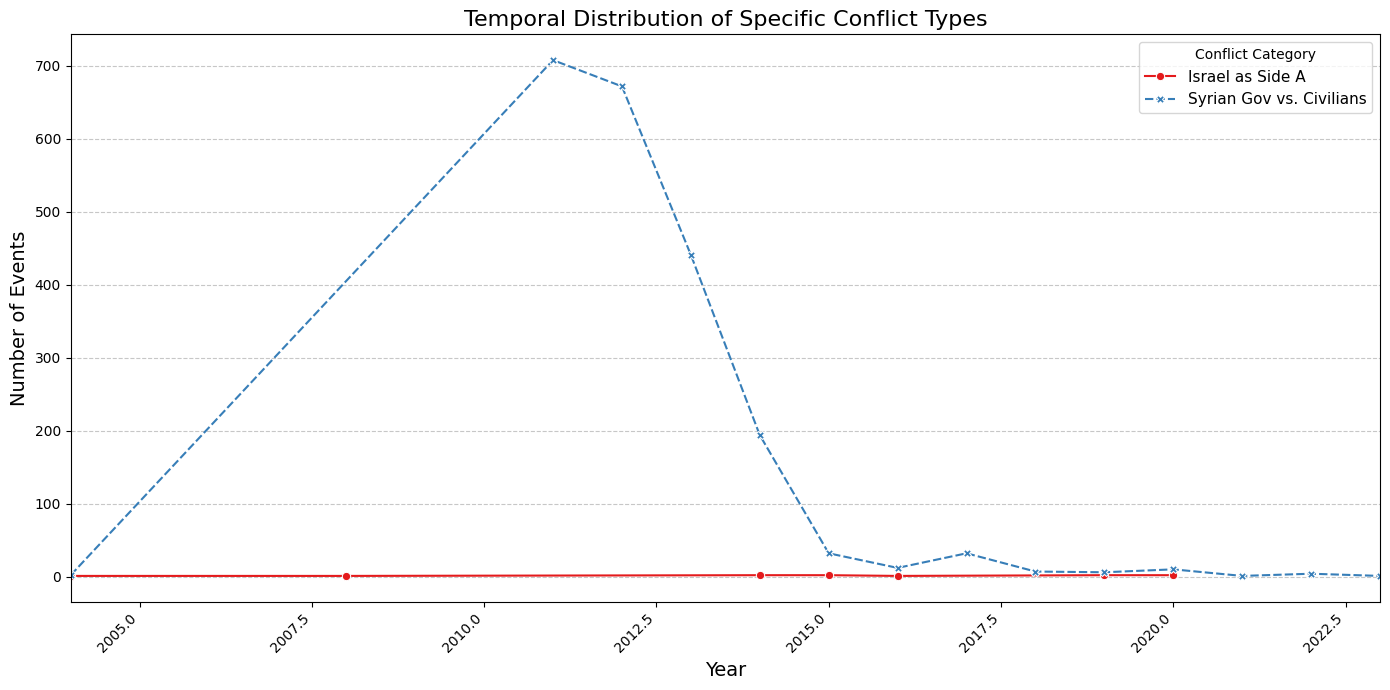

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    # Sample data to simulate the scenario
    years = np.random.choice(range(2000, 2023), size=500)
    side_a_sample = []
    side_b_sample = []
    for year in years:
        if 2004 <= year <= 2010:
            # Simulate Israel-related events
            side_a_sample.append('Government of Israel')
            side_b_sample.append(np.random.choice(['Hamas', 'Hezbollah']))
        elif 2011 <= year <= 2018:
            # Simulate Syrian Gov vs Civilians
            side_a_sample.append('Government of Syria')
            side_b_sample.append(np.random.choice(['Civilians', 'Rebels']))
        else:
            side_a_sample.append('Other Actor A')
            side_b_sample.append('Other Actor B')

    data_for_example = {
        'id': range(len(years)),
        'year': years,
        'side_a': side_a_sample,
        'side_b': side_b_sample,
        'adm_1': ['Damascus governorate', 'Aleppo governorate'] * (len(years)//2)
    }
    df = pd.DataFrame(data_for_example)
    for col in ['side_a', 'side_b', 'adm_1']:
        df[col] = df[col].astype('category')
    df['year'] = df['year'].astype('int16')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Tracking Specific Conflict Types Over Time ---
required_cols = ['year', 'side_a', 'side_b']
if all(col in df.columns for col in required_cols):
    print("\n\n--- Tracking Specific Conflict Types (based on your sample) Over Time ---")

    # 1. Define conditions to identify the types of conflicts from your sample
    # Using .astype(str) to ensure .str accessor works on category type as well
    condition1 = (df['side_a'].astype(str) == 'Government of Israel')
    condition2 = (
        (df['side_a'].astype(str) == 'Government of Syria') &
        (df['side_b'].astype(str).str.contains("Civilians", na=False))
    )

    # 2. Create a new column to categorize the events
    # We use np.select to assign categories based on conditions
    conditions = [condition1, condition2]
    choices = ['Israel as Side A', 'Syrian Gov vs. Civilians']

    # Create the new column, defaulting to 'Other' if no condition is met
    df['conflict_category'] = np.select(conditions, choices, default='Other')

    # 3. Filter for only the categories of interest
    df_filtered_for_tracking = df[df['conflict_category'].isin(choices)].copy()

    if df_filtered_for_tracking.empty:
        print("No events found matching the specified conflict types ('Israel as Side A' or 'Syrian Gov vs. Civilians').")
    else:
        # 4. Calculate event counts per year for each category
        events_to_track_per_year = df_filtered_for_tracking.groupby(['year', 'conflict_category']).size().reset_index(name='Number of Events')

        # 5. Display the data in a pivoted table (optional but good for review)
        try:
            pivoted_tracked_events = events_to_track_per_year.pivot(index='year', columns='conflict_category', values='Number of Events').fillna(0).astype(int)
            print("\nTable: Annual Event Counts for Tracked Conflict Types:")
            print(tabulate(pivoted_tracked_events, headers='keys', tablefmt='psql'))
        except Exception as e:
            print(f"Could not pivot data for table display. Raw data:\n{events_to_track_per_year}")

        # 6. Create a multi-line chart to show the trends
        plt.figure(figsize=(14, 7))
        sns.lineplot(
            x='year',
            y='Number of Events',
            hue='conflict_category',
            style='conflict_category',
            markers=True,
            dashes=True,
            data=events_to_track_per_year,
            palette='Set1'
        )

        plt.title('Temporal Distribution of Specific Conflict Types', fontsize=16)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Number of Events', fontsize=14)

        min_year_in_data = df_filtered_for_tracking['year'].min()
        max_year_in_data = df_filtered_for_tracking['year'].max()
        plt.xlim(min_year_in_data, max_year_in_data) # Set x-axis limits to the range of the filtered data

        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend(title='Conflict Category', fontsize=11)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

else:
    print(f"\nOne or more required columns not found. Needed: {required_cols}")



--- Analysis: Sources, Articles, and Headlines over the Years ---

Table: Source-related Statistics per Year
+--------+--------------+-----------------------+----------------------+------------------------+
|   year |   num_events |   num_unique_articles |   num_unique_offices |   num_unique_headlines |
|--------+--------------+-----------------------+----------------------+------------------------|
|   2004 |            3 |                     2 |                    2 |                      2 |
|   2008 |            1 |                     1 |                    1 |                      1 |
|   2011 |          954 |                   604 |                   51 |                    417 |
|   2012 |        11825 |                 10326 |                  582 |                   9830 |
|   2013 |        18649 |                 13882 |                  129 |                  13421 |
|   2014 |        16696 |                  8505 |                  364 |                   8319 |
|   201

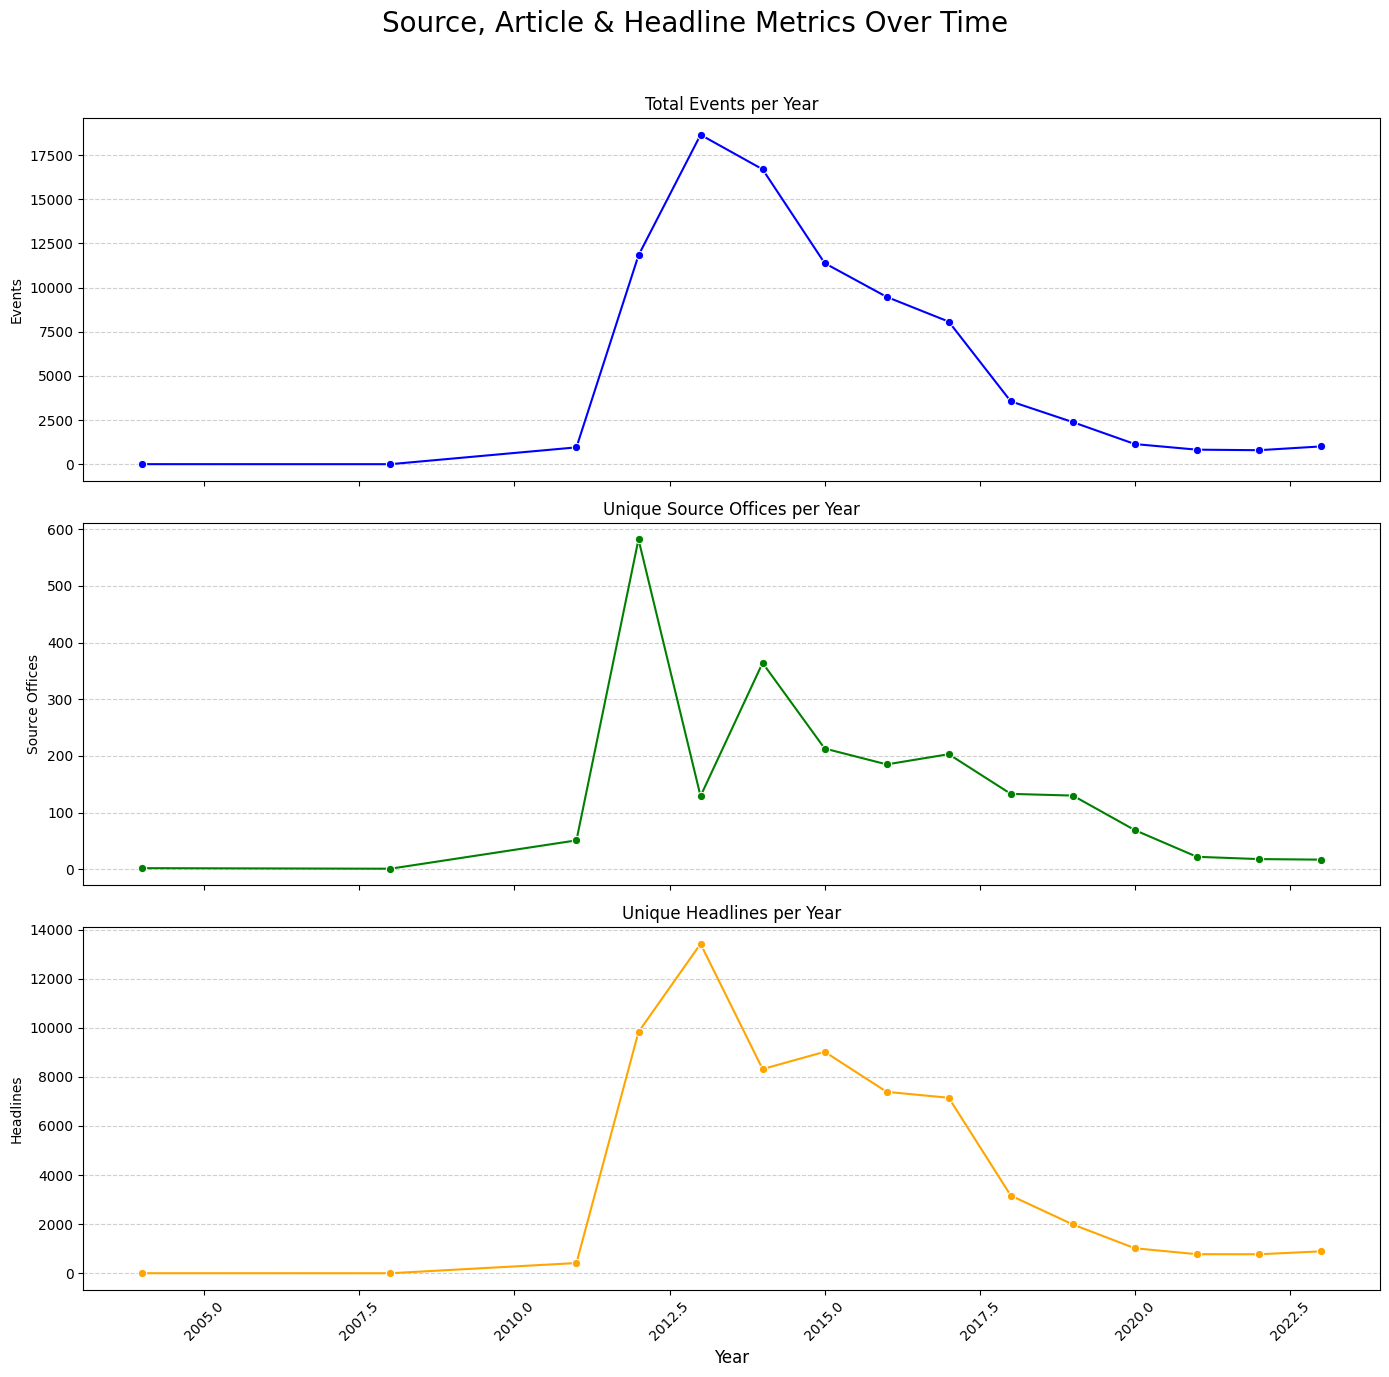

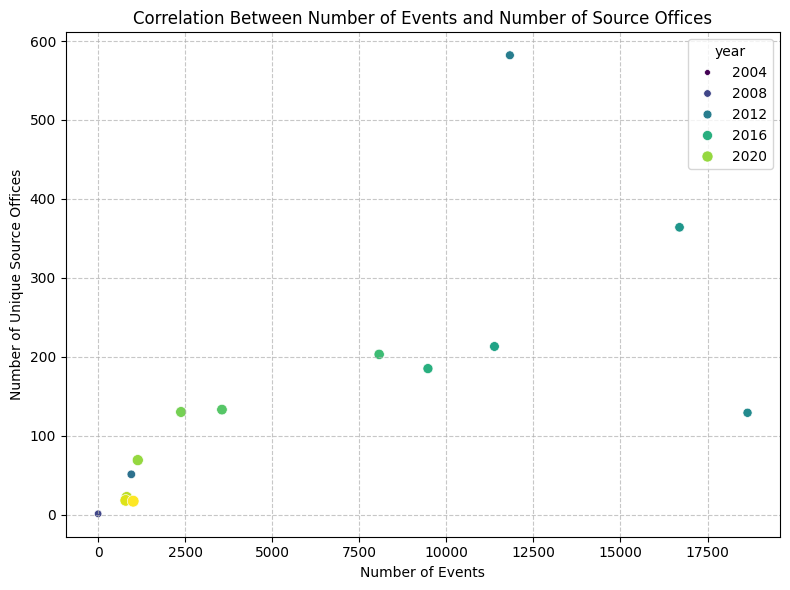


🔍 Correlation between number of events and number of source offices: 0.70


In [76]:
# Ensure required columns are present
required_cols_ext = ['year', 'id', 'source_office', 'source_article', 'source_headline']
if all(col in df.columns for col in required_cols_ext):
    print("\n\n--- Analysis: Sources, Articles, and Headlines over the Years ---")

    # Clean up possible NaNs
    df['source_office'] = df['source_office'].astype(str).fillna('Unknown')
    df['source_article'] = df['source_article'].astype(str).fillna('Unknown')
    df['source_headline'] = df['source_headline'].astype(str).fillna('Unknown')

    # Group by year and compute the statistics
    yearly_source_stats = df.groupby('year').agg(
        num_events=('id', 'count'),
        num_unique_articles=('source_article', 'nunique'),
        num_unique_offices=('source_office', 'nunique'),
        num_unique_headlines=('source_headline', 'nunique'),
    ).reset_index()

    # Print as table
    print("\nTable: Source-related Statistics per Year")
    print(tabulate(yearly_source_stats, headers='keys', tablefmt='psql', showindex=False))

    # --- Visualization ---
    fig, axes = plt.subplots(3, 1, figsize=(14, 14), sharex=True)
    fig.suptitle('Source, Article & Headline Metrics Over Time', fontsize=20)

    # Events
    sns.lineplot(ax=axes[0], data=yearly_source_stats, x='year', y='num_events', marker='o', color='blue')
    axes[0].set_title('Total Events per Year')
    axes[0].set_ylabel('Events')
    axes[0].grid(axis='y', linestyle='--', alpha=0.6)

    # Unique Source Offices
    sns.lineplot(ax=axes[1], data=yearly_source_stats, x='year', y='num_unique_offices', marker='o', color='green')
    axes[1].set_title('Unique Source Offices per Year')
    axes[1].set_ylabel('Source Offices')
    axes[1].grid(axis='y', linestyle='--', alpha=0.6)

    # Unique Headlines
    sns.lineplot(ax=axes[2], data=yearly_source_stats, x='year', y='num_unique_headlines', marker='o', color='orange')
    axes[2].set_title('Unique Headlines per Year')
    axes[2].set_ylabel('Headlines')
    axes[2].grid(axis='y', linestyle='--', alpha=0.6)

    plt.xlabel('Year', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # --- Correlation: Events vs. Sources ---
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=yearly_source_stats, x='num_events', y='num_unique_offices', size='year', hue='year', palette='viridis', legend='brief')
    plt.title('Correlation Between Number of Events and Number of Source Offices')
    plt.xlabel('Number of Events')
    plt.ylabel('Number of Unique Source Offices')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Correlation coefficient
    correlation = yearly_source_stats['num_events'].corr(yearly_source_stats['num_unique_offices'])
    print(f"\n🔍 Correlation between number of events and number of source offices: {correlation:.2f}")

else:
    print(f"Missing one or more of the required columns: {required_cols_ext}")



🔍 Years with total event increase but decrease in a type of violence:
    year type_of_violence  event_diff  violence_diff
11  2012                3     10871.0           -9.0
14  2013                3      6824.0         -162.0
44  2023                3       214.0          -14.0


/tmp/ipython-input-77-3881464573.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  violence_yearly = df.groupby(['year', 'type_of_violence']).agg(violence_events=('id', 'count')).reset_index()
/tmp/ipython-input-77-3881464573.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  violence_yearly['violence_diff'] = violence_yearly.groupby('type_of_violence')['violence_events'].diff()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


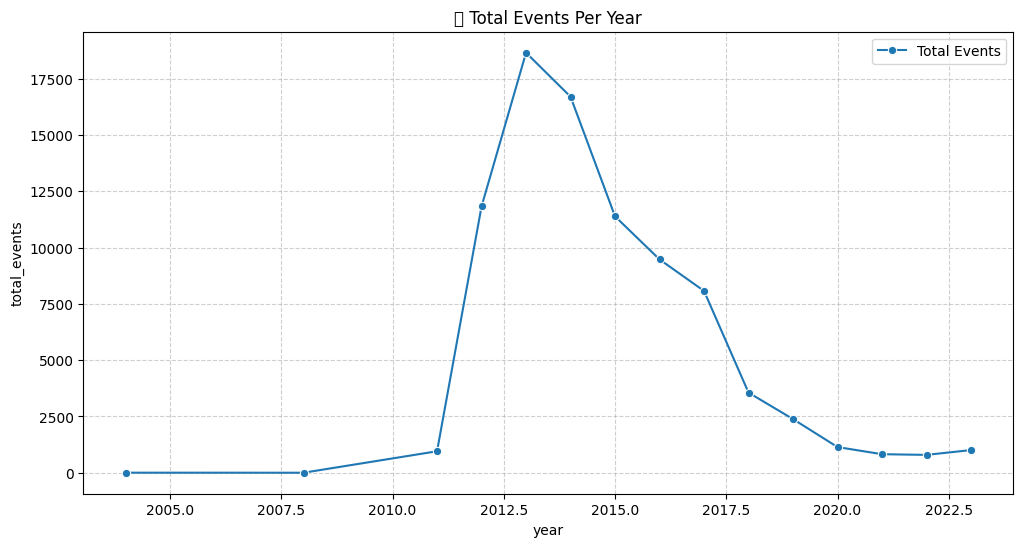

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


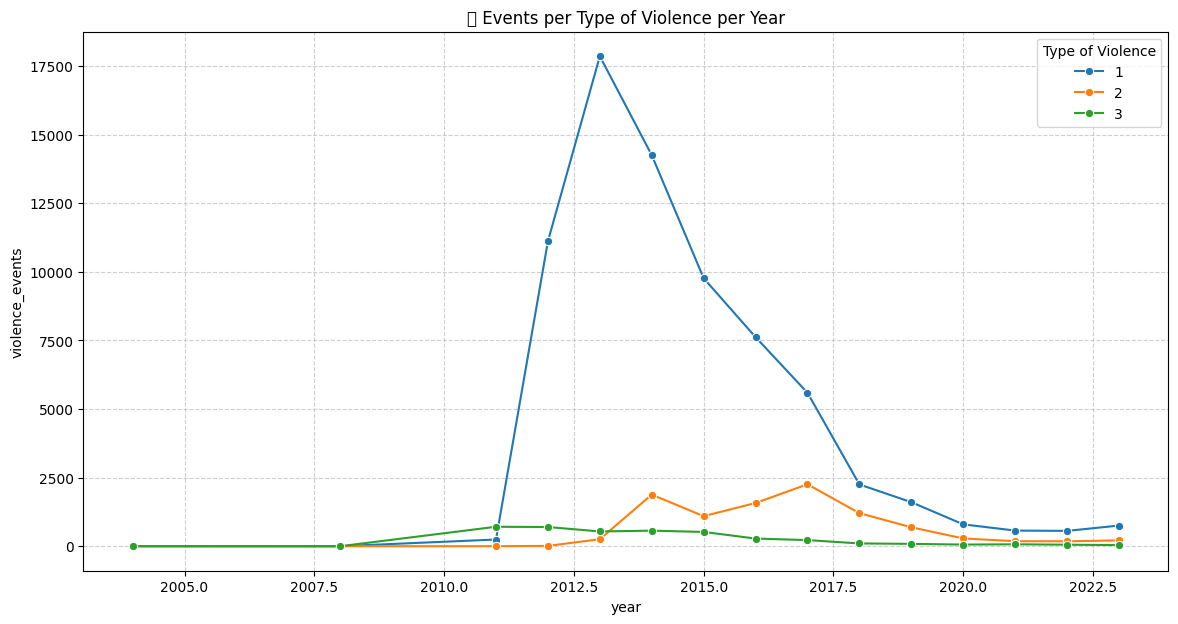

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# تحقق من الأعمدة
required_cols = ['year', 'type_of_violence', 'id']
missing = [col for col in required_cols if col not in df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}")

# تأكد من الأنواع
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')
df['type_of_violence'] = df['type_of_violence'].astype('category')

# إجمالي الحوادث لكل سنة
events_per_year = df.groupby('year').agg(total_events=('id', 'count')).reset_index()

# الحوادث لكل نوع عنف في كل سنة
violence_yearly = df.groupby(['year', 'type_of_violence']).agg(violence_events=('id', 'count')).reset_index()

# نحسب التغير من سنة إلى سنة
events_per_year['event_diff'] = events_per_year['total_events'].diff()
violence_yearly['violence_diff'] = violence_yearly.groupby('type_of_violence')['violence_events'].diff()

# --- البحث عن السنوات التي حصل فيها ارتفاع بالحوادث الكلية مع انخفاض بنوع عنف ---
merged = violence_yearly.merge(events_per_year, on='year')
condition = (merged['event_diff'] > 0) & (merged['violence_diff'] < 0)

# النتائج المشبوهة
suspicious = merged[condition].sort_values(by='event_diff', ascending=False)

print("\n🔍 Years with total event increase but decrease in a type of violence:")
print(suspicious[['year', 'type_of_violence', 'event_diff', 'violence_diff']])

# --- رسومات توضيحية ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=events_per_year, x='year', y='total_events', marker='o', label='Total Events')
plt.title("📈 Total Events Per Year")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=violence_yearly, x='year', y='violence_events', hue='type_of_violence', marker='o')
plt.title("📉 Events per Type of Violence per Year")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Type of Violence")
plt.show()


Using existing DataFrame 'df'.

--- Preparing Data and Overall Casualty Comparison ---
Created 'deaths_military' column as sum of 'deaths_a' and 'deaths_b'.

Table: Overall Comparison of Casualty Types:
+-----------------+---------------+
| Casualty Type   |   Total Count |
|-----------------+---------------|
| Civilian Deaths |        122536 |
| Military Deaths |        269522 |
+-----------------+---------------+


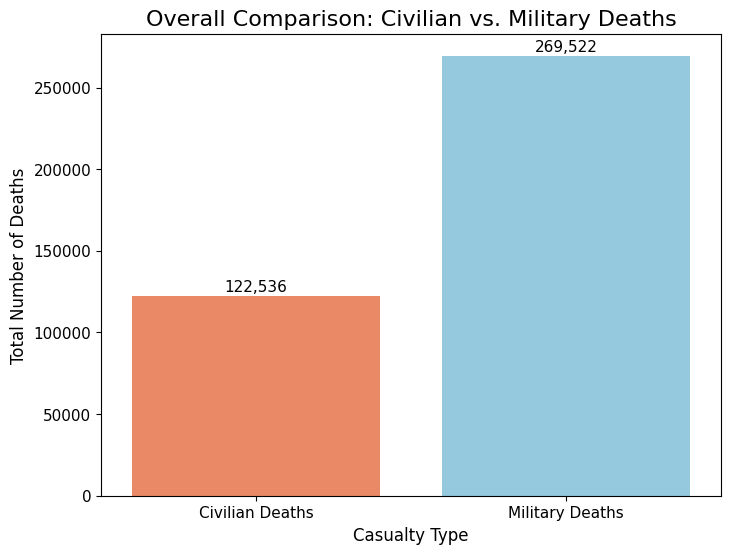

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    data_for_example = {
        'id': range(100),
        'conflict_name': np.random.choice(['Conflict A', 'Conflict B', 'Conflict C'], size=100),
        'dyad_name': np.random.choice(['Gov - Rbl A', 'Gov - Rbl B', 'Rbl A - Rbl B'], size=100),
        'adm_1': np.random.choice(['Aleppo', 'Idlib', 'Homs'], size=100),
        'deaths_a': np.random.randint(0, 10, size=100),
        'deaths_b': np.random.randint(0, 10, size=100),
        'deaths_civilians': np.random.randint(0, 20, size=100)
    }
    df = pd.DataFrame(data_for_example)
    for col in ['deaths_a', 'deaths_b', 'deaths_civilians']:
        df[col] = df[col].astype('int16')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- 1. Data Preparation and Overall Comparison ---
if all(col in df.columns for col in ['deaths_a', 'deaths_b', 'deaths_civilians']):
    print("\n--- Preparing Data and Overall Casualty Comparison ---")

    # 1. Create 'deaths_military' column
    # Fill NaN with 0 before summing
    df['deaths_a'] = df['deaths_a'].fillna(0)
    df['deaths_b'] = df['deaths_b'].fillna(0)
    df['deaths_military'] = df['deaths_a'] + df['deaths_b']
    df['deaths_civilians'] = df['deaths_civilians'].fillna(0)
    print("Created 'deaths_military' column as sum of 'deaths_a' and 'deaths_b'.")

    # 2. Calculate overall totals
    total_civilian_deaths = df['deaths_civilians'].sum()
    total_military_deaths = df['deaths_military'].sum()

    overall_comparison_data = {
        'Casualty Type': ['Civilian Deaths', 'Military Deaths'],
        'Total Count': [total_civilian_deaths, total_military_deaths]
    }
    df_overall = pd.DataFrame(overall_comparison_data)

    print("\nTable: Overall Comparison of Casualty Types:")
    print(tabulate(df_overall, headers='keys', tablefmt='psql', showindex=False))

    # 3. Create Bar Chart for Overall Comparison
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Casualty Type', y='Total Count', data=df_overall, palette=['coral', 'skyblue'], hue='Casualty Type', legend=False)
    plt.title('Overall Comparison: Civilian vs. Military Deaths', fontsize=16)
    plt.ylabel('Total Number of Deaths', fontsize=12)
    plt.xlabel('Casualty Type', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    # Add labels on top of bars
    for index, row in df_overall.iterrows():
        plt.text(index, row['Total Count'] + (df_overall['Total Count'].max() * 0.01), f"{row['Total Count']:,}",
                 color='black', ha="center", fontsize=11)
    plt.show()

else:
    print("\nOne or more required columns ('deaths_a', 'deaths_b', 'deaths_civilians') not found.")



--- 2. Analysis by Governorate (adm_1) ---

Table: Top 15 Governorates by Total Casualties (Civilian vs. Military):
+-------------------------+-------------------+-------------------+----------------+
| Governorate             |   Civilian Deaths |   Military Deaths |   Total Deaths |
|-------------------------+-------------------+-------------------+----------------|
| Hamah governorate       |              7491 |             99875 |         107366 |
| Aleppo governorate      |             29039 |             41451 |          70490 |
| Rif Dimashq governorate |             23635 |             27020 |          50655 |
| Idlib governorate       |             16114 |             16436 |          32550 |
| Deir ez Zor governorate |             11889 |             17938 |          29827 |
| Homs governorate        |             11249 |             17622 |          28871 |
| Daraa governorate       |              7581 |             13046 |          20627 |
| Ar Raqqah governorate   |     

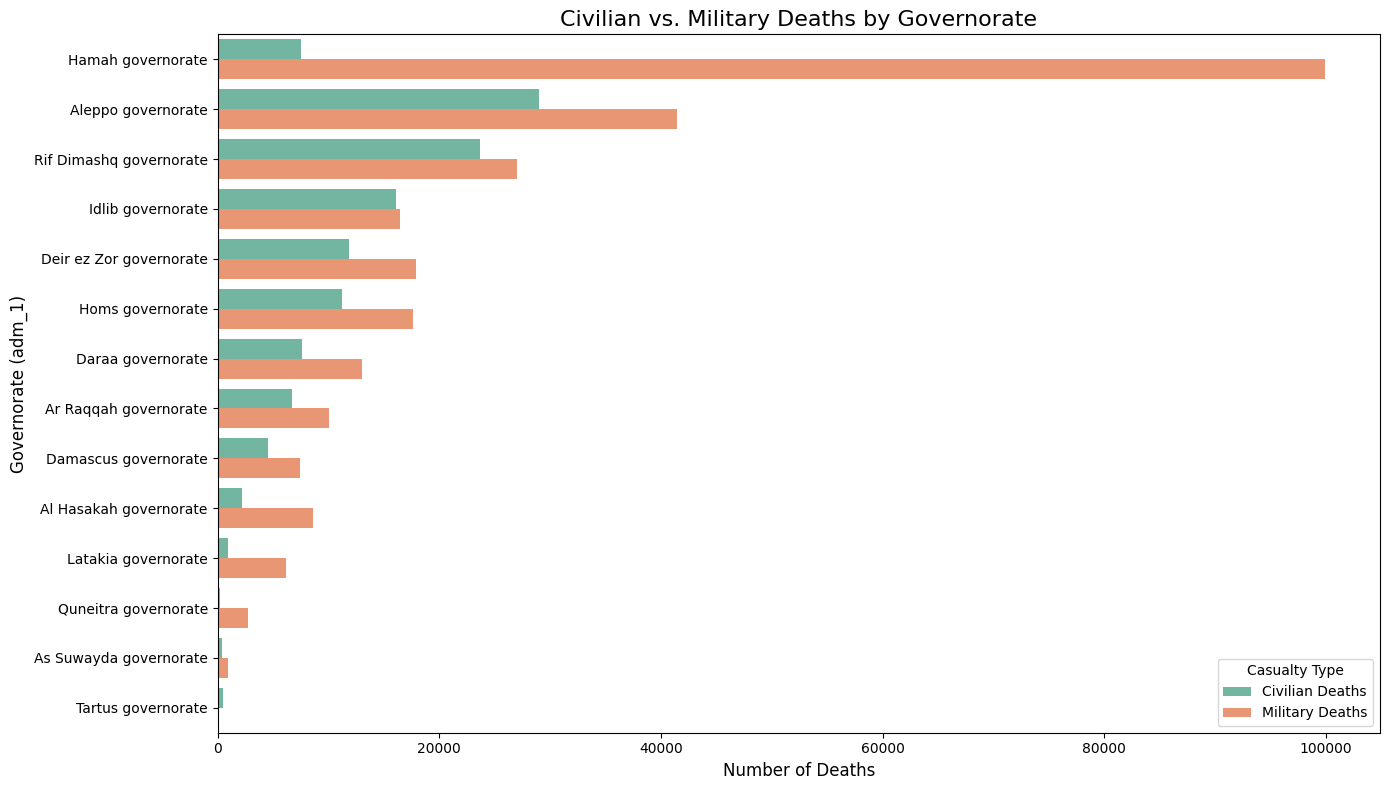

In [79]:
# --- 2. Analysis by Governorate (adm_1) ---
if 'adm_1' in df.columns and 'deaths_military' in df.columns:
    print("\n\n--- 2. Analysis by Governorate (adm_1) ---")

    # Group by adm_1 and sum casualties
    casualties_by_adm1 = df.groupby('adm_1')[['deaths_civilians', 'deaths_military']].sum()
    # Calculate total deaths for sorting
    casualties_by_adm1['total_deaths'] = casualties_by_adm1['deaths_civilians'] + casualties_by_adm1['deaths_military']
    casualties_by_adm1 = casualties_by_adm1.sort_values(by='total_deaths', ascending=False).reset_index()

    # Display table for top N governorates
    num_to_display = 15
    print(f"\nTable: Top {num_to_display} Governorates by Total Casualties (Civilian vs. Military):")
    display_table_adm1 = casualties_by_adm1.head(num_to_display).copy()
    display_table_adm1.columns = ['Governorate', 'Civilian Deaths', 'Military Deaths', 'Total Deaths']
    print(tabulate(display_table_adm1, headers='keys', tablefmt='psql', showindex=False))

    # Prepare data for grouped bar chart
    df_adm1_melted = display_table_adm1.melt(
        id_vars='Governorate',
        value_vars=['Civilian Deaths', 'Military Deaths'],
        var_name='Casualty Type',
        value_name='Number of Deaths'
    )

    # Visualization: Grouped Bar Chart
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Number of Deaths', y='Governorate', hue='Casualty Type', data=df_adm1_melted, palette="Set2")
    plt.title('Civilian vs. Military Deaths by Governorate', fontsize=16)
    plt.xlabel('Number of Deaths', fontsize=12)
    plt.ylabel('Governorate (adm_1)', fontsize=12)
    plt.legend(title='Casualty Type')
    plt.tight_layout()
    plt.show()
else:
    print("\nColumns 'adm_1' or created 'deaths_military' not found.")



--- 3. Analysis by Conflict Name ---

Table: Top 15 Conflicts by Total Casualties (Civilian vs. Military):
+---------------------------------------------------------------------------------------------------------+-------------------+-------------------+----------------+
| Conflict Name                                                                                           |   Civilian Deaths |   Military Deaths |   Total Deaths |
|---------------------------------------------------------------------------------------------------------+-------------------+-------------------+----------------|
| Syria: Government                                                                                       |             84019 |            190249 |         274268 |
| Syria: Islamic State                                                                                    |              9890 |             37647 |          47537 |
| IS - SDF                                                        

/tmp/ipython-input-80-71340486.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  casualties_by_conflict = df.groupby('conflict_name')[['deaths_civilians', 'deaths_military']].sum()


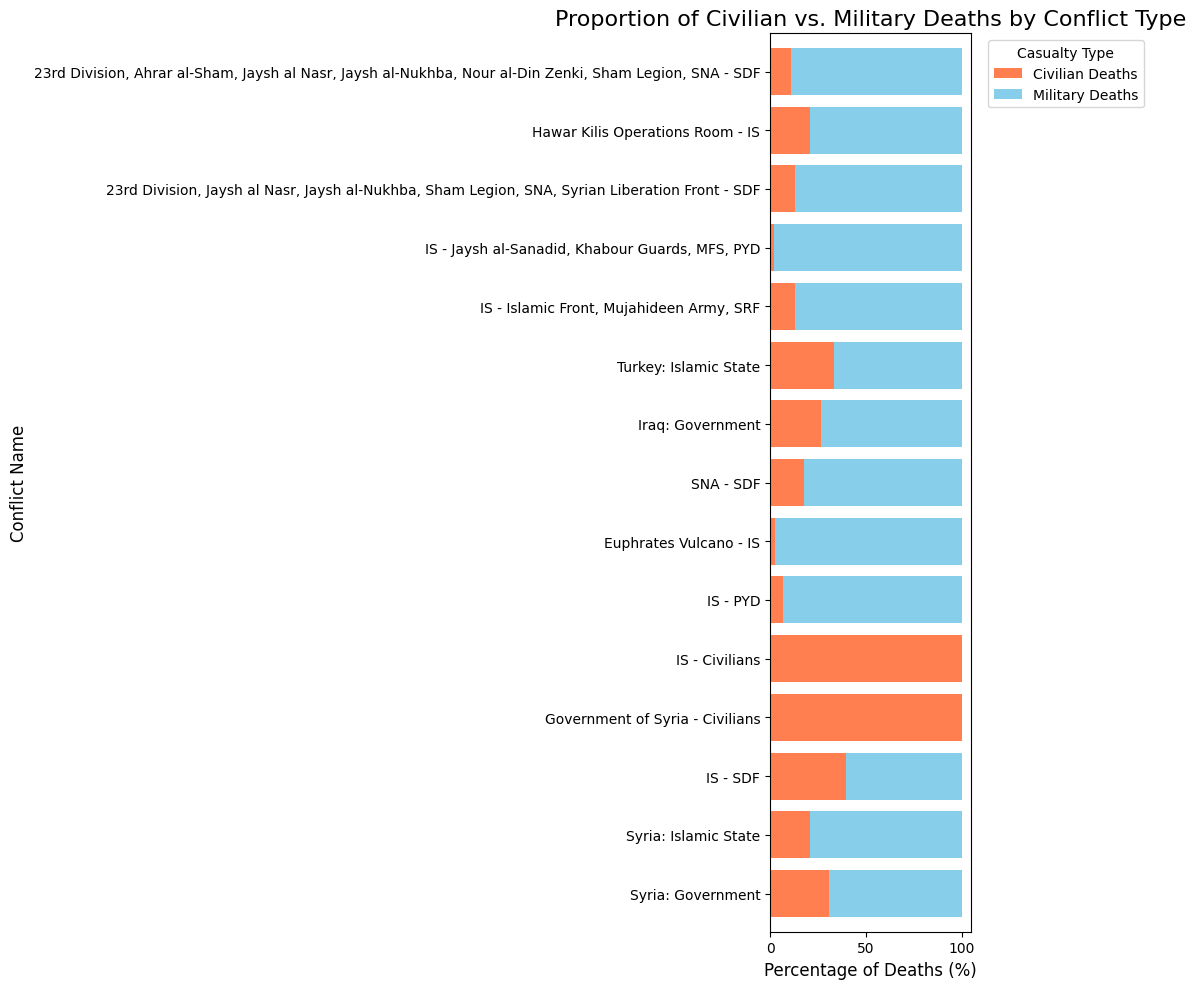

In [80]:
# --- 3. Analysis by Conflict Name ---
if 'conflict_name' in df.columns and 'deaths_military' in df.columns:
    print("\n\n--- 3. Analysis by Conflict Name ---")

    casualties_by_conflict = df.groupby('conflict_name')[['deaths_civilians', 'deaths_military']].sum()
    casualties_by_conflict['total_deaths'] = casualties_by_conflict['deaths_civilians'] + casualties_by_conflict['deaths_military']
    casualties_by_conflict = casualties_by_conflict.sort_values(by='total_deaths', ascending=False).reset_index()

    num_to_display = 15
    print(f"\nTable: Top {num_to_display} Conflicts by Total Casualties (Civilian vs. Military):")
    display_table_conflict = casualties_by_conflict.head(num_to_display).copy()
    display_table_conflict.columns = ['Conflict Name', 'Civilian Deaths', 'Military Deaths', 'Total Deaths']
    print(tabulate(display_table_conflict, headers='keys', tablefmt='psql', showindex=False))

    # Prepare data for a 100% stacked bar chart to show proportions
    df_plot_conflict = display_table_conflict[['Conflict Name', 'Civilian Deaths', 'Military Deaths']].copy()
    df_plot_conflict.set_index('Conflict Name', inplace=True)
    df_plot_conflict_normalized = df_plot_conflict.div(df_plot_conflict.sum(axis=1), axis=0) * 100

    df_plot_conflict_normalized.plot(
        kind='barh',
        stacked=True,
        color=['coral', 'skyblue'],
        figsize=(12, 10),
        width=0.8
    )
    plt.title('Proportion of Civilian vs. Military Deaths by Conflict Type', fontsize=16)
    plt.xlabel('Percentage of Deaths (%)', fontsize=12)
    plt.ylabel('Conflict Name', fontsize=12)
    plt.legend(title='Casualty Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("\nColumns 'conflict_name' or created 'deaths_military' not found.")

Using existing DataFrame 'df'.


--- Analysis: Civilian vs. Military Casualties Over Time ---

Table: Annual Counts of Civilian vs. Military Deaths:
+--------+-------------------------+-------------------------+
|   Year |   Total Civilian Deaths |   Total Military Deaths |
|--------+-------------------------+-------------------------|
|   2004 |                       7 |                       1 |
|   2008 |                       0 |                       1 |
|   2011 |                    3371 |                     774 |
|   2012 |                   23286 |                   27775 |
|   2013 |                   23657 |                   51488 |
|   2014 |                   18060 |                   57934 |
|   2015 |                   15547 |                   41191 |
|   2016 |                   14290 |                   36230 |
|   2017 |                   13290 |                   23152 |
|   2018 |                    6482 |                   13753 |
|   2019 |                    26

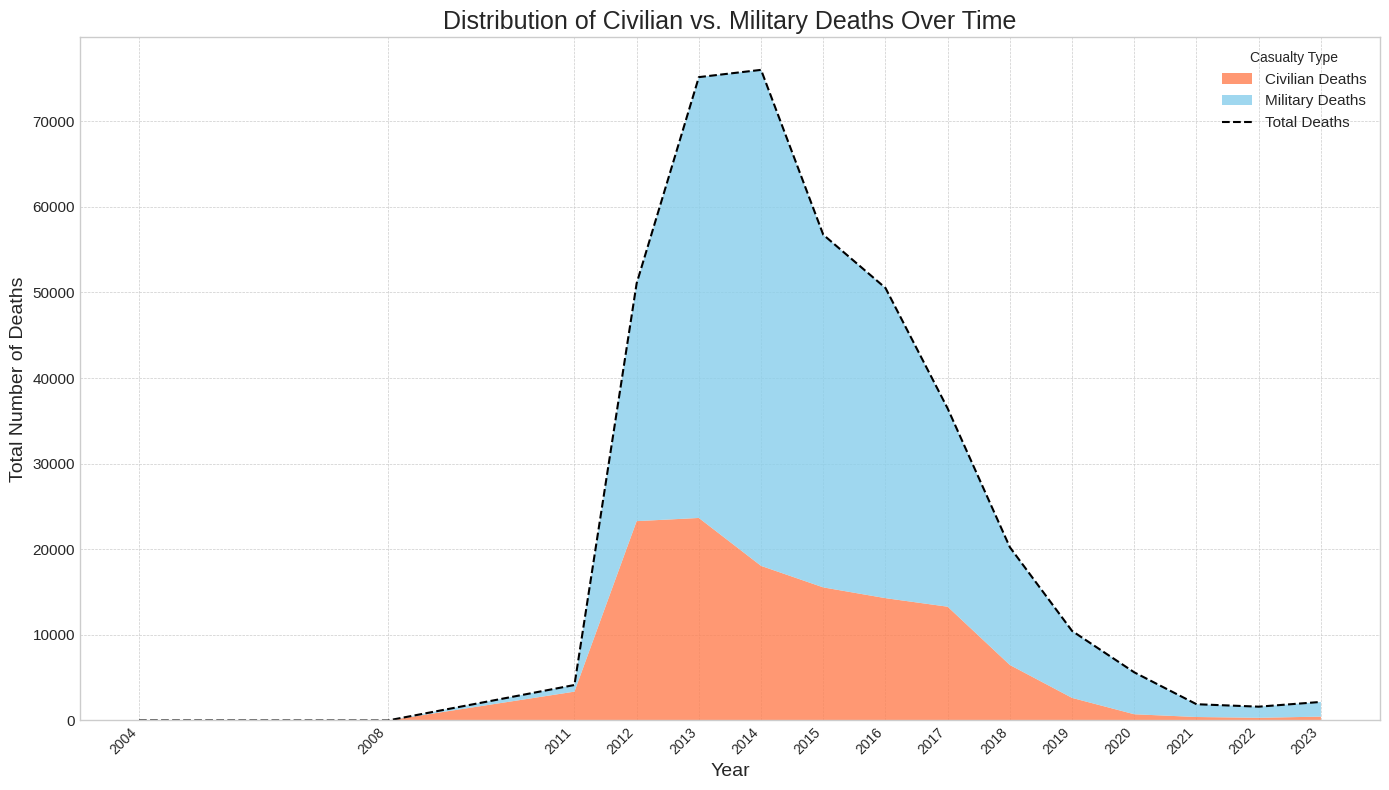

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    years_sample = np.random.choice(range(2012, 2022), size=1000)
    data_for_example = {
        'id': range(len(years_sample)),
        'year': years_sample,
        'deaths_a': np.random.randint(0, 10, size=len(years_sample)),
        'deaths_b': np.random.randint(0, 10, size=len(years_sample)),
        'deaths_civilians': np.random.randint(0, 20, size=len(years_sample))
    }
    df = pd.DataFrame(data_for_example)
    for col in ['deaths_a', 'deaths_b', 'deaths_civilians']:
        df[col] = df[col].astype('int16')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Temporal Analysis of Civilian vs. Military Casualties ---
required_cols = ['year', 'deaths_a', 'deaths_b', 'deaths_civilians']
if all(col in df.columns for col in required_cols):
    print("\n\n--- Analysis: Civilian vs. Military Casualties Over Time ---")

    # 1. Ensure 'deaths_military' column exists (create it if not)
    if 'deaths_military' not in df.columns:
        print("Creating 'deaths_military' column...")
        df['deaths_a'] = df['deaths_a'].fillna(0)
        df['deaths_b'] = df['deaths_b'].fillna(0)
        df['deaths_military'] = df['deaths_a'] + df['deaths_b']

    # Ensure 'deaths_civilians' has no NaNs for aggregation
    df['deaths_civilians'] = df['deaths_civilians'].fillna(0)

    # 2. Group by year and sum casualties
    casualties_over_time = df.groupby('year')[['deaths_civilians', 'deaths_military']].sum().reset_index()
    casualties_over_time = casualties_over_time.sort_values(by='year')

    # 3. Display the results in a table
    print("\nTable: Annual Counts of Civilian vs. Military Deaths:")
    # Rename columns for table display
    table_to_display = casualties_over_time.copy()
    table_to_display.columns = ['Year', 'Total Civilian Deaths', 'Total Military Deaths']
    print(tabulate(table_to_display, headers='keys', tablefmt='psql', showindex=False))

    # 4. Create a Stacked Area Chart
    if not casualties_over_time.empty:
        plt.style.use('seaborn-v0_8-whitegrid') # Set a nice style
        plt.figure(figsize=(14, 8))

        # Prepare data for stackplot
        years = casualties_over_time['year']
        civilian_deaths = casualties_over_time['deaths_civilians']
        military_deaths = casualties_over_time['deaths_military']

        # Define labels and colors
        labels = ['Civilian Deaths', 'Military Deaths']
        colors = ['coral', 'skyblue']

        # Create the plot
        plt.stackplot(years, civilian_deaths, military_deaths, labels=labels, colors=colors, alpha=0.8)

        # Add a line for total deaths for better clarity
        total_deaths = civilian_deaths + military_deaths
        plt.plot(years, total_deaths, color='black', linestyle='--', linewidth=1.5, label='Total Deaths')

        plt.title('Distribution of Civilian vs. Military Deaths Over Time', fontsize=18)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Total Number of Deaths', fontsize=14)

        # Format the axes
        plt.xticks(ticks=years, rotation=45, ha='right', fontsize=10)
        plt.yticks(fontsize=11)
        plt.legend(title='Casualty Type', fontsize=11)
        plt.grid(True, which='major', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()
    else:
        print("No data available to plot the temporal distribution of casualties.")

else:
    print(f"\nOne or more required columns not found. Needed: {required_cols}")

In [82]:
import pandas as pd
import plotly.express as px
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    # Create a more comprehensive sample DataFrame
    num_events = 2000
    years_sample = np.random.choice(range(2011, 2022), size=num_events)
    conflict_names_sample = np.random.choice(['Conflict A', 'Conflict B', 'Conflict C', 'Conflict D'], size=num_events, p=[0.4, 0.3, 0.2, 0.1])
    adm1_sample = np.random.choice(['Aleppo', 'Idlib', 'Homs', 'Damascus'], size=num_events, p=[0.5, 0.2, 0.2, 0.1])

    data_for_example = {
        'id': range(num_events),
        'conflict_name': conflict_names_sample,
        'adm_1': adm1_sample,
        'year': years_sample,
        'deaths_a': np.random.randint(0, 15, size=num_events),
        'deaths_b': np.random.randint(0, 15, size=num_events),
        'deaths_civilians': np.random.randint(0, 30, size=num_events)
    }
    df = pd.DataFrame(data_for_example)
    for col in ['deaths_a', 'deaths_b', 'deaths_civilians']:
        df[col] = df[col].astype('int32') # Use larger int for summation
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")


# --- Composite Analysis: Casualties, Time, Region, and Conflict Type ---
required_cols = ['year', 'conflict_name', 'adm_1', 'deaths_a', 'deaths_b', 'deaths_civilians']
if all(col in df.columns for col in required_cols):
    print("\n\n--- Composite Analysis: Casualties by Year, Governorate, and Conflict ---")

    # 1. Ensure 'deaths_military' column exists
    if 'deaths_military' not in df.columns:
        print("Creating 'deaths_military' column...")
        df['deaths_military'] = df['deaths_a'].fillna(0) + df['deaths_b'].fillna(0)
    df['deaths_civilians'] = df['deaths_civilians'].fillna(0)

    # 2. Aggregate data by Year, Governorate, and Conflict Name
    # This creates a summary for each conflict within each governorate for each year
    composite_data = df.groupby(['year', 'adm_1', 'conflict_name']).agg(
        total_civilian_deaths=('deaths_civilians', 'sum'),
        total_military_deaths=('deaths_military', 'sum'),
        event_count=('id', 'count') # Assuming 'id' is a unique event identifier
    ).reset_index()

    # Calculate total deaths for better sorting and analysis
    composite_data['total_deaths'] = composite_data['total_civilian_deaths'] + composite_data['total_military_deaths']

    # Filter out entries with no deaths or events for a cleaner plot
    composite_data = composite_data[composite_data['total_deaths'] > 0]

    # Sort data for animation timeline
    composite_data = composite_data.sort_values(by='year')

    # Display a sample of the aggregated data table
    print("\nTable: Sample of Aggregated Data for Composite Analysis:")
    print(tabulate(composite_data.head(10), headers='keys', tablefmt='psql', showindex=False))

    # 3. Create the Animated Bubble Chart
    if not composite_data.empty:
        print("\nGenerating interactive animated bubble chart... (This may take a moment)")

        fig = px.scatter(
            composite_data,
            x="total_military_deaths",
            y="total_civilian_deaths",
            animation_frame="year",           # Animate by year
            animation_group="conflict_name",  # Keep bubbles consistent for each conflict across years
            size="event_count",               # Bubble size represents number of events
            color="adm_1",                    # Bubble color represents the governorate
            hover_name="conflict_name",       # Show conflict name on hover
            log_x=True,                       # Use log scale for X-axis due to large value differences
            log_y=True,                       # Use log scale for Y-axis
            size_max=60,                      # Set max bubble size for readability
            labels={                          # English labels for clarity
                "total_military_deaths": "Total Military Deaths (Log Scale)",
                "total_civilian_deaths": "Total Civilian Deaths (Log Scale)",
                "event_count": "Number of Events",
                "adm_1": "Governorate",
                "year": "Year"
            }
        )

        fig.update_layout(
            title_text='Evolution of Conflict Casualties by Year, Governorate, and Conflict Type',
            title_font_size=20,
            xaxis_title="Military Deaths",
            yaxis_title="Civilian Deaths"
        )
        fig.show()
    else:
        print("No data available to plot the composite analysis chart.")

else:
    print(f"\nOne or more required columns not found. Needed: {required_cols}")

Using existing DataFrame 'df'.


--- Composite Analysis: Casualties by Year, Governorate, and Conflict ---

Table: Sample of Aggregated Data for Composite Analysis:
+--------+-------------------------+---------------------------------+-------------------------+-------------------------+---------------+----------------+
|   year | adm_1                   | conflict_name                   |   total_civilian_deaths |   total_military_deaths |   event_count |   total_deaths |
|--------+-------------------------+---------------------------------+-------------------------+-------------------------+---------------+----------------|
|   2004 | Aleppo governorate      | Government of Syria - Civilians |                       7 |                       0 |             2 |              7 |
|   2004 | Damascus governorate    | Israel: Palestine               |                       0 |                       1 |             1 |              1 |
|   2008 | Damascus governorate    | Israel: Southern L

/tmp/ipython-input-82-2849498510.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  composite_data = df.groupby(['year', 'adm_1', 'conflict_name']).agg(


Using existing DataFrame 'df'.


--- 1. Analysis: Ratio of Civilian to Total Deaths Over Time ---

Table: Annual Casualty Distribution and Civilian Death Ratio:
+--------+-------------------+-------------------+----------------+------------------------+
|   year |   Civilian Deaths |   Military Deaths |   Total Deaths | Civilian Death Ratio   |
|--------+-------------------+-------------------+----------------+------------------------|
|   2004 |                 7 |                 1 |              8 | 87.50%                 |
|   2008 |                 0 |                 1 |              1 | 0.00%                  |
|   2011 |              3371 |               774 |           4145 | 81.33%                 |
|   2012 |             23286 |             27775 |          51061 | 45.60%                 |
|   2013 |             23657 |             51488 |          75145 | 31.48%                 |
|   2014 |             18060 |             57934 |          75994 | 23.77%                 |
| 

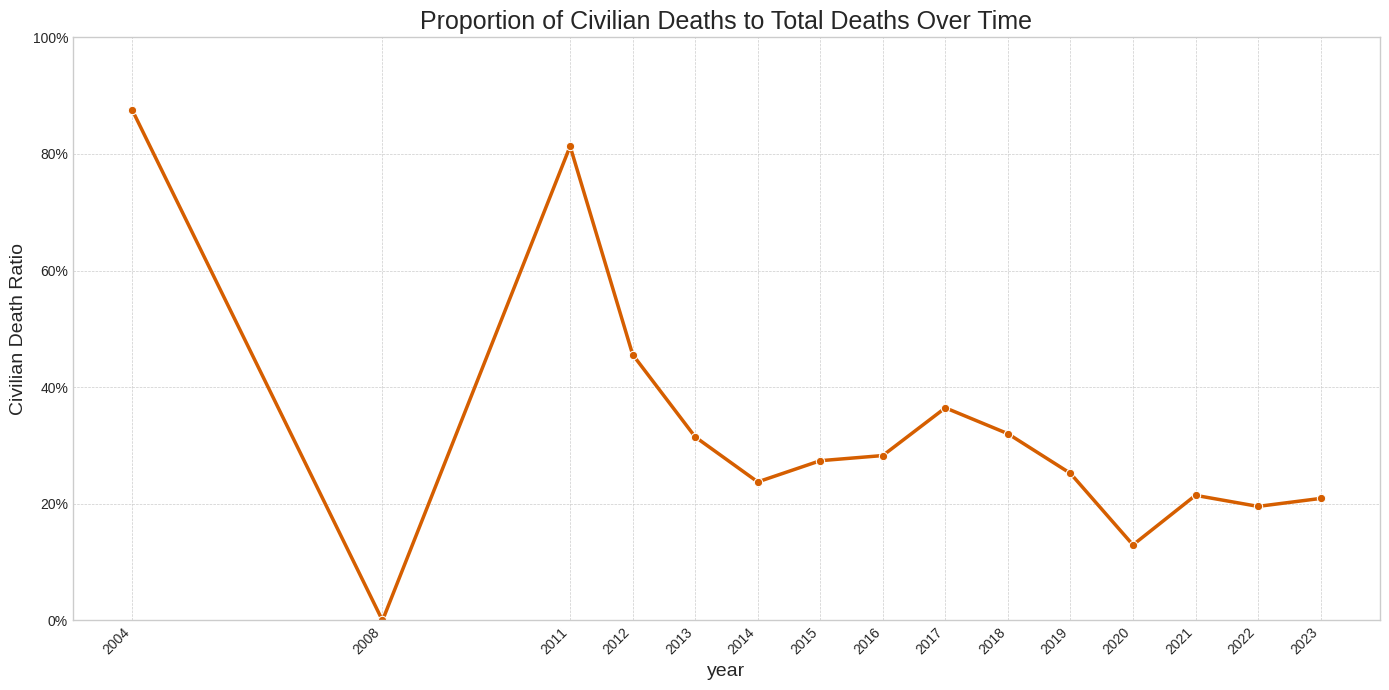

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    # Create a comprehensive sample DataFrame
    num_events = 2000
    years_sample = np.random.choice(range(2011, 2022), size=num_events)
    conflict_names_sample = np.random.choice(['State-Based: A', 'State-Based: B', 'One-Sided: C', 'Non-State: D'], size=num_events, p=[0.4, 0.3, 0.2, 0.1])
    adm1_sample = np.random.choice(['Aleppo', 'Idlib', 'Homs', 'Damascus', 'Raqqa'], size=num_events, p=[0.4, 0.2, 0.15, 0.15, 0.1])

    data_for_example = {
        'year': years_sample, 'conflict_name': conflict_names_sample, 'adm_1': adm1_sample,
        'deaths_a': np.random.randint(0, 10, size=num_events),
        'deaths_b': np.random.randint(0, 10, size=num_events),
        'deaths_civilians': np.random.randint(0, 30, size=num_events)
    }
    df = pd.DataFrame(data_for_example)
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- 1. Temporal Analysis of Civilian vs. Military Casualty Ratio ---
if all(col in df.columns for col in ['year', 'deaths_a', 'deaths_b', 'deaths_civilians']):
    print("\n\n--- 1. Analysis: Ratio of Civilian to Total Deaths Over Time ---")

    # Create 'deaths_military' column if it doesn't exist
    if 'deaths_military' not in df.columns:
        df['deaths_military'] = df['deaths_a'].fillna(0) + df['deaths_b'].fillna(0)
    df['deaths_civilians'] = df['deaths_civilians'].fillna(0)

    # Calculate sums per year
    casualties_by_year = df.groupby('year')[['deaths_civilians', 'deaths_military']].sum()
    casualties_by_year['total_deaths'] = casualties_by_year['deaths_civilians'] + casualties_by_year['deaths_military']

    # Calculate the civilian death ratio. Handle division by zero.
    casualties_by_year['civilian_death_ratio'] = (
        casualties_by_year['deaths_civilians'] / casualties_by_year['total_deaths']
    ).fillna(0)

    casualties_by_year.reset_index(inplace=True)

    # Display Table
    print("\nTable: Annual Casualty Distribution and Civilian Death Ratio:")
    table_to_display = casualties_by_year.copy()
    table_to_display['civilian_death_ratio'] = (table_to_display['civilian_death_ratio'] * 100).map('{:.2f}%'.format)
    print(tabulate(table_to_display, headers=['year', 'Civilian Deaths', 'Military Deaths', 'Total Deaths', 'Civilian Death Ratio'], tablefmt='psql', showindex=False))

    # Plot the ratio over time
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='year', y='civilian_death_ratio', data=casualties_by_year, marker='o', color='#D55E00', linewidth=2.5)

    # Format the y-axis as percentage
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

    plt.title('Proportion of Civilian Deaths to Total Deaths Over Time', fontsize=18)
    plt.xlabel('year', fontsize=14)
    plt.ylabel('Civilian Death Ratio', fontsize=14)
    plt.ylim(0, max(1.0, casualties_by_year['civilian_death_ratio'].max() * 1.1)) # Set y-axis limit
    plt.xticks(ticks=casualties_by_year['year'], rotation=45, ha='right')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

else:
    print("Required columns for casualty analysis not found.")

Using existing DataFrame 'df'.


--- Composite Dashboard: Comparing Casualty Trends and Conflict Composition Over Time ---


/tmp/ipython-input-84-2707025156.py:49: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



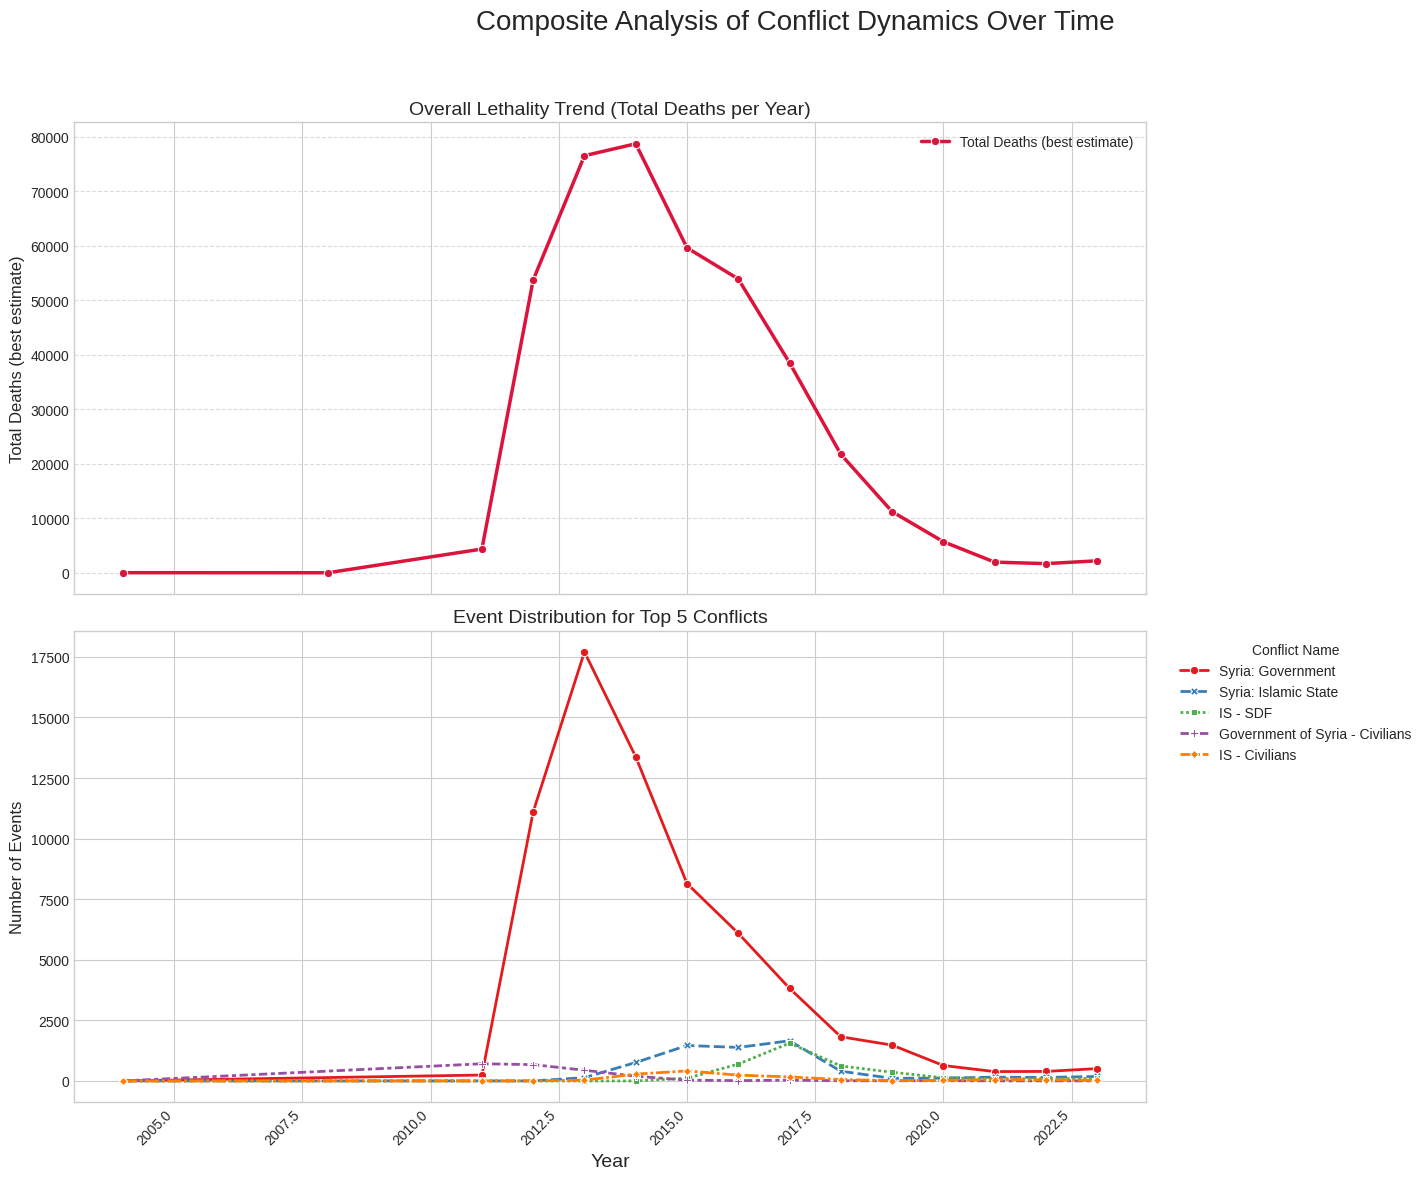

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    # Create a comprehensive sample DataFrame
    num_events = 2000
    years_sample = np.random.choice(range(2011, 2022), size=num_events)
    conflict_names_sample = np.random.choice(['Conflict A', 'Conflict B', 'Conflict C', 'Conflict D', 'Conflict E'], size=num_events, p=[0.4, 0.25, 0.15, 0.1, 0.1])

    deaths_sample = []
    for name in conflict_names_sample:
        if name in ['Conflict A', 'Conflict B']:
            deaths_sample.append(np.random.randint(10, 50))
        else:
            deaths_sample.append(np.random.randint(0, 5))

    data_for_example = {
        'year': years_sample, 'conflict_name': conflict_names_sample,
        'best': deaths_sample
    }
    df = pd.DataFrame(data_for_example)
    df['conflict_name'] = df['conflict_name'].astype('category')
    df['year'] = df['year'].astype('int16')
    df['best'] = df['best'].astype('int32')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Composite Dashboard: Casualties Trend vs. Conflict Composition (with Lines) ---
if all(col in df.columns for col in ['year', 'best', 'conflict_name']):
    print("\n\n--- Composite Dashboard: Comparing Casualty Trends and Conflict Composition Over Time ---")

    # 1. Prepare data for the top plot (Total Deaths Over Time)
    total_deaths_over_time = df.groupby('year')['best'].sum().reset_index()

    # 2. Prepare data for the bottom plot (Event Composition by Conflict Type)
    # Select top N conflicts for a cleaner chart
    top_n_conflicts_for_chart = 5
    top_conflicts = df['conflict_name'].value_counts().nlargest(top_n_conflicts_for_chart).index

    df_top_conflicts_only = df[df['conflict_name'].isin(top_conflicts)]

    # Create data in "long format" suitable for lineplot with hue
    events_by_year_and_conflict = df_top_conflicts_only.groupby(['year', 'conflict_name']).size().reset_index(name='Number of Events')

    # 3. Create the multi-panel plot
    fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True)
    fig.suptitle('Composite Analysis of Conflict Dynamics Over Time', fontsize=20)

    # --- Plot 1: Total Deaths Trend ---
    sns.lineplot(ax=axes[0], x='year', y='best', data=total_deaths_over_time,
                 marker='o', color='crimson', linewidth=2.5, label='Total Deaths (best estimate)')
    axes[0].set_title('Overall Lethality Trend (Total Deaths per Year)', fontsize=14)
    axes[0].set_ylabel('Total Deaths (best estimate)', fontsize=12)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)
    axes[0].legend()

    # --- MODIFIED: Plot 2: Conflict Composition (Multi-line Chart) ---
    # Using a clear color palette for distinct lines
    palette = sns.color_palette("Set1", n_colors=top_n_conflicts_for_chart)

    sns.lineplot(
        ax=axes[1],
        x='year',
        y='Number of Events',
        hue='conflict_name',      # Different color for each conflict
        hue_order=top_conflicts.tolist(), # Ensure consistent coloring
        style='conflict_name',     # Different line style for each conflict
        style_order=top_conflicts.tolist(),
        markers=True,              # Add markers to each data point
        linewidth=2.0,             # Set line thickness
        data=events_by_year_and_conflict,
        palette=palette
    )
    axes[1].set_title(f'Event Distribution for Top {top_n_conflicts_for_chart} Conflicts', fontsize=14)
    axes[1].set_ylabel('Number of Events', fontsize=12)
    axes[1].set_xlabel('Year', fontsize=14)
    axes[1].legend(title='Conflict Name', bbox_to_anchor=(1.02, 1), loc='upper left')

    # Final adjustments
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout(rect=[0, 0, 0.9, 0.95]) # Adjust layout to make space for legend and main title
    plt.show()

else:
    print("\nOne or more required columns are missing for this analysis.")

Using existing DataFrame 'df'.


--- Year-by-Year Analysis: Top Conflicts by Number of Events ---


--- Analysis for Year: 2011 ---
Top 10 conflicts in 2011:
+------------------------------------------------+--------------------+
| Conflict Name                                  |   Number of Events |
|------------------------------------------------+--------------------|
| Government of Syria - Civilians                |                708 |
| Syria: Government                              |                243 |
| Opponents of al-Assad - Supporters of al-Assad |                  1 |
| Syrian insurgents - Civilians                  |                  1 |
| Syria: Rojava Kurdistan                        |                  1 |
| Iraq: Government                               |                  0 |
| Israel: Palestine                              |                  0 |
| Russia (Soviet Union): Caucasus Emirate        |                  0 |
| Turkey: Kurdistan                              |

/tmp/ipython-input-85-2233205778.py:61: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-85-2233205778.py:68: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



ValueError: Unknown format code 'd' for object of type 'float'

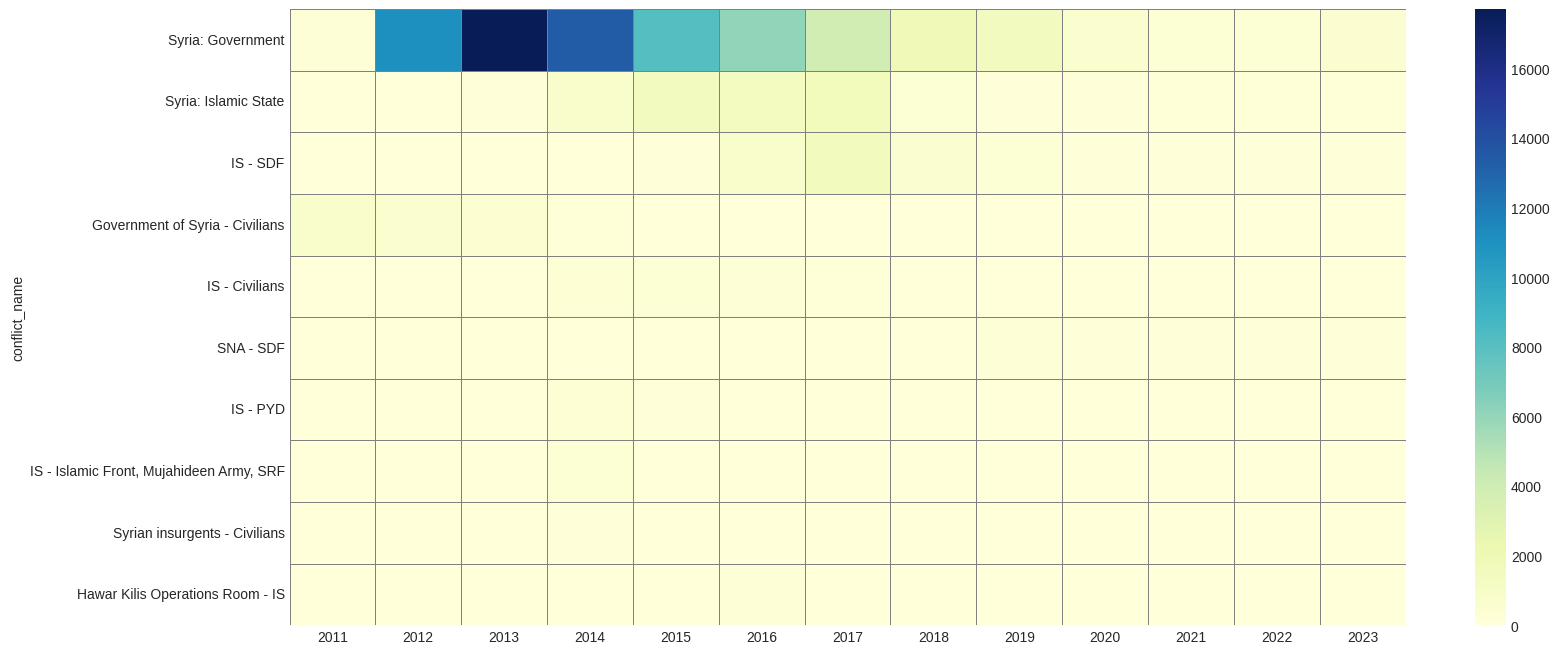

In [85]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    # Create a comprehensive sample DataFrame
    num_events = 2000
    years_sample = np.random.choice(range(2011, 2024), size=num_events)
    conflict_names_sample = np.random.choice(['Conflict A', 'Conflict B', 'Conflict C', 'Conflict D', 'Conflict E'], size=num_events, p=[0.4, 0.25, 0.15, 0.1, 0.1])

    data_for_example = {
        'id': range(num_events),
        'conflict_name': conflict_names_sample,
        'year': years_sample,
        'adm_1': np.random.choice(['Aleppo', 'Idlib', 'Homs'], size=num_events)
    }
    df = pd.DataFrame(data_for_example)
    df['conflict_name'] = df['conflict_name'].astype('category')
    df['year'] = df['year'].astype('int16')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Year-by-Year Analysis of Conflicts by Event Count ---
if 'conflict_name' in df.columns and 'year' in df.columns:
    print("\n\n--- Year-by-Year Analysis: Top Conflicts by Number of Events ---")

    # Define the time range for the analysis
    analysis_years = range(2011, 2024) # Up to and including 2023

    # 1. Loop through each year and display a ranked table
    for year in analysis_years:
        print(f"\n\n--- Analysis for Year: {year} ---")

        # Filter DataFrame for the current year
        df_year = df[df['year'] == year]

        if df_year.empty:
            print(f"No events recorded for the year {year}.")
            continue

        # Calculate event counts for each conflict in that year
        conflict_counts_in_year = df_year['conflict_name'].value_counts().reset_index()
        conflict_counts_in_year.columns = ['Conflict Name', 'Number of Events']

        # Display top N conflicts for the year
        num_to_display = 10

        print(f"Top {min(num_to_display, len(conflict_counts_in_year))} conflicts in {year}:")
        print(tabulate(conflict_counts_in_year.head(num_to_display), headers='keys', tablefmt='psql', showindex=False))

    # --- 2. Summary Visualization: Heatmap ---
    print("\n\n--- Summary Visualization: Heatmap of Event Counts Over Time ---")
    print("(For Top 10 Conflicts vs. All Analyzed Years)")

    # Prepare data for the heatmap
    events_by_conflict_year = df[df['year'].isin(analysis_years)].groupby(['year', 'conflict_name']).size().reset_index(name='Number of Events')

    # Determine top N conflict_names over the entire period for a cleaner heatmap
    top_n_conflicts = df['conflict_name'].value_counts().nlargest(10).index

    heatmap_pivot_data = events_by_conflict_year[
        events_by_conflict_year['conflict_name'].isin(top_n_conflicts)
    ].pivot_table(
        index='conflict_name',
        columns='year',
        values='Number of Events',
        fill_value=0
    )

    # Ensure all years in the range are present as columns for consistency
    all_years_range_for_heatmap = pd.Index(analysis_years)
    heatmap_pivot_data = heatmap_pivot_data.reindex(columns=all_years_range_for_heatmap, fill_value=0)
    # Sort index (conflict names) by total events for better visualization
    heatmap_pivot_data = heatmap_pivot_data.reindex(index=top_n_conflicts)


    if not heatmap_pivot_data.empty:
        plt.figure(figsize=(18, 8))
        sns.heatmap(
            heatmap_pivot_data,
            annot=True,        # Show numbers in cells
            fmt="d",           # Format numbers as integers
            cmap="YlGnBu",     # Colormap
            linewidths=.5,
            linecolor='gray'
        )
        plt.title('Heatmap: Annual Event Counts for Top 10 Conflicts (2011-2023)', fontsize=16)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Conflict Name', fontsize=14)
        plt.xticks(fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough data to generate the summary heatmap.")

else:
    print("\nRequired columns 'conflict_name' or 'year' not found for this analysis.")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    # Create a comprehensive sample DataFrame
    num_events = 2000
    years_sample = np.random.choice(range(2011, 2024), size=num_events)
    conflict_names_sample = np.random.choice(['Conflict A', 'Conflict B', 'Conflict C', 'Conflict D', 'Conflict E'], size=num_events, p=[0.4, 0.25, 0.15, 0.1, 0.1])

    data_for_example = {
        'id': range(num_events),
        'conflict_name': conflict_names_sample,
        'year': years_sample,
        'adm_1': np.random.choice(['Aleppo', 'Idlib', 'Homs'], size=num_events)
    }
    df = pd.DataFrame(data_for_example)
    df['conflict_name'] = df['conflict_name'].astype('category')
    df['year'] = df['year'].astype('int16')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Year-by-Year Analysis of Conflicts by Event Count (with separate bar charts) ---
if 'conflict_name' in df.columns and 'year' in df.columns:
    print("\n\n--- Year-by-Year Analysis: Top Conflicts by Number of Events ---")

    # Define the time range for the analysis
    analysis_years = range(2011, 2024) # Up to and including 2023

    # Loop through each year to create a separate table and chart
    for year in analysis_years:
        print(f"\n\n" + "="*50)
        print(f"--- Analysis for Year: {year} ---")
        print("="*50)

        # Filter DataFrame for the current year
        df_year = df[df['year'] == year]

        if df_year.empty:
            print(f"No events recorded for the year {year}.")
            continue

        # Calculate event counts for each conflict in that year
        conflict_counts_in_year = df_year['conflict_name'].value_counts().reset_index()
        conflict_counts_in_year.columns = ['Conflict Name', 'Number of Events']

        # Display top N conflicts in a table
        num_to_display = 10
        top_conflicts_for_year = conflict_counts_in_year.head(num_to_display)

        print(f"\nTable: Top {len(top_conflicts_for_year)} conflicts in {year}:")
        print(tabulate(top_conflicts_for_year, headers='keys', tablefmt='psql', showindex=False))

        # --- Create a separate bar chart for the current year ---
        if not top_conflicts_for_year.empty:
            plt.figure(figsize=(12, 8))
            sns.barplot(
                x='Number of Events',
                y='Conflict Name',
                data=top_conflicts_for_year,
                palette='magma',
                hue='Conflict Name', # Use hue for coloring, not for grouping
                dodge=False,
                legend=False
            )
            plt.title(f'Top Conflicts by Event Count in {year}', fontsize=16)
            plt.xlabel('Number of Events', fontsize=14)
            plt.ylabel('Conflict Name', fontsize=14)
            plt.xticks(fontsize=11)
            plt.yticks(fontsize=10)
            plt.tight_layout()
            plt.show()
        else:
            print(f"No conflict data to plot for the year {year}.")

else:
    print("\nRequired columns 'conflict_name' or 'year' not found for this analysis.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    num_events = 2000
    years_sample = np.random.choice(range(2011, 2024), size=num_events)
    conflict_names_sample = [f'Conflict_{i}' for i in range(20)] # 20 unique conflicts
    df = pd.DataFrame({
        'id': range(num_events),
        'conflict_name': np.random.choice(conflict_names_sample, size=num_events),
        'year': years_sample
    })
    df['conflict_name'] = df['conflict_name'].astype('category')
    df['year'] = df['year'].astype('int16')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")

# --- Year-by-Year Analysis of Conflicts by Event Count (with separate bar charts) ---
if 'conflict_name' in df.columns and 'year' in df.columns:
    print("\n\n--- Year-by-Year Analysis: Top Conflicts by Number of Events ---")

    analysis_years = range(2011, 2024)

    for year in analysis_years:
        print(f"\n\n" + "="*50)
        print(f"--- Analysis for Year: {year} ---")
        print("="*50)

        df_year = df[df['year'] == year]

        if df_year.empty:
            print(f"No events recorded for the year {year}.")
            continue

        conflict_counts_in_year = df_year['conflict_name'].value_counts().reset_index()
        conflict_counts_in_year.columns = ['Conflict Name', 'Number of Events']

        # *** THIS IS THE MODIFIED LINE ***
        # You can change this number to display as many conflicts as you like
        num_to_display = 15

        top_conflicts_for_year = conflict_counts_in_year.head(num_to_display)

        print(f"\nTable: Top {min(num_to_display, len(top_conflicts_for_year))} conflicts in {year}:")
        print(tabulate(top_conflicts_for_year, headers='keys', tablefmt='psql', showindex=False))

        if not top_conflicts_for_year.empty:
            # Adjust figsize dynamically based on number of items to display
            # A simple heuristic: 0.6 inches per item + a base height
            chart_height = max(6, len(top_conflicts_for_year) * 0.6)
            plt.figure(figsize=(12, chart_height))

            sns.barplot(
                x='Number of Events',
                y='Conflict Name',
                data=top_conflicts_for_year,
                palette='magma',
                hue='Conflict Name',
                dodge=False,
                legend=False
            )
            plt.title(f'Top {len(top_conflicts_for_year)} Conflicts by Event Count in {year}', fontsize=16)
            plt.xlabel('Number of Events', fontsize=14)
            plt.ylabel('Conflict Name', fontsize=14)
            plt.xticks(fontsize=11)
            plt.yticks(fontsize=10) # Adjust fontsize for readability
            plt.tight_layout()
            plt.show()
        else:
            print(f"No conflict data to plot for the year {year}.")

else:
    print("\nRequired columns 'conflict_name' or 'year' not found for this analysis.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Assuming 'df' is already loaded and preprocessed
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("DataFrame 'df' is not defined. Creating a sample DataFrame for demonstration.")
    # Sample data simulating the specified conflict over years
    years_isis = np.random.choice(range(2013, 2020), size=300) # ISIS conflict events
    years_other = np.random.choice(range(2011, 2022), size=700)
    all_years = np.concatenate([years_isis, years_other])

    conflict_names_sample = ['Syria: Islamic State']*300 + ['Other Conflict']*700

    data_for_example = {
        'id': range(len(all_years)),
        'conflict_name': conflict_names_sample,
        'year': all_years
    }
    np.random.shuffle(data_for_example['conflict_name'])

    df = pd.DataFrame(data_for_example)
    df['conflict_name'] = df['conflict_name'].astype('category')
    df['year'] = df['year'].astype('int16')
    print("Sample df created.")
else:
    print("Using existing DataFrame 'df'.")


# --- Temporal Analysis for "Syria: Islamic State" conflict ---
required_cols = ['conflict_name', 'year']
if all(col in df.columns for col in required_cols):

    # 1. Define the specific conflict of interest
    target_conflict = 'Government of Syria - Civilians  '
    print(f"\n\n--- Analysis: Temporal Distribution for Conflict: '{target_conflict}' ---")

    # 2. Filter the DataFrame for this specific conflict
    df_conflict_specific = df[df['conflict_name'] == target_conflict].copy()

    if df_conflict_specific.empty:
        print(f"\nNo events found for the conflict: '{target_conflict}'.")
    else:
        # 3. Calculate event counts per year
        events_per_year = df_conflict_specific['year'].value_counts().reset_index()
        events_per_year.columns = ['Year', 'Number of Events']
        # Sort by year for a chronological chart
        events_per_year = events_per_year.sort_values(by='Year')

        print(f"\nTable: Annual Event Counts for '{target_conflict}':")
        print(tabulate(events_per_year, headers='keys', tablefmt='psql', showindex=False))

        # 4. Create a bar chart to show the trend
        plt.figure(figsize=(14, 7))

        # Using a bar chart to clearly show the count for each year
        barplot = sns.barplot(
            x='Year',
            y='Number of Events',
            data=events_per_year,
            palette="autumn",
            hue='Year', # Optional for coloring
            dodge=False,
            legend=False
        )

        # Add labels on top of bars
        for p in barplot.patches:
            barplot.annotate(format(p.get_height(), '.0f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha = 'center', va = 'center',
                             xytext = (0, 9),
                             textcoords = 'offset points',
                             fontsize=10)

        plt.title(f'Annual Event Count for:\n{target_conflict}', fontsize=16)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Number of Events', fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=11)
        plt.yticks(fontsize=11)
        plt.tight_layout()
        plt.show()

else:
    print(f"\nOne or more required columns not found. Needed: {required_cols}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# تأكد من وجود الأعمدة المطلوبة
required_cols = ['year', 'id', 'conflict_name']
if not all(col in df.columns for col in required_cols):
    raise ValueError(f"Your DataFrame must contain these columns: {required_cols}")

# --- Step 1: إجمالي الحوادث لكل سنة ---
yearly_total = df.groupby('year')['id'].count().reset_index(name='total_events')

# --- Step 2: عدد الحوادث حسب الصراع والسنة ---
yearly_by_conflict = df.groupby(['year', 'conflict_name'])['id'].count().reset_index(name='events')

# --- Step 3: Pivot لتسهيل المقارنة السنوية للصراعات ---
pivoted = yearly_by_conflict.pivot(index='year', columns='conflict_name', values='events').fillna(0)

# --- Step 4: تحديد السنوات التي ارتفعت فيها الحوادث فجأة ---
yearly_total['delta'] = yearly_total['total_events'].diff()
sudden_spike = yearly_total[yearly_total['delta'] > yearly_total['delta'].mean() + yearly_total['delta'].std()]
print("Years with sudden spikes in total event count:")
print(sudden_spike)

# --- Step 5: تحليل الصراعات التي قل عددها في نفس السنوات ---
print("\nConflicts that had fewer events in those spike years:")

for year in sudden_spike['year']:
    if year - 1 in pivoted.index:
        diffs = pivoted.loc[year] - pivoted.loc[year - 1]
        dropped = diffs[diffs < 0].sort_values()
        if not dropped.empty:
            print(f"\n📌 Year: {year}")
            print(dropped)

# --- Step 6: رسم المخطط ---
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_total, x='year', y='total_events', label='Total Events', linewidth=3, color='black')

# رسم كل صراع بشكل منفصل
for col in pivoted.columns:
    sns.lineplot(data=pivoted[col], label=col)

plt.title("Total Events and Conflict-Specific Trends per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.legend(title='Conflict Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# التأكد من أن الأعمدة الأساسية موجودة
required_cols = ['year', 'conflict_name', 'deaths_a', 'deaths_b', 'deaths_civilians', 'id']
if all(col in df.columns for col in required_cols):

    df['deaths_total'] = df[['deaths_a', 'deaths_b', 'deaths_civilians']].fillna(0).sum(axis=1)

    # الفلترة على سنة 2013 فقط
    df_2013 = df[df['year'] == 2013]

    # التحليل العام لكل الصراعات في 2013
    general_stats = {
        'Total Events': len(df_2013),
        'Total Deaths': df_2013['deaths_total'].sum(),
        'Civilian Deaths': df_2013['deaths_civilians'].sum(),
        'Unique Conflicts': df_2013['conflict_name'].nunique()
    }

    # التحليل الخاص بصراع Government of Syria - Civilians
    df_specific = df_2013[df_2013['conflict_name'] == 'Government of Syria - Civilians']
    specific_stats = {
        'Events (GOS-Civilians)': len(df_specific),
        'Total Deaths': df_specific['deaths_total'].sum(),
        'Civilian Deaths': df_specific['deaths_civilians'].sum()
    }

    # طباعة النتائج
    print("📊 General Conflict Stats in 2013:")
    for k, v in general_stats.items():
        print(f"{k}: {v}")

    print("\n📌 Government of Syria - Civilians in 2013:")
    for k, v in specific_stats.items():
        print(f"{k}: {v}")
else:
    print("❌ One or more required columns are missing.")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the key columns exist
if 'conflict_name' in df.columns and 'year' in df.columns and 'id' in df.columns:

    # Filter data for the specific conflict
    gos_df = df[df['conflict_name'] == 'Government of Syria - Civilians']

    # Group by year to count events
    events_by_year = gos_df.groupby('year').agg(event_count=('id', 'count')).reset_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(data=events_by_year, x='year', y='event_count', palette='Reds')
    plt.title('Number of Events for Conflict: Government of Syria - Civilians by Year', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Number of Events')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

else:
    print("❌ Required columns (conflict_name, year, id) not found in the DataFrame.")
